# import

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Dense, Flatten, Dropout, BatchNormalization, Reshape, LeakyReLU, concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint


import keras
from keras.layers import Dense, Input, Conv2D, Conv2DTranspose, Flatten, Reshape, LSTM
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.datasets import cifar100
from keras import backend as K


import os
import shutil
import json
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
import copy

# Test

Epoch 1/1000
157/157 [==============================] - 1s 2ms/step - loss: 6.9819 - val_loss: 7.4105
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9377 - val_loss: 7.3976
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9066 - val_loss: 7.3714
Epoch 4/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8839 - val_loss: 7.3542
Epoch 5/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8594 - val_loss: 7.3387
Epoch 6/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8473 - val_loss: 7.3380
Epoch 7/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8306 - val_loss: 7.3238
Epoch 8/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8259 - val_loss: 7.3121
Epoch 9/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8145 - val_loss: 7.3071
Epoch 10/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.804

Epoch 34/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7841 - val_loss: 7.3151
Epoch 35/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7833 - val_loss: 7.3092
Epoch 36/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7777 - val_loss: 7.3194
Epoch 37/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7793 - val_loss: 7.3233
Epoch 38/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7707 - val_loss: 7.3223
Epoch 39/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7748 - val_loss: 7.3147
Epoch 40/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7684 - val_loss: 7.3120
Epoch 41/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7594 - val_loss: 7.3365
Epoch 42/1000
632/632 [==============================] - 1s 1ms/step - loss: 7.3061
0       -1.13
1       -1.73
2        0.00
3        0.00
4       -0.17
         ... 
20212   

Epoch 5/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9675 - val_loss: 7.4362
Epoch 6/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9643 - val_loss: 7.4324
Epoch 7/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9625 - val_loss: 7.4309
Epoch 8/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9595 - val_loss: 7.4261
Epoch 9/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9589 - val_loss: 7.4261
Epoch 10/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9561 - val_loss: 7.4309
Epoch 11/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9560 - val_loss: 7.4258
Epoch 12/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9550 - val_loss: 7.4274
Epoch 13/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9539 - val_loss: 7.4229
Epoch 14/1000
157/157 [==============================] - 0s 1ms/step - loss: 6

157/157 [==============================] - 0s 2ms/step - loss: 6.5605 - dense_215_loss: 4.8204 - dense_218_loss: 1.7401 - val_loss: 6.8672 - val_dense_215_loss: 4.9900 - val_dense_218_loss: 1.8771
Epoch 32/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.5619 - dense_215_loss: 4.8228 - dense_218_loss: 1.7391 - val_loss: 6.8571 - val_dense_215_loss: 4.9811 - val_dense_218_loss: 1.8760
Epoch 33/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.5559 - dense_215_loss: 4.8166 - dense_218_loss: 1.7393 - val_loss: 6.8620 - val_dense_215_loss: 4.9845 - val_dense_218_loss: 1.8774
Epoch 34/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.5545 - dense_215_loss: 4.8147 - dense_218_loss: 1.7398 - val_loss: 6.8664 - val_dense_215_loss: 4.9896 - val_dense_218_loss: 1.8768
Epoch 35/1000
632/632 [==============================] - 1s 1ms/step - loss: 6.8555 - dense_215_loss: 4.9805 - dense_218_loss: 1.8749
[0        0.00
1       -0.87
2      

632/632 [==============================] - 1s 1ms/step - loss: 6.8577 - dense_241_loss: 4.9801 - dense_244_loss: 1.8777
0.4883385595307343 0.5116614404692658 -0.0
0.5434125705076551 9928
34681.85700528879
Epoch 1/1000
157/157 [==============================] - 1s 2ms/step - loss: 6.7728 - dense_267_loss: 5.0130 - dense_270_loss: 1.7599 - val_loss: 6.9849 - val_dense_267_loss: 5.0975 - val_dense_270_loss: 1.8874
Epoch 2/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7690 - dense_267_loss: 5.0108 - dense_270_loss: 1.7582 - val_loss: 6.9847 - val_dense_267_loss: 5.0975 - val_dense_270_loss: 1.8873
Epoch 3/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7624 - dense_267_loss: 5.0051 - dense_270_loss: 1.7572 - val_loss: 6.9660 - val_dense_267_loss: 5.0795 - val_dense_270_loss: 1.8865
Epoch 4/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7410 - dense_267_loss: 4.9851 - dense_270_loss: 1.7559 - val_loss: 6.9571 - val_dense_2

Epoch 38/1000
632/632 [==============================] - 1s 1ms/step - loss: 6.9274 - dense_267_loss: 5.0419 - dense_270_loss: 1.8855
[0        0.00
1       -0.87
2       -0.93
3       -0.56
4        0.35
         ... 
20212   -0.18
20213   -1.42
20214    0.28
20215    0.66
20216    0.00
Name: nextStockUpDown_2_1, Length: 20217, dtype: float64, 0       -1.13
1       -0.87
2        0.94
3        0.56
4       -0.52
         ... 
20212    0.00
20213   -0.48
20214   -0.69
20215    1.63
20216   -0.49
Name: nextStockUpDown_2_2, Length: 20217, dtype: float64]
632/632 [==============================] - 1s 1ms/step - loss: 6.9938 - dense_267_loss: 5.1012 - dense_270_loss: 1.8926
0.5753260024097488 -0.0 0.4246739975902512
0.5337429492344883 9928
34890.92669947972
Epoch 1/1000
157/157 [==============================] - 1s 2ms/step - loss: 6.7637 - dense_293_loss: 5.0035 - dense_296_loss: 1.7602 - val_loss: 6.9652 - val_dense_293_loss: 5.0781 - val_dense_296_loss: 1.8871
Epoch 2/1000
157/157 [====

157/157 [==============================] - 0s 1ms/step - loss: 6.7502 - dense_345_loss: 4.9927 - dense_348_loss: 1.7575 - val_loss: 6.9612 - val_dense_345_loss: 5.0760 - val_dense_348_loss: 1.8852
Epoch 8/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7466 - dense_345_loss: 4.9893 - dense_348_loss: 1.7573 - val_loss: 6.9590 - val_dense_345_loss: 5.0742 - val_dense_348_loss: 1.8849
Epoch 9/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7454 - dense_345_loss: 4.9882 - dense_348_loss: 1.7573 - val_loss: 6.9613 - val_dense_345_loss: 5.0766 - val_dense_348_loss: 1.8847
Epoch 10/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7452 - dense_345_loss: 4.9880 - dense_348_loss: 1.7573 - val_loss: 6.9637 - val_dense_345_loss: 5.0784 - val_dense_348_loss: 1.8854
Epoch 11/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7453 - dense_345_loss: 4.9882 - dense_348_loss: 1.7571 - val_loss: 6.9581 - val_dense_345_los

Epoch 11/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8237 - dense_397_loss: 4.4161 - dense_400_loss: 1.0993 - dense_403_loss: 1.3083 - val_loss: 7.2014 - val_dense_397_loss: 4.5943 - val_dense_400_loss: 1.2215 - val_dense_403_loss: 1.3856
Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8206 - dense_397_loss: 4.4134 - dense_400_loss: 1.0991 - dense_403_loss: 1.3081 - val_loss: 7.1949 - val_dense_397_loss: 4.5876 - val_dense_400_loss: 1.2215 - val_dense_403_loss: 1.3858
Epoch 13/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8180 - dense_397_loss: 4.4114 - dense_400_loss: 1.0989 - dense_403_loss: 1.3077 - val_loss: 7.1905 - val_dense_397_loss: 4.5840 - val_dense_400_loss: 1.2211 - val_dense_403_loss: 1.3854
Epoch 14/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8147 - dense_397_loss: 4.4086 - dense_400_loss: 1.0985 - dense_403_loss: 1.3076 - val_loss: 7.1954 - val_dense_397_loss: 4.588

Epoch 6/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8437 - dense_423_loss: 4.4351 - dense_426_loss: 1.0992 - dense_429_loss: 1.3094 - val_loss: 7.1833 - val_dense_423_loss: 4.5768 - val_dense_426_loss: 1.2199 - val_dense_429_loss: 1.3866
Epoch 7/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8384 - dense_423_loss: 4.4300 - dense_426_loss: 1.0990 - dense_429_loss: 1.3095 - val_loss: 7.1778 - val_dense_423_loss: 4.5713 - val_dense_426_loss: 1.2199 - val_dense_429_loss: 1.3867
Epoch 8/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8323 - dense_423_loss: 4.4249 - dense_426_loss: 1.0984 - dense_429_loss: 1.3091 - val_loss: 7.1776 - val_dense_423_loss: 4.5713 - val_dense_426_loss: 1.2200 - val_dense_429_loss: 1.3863
Epoch 9/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8274 - dense_423_loss: 4.4201 - dense_426_loss: 1.0983 - dense_429_loss: 1.3090 - val_loss: 7.1796 - val_dense_423_loss: 4.5736 - 

632/632 [==============================] - 1s 1ms/step - loss: 7.1533 - dense_423_loss: 4.5505 - dense_426_loss: 1.2175 - dense_429_loss: 1.3854
[0       -0.23
1       -0.29
2       -1.40
3       -0.37
4        0.69
         ... 
20212   -0.18
20213   -1.90
20214    0.96
20215    0.00
20216    0.00
Name: nextStockUpDown_3_1, Length: 20217, dtype: float64, 0        0.23
1       -1.74
2        0.47
3        0.19
4       -0.52
         ... 
20212    0.00
20213    0.97
20214   -0.82
20215    0.66
20216   -1.96
Name: nextStockUpDown_3_2, Length: 20217, dtype: float64, 0       -1.13
1        0.29
2        0.94
3        0.19
4       -0.35
         ... 
20212    0.00
20213   -0.96
20214   -0.55
20215    1.63
20216    1.50
Name: nextStockUpDown_3_3, Length: 20217, dtype: float64]
632/632 [==============================] - 1s 1ms/step - loss: 7.1533 - dense_423_loss: 4.5505 - dense_426_loss: 1.2175 - dense_429_loss: 1.3854
0.41617373368579524 0.5838262663142048 -0.0
0.5374899759422614 9976
34319

157/157 [==============================] - 0s 2ms/step - loss: 6.8345 - dense_449_loss: 4.4293 - dense_452_loss: 1.0989 - dense_455_loss: 1.3063 - val_loss: 7.2187 - val_dense_449_loss: 4.6113 - val_dense_452_loss: 1.2199 - val_dense_455_loss: 1.3875
Epoch 28/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8348 - dense_449_loss: 4.4290 - dense_452_loss: 1.0989 - dense_455_loss: 1.3069 - val_loss: 7.2173 - val_dense_449_loss: 4.6102 - val_dense_452_loss: 1.2195 - val_dense_455_loss: 1.3876
Epoch 29/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8302 - dense_449_loss: 4.4252 - dense_452_loss: 1.0986 - dense_455_loss: 1.3064 - val_loss: 7.2198 - val_dense_449_loss: 4.6125 - val_dense_452_loss: 1.2196 - val_dense_455_loss: 1.3877
Epoch 30/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8289 - dense_449_loss: 4.4243 - dense_452_loss: 1.0987 - dense_455_loss: 1.3059 - val_loss: 7.2171 - val_dense_449_loss: 4.6102 - val_dense_

157/157 [==============================] - 0s 1ms/step - loss: 6.8831 - dense_501_loss: 4.4722 - dense_504_loss: 1.1007 - dense_507_loss: 1.3102 - val_loss: 7.2316 - val_dense_501_loss: 4.6220 - val_dense_504_loss: 1.2215 - val_dense_507_loss: 1.3881
Epoch 20/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8846 - dense_501_loss: 4.4738 - dense_504_loss: 1.1007 - dense_507_loss: 1.3102 - val_loss: 7.2274 - val_dense_501_loss: 4.6175 - val_dense_504_loss: 1.2216 - val_dense_507_loss: 1.3882
Epoch 21/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8834 - dense_501_loss: 4.4728 - dense_504_loss: 1.1007 - dense_507_loss: 1.3099 - val_loss: 7.2277 - val_dense_501_loss: 4.6176 - val_dense_504_loss: 1.2217 - val_dense_507_loss: 1.3884
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8834 - dense_501_loss: 4.4727 - dense_504_loss: 1.1006 - dense_507_loss: 1.3102 - val_loss: 7.2287 - val_dense_501_loss: 4.6190 - val_dense_

Epoch 50/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8692 - dense_501_loss: 4.4600 - dense_504_loss: 1.1000 - dense_507_loss: 1.3092 - val_loss: 7.2277 - val_dense_501_loss: 4.6185 - val_dense_504_loss: 1.2211 - val_dense_507_loss: 1.3882
Epoch 51/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8688 - dense_501_loss: 4.4594 - dense_504_loss: 1.0999 - dense_507_loss: 1.3094 - val_loss: 7.2235 - val_dense_501_loss: 4.6145 - val_dense_504_loss: 1.2207 - val_dense_507_loss: 1.3883
Epoch 52/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8686 - dense_501_loss: 4.4594 - dense_504_loss: 1.1000 - dense_507_loss: 1.3093 - val_loss: 7.2298 - val_dense_501_loss: 4.6206 - val_dense_504_loss: 1.2210 - val_dense_507_loss: 1.3882
Epoch 53/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8680 - dense_501_loss: 4.4586 - dense_504_loss: 1.1000 - dense_507_loss: 1.3094 - val_loss: 7.2303 - val_dense_501_loss: 4.620

157/157 [==============================] - 0s 1ms/step - loss: 6.8971 - dense_553_loss: 4.4842 - dense_556_loss: 1.1018 - dense_559_loss: 1.3111 - val_loss: 7.2320 - val_dense_553_loss: 4.6207 - val_dense_556_loss: 1.2227 - val_dense_559_loss: 1.3885
Epoch 3/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8943 - dense_553_loss: 4.4816 - dense_556_loss: 1.1019 - dense_559_loss: 1.3108 - val_loss: 7.2288 - val_dense_553_loss: 4.6182 - val_dense_556_loss: 1.2227 - val_dense_559_loss: 1.3880
Epoch 4/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8924 - dense_553_loss: 4.4799 - dense_556_loss: 1.1019 - dense_559_loss: 1.3107 - val_loss: 7.2282 - val_dense_553_loss: 4.6175 - val_dense_556_loss: 1.2226 - val_dense_559_loss: 1.3881
Epoch 5/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8902 - dense_553_loss: 4.4780 - dense_556_loss: 1.1019 - dense_559_loss: 1.3104 - val_loss: 7.2282 - val_dense_553_loss: 4.6169 - val_dense_556

Epoch 8/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8317 - dense_579_loss: 3.9306 - dense_582_loss: 1.0225 - dense_585_loss: 0.8340 - dense_588_loss: 1.0446 - val_loss: 7.0244 - val_dense_579_loss: 4.0178 - val_dense_582_loss: 1.0108 - val_dense_585_loss: 0.9330 - val_dense_588_loss: 1.0627
Epoch 9/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8286 - dense_579_loss: 3.9296 - dense_582_loss: 1.0211 - dense_585_loss: 0.8341 - dense_588_loss: 1.0438 - val_loss: 7.0223 - val_dense_579_loss: 4.0150 - val_dense_582_loss: 1.0110 - val_dense_585_loss: 0.9332 - val_dense_588_loss: 1.0630
Epoch 10/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8216 - dense_579_loss: 3.9235 - dense_582_loss: 1.0211 - dense_585_loss: 0.8337 - dense_588_loss: 1.0432 - val_loss: 7.0220 - val_dense_579_loss: 4.0171 - val_dense_582_loss: 1.0094 - val_dense_585_loss: 0.9332 - val_dense_588_loss: 1.0622
Epoch 11/1000
157/157 [======================

Epoch 29/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.7988 - dense_605_loss: 3.9032 - dense_608_loss: 1.0200 - dense_611_loss: 0.8321 - dense_614_loss: 1.0434 - val_loss: 7.0138 - val_dense_605_loss: 4.0015 - val_dense_608_loss: 1.0137 - val_dense_611_loss: 0.9343 - val_dense_614_loss: 1.0643
Epoch 30/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.7978 - dense_605_loss: 3.9024 - dense_608_loss: 1.0198 - dense_611_loss: 0.8319 - dense_614_loss: 1.0436 - val_loss: 7.0274 - val_dense_605_loss: 4.0168 - val_dense_608_loss: 1.0129 - val_dense_611_loss: 0.9334 - val_dense_614_loss: 1.0643
Epoch 31/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.7968 - dense_605_loss: 3.9011 - dense_608_loss: 1.0205 - dense_611_loss: 0.8321 - dense_614_loss: 1.0430 - val_loss: 7.0148 - val_dense_605_loss: 4.0038 - val_dense_608_loss: 1.0132 - val_dense_611_loss: 0.9327 - val_dense_614_loss: 1.0650
Epoch 32/1000
157/157 [====================

Epoch 11/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8740 - dense_631_loss: 3.9522 - dense_634_loss: 1.0343 - dense_637_loss: 0.8350 - dense_640_loss: 1.0524 - val_loss: 7.0683 - val_dense_631_loss: 4.0373 - val_dense_634_loss: 1.0253 - val_dense_637_loss: 0.9336 - val_dense_640_loss: 1.0721
Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8729 - dense_631_loss: 3.9514 - dense_634_loss: 1.0339 - dense_637_loss: 0.8349 - dense_640_loss: 1.0527 - val_loss: 7.0703 - val_dense_631_loss: 4.0398 - val_dense_634_loss: 1.0248 - val_dense_637_loss: 0.9338 - val_dense_640_loss: 1.0719
Epoch 13/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8699 - dense_631_loss: 3.9488 - dense_634_loss: 1.0338 - dense_637_loss: 0.8351 - dense_640_loss: 1.0522 - val_loss: 7.0698 - val_dense_631_loss: 4.0396 - val_dense_634_loss: 1.0248 - val_dense_637_loss: 0.9331 - val_dense_640_loss: 1.0723
Epoch 14/1000
157/157 [====================

Epoch 37/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8395 - dense_631_loss: 3.9254 - dense_634_loss: 1.0298 - dense_637_loss: 0.8336 - dense_640_loss: 1.0507 - val_loss: 7.0654 - val_dense_631_loss: 4.0361 - val_dense_634_loss: 1.0233 - val_dense_637_loss: 0.9335 - val_dense_640_loss: 1.0724
Epoch 38/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8373 - dense_631_loss: 3.9237 - dense_634_loss: 1.0300 - dense_637_loss: 0.8337 - dense_640_loss: 1.0499 - val_loss: 7.0688 - val_dense_631_loss: 4.0401 - val_dense_634_loss: 1.0232 - val_dense_637_loss: 0.9330 - val_dense_640_loss: 1.0725
Epoch 39/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8367 - dense_631_loss: 3.9227 - dense_634_loss: 1.0303 - dense_637_loss: 0.8338 - dense_640_loss: 1.0499 - val_loss: 7.0666 - val_dense_631_loss: 4.0372 - val_dense_634_loss: 1.0235 - val_dense_637_loss: 0.9333 - val_dense_640_loss: 1.0726
Epoch 40/1000
157/157 [====================

Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8439 - dense_657_loss: 3.9221 - dense_660_loss: 1.0356 - dense_663_loss: 0.8345 - dense_666_loss: 1.0516 - val_loss: 7.0474 - val_dense_657_loss: 4.0153 - val_dense_660_loss: 1.0280 - val_dense_663_loss: 0.9336 - val_dense_666_loss: 1.0705
Epoch 13/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8425 - dense_657_loss: 3.9214 - dense_660_loss: 1.0354 - dense_663_loss: 0.8345 - dense_666_loss: 1.0512 - val_loss: 7.0469 - val_dense_657_loss: 4.0154 - val_dense_660_loss: 1.0271 - val_dense_663_loss: 0.9337 - val_dense_666_loss: 1.0707
Epoch 14/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8402 - dense_657_loss: 3.9193 - dense_660_loss: 1.0352 - dense_663_loss: 0.8343 - dense_666_loss: 1.0514 - val_loss: 7.0430 - val_dense_657_loss: 4.0120 - val_dense_660_loss: 1.0276 - val_dense_663_loss: 0.9336 - val_dense_666_loss: 1.0699
Epoch 15/1000
157/157 [====================

Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9077 - dense_683_loss: 3.9795 - dense_686_loss: 1.0380 - dense_689_loss: 0.8358 - dense_692_loss: 1.0545 - val_loss: 7.0906 - val_dense_683_loss: 4.0531 - val_dense_686_loss: 1.0291 - val_dense_689_loss: 0.9338 - val_dense_692_loss: 1.0746
Epoch 4/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9056 - dense_683_loss: 3.9781 - dense_686_loss: 1.0373 - dense_689_loss: 0.8356 - dense_692_loss: 1.0545 - val_loss: 7.0860 - val_dense_683_loss: 4.0510 - val_dense_686_loss: 1.0273 - val_dense_689_loss: 0.9336 - val_dense_692_loss: 1.0740
Epoch 5/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9038 - dense_683_loss: 3.9772 - dense_686_loss: 1.0368 - dense_689_loss: 0.8357 - dense_692_loss: 1.0541 - val_loss: 7.0870 - val_dense_683_loss: 4.0528 - val_dense_686_loss: 1.0267 - val_dense_689_loss: 0.9338 - val_dense_692_loss: 1.0738
Epoch 6/1000
157/157 [========================

Epoch 29/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8876 - dense_683_loss: 3.9655 - dense_686_loss: 1.0342 - dense_689_loss: 0.8351 - dense_692_loss: 1.0529 - val_loss: 7.0764 - val_dense_683_loss: 4.0448 - val_dense_686_loss: 1.0259 - val_dense_689_loss: 0.9332 - val_dense_692_loss: 1.0726
Epoch 30/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8853 - dense_683_loss: 3.9635 - dense_686_loss: 1.0342 - dense_689_loss: 0.8349 - dense_692_loss: 1.0528 - val_loss: 7.0809 - val_dense_683_loss: 4.0500 - val_dense_686_loss: 1.0250 - val_dense_689_loss: 0.9330 - val_dense_692_loss: 1.0729
Epoch 31/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8857 - dense_683_loss: 3.9639 - dense_686_loss: 1.0343 - dense_689_loss: 0.8347 - dense_692_loss: 1.0528 - val_loss: 7.0794 - val_dense_683_loss: 4.0480 - val_dense_686_loss: 1.0255 - val_dense_689_loss: 0.9333 - val_dense_692_loss: 1.0726
Epoch 32/1000
157/157 [====================

Epoch 11/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8800 - dense_709_loss: 3.9556 - dense_712_loss: 1.0366 - dense_715_loss: 0.8346 - dense_718_loss: 1.0532 - val_loss: 7.0744 - val_dense_709_loss: 4.0382 - val_dense_712_loss: 1.0304 - val_dense_715_loss: 0.9335 - val_dense_718_loss: 1.0723
Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8795 - dense_709_loss: 3.9552 - dense_712_loss: 1.0370 - dense_715_loss: 0.8343 - dense_718_loss: 1.0530 - val_loss: 7.0704 - val_dense_709_loss: 4.0345 - val_dense_712_loss: 1.0302 - val_dense_715_loss: 0.9335 - val_dense_718_loss: 1.0722
Epoch 13/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8788 - dense_709_loss: 3.9549 - dense_712_loss: 1.0365 - dense_715_loss: 0.8344 - dense_718_loss: 1.0530 - val_loss: 7.0689 - val_dense_709_loss: 4.0330 - val_dense_712_loss: 1.0301 - val_dense_715_loss: 0.9336 - val_dense_718_loss: 1.0721
Epoch 14/1000
157/157 [====================

Epoch 37/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8664 - dense_709_loss: 3.9461 - dense_712_loss: 1.0352 - dense_715_loss: 0.8329 - dense_718_loss: 1.0522 - val_loss: 7.0618 - val_dense_709_loss: 4.0262 - val_dense_712_loss: 1.0303 - val_dense_715_loss: 0.9331 - val_dense_718_loss: 1.0721
Epoch 38/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8672 - dense_709_loss: 3.9467 - dense_712_loss: 1.0350 - dense_715_loss: 0.8332 - dense_718_loss: 1.0522 - val_loss: 7.0624 - val_dense_709_loss: 4.0270 - val_dense_712_loss: 1.0304 - val_dense_715_loss: 0.9331 - val_dense_718_loss: 1.0719
Epoch 39/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8664 - dense_709_loss: 3.9462 - dense_712_loss: 1.0350 - dense_715_loss: 0.8332 - dense_718_loss: 1.0520 - val_loss: 7.0636 - val_dense_709_loss: 4.0279 - val_dense_712_loss: 1.0304 - val_dense_715_loss: 0.9327 - val_dense_718_loss: 1.0725
Epoch 40/1000
157/157 [====================

Epoch 63/1000
632/632 [==============================] - 1s 1ms/step - loss: 7.0600 - dense_709_loss: 4.0233 - dense_712_loss: 1.0309 - dense_715_loss: 0.9332 - dense_718_loss: 1.0726
[0        0.00
1        0.87
2       -0.47
3       -0.56
4        0.35
         ... 
20212   -0.18
20213   -1.42
20214    0.83
20215    0.00
20216    0.49
Name: nextStockUpDown_4_1, Length: 20217, dtype: float64, 0        0.00
1       -1.72
2       -0.47
3        0.00
4        0.00
         ... 
20212    0.00
20213    0.00
20214   -0.55
20215    0.66
20216   -0.49
Name: nextStockUpDown_4_2, Length: 20217, dtype: float64, 0       -0.45
1       -0.29
2        0.47
3        0.37
4       -0.35
         ... 
20212   -0.18
20213    0.00
20214    0.27
20215    0.98
20216   -0.49
Name: nextStockUpDown_4_3, Length: 20217, dtype: float64, 0       -0.68
1       -0.58
2        0.47
3        0.19
4       -0.17
         ... 
20212    0.18
20213   -0.48
20214   -0.96
20215    0.65
20216    0.00
Name: nextStockUpDown_4_4

Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8864 - dense_735_loss: 3.9603 - dense_738_loss: 1.0379 - dense_741_loss: 0.8349 - dense_744_loss: 1.0533 - val_loss: 7.0836 - val_dense_735_loss: 4.0466 - val_dense_738_loss: 1.0296 - val_dense_741_loss: 0.9340 - val_dense_744_loss: 1.0734
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8868 - dense_735_loss: 3.9607 - dense_738_loss: 1.0378 - dense_741_loss: 0.8350 - dense_744_loss: 1.0532 - val_loss: 7.0844 - val_dense_735_loss: 4.0478 - val_dense_738_loss: 1.0295 - val_dense_741_loss: 0.9334 - val_dense_744_loss: 1.0736
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8863 - dense_735_loss: 3.9603 - dense_738_loss: 1.0379 - dense_741_loss: 0.8349 - dense_744_loss: 1.0531 - val_loss: 7.0809 - val_dense_735_loss: 4.0441 - val_dense_738_loss: 1.0300 - val_dense_741_loss: 0.9335 - val_dense_744_loss: 1.0732
Epoch 24/1000
157/157 [====================

157/157 [==============================] - 0s 2ms/step - loss: 6.8701 - dense_761_loss: 3.5405 - dense_764_loss: 1.1175 - dense_767_loss: 0.5793 - dense_770_loss: 0.7909 - dense_773_loss: 0.8419 - val_loss: 6.9873 - val_dense_761_loss: 3.5817 - val_dense_764_loss: 1.1057 - val_dense_767_loss: 0.6182 - val_dense_770_loss: 0.8418 - val_dense_773_loss: 0.8400
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8669 - dense_761_loss: 3.5371 - dense_764_loss: 1.1179 - dense_767_loss: 0.5792 - dense_770_loss: 0.7910 - dense_773_loss: 0.8416 - val_loss: 6.9883 - val_dense_761_loss: 3.5817 - val_dense_764_loss: 1.1045 - val_dense_767_loss: 0.6184 - val_dense_770_loss: 0.8428 - val_dense_773_loss: 0.8407
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8648 - dense_761_loss: 3.5365 - dense_764_loss: 1.1166 - dense_767_loss: 0.5794 - dense_770_loss: 0.7908 - dense_773_loss: 0.8415 - val_loss: 6.9900 - val_dense_761_loss: 3.5855 - val_dense

632/632 [==============================] - 1s 1ms/step - loss: 7.0487 - dense_761_loss: 3.6211 - dense_764_loss: 1.1177 - dense_767_loss: 0.6192 - dense_770_loss: 0.8448 - dense_773_loss: 0.8461
0.30148116611020237 0.47391190684264384 0.22460692704715382
0.5413827655310621 9980
34682.02508103245
Epoch 1/1000
157/157 [==============================] - 2s 3ms/step - loss: 6.9940 - dense_787_loss: 3.6290 - dense_790_loss: 1.1403 - dense_793_loss: 0.5809 - dense_796_loss: 0.7956 - dense_799_loss: 0.8481 - val_loss: 7.0630 - val_dense_787_loss: 3.6305 - val_dense_790_loss: 1.1237 - val_dense_793_loss: 0.6186 - val_dense_796_loss: 0.8436 - val_dense_799_loss: 0.8467
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9833 - dense_787_loss: 3.6204 - dense_790_loss: 1.1399 - dense_793_loss: 0.5809 - dense_796_loss: 0.7943 - dense_799_loss: 0.8478 - val_loss: 7.0553 - val_dense_787_loss: 3.6244 - val_dense_790_loss: 1.1231 - val_dense_793_loss: 0.6186 - val_dense_796_l

632/632 [==============================] - 1s 1ms/step - loss: 6.9933 - dense_787_loss: 3.5857 - dense_790_loss: 1.1068 - dense_793_loss: 0.6171 - dense_796_loss: 0.8417 - dense_799_loss: 0.8421
[0        0.00
1        2.31
2       -0.47
3       -0.56
4        0.00
         ... 
20212   -0.54
20213   -1.90
20214    0.41
20215    0.00
20216    0.00
Name: nextStockUpDown_5_1, Length: 20217, dtype: float64, 0        0.00
1       -2.82
2       -0.47
3        0.19
4        0.52
         ... 
20212    0.36
20213    0.00
20214    0.27
20215    0.00
20216   -0.49
Name: nextStockUpDown_5_2, Length: 20217, dtype: float64, 0        0.00
1       -1.16
2        0.47
3        0.00
4       -0.17
         ... 
20212    0.00
20213    0.97
20214   -0.82
20215    0.33
20216   -0.49
Name: nextStockUpDown_5_3, Length: 20217, dtype: float64, 0       -0.45
1        0.88
2        0.00
3        0.19
4       -0.17
         ... 
20212   -0.18
20213   -0.48
20214    0.69
20215    1.31
20216    0.50
Name: nextStoc

Epoch 11/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9336 - dense_839_loss: 3.5807 - dense_842_loss: 1.1342 - dense_845_loss: 0.5804 - dense_848_loss: 0.7926 - dense_851_loss: 0.8457 - val_loss: 7.0234 - val_dense_839_loss: 3.6008 - val_dense_842_loss: 1.1168 - val_dense_845_loss: 0.6180 - val_dense_848_loss: 0.8434 - val_dense_851_loss: 0.8444
Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9296 - dense_839_loss: 3.5777 - dense_842_loss: 1.1336 - dense_845_loss: 0.5804 - dense_848_loss: 0.7926 - dense_851_loss: 0.8453 - val_loss: 7.0224 - val_dense_839_loss: 3.5999 - val_dense_842_loss: 1.1162 - val_dense_845_loss: 0.6181 - val_dense_848_loss: 0.8438 - val_dense_851_loss: 0.8444
Epoch 13/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9292 - dense_839_loss: 3.5775 - dense_842_loss: 1.1337 - dense_845_loss: 0.5803 - dense_848_loss: 0.7925 - dense_851_loss: 0.8452 - val_loss: 7.0249 - val_dense_839_loss: 3.60

632/632 [==============================] - 1s 1ms/step - loss: 7.0779 - dense_839_loss: 3.6419 - dense_842_loss: 1.1254 - dense_845_loss: 0.6187 - dense_848_loss: 0.8451 - dense_851_loss: 0.8469
-0.0 0.594613632042687 0.405386367957313
0.5261523046092185 9980
34810.791965603974
Epoch 1/1000
157/157 [==============================] - 1s 3ms/step - loss: 6.9988 - dense_865_loss: 3.6346 - dense_868_loss: 1.1402 - dense_871_loss: 0.5809 - dense_874_loss: 0.7952 - dense_877_loss: 0.8479 - val_loss: 7.0714 - val_dense_865_loss: 3.6387 - val_dense_868_loss: 1.1234 - val_dense_871_loss: 0.6185 - val_dense_874_loss: 0.8441 - val_dense_877_loss: 0.8467
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9949 - dense_865_loss: 3.6318 - dense_868_loss: 1.1398 - dense_871_loss: 0.5809 - dense_874_loss: 0.7948 - dense_877_loss: 0.8477 - val_loss: 7.0694 - val_dense_865_loss: 3.6378 - val_dense_868_loss: 1.1229 - val_dense_871_loss: 0.6185 - val_dense_874_loss: 0.8439 - val_

Epoch 11/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9638 - dense_891_loss: 3.6057 - dense_894_loss: 1.1373 - dense_897_loss: 0.5804 - dense_900_loss: 0.7936 - dense_903_loss: 0.8468 - val_loss: 7.0412 - val_dense_891_loss: 3.6139 - val_dense_894_loss: 1.1204 - val_dense_897_loss: 0.6183 - val_dense_900_loss: 0.8434 - val_dense_903_loss: 0.8453
Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9631 - dense_891_loss: 3.6054 - dense_894_loss: 1.1369 - dense_897_loss: 0.5804 - dense_900_loss: 0.7936 - dense_903_loss: 0.8467 - val_loss: 7.0461 - val_dense_891_loss: 3.6180 - val_dense_894_loss: 1.1204 - val_dense_897_loss: 0.6184 - val_dense_900_loss: 0.8438 - val_dense_903_loss: 0.8454
Epoch 13/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9632 - dense_891_loss: 3.6056 - dense_894_loss: 1.1369 - dense_897_loss: 0.5804 - dense_900_loss: 0.7936 - dense_903_loss: 0.8467 - val_loss: 7.0361 - val_dense_891_loss: 3.60

632/632 [==============================] - 1s 1ms/step - loss: 7.0801 - dense_917_loss: 3.6443 - dense_920_loss: 1.1253 - dense_923_loss: 0.6188 - dense_926_loss: 0.8448 - dense_929_loss: 0.8469
0.5168336673346693 9980
35025.540387323985
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.0213 - dense_943_loss: 3.3094 - dense_946_loss: 1.1559 - dense_949_loss: 0.5802 - dense_952_loss: 0.5575 - dense_955_loss: 0.6522 - dense_958_loss: 0.7662 - val_loss: 7.2810 - val_dense_943_loss: 3.3722 - val_dense_946_loss: 1.2097 - val_dense_949_loss: 0.5789 - val_dense_952_loss: 0.6293 - val_dense_955_loss: 0.7334 - val_dense_958_loss: 0.7574
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9952 - dense_943_loss: 3.2871 - dense_946_loss: 1.1535 - dense_949_loss: 0.5797 - dense_952_loss: 0.5572 - dense_955_loss: 0.6519 - dense_958_loss: 0.7657 - val_loss: 7.2721 - val_dense_943_loss: 3.3661 - val_dense_946_loss: 1.2083 - val_dense_949_loss: 0.57

Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9038 - dense_943_loss: 3.2347 - dense_946_loss: 1.1313 - dense_949_loss: 0.5733 - dense_952_loss: 0.5560 - dense_955_loss: 0.6503 - dense_958_loss: 0.7582 - val_loss: 7.2192 - val_dense_943_loss: 3.3437 - val_dense_946_loss: 1.1909 - val_dense_949_loss: 0.5727 - val_dense_952_loss: 0.6291 - val_dense_955_loss: 0.7322 - val_dense_958_loss: 0.7506
Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8990 - dense_943_loss: 3.2317 - dense_946_loss: 1.1294 - dense_949_loss: 0.5732 - dense_952_loss: 0.5560 - dense_955_loss: 0.6500 - dense_958_loss: 0.7586 - val_loss: 7.2179 - val_dense_943_loss: 3.3423 - val_dense_946_loss: 1.1911 - val_dense_949_loss: 0.5725 - val_dense_952_loss: 0.6288 - val_dense_955_loss: 0.7324 - val_dense_958_loss: 0.7508
Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8970 - dense_943_loss: 3.2302 - dense_946_loss: 1.1298 - dense_949_

Epoch 15/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9472 - dense_969_loss: 3.2665 - dense_972_loss: 1.1369 - dense_975_loss: 0.5769 - dense_978_loss: 0.5559 - dense_981_loss: 0.6505 - dense_984_loss: 0.7605 - val_loss: 7.2361 - val_dense_969_loss: 3.3522 - val_dense_972_loss: 1.1935 - val_dense_975_loss: 0.5754 - val_dense_978_loss: 0.6290 - val_dense_981_loss: 0.7324 - val_dense_984_loss: 0.7537
Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9457 - dense_969_loss: 3.2667 - dense_972_loss: 1.1359 - dense_975_loss: 0.5765 - dense_978_loss: 0.5557 - dense_981_loss: 0.6504 - dense_984_loss: 0.7604 - val_loss: 7.2359 - val_dense_969_loss: 3.3525 - val_dense_972_loss: 1.1935 - val_dense_975_loss: 0.5754 - val_dense_978_loss: 0.6288 - val_dense_981_loss: 0.7322 - val_dense_984_loss: 0.7535
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9451 - dense_969_loss: 3.2665 - dense_972_loss: 1.1357 - dense_975_

Epoch 4/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0107 - dense_995_loss: 3.3030 - dense_998_loss: 1.1540 - dense_1001_loss: 0.5798 - dense_1004_loss: 0.5569 - dense_1007_loss: 0.6513 - dense_1010_loss: 0.7656 - val_loss: 7.2973 - val_dense_995_loss: 3.3898 - val_dense_998_loss: 1.2088 - val_dense_1001_loss: 0.5786 - val_dense_1004_loss: 0.6292 - val_dense_1007_loss: 0.7341 - val_dense_1010_loss: 0.7568
Epoch 5/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0056 - dense_995_loss: 3.2990 - dense_998_loss: 1.1533 - dense_1001_loss: 0.5796 - dense_1004_loss: 0.5569 - dense_1007_loss: 0.6514 - dense_1010_loss: 0.7655 - val_loss: 7.2952 - val_dense_995_loss: 3.3878 - val_dense_998_loss: 1.2092 - val_dense_1001_loss: 0.5778 - val_dense_1004_loss: 0.6293 - val_dense_1007_loss: 0.7340 - val_dense_1010_loss: 0.7570
Epoch 6/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0028 - dense_995_loss: 3.2967 - dense_998_loss: 1.1528

Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9702 - dense_995_loss: 3.2778 - dense_998_loss: 1.1443 - dense_1001_loss: 0.5777 - dense_1004_loss: 0.5565 - dense_1007_loss: 0.6501 - dense_1010_loss: 0.7638 - val_loss: 7.2811 - val_dense_995_loss: 3.3830 - val_dense_998_loss: 1.2022 - val_dense_1001_loss: 0.5766 - val_dense_1004_loss: 0.6286 - val_dense_1007_loss: 0.7340 - val_dense_1010_loss: 0.7567
Epoch 24/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9704 - dense_995_loss: 3.2780 - dense_998_loss: 1.1440 - dense_1001_loss: 0.5779 - dense_1004_loss: 0.5564 - dense_1007_loss: 0.6502 - dense_1010_loss: 0.7638 - val_loss: 7.2816 - val_dense_995_loss: 3.3852 - val_dense_998_loss: 1.2006 - val_dense_1001_loss: 0.5765 - val_dense_1004_loss: 0.6287 - val_dense_1007_loss: 0.7340 - val_dense_1010_loss: 0.7566
Epoch 25/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9706 - dense_995_loss: 3.2790 - dense_998_loss: 1.1

Epoch 7/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9758 - dense_1021_loss: 3.2730 - dense_1024_loss: 1.1502 - dense_1027_loss: 0.5788 - dense_1030_loss: 0.5565 - dense_1033_loss: 0.6519 - dense_1036_loss: 0.7654 - val_loss: 7.2660 - val_dense_1021_loss: 3.3630 - val_dense_1024_loss: 1.2057 - val_dense_1027_loss: 0.5780 - val_dense_1030_loss: 0.6287 - val_dense_1033_loss: 0.7337 - val_dense_1036_loss: 0.7568
Epoch 8/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9728 - dense_1021_loss: 3.2711 - dense_1024_loss: 1.1494 - dense_1027_loss: 0.5788 - dense_1030_loss: 0.5565 - dense_1033_loss: 0.6517 - dense_1036_loss: 0.7653 - val_loss: 7.2628 - val_dense_1021_loss: 3.3615 - val_dense_1024_loss: 1.2046 - val_dense_1027_loss: 0.5781 - val_dense_1030_loss: 0.6288 - val_dense_1033_loss: 0.7334 - val_dense_1036_loss: 0.7565
Epoch 9/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9677 - dense_1021_loss: 3.2674 - dense_1024_lo

632/632 [==============================] - 1s 2ms/step - loss: 7.2589 - dense_1021_loss: 3.3612 - dense_1024_loss: 1.2017 - dense_1027_loss: 0.5779 - dense_1030_loss: 0.6292 - dense_1033_loss: 0.7328 - dense_1036_loss: 0.7561
[0        0.00
1        1.45
2       -0.47
3       -0.37
4        0.17
         ... 
20212   -0.36
20213   -1.42
20214    0.69
20215    0.99
20216    0.49
Name: nextStockUpDown_6_1, Length: 20217, dtype: float64, 0       -0.23
1       -1.99
2       -0.94
3        0.00
4        0.17
         ... 
20212    0.18
20213   -0.48
20214    0.27
20215   -1.30
20216   -0.98
Name: nextStockUpDown_6_2, Length: 20217, dtype: float64, 0        0.00
1       -0.29
2        0.47
3       -0.19
4        0.17
         ... 
20212    0.00
20213    0.00
20214   -0.68
20215    0.99
20216    0.00
Name: nextStockUpDown_6_3, Length: 20217, dtype: float64, 0        0.45
1       -1.17
2        0.47
3        0.19
4       -0.34
         ... 
20212    0.00
20213    0.97
20214    0.00
20215    0.

Epoch 33/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0015 - dense_1047_loss: 3.3024 - dense_1050_loss: 1.1481 - dense_1053_loss: 0.5787 - dense_1056_loss: 0.5564 - dense_1059_loss: 0.6510 - dense_1062_loss: 0.7650 - val_loss: 7.2974 - val_dense_1047_loss: 3.3942 - val_dense_1050_loss: 1.2056 - val_dense_1053_loss: 0.5777 - val_dense_1056_loss: 0.6290 - val_dense_1059_loss: 0.7336 - val_dense_1062_loss: 0.7573
Epoch 34/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0017 - dense_1047_loss: 3.3022 - dense_1050_loss: 1.1484 - dense_1053_loss: 0.5789 - dense_1056_loss: 0.5563 - dense_1059_loss: 0.6509 - dense_1062_loss: 0.7650 - val_loss: 7.2961 - val_dense_1047_loss: 3.3928 - val_dense_1050_loss: 1.2054 - val_dense_1053_loss: 0.5777 - val_dense_1056_loss: 0.6294 - val_dense_1059_loss: 0.7334 - val_dense_1062_loss: 0.7575
Epoch 35/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0016 - dense_1047_loss: 3.3025 - dense_1050

632/632 [==============================] - 1s 1ms/step - loss: 7.2950 - dense_1047_loss: 3.3924 - dense_1050_loss: 1.2048 - dense_1053_loss: 0.5777 - dense_1056_loss: 0.6291 - dense_1059_loss: 0.7334 - dense_1062_loss: 0.7574
0.5212169735788631 9992
35038.88403495392
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.0257 - dense_1073_loss: 3.3127 - dense_1076_loss: 1.1567 - dense_1079_loss: 0.5803 - dense_1082_loss: 0.5573 - dense_1085_loss: 0.6528 - dense_1088_loss: 0.7659 - val_loss: 7.3012 - val_dense_1073_loss: 3.3889 - val_dense_1076_loss: 1.2115 - val_dense_1079_loss: 0.5790 - val_dense_1082_loss: 0.6293 - val_dense_1085_loss: 0.7342 - val_dense_1088_loss: 0.7582
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0170 - dense_1073_loss: 3.3066 - dense_1076_loss: 1.1553 - dense_1079_loss: 0.5799 - dense_1082_loss: 0.5571 - dense_1085_loss: 0.6524 - dense_1088_loss: 0.7657 - val_loss: 7.2946 - val_dense_1073_loss: 3.3844 - val_

Epoch 37/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9799 - dense_1073_loss: 3.2824 - dense_1076_loss: 1.1487 - dense_1079_loss: 0.5780 - dense_1082_loss: 0.5560 - dense_1085_loss: 0.6509 - dense_1088_loss: 0.7640 - val_loss: 7.2713 - val_dense_1073_loss: 3.3684 - val_dense_1076_loss: 1.2058 - val_dense_1079_loss: 0.5780 - val_dense_1082_loss: 0.6293 - val_dense_1085_loss: 0.7330 - val_dense_1088_loss: 0.7567
Epoch 38/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9781 - dense_1073_loss: 3.2811 - dense_1076_loss: 1.1480 - dense_1079_loss: 0.5783 - dense_1082_loss: 0.5559 - dense_1085_loss: 0.6510 - dense_1088_loss: 0.7638 - val_loss: 7.2734 - val_dense_1073_loss: 3.3687 - val_dense_1076_loss: 1.2074 - val_dense_1079_loss: 0.5782 - val_dense_1082_loss: 0.6295 - val_dense_1085_loss: 0.7334 - val_dense_1088_loss: 0.7562
Epoch 39/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9799 - dense_1073_loss: 3.2826 - dense_1076

157/157 [==============================] - 0s 2ms/step - loss: 7.0090 - dense_1099_loss: 3.2998 - dense_1102_loss: 1.1550 - dense_1105_loss: 0.5796 - dense_1108_loss: 0.5570 - dense_1111_loss: 0.6521 - dense_1114_loss: 0.7656 - val_loss: 7.3005 - val_dense_1099_loss: 3.3905 - val_dense_1102_loss: 1.2096 - val_dense_1105_loss: 0.5789 - val_dense_1108_loss: 0.6293 - val_dense_1111_loss: 0.7346 - val_dense_1114_loss: 0.7574
Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0068 - dense_1099_loss: 3.2977 - dense_1102_loss: 1.1547 - dense_1105_loss: 0.5797 - dense_1108_loss: 0.5569 - dense_1111_loss: 0.6521 - dense_1114_loss: 0.7656 - val_loss: 7.3040 - val_dense_1099_loss: 3.3940 - val_dense_1102_loss: 1.2096 - val_dense_1105_loss: 0.5789 - val_dense_1108_loss: 0.6292 - val_dense_1111_loss: 0.7350 - val_dense_1114_loss: 0.7573
Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0081 - dense_1099_loss: 3.2991 - dense_1102_loss: 1.1547 

632/632 [==============================] - 1s 2ms/step - loss: 7.3330 - dense_1099_loss: 3.4162 - dense_1102_loss: 1.2139 - dense_1105_loss: 0.5796 - dense_1108_loss: 0.6299 - dense_1111_loss: 0.7350 - dense_1114_loss: 0.7586
0.5232185748598879 9992
34993.61717005477
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.1097 - dense_1125_loss: 3.1952 - dense_1128_loss: 1.1305 - dense_1131_loss: 0.6066 - dense_1134_loss: 0.4489 - dense_1137_loss: 0.6058 - dense_1140_loss: 0.6655 - dense_1143_loss: 0.4572 - val_loss: 7.3242 - val_dense_1125_loss: 3.2574 - val_dense_1128_loss: 1.1374 - val_dense_1131_loss: 0.6035 - val_dense_1134_loss: 0.5101 - val_dense_1137_loss: 0.6823 - val_dense_1140_loss: 0.6492 - val_dense_1143_loss: 0.4844
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0883 - dense_1125_loss: 3.1773 - dense_1128_loss: 1.1284 - dense_1131_loss: 0.6064 - dense_1134_loss: 0.4488 - dense_1137_loss: 0.6052 - dense_1140_loss: 0.6651

632/632 [==============================] - 1s 2ms/step - loss: 7.3169 - dense_1125_loss: 3.2615 - dense_1128_loss: 1.1284 - dense_1131_loss: 0.6023 - dense_1134_loss: 0.5096 - dense_1137_loss: 0.6826 - dense_1140_loss: 0.6484 - dense_1143_loss: 0.4841
0.31911189866426454 0.47048264661693684 0.2104054547187986
0.5377831228703147 9978
34622.24945563348
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.1173 - dense_1151_loss: 3.2024 - dense_1154_loss: 1.1302 - dense_1157_loss: 0.6068 - dense_1160_loss: 0.4490 - dense_1163_loss: 0.6056 - dense_1166_loss: 0.6660 - dense_1169_loss: 0.4573 - val_loss: 7.3390 - val_dense_1151_loss: 3.2707 - val_dense_1154_loss: 1.1374 - val_dense_1157_loss: 0.6037 - val_dense_1160_loss: 0.5102 - val_dense_1163_loss: 0.6822 - val_dense_1166_loss: 0.6503 - val_dense_1169_loss: 0.4844
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1041 - dense_1151_loss: 3.1937 - dense_1154_loss: 1.1279 - dense_1157_loss:

Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0258 - dense_1151_loss: 3.1507 - dense_1154_loss: 1.1044 - dense_1157_loss: 0.6028 - dense_1160_loss: 0.4482 - dense_1163_loss: 0.6026 - dense_1166_loss: 0.6615 - dense_1169_loss: 0.4556 - val_loss: 7.2797 - val_dense_1151_loss: 3.2380 - val_dense_1154_loss: 1.1219 - val_dense_1157_loss: 0.5995 - val_dense_1160_loss: 0.5098 - val_dense_1163_loss: 0.6822 - val_dense_1166_loss: 0.6451 - val_dense_1169_loss: 0.4832
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0238 - dense_1151_loss: 3.1499 - dense_1154_loss: 1.1042 - dense_1157_loss: 0.6027 - dense_1160_loss: 0.4480 - dense_1163_loss: 0.6025 - dense_1166_loss: 0.6609 - dense_1169_loss: 0.4556 - val_loss: 7.2762 - val_dense_1151_loss: 3.2359 - val_dense_1154_loss: 1.1209 - val_dense_1157_loss: 0.5997 - val_dense_1160_loss: 0.5096 - val_dense_1163_loss: 0.6820 - val_dense_1166_loss: 0.6448 - val_dense_1169_loss: 0.4833
Epoch 18/1

632/632 [==============================] - 1s 2ms/step - loss: 7.2712 - dense_1151_loss: 3.2361 - dense_1154_loss: 1.1171 - dense_1157_loss: 0.5992 - dense_1160_loss: 0.5094 - dense_1163_loss: 0.6819 - dense_1166_loss: 0.6443 - dense_1169_loss: 0.4831
0.41303690403960674 0.5869630959603932 -0.0
0.5351773902585688 9978
34693.225441521245
Epoch 1/1000
157/157 [==============================] - 2s 6ms/step - loss: 7.1219 - dense_1177_loss: 3.2058 - dense_1180_loss: 1.1312 - dense_1183_loss: 0.6069 - dense_1186_loss: 0.4490 - dense_1189_loss: 0.6056 - dense_1192_loss: 0.6661 - dense_1195_loss: 0.4574 - val_loss: 7.3474 - val_dense_1177_loss: 3.2785 - val_dense_1180_loss: 1.1380 - val_dense_1183_loss: 0.6037 - val_dense_1186_loss: 0.5102 - val_dense_1189_loss: 0.6824 - val_dense_1192_loss: 0.6500 - val_dense_1195_loss: 0.4845
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1136 - dense_1177_loss: 3.2005 - dense_1180_loss: 1.1298 - dense_1183_loss: 0.6067 - dens

Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0712 - dense_1177_loss: 3.1720 - dense_1180_loss: 1.1209 - dense_1183_loss: 0.6050 - dense_1186_loss: 0.4487 - dense_1189_loss: 0.6045 - dense_1192_loss: 0.6634 - dense_1195_loss: 0.4568 - val_loss: 7.3219 - val_dense_1177_loss: 3.2642 - val_dense_1180_loss: 1.1314 - val_dense_1183_loss: 0.6016 - val_dense_1186_loss: 0.5099 - val_dense_1189_loss: 0.6825 - val_dense_1192_loss: 0.6483 - val_dense_1195_loss: 0.4840
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0719 - dense_1177_loss: 3.1736 - dense_1180_loss: 1.1204 - dense_1183_loss: 0.6049 - dense_1186_loss: 0.4487 - dense_1189_loss: 0.6044 - dense_1192_loss: 0.6633 - dense_1195_loss: 0.4567 - val_loss: 7.3238 - val_dense_1177_loss: 3.2646 - val_dense_1180_loss: 1.1335 - val_dense_1183_loss: 0.6015 - val_dense_1186_loss: 0.5097 - val_dense_1189_loss: 0.6823 - val_dense_1192_loss: 0.6482 - val_dense_1195_loss: 0.4839
Epoch 18/1

632/632 [==============================] - 1s 2ms/step - loss: 7.3679 - dense_1177_loss: 3.2957 - dense_1180_loss: 1.1405 - dense_1183_loss: 0.6031 - dense_1186_loss: 0.5106 - dense_1189_loss: 0.6831 - dense_1192_loss: 0.6504 - dense_1195_loss: 0.4846
0.4714746704218912 -0.0 0.5285253295781088
0.5293646021246743 9978
34857.11639202503
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.1098 - dense_1203_loss: 3.1929 - dense_1206_loss: 1.1310 - dense_1209_loss: 0.6069 - dense_1212_loss: 0.4489 - dense_1215_loss: 0.6061 - dense_1218_loss: 0.6663 - dense_1221_loss: 0.4576 - val_loss: 7.3239 - val_dense_1203_loss: 3.2531 - val_dense_1206_loss: 1.1389 - val_dense_1209_loss: 0.6038 - val_dense_1212_loss: 0.5101 - val_dense_1215_loss: 0.6824 - val_dense_1218_loss: 0.6509 - val_dense_1221_loss: 0.4846
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0904 - dense_1203_loss: 3.1757 - dense_1206_loss: 1.1302 - dense_1209_loss: 0.6068 - dense_

Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0554 - dense_1203_loss: 3.1510 - dense_1206_loss: 1.1254 - dense_1209_loss: 0.6049 - dense_1212_loss: 0.4484 - dense_1215_loss: 0.6041 - dense_1218_loss: 0.6652 - dense_1221_loss: 0.4564 - val_loss: 7.2985 - val_dense_1203_loss: 3.2362 - val_dense_1206_loss: 1.1334 - val_dense_1209_loss: 0.6030 - val_dense_1212_loss: 0.5098 - val_dense_1215_loss: 0.6821 - val_dense_1218_loss: 0.6498 - val_dense_1221_loss: 0.4842
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0534 - dense_1203_loss: 3.1501 - dense_1206_loss: 1.1243 - dense_1209_loss: 0.6050 - dense_1212_loss: 0.4484 - dense_1215_loss: 0.6041 - dense_1218_loss: 0.6649 - dense_1221_loss: 0.4566 - val_loss: 7.2987 - val_dense_1203_loss: 3.2376 - val_dense_1206_loss: 1.1326 - val_dense_1209_loss: 0.6024 - val_dense_1212_loss: 0.5100 - val_dense_1215_loss: 0.6822 - val_dense_1218_loss: 0.6499 - val_dense_1221_loss: 0.4841
Epoch 18/1

Epoch 33/1000
157/157 [==============================] - 0s 3ms/step - loss: 7.0302 - dense_1203_loss: 3.1355 - dense_1206_loss: 1.1195 - dense_1209_loss: 0.6039 - dense_1212_loss: 0.4480 - dense_1215_loss: 0.6034 - dense_1218_loss: 0.6639 - dense_1221_loss: 0.4561 - val_loss: 7.2945 - val_dense_1203_loss: 3.2383 - val_dense_1206_loss: 1.1291 - val_dense_1209_loss: 0.6024 - val_dense_1212_loss: 0.5098 - val_dense_1215_loss: 0.6817 - val_dense_1218_loss: 0.6493 - val_dense_1221_loss: 0.4838
Epoch 34/1000
157/157 [==============================] - 0s 3ms/step - loss: 7.0281 - dense_1203_loss: 3.1342 - dense_1206_loss: 1.1189 - dense_1209_loss: 0.6039 - dense_1212_loss: 0.4480 - dense_1215_loss: 0.6035 - dense_1218_loss: 0.6637 - dense_1221_loss: 0.4559 - val_loss: 7.3026 - val_dense_1203_loss: 3.2449 - val_dense_1206_loss: 1.1311 - val_dense_1209_loss: 0.6023 - val_dense_1212_loss: 0.5097 - val_dense_1215_loss: 0.6817 - val_dense_1218_loss: 0.6492 - val_dense_1221_loss: 0.4837
Epoch 35/1

Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1034 - dense_1229_loss: 3.1975 - dense_1232_loss: 1.1258 - dense_1235_loss: 0.6055 - dense_1238_loss: 0.4484 - dense_1241_loss: 0.6049 - dense_1244_loss: 0.6645 - dense_1247_loss: 0.4567 - val_loss: 7.3431 - val_dense_1229_loss: 3.2787 - val_dense_1232_loss: 1.1368 - val_dense_1235_loss: 0.6020 - val_dense_1238_loss: 0.5098 - val_dense_1241_loss: 0.6822 - val_dense_1244_loss: 0.6495 - val_dense_1247_loss: 0.4842
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1016 - dense_1229_loss: 3.1962 - dense_1232_loss: 1.1253 - dense_1235_loss: 0.6056 - dense_1238_loss: 0.4484 - dense_1241_loss: 0.6048 - dense_1244_loss: 0.6644 - dense_1247_loss: 0.4568 - val_loss: 7.3438 - val_dense_1229_loss: 3.2798 - val_dense_1232_loss: 1.1362 - val_dense_1235_loss: 0.6023 - val_dense_1238_loss: 0.5099 - val_dense_1241_loss: 0.6824 - val_dense_1244_loss: 0.6490 - val_dense_1247_loss: 0.4842
Epoch 24/1

Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0803 - dense_1255_loss: 3.1744 - dense_1258_loss: 1.1258 - dense_1261_loss: 0.6059 - dense_1264_loss: 0.4485 - dense_1267_loss: 0.6038 - dense_1270_loss: 0.6653 - dense_1273_loss: 0.4566 - val_loss: 7.3168 - val_dense_1255_loss: 3.2502 - val_dense_1258_loss: 1.1357 - val_dense_1261_loss: 0.6033 - val_dense_1264_loss: 0.5098 - val_dense_1267_loss: 0.6830 - val_dense_1270_loss: 0.6506 - val_dense_1273_loss: 0.4841
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0809 - dense_1255_loss: 3.1757 - dense_1258_loss: 1.1255 - dense_1261_loss: 0.6057 - dense_1264_loss: 0.4486 - dense_1267_loss: 0.6036 - dense_1270_loss: 0.6653 - dense_1273_loss: 0.4566 - val_loss: 7.3155 - val_dense_1255_loss: 3.2493 - val_dense_1258_loss: 1.1363 - val_dense_1261_loss: 0.6032 - val_dense_1264_loss: 0.5098 - val_dense_1267_loss: 0.6822 - val_dense_1270_loss: 0.6506 - val_dense_1273_loss: 0.4840
Epoch 23/1

Epoch 38/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0718 - dense_1255_loss: 3.1708 - dense_1258_loss: 1.1230 - dense_1261_loss: 0.6053 - dense_1264_loss: 0.4485 - dense_1267_loss: 0.6031 - dense_1270_loss: 0.6649 - dense_1273_loss: 0.4562 - val_loss: 7.3139 - val_dense_1255_loss: 3.2477 - val_dense_1258_loss: 1.1349 - val_dense_1261_loss: 0.6034 - val_dense_1264_loss: 0.5098 - val_dense_1267_loss: 0.6833 - val_dense_1270_loss: 0.6507 - val_dense_1273_loss: 0.4840
Epoch 39/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0714 - dense_1255_loss: 3.1705 - dense_1258_loss: 1.1228 - dense_1261_loss: 0.6053 - dense_1264_loss: 0.4484 - dense_1267_loss: 0.6033 - dense_1270_loss: 0.6648 - dense_1273_loss: 0.4564 - val_loss: 7.3132 - val_dense_1255_loss: 3.2464 - val_dense_1258_loss: 1.1364 - val_dense_1261_loss: 0.6036 - val_dense_1264_loss: 0.5098 - val_dense_1267_loss: 0.6822 - val_dense_1270_loss: 0.6507 - val_dense_1273_loss: 0.4841
Epoch 40/1

Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1001 - dense_1281_loss: 3.1874 - dense_1284_loss: 1.1294 - dense_1287_loss: 0.6067 - dense_1290_loss: 0.4489 - dense_1293_loss: 0.6049 - dense_1296_loss: 0.6656 - dense_1299_loss: 0.4571 - val_loss: 7.3354 - val_dense_1281_loss: 3.2673 - val_dense_1284_loss: 1.1372 - val_dense_1287_loss: 0.6037 - val_dense_1290_loss: 0.5101 - val_dense_1293_loss: 0.6824 - val_dense_1296_loss: 0.6504 - val_dense_1299_loss: 0.4844
Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0995 - dense_1281_loss: 3.1866 - dense_1284_loss: 1.1297 - dense_1287_loss: 0.6066 - dense_1290_loss: 0.4488 - dense_1293_loss: 0.6050 - dense_1296_loss: 0.6656 - dense_1299_loss: 0.4572 - val_loss: 7.3367 - val_dense_1281_loss: 3.2683 - val_dense_1284_loss: 1.1372 - val_dense_1287_loss: 0.6037 - val_dense_1290_loss: 0.5100 - val_dense_1293_loss: 0.6824 - val_dense_1296_loss: 0.6507 - val_dense_1299_loss: 0.4844
Epoch 22/1

Epoch 37/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0953 - dense_1281_loss: 3.1840 - dense_1284_loss: 1.1291 - dense_1287_loss: 0.6064 - dense_1290_loss: 0.4487 - dense_1293_loss: 0.6047 - dense_1296_loss: 0.6653 - dense_1299_loss: 0.4571 - val_loss: 7.3343 - val_dense_1281_loss: 3.2655 - val_dense_1284_loss: 1.1377 - val_dense_1287_loss: 0.6037 - val_dense_1290_loss: 0.5101 - val_dense_1293_loss: 0.6824 - val_dense_1296_loss: 0.6505 - val_dense_1299_loss: 0.4844
Epoch 38/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0950 - dense_1281_loss: 3.1839 - dense_1284_loss: 1.1288 - dense_1287_loss: 0.6065 - dense_1290_loss: 0.4487 - dense_1293_loss: 0.6047 - dense_1296_loss: 0.6652 - dense_1299_loss: 0.4570 - val_loss: 7.3360 - val_dense_1281_loss: 3.2665 - val_dense_1284_loss: 1.1377 - val_dense_1287_loss: 0.6036 - val_dense_1290_loss: 0.5101 - val_dense_1293_loss: 0.6831 - val_dense_1296_loss: 0.6504 - val_dense_1299_loss: 0.4845
Epoch 39/1

157/157 [==============================] - 0s 1ms/step - loss: 6.9977 - val_loss: 6.9049
Epoch 19/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9943 - val_loss: 6.8992
Epoch 20/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9930 - val_loss: 6.9110
Epoch 21/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9905 - val_loss: 6.8896
Epoch 22/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9893 - val_loss: 6.9038
Epoch 23/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9853 - val_loss: 6.9050
Epoch 24/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9862 - val_loss: 6.9038
Epoch 25/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9800 - val_loss: 6.8967
Epoch 26/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9769 - val_loss: 6.9102
Epoch 27/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9739 - v

632/632 [==============================] - 1s 865us/step - loss: 6.9444
0        0.00
1       -2.29
2        0.44
3        0.00
4       -1.29
         ... 
20212   -1.32
20213   -0.27
20214   -5.03
20215   -1.03
20216    1.71
Name: nextStockUpDown_1, Length: 20217, dtype: float64
632/632 [==============================] - 1s 951us/step - loss: 6.9444
0.5214699420810864 10014
34788.306008970874
Epoch 1/1000
157/157 [==============================] - 1s 2ms/step - loss: 7.0998 - val_loss: 6.9536
Epoch 2/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0888 - val_loss: 6.9486
Epoch 3/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0864 - val_loss: 6.9479
Epoch 4/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0842 - val_loss: 6.9445
Epoch 5/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0819 - val_loss: 6.9495
Epoch 6/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0788 - val_loss

157/157 [==============================] - 0s 1ms/step - loss: 6.7178 - dense_1515_loss: 4.9295 - dense_1518_loss: 1.7883 - val_loss: 6.7739 - val_dense_1515_loss: 5.0283 - val_dense_1518_loss: 1.7456
Epoch 10/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7120 - dense_1515_loss: 4.9243 - dense_1518_loss: 1.7877 - val_loss: 6.7674 - val_dense_1515_loss: 5.0218 - val_dense_1518_loss: 1.7456
Epoch 11/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7068 - dense_1515_loss: 4.9198 - dense_1518_loss: 1.7870 - val_loss: 6.7633 - val_dense_1515_loss: 5.0174 - val_dense_1518_loss: 1.7459
Epoch 12/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7021 - dense_1515_loss: 4.9152 - dense_1518_loss: 1.7869 - val_loss: 6.7588 - val_dense_1515_loss: 5.0133 - val_dense_1518_loss: 1.7456
Epoch 13/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7011 - dense_1515_loss: 4.9147 - dense_1518_loss: 1.7864 - val_loss: 6.7570

632/632 [==============================] - 1s 1ms/step - loss: 6.7401 - dense_1515_loss: 4.9980 - dense_1518_loss: 1.7421
0.4739076306851243 0.5260923693148757 -0.0
0.5401474397290297 10038
34464.65324337997
Epoch 1/1000
157/157 [==============================] - 1s 2ms/step - loss: 6.7961 - dense_1541_loss: 5.0009 - dense_1544_loss: 1.7953 - val_loss: 6.8441 - val_dense_1541_loss: 5.0945 - val_dense_1544_loss: 1.7496
Epoch 2/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7771 - dense_1541_loss: 4.9836 - dense_1544_loss: 1.7935 - val_loss: 6.8228 - val_dense_1541_loss: 5.0743 - val_dense_1544_loss: 1.7485
Epoch 3/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7654 - dense_1541_loss: 4.9725 - dense_1544_loss: 1.7929 - val_loss: 6.8145 - val_dense_1541_loss: 5.0668 - val_dense_1544_loss: 1.7477
Epoch 4/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7608 - dense_1541_loss: 4.9684 - dense_1544_loss: 1.7924 - val_loss: 6.8

157/157 [==============================] - 0s 1ms/step - loss: 6.7036 - dense_1541_loss: 4.9189 - dense_1544_loss: 1.7847 - val_loss: 6.8031 - val_dense_1541_loss: 5.0561 - val_dense_1544_loss: 1.7470
Epoch 38/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.6998 - dense_1541_loss: 4.9153 - dense_1544_loss: 1.7845 - val_loss: 6.8037 - val_dense_1541_loss: 5.0567 - val_dense_1544_loss: 1.7470
Epoch 39/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7029 - dense_1541_loss: 4.9176 - dense_1544_loss: 1.7853 - val_loss: 6.8075 - val_dense_1541_loss: 5.0590 - val_dense_1544_loss: 1.7484
Epoch 40/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.6992 - dense_1541_loss: 4.9139 - dense_1544_loss: 1.7853 - val_loss: 6.7991 - val_dense_1541_loss: 5.0527 - val_dense_1544_loss: 1.7463
Epoch 41/1000
632/632 [==============================] - 1s 1ms/step - loss: 6.7969 - dense_1541_loss: 5.0501 - dense_1544_loss: 1.7469
[0       -0.20
1  

157/157 [==============================] - 0s 1ms/step - loss: 6.7641 - dense_1593_loss: 4.9710 - dense_1596_loss: 1.7931 - val_loss: 6.8330 - val_dense_1593_loss: 5.0849 - val_dense_1596_loss: 1.7481
Epoch 28/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7616 - dense_1593_loss: 4.9689 - dense_1596_loss: 1.7927 - val_loss: 6.8258 - val_dense_1593_loss: 5.0778 - val_dense_1596_loss: 1.7480
Epoch 29/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7605 - dense_1593_loss: 4.9676 - dense_1596_loss: 1.7929 - val_loss: 6.8283 - val_dense_1593_loss: 5.0803 - val_dense_1596_loss: 1.7481
Epoch 30/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7616 - dense_1593_loss: 4.9687 - dense_1596_loss: 1.7929 - val_loss: 6.8258 - val_dense_1593_loss: 5.0780 - val_dense_1596_loss: 1.7478
Epoch 31/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7607 - dense_1593_loss: 4.9682 - dense_1596_loss: 1.7925 - val_loss: 6.8282

Epoch 19/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7648 - dense_1619_loss: 4.9744 - dense_1622_loss: 1.7904 - val_loss: 6.8369 - val_dense_1619_loss: 5.0887 - val_dense_1622_loss: 1.7481
Epoch 20/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7641 - dense_1619_loss: 4.9742 - dense_1622_loss: 1.7899 - val_loss: 6.8333 - val_dense_1619_loss: 5.0854 - val_dense_1622_loss: 1.7479
Epoch 21/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7637 - dense_1619_loss: 4.9738 - dense_1622_loss: 1.7899 - val_loss: 6.8341 - val_dense_1619_loss: 5.0860 - val_dense_1622_loss: 1.7481
Epoch 22/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7632 - dense_1619_loss: 4.9732 - dense_1622_loss: 1.7900 - val_loss: 6.8327 - val_dense_1619_loss: 5.0841 - val_dense_1622_loss: 1.7487
Epoch 23/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7636 - dense_1619_loss: 4.9740 - dense_1622_loss: 1.7897 - va

Epoch 17/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7776 - dense_1645_loss: 4.9848 - dense_1648_loss: 1.7928 - val_loss: 6.8410 - val_dense_1645_loss: 5.0922 - val_dense_1648_loss: 1.7489
Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.7768 - dense_1645_loss: 4.9843 - dense_1648_loss: 1.7925 - val_loss: 6.8386 - val_dense_1645_loss: 5.0885 - val_dense_1648_loss: 1.7501
Epoch 19/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7757 - dense_1645_loss: 4.9831 - dense_1648_loss: 1.7926 - val_loss: 6.8400 - val_dense_1645_loss: 5.0907 - val_dense_1648_loss: 1.7493
Epoch 20/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7753 - dense_1645_loss: 4.9828 - dense_1648_loss: 1.7925 - val_loss: 6.8398 - val_dense_1645_loss: 5.0903 - val_dense_1648_loss: 1.7495
Epoch 21/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7768 - dense_1645_loss: 4.9844 - dense_1648_loss: 1.7924 - va

Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8037 - dense_1671_loss: 4.3587 - dense_1674_loss: 1.1184 - dense_1677_loss: 1.3266 - val_loss: 6.9681 - val_dense_1671_loss: 4.5263 - val_dense_1674_loss: 1.1354 - val_dense_1677_loss: 1.3063
Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8001 - dense_1671_loss: 4.3549 - dense_1674_loss: 1.1182 - dense_1677_loss: 1.3271 - val_loss: 6.9649 - val_dense_1671_loss: 4.5240 - val_dense_1674_loss: 1.1365 - val_dense_1677_loss: 1.3044
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.7976 - dense_1671_loss: 4.3531 - dense_1674_loss: 1.1181 - dense_1677_loss: 1.3264 - val_loss: 6.9710 - val_dense_1671_loss: 4.5294 - val_dense_1674_loss: 1.1361 - val_dense_1677_loss: 1.3055
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.7958 - dense_1671_loss: 4.3516 - dense_1674_loss: 1.1178 - dense_1677_loss: 1.3264 - val_loss: 6.9663 - val_

157/157 [==============================] - 0s 2ms/step - loss: 6.8152 - dense_1697_loss: 4.3758 - dense_1700_loss: 1.1157 - dense_1703_loss: 1.3237 - val_loss: 6.9960 - val_dense_1697_loss: 4.5565 - val_dense_1700_loss: 1.1346 - val_dense_1703_loss: 1.3048
Epoch 40/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8143 - dense_1697_loss: 4.3750 - dense_1700_loss: 1.1164 - dense_1703_loss: 1.3229 - val_loss: 7.0028 - val_dense_1697_loss: 4.5631 - val_dense_1700_loss: 1.1346 - val_dense_1703_loss: 1.3051
Epoch 41/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8114 - dense_1697_loss: 4.3721 - dense_1700_loss: 1.1159 - dense_1703_loss: 1.3235 - val_loss: 6.9949 - val_dense_1697_loss: 4.5561 - val_dense_1700_loss: 1.1349 - val_dense_1703_loss: 1.3039
Epoch 42/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8095 - dense_1697_loss: 4.3711 - dense_1700_loss: 1.1155 - dense_1703_loss: 1.3229 - val_loss: 6.9946 - val_dense_1697_los

157/157 [==============================] - 0s 1ms/step - loss: 6.8615 - dense_1723_loss: 4.4141 - dense_1726_loss: 1.1200 - dense_1729_loss: 1.3274 - val_loss: 7.0322 - val_dense_1723_loss: 4.5897 - val_dense_1726_loss: 1.1381 - val_dense_1729_loss: 1.3044
Epoch 32/1000
632/632 [==============================] - 1s 1ms/step - loss: 7.0295 - dense_1723_loss: 4.5867 - dense_1726_loss: 1.1378 - dense_1729_loss: 1.3049
[0       -0.40
1       -2.29
2        0.59
3        0.00
4       -0.55
         ... 
20212   -2.28
20213    0.41
20214   -3.46
20215    0.00
20216   -0.24
Name: nextStockUpDown_3_1, Length: 20217, dtype: float64, 0        0.00
1       -0.21
2        0.15
3        0.00
4       -0.19
         ... 
20212   -0.37
20213   -0.13
20214   -0.81
20215   -0.34
20216    1.72
Name: nextStockUpDown_3_2, Length: 20217, dtype: float64, 0        0.40
1        0.21
2       -0.29
3        0.00
4       -0.56
         ... 
20212    1.35
20213   -0.54
20214   -0.82
20215   -0.69
20216    0.24
Na

157/157 [==============================] - 0s 1ms/step - loss: 6.9222 - dense_1775_loss: 4.4694 - dense_1778_loss: 1.1222 - dense_1781_loss: 1.3306 - val_loss: 7.0684 - val_dense_1775_loss: 4.6239 - val_dense_1778_loss: 1.1376 - val_dense_1781_loss: 1.3069
Epoch 17/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9218 - dense_1775_loss: 4.4693 - dense_1778_loss: 1.1221 - dense_1781_loss: 1.3305 - val_loss: 7.0684 - val_dense_1775_loss: 4.6237 - val_dense_1778_loss: 1.1379 - val_dense_1781_loss: 1.3069
Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9195 - dense_1775_loss: 4.4666 - dense_1778_loss: 1.1219 - dense_1781_loss: 1.3310 - val_loss: 7.0686 - val_dense_1775_loss: 4.6241 - val_dense_1778_loss: 1.1376 - val_dense_1781_loss: 1.3069
Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9187 - dense_1775_loss: 4.4664 - dense_1778_loss: 1.1218 - dense_1781_loss: 1.3305 - val_loss: 7.0729 - val_dense_1775_los

Epoch 8/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9167 - dense_1801_loss: 4.4642 - dense_1804_loss: 1.1220 - dense_1807_loss: 1.3305 - val_loss: 7.0703 - val_dense_1801_loss: 4.6245 - val_dense_1804_loss: 1.1384 - val_dense_1807_loss: 1.3074
Epoch 9/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9163 - dense_1801_loss: 4.4642 - dense_1804_loss: 1.1219 - dense_1807_loss: 1.3302 - val_loss: 7.0676 - val_dense_1801_loss: 4.6210 - val_dense_1804_loss: 1.1382 - val_dense_1807_loss: 1.3083
Epoch 10/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9145 - dense_1801_loss: 4.4622 - dense_1804_loss: 1.1217 - dense_1807_loss: 1.3306 - val_loss: 7.0657 - val_dense_1801_loss: 4.6205 - val_dense_1804_loss: 1.1378 - val_dense_1807_loss: 1.3075
Epoch 11/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9132 - dense_1801_loss: 4.4608 - dense_1804_loss: 1.1220 - dense_1807_loss: 1.3304 - val_loss: 7.0641 - val_de

632/632 [==============================] - 1s 1ms/step - loss: 7.0565 - dense_1801_loss: 4.6115 - dense_1804_loss: 1.1378 - dense_1807_loss: 1.3072
0.5267786561264822 10120
34413.07827680797
Epoch 1/1000
157/157 [==============================] - 1s 2ms/step - loss: 6.9402 - dense_1827_loss: 4.4849 - dense_1830_loss: 1.1230 - dense_1833_loss: 1.3322 - val_loss: 7.0805 - val_dense_1827_loss: 4.6338 - val_dense_1830_loss: 1.1388 - val_dense_1833_loss: 1.3078
Epoch 2/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9350 - dense_1827_loss: 4.4801 - dense_1830_loss: 1.1229 - dense_1833_loss: 1.3320 - val_loss: 7.0755 - val_dense_1827_loss: 4.6299 - val_dense_1830_loss: 1.1388 - val_dense_1833_loss: 1.3068
Epoch 3/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9338 - dense_1827_loss: 4.4793 - dense_1830_loss: 1.1228 - dense_1833_loss: 1.3317 - val_loss: 7.0768 - val_dense_1827_loss: 4.6315 - val_dense_1830_loss: 1.1389 - val_dense_1833_loss: 1.3064

157/157 [==============================] - 0s 2ms/step - loss: 6.8306 - dense_1853_loss: 3.9067 - dense_1856_loss: 1.0273 - dense_1859_loss: 0.8452 - dense_1862_loss: 1.0514 - val_loss: 6.9554 - val_dense_1853_loss: 3.9758 - val_dense_1856_loss: 1.0250 - val_dense_1859_loss: 0.8876 - val_dense_1862_loss: 1.0671
Epoch 13/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8289 - dense_1853_loss: 3.9060 - dense_1856_loss: 1.0271 - dense_1859_loss: 0.8454 - dense_1862_loss: 1.0504 - val_loss: 6.9507 - val_dense_1853_loss: 3.9732 - val_dense_1856_loss: 1.0237 - val_dense_1859_loss: 0.8875 - val_dense_1862_loss: 1.0664
Epoch 14/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8228 - dense_1853_loss: 3.9010 - dense_1856_loss: 1.0262 - dense_1859_loss: 0.8453 - dense_1862_loss: 1.0503 - val_loss: 6.9517 - val_dense_1853_loss: 3.9735 - val_dense_1856_loss: 1.0240 - val_dense_1859_loss: 0.8872 - val_dense_1862_loss: 1.0669
Epoch 15/1000
157/157 [==========

157/157 [==============================] - 0s 2ms/step - loss: 6.8581 - dense_1879_loss: 3.9379 - dense_1882_loss: 1.0247 - dense_1885_loss: 0.8458 - dense_1888_loss: 1.0497 - val_loss: 6.9545 - val_dense_1879_loss: 3.9829 - val_dense_1882_loss: 1.0192 - val_dense_1885_loss: 0.8874 - val_dense_1888_loss: 1.0649
Epoch 10/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8557 - dense_1879_loss: 3.9366 - dense_1882_loss: 1.0244 - dense_1885_loss: 0.8456 - dense_1888_loss: 1.0491 - val_loss: 6.9546 - val_dense_1879_loss: 3.9822 - val_dense_1882_loss: 1.0202 - val_dense_1885_loss: 0.8869 - val_dense_1888_loss: 1.0653
Epoch 11/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8540 - dense_1879_loss: 3.9353 - dense_1882_loss: 1.0244 - dense_1885_loss: 0.8453 - dense_1888_loss: 1.0490 - val_loss: 6.9503 - val_dense_1879_loss: 3.9816 - val_dense_1882_loss: 1.0174 - val_dense_1885_loss: 0.8872 - val_dense_1888_loss: 1.0640
Epoch 12/1000
157/157 [==========

157/157 [==============================] - 0s 2ms/step - loss: 6.8675 - dense_1905_loss: 3.9416 - dense_1908_loss: 1.0284 - dense_1911_loss: 0.8463 - dense_1914_loss: 1.0513 - val_loss: 6.9885 - val_dense_1905_loss: 4.0048 - val_dense_1908_loss: 1.0286 - val_dense_1911_loss: 0.8868 - val_dense_1914_loss: 1.0684
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8665 - dense_1905_loss: 3.9411 - dense_1908_loss: 1.0281 - dense_1911_loss: 0.8463 - dense_1914_loss: 1.0510 - val_loss: 6.9797 - val_dense_1905_loss: 3.9984 - val_dense_1908_loss: 1.0265 - val_dense_1911_loss: 0.8869 - val_dense_1914_loss: 1.0679
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8637 - dense_1905_loss: 3.9384 - dense_1908_loss: 1.0279 - dense_1911_loss: 0.8463 - dense_1914_loss: 1.0510 - val_loss: 6.9817 - val_dense_1905_loss: 4.0002 - val_dense_1908_loss: 1.0265 - val_dense_1911_loss: 0.8868 - val_dense_1914_loss: 1.0681
Epoch 24/1000
157/157 [==========

632/632 [==============================] - 1s 1ms/step - loss: 7.0486 - dense_1931_loss: 4.0469 - dense_1934_loss: 1.0394 - dense_1937_loss: 0.8898 - dense_1940_loss: 1.0724
-0.0 0.5563865643886564 0.4436134356113436
0.5238850346878097 10090
34686.50675852466
Epoch 1/1000
157/157 [==============================] - 1s 3ms/step - loss: 6.9307 - dense_1957_loss: 3.9891 - dense_1960_loss: 1.0379 - dense_1963_loss: 0.8478 - dense_1966_loss: 1.0560 - val_loss: 7.0299 - val_dense_1957_loss: 4.0370 - val_dense_1960_loss: 1.0346 - val_dense_1963_loss: 0.8876 - val_dense_1966_loss: 1.0707
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9226 - dense_1957_loss: 3.9834 - dense_1960_loss: 1.0362 - dense_1963_loss: 0.8474 - dense_1966_loss: 1.0556 - val_loss: 7.0232 - val_dense_1957_loss: 4.0323 - val_dense_1960_loss: 1.0328 - val_dense_1963_loss: 0.8876 - val_dense_1966_loss: 1.0705
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9203 - den

632/632 [==============================] - 1s 1ms/step - loss: 7.0112 - dense_1957_loss: 4.0231 - dense_1960_loss: 1.0313 - dense_1963_loss: 0.8874 - dense_1966_loss: 1.0695
0.5298315163528245 10090
34766.73189776963
Epoch 1/1000
157/157 [==============================] - 1s 3ms/step - loss: 6.9269 - dense_1983_loss: 3.9858 - dense_1986_loss: 1.0385 - dense_1989_loss: 0.8476 - dense_1992_loss: 1.0551 - val_loss: 7.0290 - val_dense_1983_loss: 4.0338 - val_dense_1986_loss: 1.0370 - val_dense_1989_loss: 0.8877 - val_dense_1992_loss: 1.0706
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9202 - dense_1983_loss: 3.9800 - dense_1986_loss: 1.0382 - dense_1989_loss: 0.8470 - dense_1992_loss: 1.0549 - val_loss: 7.0254 - val_dense_1983_loss: 4.0304 - val_dense_1986_loss: 1.0368 - val_dense_1989_loss: 0.8876 - val_dense_1992_loss: 1.0706
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9160 - dense_1983_loss: 3.9769 - dense_1986_loss: 1.0

632/632 [==============================] - 1s 1ms/step - loss: 7.0056 - dense_1983_loss: 4.0146 - dense_1986_loss: 1.0343 - dense_1989_loss: 0.8870 - dense_1992_loss: 1.0697
0.510009910802775 10090
34840.7809316657
Epoch 1/1000
157/157 [==============================] - 1s 3ms/step - loss: 6.9316 - dense_2009_loss: 3.9903 - dense_2012_loss: 1.0379 - dense_2015_loss: 0.8479 - dense_2018_loss: 1.0555 - val_loss: 7.0275 - val_dense_2009_loss: 4.0332 - val_dense_2012_loss: 1.0366 - val_dense_2015_loss: 0.8876 - val_dense_2018_loss: 1.0702
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9197 - dense_2009_loss: 3.9802 - dense_2012_loss: 1.0372 - dense_2015_loss: 0.8473 - dense_2018_loss: 1.0550 - val_loss: 7.0183 - val_dense_2009_loss: 4.0248 - val_dense_2012_loss: 1.0366 - val_dense_2015_loss: 0.8874 - val_dense_2018_loss: 1.0695
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9179 - dense_2009_loss: 3.9783 - dense_2012_loss: 1.037

Epoch 11/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9385 - dense_2035_loss: 3.5677 - dense_2038_loss: 1.1142 - dense_2041_loss: 0.5948 - dense_2044_loss: 0.8120 - dense_2047_loss: 0.8498 - val_loss: 6.8728 - val_dense_2035_loss: 3.5775 - val_dense_2038_loss: 1.1493 - val_dense_2041_loss: 0.5556 - val_dense_2044_loss: 0.7740 - val_dense_2047_loss: 0.8163
Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9339 - dense_2035_loss: 3.5647 - dense_2038_loss: 1.1130 - dense_2041_loss: 0.5948 - dense_2044_loss: 0.8118 - dense_2047_loss: 0.8496 - val_loss: 6.8677 - val_dense_2035_loss: 3.5710 - val_dense_2038_loss: 1.1507 - val_dense_2041_loss: 0.5558 - val_dense_2044_loss: 0.7740 - val_dense_2047_loss: 0.8162
Epoch 13/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9323 - dense_2035_loss: 3.5646 - dense_2038_loss: 1.1125 - dense_2041_loss: 0.5947 - dense_2044_loss: 0.8116 - dense_2047_loss: 0.8489 - val_loss: 6.8654 -

632/632 [==============================] - 1s 2ms/step - loss: 6.8489 - dense_2035_loss: 3.5611 - dense_2038_loss: 1.1440 - dense_2041_loss: 0.5557 - dense_2044_loss: 0.7726 - dense_2047_loss: 0.8155
[0       -0.99
1       -2.60
2        0.73
3        0.00
4       -0.74
         ... 
20212   -1.92
20213    1.22
20214   -2.91
20215    1.03
20216   -0.73
Name: nextStockUpDown_5_1, Length: 20217, dtype: float64, 0        0.80
1        0.43
2        0.00
3       -0.35
4        0.00
         ... 
20212   -0.61
20213   -0.53
20214   -1.27
20215   -0.68
20216    1.48
Name: nextStockUpDown_5_2, Length: 20217, dtype: float64, 0        0.20
1       -0.21
2        0.00
3        0.36
4       -0.19
         ... 
20212    0.12
20213   -0.13
20214    0.35
20215   -0.68
20216   -0.49
Name: nextStockUpDown_5_3, Length: 20217, dtype: float64, 0        0.20
1       -0.11
2       -0.29
3       -0.35
4        0.19
         ... 
20212    0.25
20213   -0.13
20214   -0.70
20215   -0.69
20216    0.98
Name: nex

157/157 [==============================] - 0s 2ms/step - loss: 6.9177 - dense_2061_loss: 3.5586 - dense_2064_loss: 1.1093 - dense_2067_loss: 0.5938 - dense_2070_loss: 0.8077 - dense_2073_loss: 0.8483 - val_loss: 6.8785 - val_dense_2061_loss: 3.5876 - val_dense_2064_loss: 1.1465 - val_dense_2067_loss: 0.5569 - val_dense_2070_loss: 0.7719 - val_dense_2073_loss: 0.8156
Epoch 39/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9156 - dense_2061_loss: 3.5579 - dense_2064_loss: 1.1087 - dense_2067_loss: 0.5937 - dense_2070_loss: 0.8075 - dense_2073_loss: 0.8478 - val_loss: 6.8837 - val_dense_2061_loss: 3.5917 - val_dense_2064_loss: 1.1470 - val_dense_2067_loss: 0.5567 - val_dense_2070_loss: 0.7724 - val_dense_2073_loss: 0.8158
Epoch 40/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9187 - dense_2061_loss: 3.5608 - dense_2064_loss: 1.1082 - dense_2067_loss: 0.5940 - dense_2070_loss: 0.8077 - dense_2073_loss: 0.8480 - val_loss: 6.8816 - val_dense_206

157/157 [==============================] - 0s 2ms/step - loss: 6.9827 - dense_2087_loss: 3.6009 - dense_2090_loss: 1.1236 - dense_2093_loss: 0.5960 - dense_2096_loss: 0.8108 - dense_2099_loss: 0.8515 - val_loss: 6.9326 - val_dense_2087_loss: 3.6233 - val_dense_2090_loss: 1.1589 - val_dense_2093_loss: 0.5577 - val_dense_2096_loss: 0.7737 - val_dense_2099_loss: 0.8191
Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9822 - dense_2087_loss: 3.6002 - dense_2090_loss: 1.1239 - dense_2093_loss: 0.5959 - dense_2096_loss: 0.8109 - dense_2099_loss: 0.8513 - val_loss: 6.9331 - val_dense_2087_loss: 3.6227 - val_dense_2090_loss: 1.1594 - val_dense_2093_loss: 0.5577 - val_dense_2096_loss: 0.7738 - val_dense_2099_loss: 0.8195
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9798 - dense_2087_loss: 3.5993 - dense_2090_loss: 1.1228 - dense_2093_loss: 0.5959 - dense_2096_loss: 0.8105 - dense_2099_loss: 0.8514 - val_loss: 6.9364 - val_dense_208

632/632 [==============================] - 1s 1ms/step - loss: 6.9740 - dense_2087_loss: 3.6508 - dense_2090_loss: 1.1655 - dense_2093_loss: 0.5581 - dense_2096_loss: 0.7758 - dense_2099_loss: 0.8238
0.454536383988426 -0.0 0.545463616011574
0.5365418894830659 10098
34763.839331087365
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.0217 - dense_2113_loss: 3.6279 - dense_2116_loss: 1.1300 - dense_2119_loss: 0.5963 - dense_2122_loss: 0.8130 - dense_2125_loss: 0.8546 - val_loss: 6.9436 - val_dense_2113_loss: 3.6277 - val_dense_2116_loss: 1.1647 - val_dense_2119_loss: 0.5579 - val_dense_2122_loss: 0.7733 - val_dense_2125_loss: 0.8201
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0127 - dense_2113_loss: 3.6201 - dense_2116_loss: 1.1300 - dense_2119_loss: 0.5962 - dense_2122_loss: 0.8121 - dense_2125_loss: 0.8542 - val_loss: 6.9401 - val_dense_2113_loss: 3.6246 - val_dense_2116_loss: 1.1644 - val_dense_2119_loss: 0.5579 - val_dense

Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9606 - dense_2113_loss: 3.5787 - dense_2116_loss: 1.1243 - dense_2119_loss: 0.5950 - dense_2122_loss: 0.8100 - dense_2125_loss: 0.8527 - val_loss: 6.9093 - val_dense_2113_loss: 3.6009 - val_dense_2116_loss: 1.1596 - val_dense_2119_loss: 0.5572 - val_dense_2122_loss: 0.7734 - val_dense_2125_loss: 0.8182
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9589 - dense_2113_loss: 3.5783 - dense_2116_loss: 1.1235 - dense_2119_loss: 0.5950 - dense_2122_loss: 0.8098 - dense_2125_loss: 0.8523 - val_loss: 6.9107 - val_dense_2113_loss: 3.6021 - val_dense_2116_loss: 1.1597 - val_dense_2119_loss: 0.5572 - val_dense_2122_loss: 0.7731 - val_dense_2125_loss: 0.8186
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9571 - dense_2113_loss: 3.5769 - dense_2116_loss: 1.1233 - dense_2119_loss: 0.5949 - dense_2122_loss: 0.8098 - dense_2125_loss: 0.8523 - val_loss: 6.9062 -

157/157 [==============================] - 0s 2ms/step - loss: 7.0118 - dense_2139_loss: 3.6231 - dense_2142_loss: 1.1272 - dense_2145_loss: 0.5959 - dense_2148_loss: 0.8122 - dense_2151_loss: 0.8535 - val_loss: 6.9475 - val_dense_2139_loss: 3.6339 - val_dense_2142_loss: 1.1623 - val_dense_2145_loss: 0.5577 - val_dense_2148_loss: 0.7733 - val_dense_2151_loss: 0.8203
Epoch 14/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0099 - dense_2139_loss: 3.6213 - dense_2142_loss: 1.1270 - dense_2145_loss: 0.5959 - dense_2148_loss: 0.8122 - dense_2151_loss: 0.8535 - val_loss: 6.9457 - val_dense_2139_loss: 3.6326 - val_dense_2142_loss: 1.1616 - val_dense_2145_loss: 0.5579 - val_dense_2148_loss: 0.7736 - val_dense_2151_loss: 0.8200
Epoch 15/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0090 - dense_2139_loss: 3.6210 - dense_2142_loss: 1.1268 - dense_2145_loss: 0.5959 - dense_2148_loss: 0.8118 - dense_2151_loss: 0.8534 - val_loss: 6.9470 - val_dense_213

157/157 [==============================] - 0s 2ms/step - loss: 6.9950 - dense_2139_loss: 3.6126 - dense_2142_loss: 1.1239 - dense_2145_loss: 0.5952 - dense_2148_loss: 0.8110 - dense_2151_loss: 0.8523 - val_loss: 6.9436 - val_dense_2139_loss: 3.6312 - val_dense_2142_loss: 1.1600 - val_dense_2145_loss: 0.5580 - val_dense_2148_loss: 0.7739 - val_dense_2151_loss: 0.8204
Epoch 56/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9937 - dense_2139_loss: 3.6116 - dense_2142_loss: 1.1239 - dense_2145_loss: 0.5953 - dense_2148_loss: 0.8107 - dense_2151_loss: 0.8522 - val_loss: 6.9423 - val_dense_2139_loss: 3.6312 - val_dense_2142_loss: 1.1589 - val_dense_2145_loss: 0.5578 - val_dense_2148_loss: 0.7738 - val_dense_2151_loss: 0.8206
Epoch 57/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9936 - dense_2139_loss: 3.6112 - dense_2142_loss: 1.1237 - dense_2145_loss: 0.5953 - dense_2148_loss: 0.8109 - dense_2151_loss: 0.8524 - val_loss: 6.9432 - val_dense_213

157/157 [==============================] - 0s 2ms/step - loss: 6.9811 - dense_2165_loss: 3.5973 - dense_2168_loss: 1.1255 - dense_2171_loss: 0.5954 - dense_2174_loss: 0.8105 - dense_2177_loss: 0.8524 - val_loss: 6.9196 - val_dense_2165_loss: 3.6079 - val_dense_2168_loss: 1.1621 - val_dense_2171_loss: 0.5571 - val_dense_2174_loss: 0.7738 - val_dense_2177_loss: 0.8187
Epoch 35/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9800 - dense_2165_loss: 3.5960 - dense_2168_loss: 1.1255 - dense_2171_loss: 0.5954 - dense_2174_loss: 0.8106 - dense_2177_loss: 0.8525 - val_loss: 6.9179 - val_dense_2165_loss: 3.6072 - val_dense_2168_loss: 1.1615 - val_dense_2171_loss: 0.5572 - val_dense_2174_loss: 0.7734 - val_dense_2177_loss: 0.8186
Epoch 36/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9807 - dense_2165_loss: 3.5966 - dense_2168_loss: 1.1256 - dense_2171_loss: 0.5954 - dense_2174_loss: 0.8108 - dense_2177_loss: 0.8524 - val_loss: 6.9217 - val_dense_216

632/632 [==============================] - 1s 1ms/step - loss: 6.9807 - dense_2191_loss: 3.6604 - dense_2194_loss: 1.1667 - dense_2197_loss: 0.5579 - dense_2200_loss: 0.7743 - dense_2203_loss: 0.8213
0.5244602891661715 10098
34820.0058997417
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.0614 - dense_2217_loss: 3.3263 - dense_2220_loss: 1.1389 - dense_2223_loss: 0.5804 - dense_2226_loss: 0.5701 - dense_2229_loss: 0.6723 - dense_2232_loss: 0.7733 - val_loss: 7.1345 - val_dense_2217_loss: 3.3142 - val_dense_2220_loss: 1.2777 - val_dense_2223_loss: 0.5779 - val_dense_2226_loss: 0.5782 - val_dense_2229_loss: 0.6580 - val_dense_2232_loss: 0.7287
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0347 - dense_2217_loss: 3.3031 - dense_2220_loss: 1.1365 - dense_2223_loss: 0.5802 - dense_2226_loss: 0.5701 - dense_2229_loss: 0.6717 - dense_2232_loss: 0.7731 - val_loss: 7.1139 - val_dense_2217_loss: 3.2969 - val_dense_2220_loss: 1.2753 - 

Epoch 37/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9147 - dense_2217_loss: 3.2382 - dense_2220_loss: 1.1025 - dense_2223_loss: 0.5741 - dense_2226_loss: 0.5672 - dense_2229_loss: 0.6665 - dense_2232_loss: 0.7661 - val_loss: 7.0415 - val_dense_2217_loss: 3.2621 - val_dense_2220_loss: 1.2504 - val_dense_2223_loss: 0.5712 - val_dense_2226_loss: 0.5788 - val_dense_2229_loss: 0.6552 - val_dense_2232_loss: 0.7238
Epoch 38/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9139 - dense_2217_loss: 3.2373 - dense_2220_loss: 1.1029 - dense_2223_loss: 0.5739 - dense_2226_loss: 0.5672 - dense_2229_loss: 0.6661 - dense_2232_loss: 0.7664 - val_loss: 7.0444 - val_dense_2217_loss: 3.2655 - val_dense_2220_loss: 1.2502 - val_dense_2223_loss: 0.5710 - val_dense_2226_loss: 0.5787 - val_dense_2229_loss: 0.6552 - val_dense_2232_loss: 0.7238
Epoch 39/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9083 - dense_2217_loss: 3.2316 - dense_2220

Epoch 26/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9658 - dense_2243_loss: 3.2728 - dense_2246_loss: 1.1137 - dense_2249_loss: 0.5764 - dense_2252_loss: 0.5682 - dense_2255_loss: 0.6681 - dense_2258_loss: 0.7666 - val_loss: 7.0735 - val_dense_2243_loss: 3.2888 - val_dense_2246_loss: 1.2559 - val_dense_2249_loss: 0.5719 - val_dense_2252_loss: 0.5774 - val_dense_2255_loss: 0.6557 - val_dense_2258_loss: 0.7238
Epoch 27/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9656 - dense_2243_loss: 3.2730 - dense_2246_loss: 1.1132 - dense_2249_loss: 0.5761 - dense_2252_loss: 0.5683 - dense_2255_loss: 0.6682 - dense_2258_loss: 0.7669 - val_loss: 7.0726 - val_dense_2243_loss: 3.2888 - val_dense_2246_loss: 1.2555 - val_dense_2249_loss: 0.5717 - val_dense_2252_loss: 0.5775 - val_dense_2255_loss: 0.6554 - val_dense_2258_loss: 0.7236
Epoch 28/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9647 - dense_2243_loss: 3.2724 - dense_2246

Epoch 45/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9427 - dense_2243_loss: 3.2608 - dense_2246_loss: 1.1058 - dense_2249_loss: 0.5752 - dense_2252_loss: 0.5679 - dense_2255_loss: 0.6671 - dense_2258_loss: 0.7659 - val_loss: 7.0649 - val_dense_2243_loss: 3.2874 - val_dense_2246_loss: 1.2493 - val_dense_2249_loss: 0.5718 - val_dense_2252_loss: 0.5773 - val_dense_2255_loss: 0.6555 - val_dense_2258_loss: 0.7236
Epoch 46/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9437 - dense_2243_loss: 3.2611 - dense_2246_loss: 1.1071 - dense_2249_loss: 0.5749 - dense_2252_loss: 0.5678 - dense_2255_loss: 0.6672 - dense_2258_loss: 0.7656 - val_loss: 7.0664 - val_dense_2243_loss: 3.2882 - val_dense_2246_loss: 1.2502 - val_dense_2249_loss: 0.5710 - val_dense_2252_loss: 0.5772 - val_dense_2255_loss: 0.6558 - val_dense_2258_loss: 0.7239
Epoch 47/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9429 - dense_2243_loss: 3.2603 - dense_2246

Epoch 27/1000
632/632 [==============================] - 1s 2ms/step - loss: 7.1226 - dense_2269_loss: 3.3103 - dense_2272_loss: 1.2726 - dense_2275_loss: 0.5762 - dense_2278_loss: 0.5783 - dense_2281_loss: 0.6566 - dense_2284_loss: 0.7286
[0       -0.59
1       -2.39
2        0.73
3       -0.35
4       -0.55
         ... 
20212   -1.44
20213    1.22
20214   -2.46
20215    0.69
20216   -0.49
Name: nextStockUpDown_6_1, Length: 20217, dtype: float64, 0        0.40
1        0.00
2       -0.15
3        0.36
4        0.00
         ... 
20212   -0.73
20213   -0.80
20214   -1.03
20215   -1.02
20216    0.49
Name: nextStockUpDown_6_2, Length: 20217, dtype: float64, 0        0.00
1        0.32
2        0.00
3        0.00
4        0.00
         ... 
20212   -0.49
20213    0.27
20214   -0.23
20215    0.34
20216    0.00
Name: nextStockUpDown_6_3, Length: 20217, dtype: float64, 0        0.00
1       -0.42
2        0.15
3        0.00
4        0.00
         ... 
20212    0.00
20213   -0.40
20214   -0.

Epoch 32/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9778 - dense_2295_loss: 3.2667 - dense_2298_loss: 1.1253 - dense_2301_loss: 0.5781 - dense_2304_loss: 0.5679 - dense_2307_loss: 0.6690 - dense_2310_loss: 0.7708 - val_loss: 7.0892 - val_dense_2295_loss: 3.2812 - val_dense_2298_loss: 1.2689 - val_dense_2301_loss: 0.5760 - val_dense_2304_loss: 0.5783 - val_dense_2307_loss: 0.6573 - val_dense_2310_loss: 0.7275
Epoch 33/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9758 - dense_2295_loss: 3.2654 - dense_2298_loss: 1.1252 - dense_2301_loss: 0.5780 - dense_2304_loss: 0.5682 - dense_2307_loss: 0.6686 - dense_2310_loss: 0.7704 - val_loss: 7.0933 - val_dense_2295_loss: 3.2821 - val_dense_2298_loss: 1.2704 - val_dense_2301_loss: 0.5761 - val_dense_2304_loss: 0.5788 - val_dense_2307_loss: 0.6579 - val_dense_2310_loss: 0.7280
Epoch 34/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9736 - dense_2295_loss: 3.2632 - dense_2298

Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0499 - dense_2321_loss: 3.3241 - dense_2324_loss: 1.1340 - dense_2327_loss: 0.5793 - dense_2330_loss: 0.5698 - dense_2333_loss: 0.6705 - dense_2336_loss: 0.7723 - val_loss: 7.1504 - val_dense_2321_loss: 3.3323 - val_dense_2324_loss: 1.2765 - val_dense_2327_loss: 0.5767 - val_dense_2330_loss: 0.5783 - val_dense_2333_loss: 0.6577 - val_dense_2336_loss: 0.7288
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0493 - dense_2321_loss: 3.3234 - dense_2324_loss: 1.1340 - dense_2327_loss: 0.5792 - dense_2330_loss: 0.5697 - dense_2333_loss: 0.6706 - dense_2336_loss: 0.7724 - val_loss: 7.1486 - val_dense_2321_loss: 3.3329 - val_dense_2324_loss: 1.2747 - val_dense_2327_loss: 0.5765 - val_dense_2330_loss: 0.5781 - val_dense_2333_loss: 0.6576 - val_dense_2336_loss: 0.7288
Epoch 24/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0495 - dense_2321_loss: 3.3240 - dense_2324

Epoch 7/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0352 - dense_2347_loss: 3.3070 - dense_2350_loss: 1.1354 - dense_2353_loss: 0.5794 - dense_2356_loss: 0.5696 - dense_2359_loss: 0.6709 - dense_2362_loss: 0.7729 - val_loss: 7.1302 - val_dense_2347_loss: 3.3124 - val_dense_2350_loss: 1.2757 - val_dense_2353_loss: 0.5772 - val_dense_2356_loss: 0.5780 - val_dense_2359_loss: 0.6584 - val_dense_2362_loss: 0.7286
Epoch 8/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0327 - dense_2347_loss: 3.3048 - dense_2350_loss: 1.1352 - dense_2353_loss: 0.5795 - dense_2356_loss: 0.5697 - dense_2359_loss: 0.6708 - dense_2362_loss: 0.7728 - val_loss: 7.1298 - val_dense_2347_loss: 3.3127 - val_dense_2350_loss: 1.2751 - val_dense_2353_loss: 0.5772 - val_dense_2356_loss: 0.5783 - val_dense_2359_loss: 0.6580 - val_dense_2362_loss: 0.7286
Epoch 9/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0316 - dense_2347_loss: 3.3043 - dense_2350_lo

Epoch 26/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0220 - dense_2347_loss: 3.2997 - dense_2350_loss: 1.1321 - dense_2353_loss: 0.5789 - dense_2356_loss: 0.5693 - dense_2359_loss: 0.6701 - dense_2362_loss: 0.7718 - val_loss: 7.1243 - val_dense_2347_loss: 3.3092 - val_dense_2350_loss: 1.2747 - val_dense_2353_loss: 0.5769 - val_dense_2356_loss: 0.5778 - val_dense_2359_loss: 0.6582 - val_dense_2362_loss: 0.7275
Epoch 27/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0220 - dense_2347_loss: 3.3002 - dense_2350_loss: 1.1319 - dense_2353_loss: 0.5789 - dense_2356_loss: 0.5691 - dense_2359_loss: 0.6700 - dense_2362_loss: 0.7718 - val_loss: 7.1254 - val_dense_2347_loss: 3.3112 - val_dense_2350_loss: 1.2737 - val_dense_2353_loss: 0.5767 - val_dense_2356_loss: 0.5777 - val_dense_2359_loss: 0.6582 - val_dense_2362_loss: 0.7279
Epoch 28/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0211 - dense_2347_loss: 3.2993 - dense_2350

Epoch 45/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0143 - dense_2347_loss: 3.2954 - dense_2350_loss: 1.1305 - dense_2353_loss: 0.5785 - dense_2356_loss: 0.5688 - dense_2359_loss: 0.6697 - dense_2362_loss: 0.7714 - val_loss: 7.1215 - val_dense_2347_loss: 3.3076 - val_dense_2350_loss: 1.2738 - val_dense_2353_loss: 0.5766 - val_dense_2356_loss: 0.5776 - val_dense_2359_loss: 0.6582 - val_dense_2362_loss: 0.7277
Epoch 46/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0138 - dense_2347_loss: 3.2950 - dense_2350_loss: 1.1310 - dense_2353_loss: 0.5785 - dense_2356_loss: 0.5689 - dense_2359_loss: 0.6694 - dense_2362_loss: 0.7711 - val_loss: 7.1228 - val_dense_2347_loss: 3.3078 - val_dense_2350_loss: 1.2739 - val_dense_2353_loss: 0.5768 - val_dense_2356_loss: 0.5777 - val_dense_2359_loss: 0.6583 - val_dense_2362_loss: 0.7282
Epoch 47/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0145 - dense_2347_loss: 3.2958 - dense_2350

Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0611 - dense_2373_loss: 3.3264 - dense_2376_loss: 1.1389 - dense_2379_loss: 0.5804 - dense_2382_loss: 0.5700 - dense_2385_loss: 0.6721 - dense_2388_loss: 0.7733 - val_loss: 7.1469 - val_dense_2373_loss: 3.3248 - val_dense_2376_loss: 1.2791 - val_dense_2379_loss: 0.5781 - val_dense_2382_loss: 0.5781 - val_dense_2385_loss: 0.6579 - val_dense_2388_loss: 0.7289
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0596 - dense_2373_loss: 3.3253 - dense_2376_loss: 1.1386 - dense_2379_loss: 0.5803 - dense_2382_loss: 0.5701 - dense_2385_loss: 0.6720 - dense_2388_loss: 0.7732 - val_loss: 7.1486 - val_dense_2373_loss: 3.3262 - val_dense_2376_loss: 1.2791 - val_dense_2379_loss: 0.5781 - val_dense_2382_loss: 0.5783 - val_dense_2385_loss: 0.6579 - val_dense_2388_loss: 0.7290
Epoch 4/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0579 - dense_2373_loss: 3.3241 - dense_2376_lo

Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0472 - dense_2373_loss: 3.3162 - dense_2376_loss: 1.1372 - dense_2379_loss: 0.5799 - dense_2382_loss: 0.5696 - dense_2385_loss: 0.6717 - dense_2388_loss: 0.7726 - val_loss: 7.1407 - val_dense_2373_loss: 3.3194 - val_dense_2376_loss: 1.2784 - val_dense_2379_loss: 0.5779 - val_dense_2382_loss: 0.5786 - val_dense_2385_loss: 0.6577 - val_dense_2388_loss: 0.7288
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0458 - dense_2373_loss: 3.3149 - dense_2376_loss: 1.1371 - dense_2379_loss: 0.5798 - dense_2382_loss: 0.5696 - dense_2385_loss: 0.6716 - dense_2388_loss: 0.7727 - val_loss: 7.1422 - val_dense_2373_loss: 3.3206 - val_dense_2376_loss: 1.2788 - val_dense_2379_loss: 0.5779 - val_dense_2382_loss: 0.5783 - val_dense_2385_loss: 0.6577 - val_dense_2388_loss: 0.7289
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0467 - dense_2373_loss: 3.3160 - dense_2376

Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0238 - dense_2399_loss: 3.1445 - dense_2402_loss: 1.0729 - dense_2405_loss: 0.6083 - dense_2408_loss: 0.4649 - dense_2411_loss: 0.6197 - dense_2414_loss: 0.6474 - dense_2417_loss: 0.4661 - val_loss: 7.1078 - val_dense_2399_loss: 3.1451 - val_dense_2402_loss: 1.2022 - val_dense_2405_loss: 0.5677 - val_dense_2408_loss: 0.4390 - val_dense_2411_loss: 0.6137 - val_dense_2414_loss: 0.6989 - val_dense_2417_loss: 0.4412
Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0222 - dense_2399_loss: 3.1425 - dense_2402_loss: 1.0730 - dense_2405_loss: 0.6084 - dense_2408_loss: 0.4649 - dense_2411_loss: 0.6198 - dense_2414_loss: 0.6477 - dense_2417_loss: 0.4661 - val_loss: 7.1050 - val_dense_2399_loss: 3.1423 - val_dense_2402_loss: 1.2023 - val_dense_2405_loss: 0.5686 - val_dense_2408_loss: 0.4388 - val_dense_2411_loss: 0.6134 - val_dense_2414_loss: 0.6987 - val_dense_2417_loss: 0.4409
Epoch 22/1

Epoch 37/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9882 - dense_2399_loss: 3.1217 - dense_2402_loss: 1.0676 - dense_2405_loss: 0.6070 - dense_2408_loss: 0.4643 - dense_2411_loss: 0.6184 - dense_2414_loss: 0.6439 - dense_2417_loss: 0.4652 - val_loss: 7.1039 - val_dense_2399_loss: 3.1466 - val_dense_2402_loss: 1.1993 - val_dense_2405_loss: 0.5672 - val_dense_2408_loss: 0.4393 - val_dense_2411_loss: 0.6135 - val_dense_2414_loss: 0.6972 - val_dense_2417_loss: 0.4409
Epoch 38/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9877 - dense_2399_loss: 3.1219 - dense_2402_loss: 1.0667 - dense_2405_loss: 0.6070 - dense_2408_loss: 0.4646 - dense_2411_loss: 0.6184 - dense_2414_loss: 0.6438 - dense_2417_loss: 0.4652 - val_loss: 7.1010 - val_dense_2399_loss: 3.1445 - val_dense_2402_loss: 1.1987 - val_dense_2405_loss: 0.5675 - val_dense_2408_loss: 0.4391 - val_dense_2411_loss: 0.6140 - val_dense_2414_loss: 0.6966 - val_dense_2417_loss: 0.4406
Epoch 39/1

Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0754 - dense_2425_loss: 3.1832 - dense_2428_loss: 1.0821 - dense_2431_loss: 0.6101 - dense_2434_loss: 0.4657 - dense_2437_loss: 0.6207 - dense_2440_loss: 0.6475 - dense_2443_loss: 0.4662 - val_loss: 7.1493 - val_dense_2425_loss: 3.1751 - val_dense_2428_loss: 1.2105 - val_dense_2431_loss: 0.5692 - val_dense_2434_loss: 0.4396 - val_dense_2437_loss: 0.6153 - val_dense_2440_loss: 0.6988 - val_dense_2443_loss: 0.4408
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0732 - dense_2425_loss: 3.1823 - dense_2428_loss: 1.0814 - dense_2431_loss: 0.6095 - dense_2434_loss: 0.4657 - dense_2437_loss: 0.6210 - dense_2440_loss: 0.6473 - dense_2443_loss: 0.4660 - val_loss: 7.1460 - val_dense_2425_loss: 3.1743 - val_dense_2428_loss: 1.2084 - val_dense_2431_loss: 0.5695 - val_dense_2434_loss: 0.4395 - val_dense_2437_loss: 0.6143 - val_dense_2440_loss: 0.6992 - val_dense_2443_loss: 0.4408
Epoch 18/1

Epoch 33/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0489 - dense_2425_loss: 3.1702 - dense_2428_loss: 1.0744 - dense_2431_loss: 0.6085 - dense_2434_loss: 0.4653 - dense_2437_loss: 0.6199 - dense_2440_loss: 0.6452 - dense_2443_loss: 0.4654 - val_loss: 7.1343 - val_dense_2425_loss: 3.1676 - val_dense_2428_loss: 1.2047 - val_dense_2431_loss: 0.5692 - val_dense_2434_loss: 0.4392 - val_dense_2437_loss: 0.6139 - val_dense_2440_loss: 0.6989 - val_dense_2443_loss: 0.4408
Epoch 34/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0478 - dense_2425_loss: 3.1686 - dense_2428_loss: 1.0744 - dense_2431_loss: 0.6089 - dense_2434_loss: 0.4652 - dense_2437_loss: 0.6199 - dense_2440_loss: 0.6454 - dense_2443_loss: 0.4654 - val_loss: 7.1318 - val_dense_2425_loss: 3.1666 - val_dense_2428_loss: 1.2048 - val_dense_2431_loss: 0.5692 - val_dense_2434_loss: 0.4391 - val_dense_2437_loss: 0.6134 - val_dense_2440_loss: 0.6981 - val_dense_2443_loss: 0.4406
Epoch 35/1

Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1026 - dense_2451_loss: 3.1921 - dense_2454_loss: 1.0933 - dense_2457_loss: 0.6122 - dense_2460_loss: 0.4662 - dense_2463_loss: 0.6221 - dense_2466_loss: 0.6496 - dense_2469_loss: 0.4671 - val_loss: 7.1782 - val_dense_2451_loss: 3.1827 - val_dense_2454_loss: 1.2257 - val_dense_2457_loss: 0.5722 - val_dense_2460_loss: 0.4403 - val_dense_2463_loss: 0.6139 - val_dense_2466_loss: 0.7011 - val_dense_2469_loss: 0.4423
Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1015 - dense_2451_loss: 3.1917 - dense_2454_loss: 1.0926 - dense_2457_loss: 0.6123 - dense_2460_loss: 0.4662 - dense_2463_loss: 0.6221 - dense_2466_loss: 0.6495 - dense_2469_loss: 0.4671 - val_loss: 7.1764 - val_dense_2451_loss: 3.1819 - val_dense_2454_loss: 1.2255 - val_dense_2457_loss: 0.5715 - val_dense_2460_loss: 0.4401 - val_dense_2463_loss: 0.6142 - val_dense_2466_loss: 0.7009 - val_dense_2469_loss: 0.4423
Epoch 22/1

632/632 [==============================] - 1s 2ms/step - loss: 7.1750 - dense_2451_loss: 3.1822 - dense_2454_loss: 1.2247 - dense_2457_loss: 0.5713 - dense_2460_loss: 0.4400 - dense_2463_loss: 0.6136 - dense_2466_loss: 0.7008 - dense_2469_loss: 0.4423
[0       -0.59
1       -2.18
2        0.73
3       -0.35
4       -0.37
         ... 
20212   -1.08
20213    0.81
20214   -2.57
20215    1.37
20216   -0.24
Name: nextStockUpDown_7_1, Length: 20217, dtype: float64, 0        0.40
1       -0.43
2        0.15
3        0.36
4       -0.18
         ... 
20212   -1.45
20213   -0.13
20214   -1.26
20215   -1.02
20216    0.00
Name: nextStockUpDown_7_2, Length: 20217, dtype: float64, 0        0.20
1        0.43
2       -0.15
3       -0.35
4        0.19
         ... 
20212   -0.12
20213   -0.27
20214   -0.12
20215    0.34
20216    0.74
Name: nextStockUpDown_7_3, Length: 20217, dtype: float64, 0        0.00
1       -0.21
2        0.00
3        0.36
4       -0.55
         ... 
20212    0.25
20213    0.13

Epoch 29/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0706 - dense_2477_loss: 3.1606 - dense_2480_loss: 1.0939 - dense_2483_loss: 0.6127 - dense_2486_loss: 0.4652 - dense_2489_loss: 0.6209 - dense_2492_loss: 0.6504 - dense_2495_loss: 0.4669 - val_loss: 7.1487 - val_dense_2477_loss: 3.1555 - val_dense_2480_loss: 1.2237 - val_dense_2483_loss: 0.5725 - val_dense_2486_loss: 0.4401 - val_dense_2489_loss: 0.6140 - val_dense_2492_loss: 0.7013 - val_dense_2495_loss: 0.4416
Epoch 30/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0693 - dense_2477_loss: 3.1591 - dense_2480_loss: 1.0942 - dense_2483_loss: 0.6127 - dense_2486_loss: 0.4654 - dense_2489_loss: 0.6207 - dense_2492_loss: 0.6502 - dense_2495_loss: 0.4670 - val_loss: 7.1549 - val_dense_2477_loss: 3.1619 - val_dense_2480_loss: 1.2237 - val_dense_2483_loss: 0.5730 - val_dense_2486_loss: 0.4397 - val_dense_2489_loss: 0.6135 - val_dense_2492_loss: 0.7014 - val_dense_2495_loss: 0.4417
Epoch 31/1

632/632 [==============================] - 1s 2ms/step - loss: 7.1474 - dense_2477_loss: 3.1546 - dense_2480_loss: 1.2238 - dense_2483_loss: 0.5725 - dense_2486_loss: 0.4399 - dense_2489_loss: 0.6134 - dense_2492_loss: 0.7014 - dense_2495_loss: 0.4417
[0       -0.59
1       -2.18
2        0.73
3       -0.35
4       -0.37
         ... 
20212   -1.08
20213    0.81
20214   -2.57
20215    1.37
20216   -0.24
Name: nextStockUpDown_7_1, Length: 20217, dtype: float64, 0        0.40
1       -0.43
2        0.15
3        0.36
4       -0.18
         ... 
20212   -1.45
20213   -0.13
20214   -1.26
20215   -1.02
20216    0.00
Name: nextStockUpDown_7_2, Length: 20217, dtype: float64, 0        0.20
1        0.43
2       -0.15
3       -0.35
4        0.19
         ... 
20212   -0.12
20213   -0.27
20214   -0.12
20215    0.34
20216    0.74
Name: nextStockUpDown_7_3, Length: 20217, dtype: float64, 0        0.00
1       -0.21
2        0.00
3        0.36
4       -0.55
         ... 
20212    0.25
20213    0.13

Epoch 29/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1338 - dense_2503_loss: 3.2149 - dense_2506_loss: 1.1002 - dense_2509_loss: 0.6130 - dense_2512_loss: 0.4659 - dense_2515_loss: 0.6220 - dense_2518_loss: 0.6505 - dense_2521_loss: 0.4673 - val_loss: 7.2005 - val_dense_2503_loss: 3.2007 - val_dense_2506_loss: 1.2295 - val_dense_2509_loss: 0.5719 - val_dense_2512_loss: 0.4399 - val_dense_2515_loss: 0.6144 - val_dense_2518_loss: 0.7023 - val_dense_2521_loss: 0.4418
Epoch 30/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1339 - dense_2503_loss: 3.2150 - dense_2506_loss: 1.1002 - dense_2509_loss: 0.6129 - dense_2512_loss: 0.4659 - dense_2515_loss: 0.6219 - dense_2518_loss: 0.6508 - dense_2521_loss: 0.4673 - val_loss: 7.2011 - val_dense_2503_loss: 3.2014 - val_dense_2506_loss: 1.2293 - val_dense_2509_loss: 0.5719 - val_dense_2512_loss: 0.4401 - val_dense_2515_loss: 0.6145 - val_dense_2518_loss: 0.7021 - val_dense_2521_loss: 0.4418
Epoch 31/1

Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1178 - dense_2529_loss: 3.1946 - dense_2532_loss: 1.1023 - dense_2535_loss: 0.6136 - dense_2538_loss: 0.4663 - dense_2541_loss: 0.6217 - dense_2544_loss: 0.6520 - dense_2547_loss: 0.4673 - val_loss: 7.1858 - val_dense_2529_loss: 3.1823 - val_dense_2532_loss: 1.2309 - val_dense_2535_loss: 0.5735 - val_dense_2538_loss: 0.4403 - val_dense_2541_loss: 0.6145 - val_dense_2544_loss: 0.7028 - val_dense_2547_loss: 0.4415
Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1171 - dense_2529_loss: 3.1945 - dense_2532_loss: 1.1018 - dense_2535_loss: 0.6136 - dense_2538_loss: 0.4663 - dense_2541_loss: 0.6215 - dense_2544_loss: 0.6521 - dense_2547_loss: 0.4673 - val_loss: 7.1858 - val_dense_2529_loss: 3.1831 - val_dense_2532_loss: 1.2299 - val_dense_2535_loss: 0.5733 - val_dense_2538_loss: 0.4404 - val_dense_2541_loss: 0.6148 - val_dense_2544_loss: 0.7026 - val_dense_2547_loss: 0.4416
Epoch 20/1

Epoch 35/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1098 - dense_2529_loss: 3.1900 - dense_2532_loss: 1.1006 - dense_2535_loss: 0.6133 - dense_2538_loss: 0.4662 - dense_2541_loss: 0.6209 - dense_2544_loss: 0.6517 - dense_2547_loss: 0.4671 - val_loss: 7.1803 - val_dense_2529_loss: 3.1795 - val_dense_2532_loss: 1.2293 - val_dense_2535_loss: 0.5732 - val_dense_2538_loss: 0.4400 - val_dense_2541_loss: 0.6144 - val_dense_2544_loss: 0.7024 - val_dense_2547_loss: 0.4414
Epoch 36/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1102 - dense_2529_loss: 3.1900 - dense_2532_loss: 1.1008 - dense_2535_loss: 0.6133 - dense_2538_loss: 0.4662 - dense_2541_loss: 0.6210 - dense_2544_loss: 0.6517 - dense_2547_loss: 0.4671 - val_loss: 7.1816 - val_dense_2529_loss: 3.1806 - val_dense_2532_loss: 1.2292 - val_dense_2535_loss: 0.5734 - val_dense_2538_loss: 0.4399 - val_dense_2541_loss: 0.6145 - val_dense_2544_loss: 0.7022 - val_dense_2547_loss: 0.4416
Epoch 37/1

Epoch 52/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1039 - dense_2529_loss: 3.1869 - dense_2532_loss: 1.0988 - dense_2535_loss: 0.6130 - dense_2538_loss: 0.4661 - dense_2541_loss: 0.6207 - dense_2544_loss: 0.6514 - dense_2547_loss: 0.4670 - val_loss: 7.1776 - val_dense_2529_loss: 3.1774 - val_dense_2532_loss: 1.2282 - val_dense_2535_loss: 0.5730 - val_dense_2538_loss: 0.4401 - val_dense_2541_loss: 0.6147 - val_dense_2544_loss: 0.7026 - val_dense_2547_loss: 0.4415
Epoch 53/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1036 - dense_2529_loss: 3.1864 - dense_2532_loss: 1.0992 - dense_2535_loss: 0.6128 - dense_2538_loss: 0.4661 - dense_2541_loss: 0.6207 - dense_2544_loss: 0.6514 - dense_2547_loss: 0.4670 - val_loss: 7.1789 - val_dense_2529_loss: 3.1789 - val_dense_2532_loss: 1.2283 - val_dense_2535_loss: 0.5734 - val_dense_2538_loss: 0.4401 - val_dense_2541_loss: 0.6145 - val_dense_2544_loss: 0.7023 - val_dense_2547_loss: 0.4415
Epoch 54/1

Epoch 69/1000
632/632 [==============================] - 1s 2ms/step - loss: 7.1761 - dense_2529_loss: 3.1770 - dense_2532_loss: 1.2278 - dense_2535_loss: 0.5731 - dense_2538_loss: 0.4401 - dense_2541_loss: 0.6142 - dense_2544_loss: 0.7023 - dense_2547_loss: 0.4416
[0       -0.59
1       -2.18
2        0.73
3       -0.35
4       -0.37
         ... 
20212   -1.08
20213    0.81
20214   -2.57
20215    1.37
20216   -0.24
Name: nextStockUpDown_7_1, Length: 20217, dtype: float64, 0        0.40
1       -0.43
2        0.15
3        0.36
4       -0.18
         ... 
20212   -1.45
20213   -0.13
20214   -1.26
20215   -1.02
20216    0.00
Name: nextStockUpDown_7_2, Length: 20217, dtype: float64, 0        0.20
1        0.43
2       -0.15
3       -0.35
4        0.19
         ... 
20212   -0.12
20213   -0.27
20214   -0.12
20215    0.34
20216    0.74
Name: nextStockUpDown_7_3, Length: 20217, dtype: float64, 0        0.00
1       -0.21
2        0.00
3        0.36
4       -0.55
         ... 
20212    0.25

Epoch 28/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1310 - dense_2555_loss: 3.2046 - dense_2558_loss: 1.1044 - dense_2561_loss: 0.6139 - dense_2564_loss: 0.4660 - dense_2567_loss: 0.6221 - dense_2570_loss: 0.6522 - dense_2573_loss: 0.4678 - val_loss: 7.1965 - val_dense_2555_loss: 3.1893 - val_dense_2558_loss: 1.2347 - val_dense_2561_loss: 0.5738 - val_dense_2564_loss: 0.4404 - val_dense_2567_loss: 0.6137 - val_dense_2570_loss: 0.7024 - val_dense_2573_loss: 0.4422
Epoch 29/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1319 - dense_2555_loss: 3.2051 - dense_2558_loss: 1.1047 - dense_2561_loss: 0.6139 - dense_2564_loss: 0.4661 - dense_2567_loss: 0.6221 - dense_2570_loss: 0.6523 - dense_2573_loss: 0.4677 - val_loss: 7.1960 - val_dense_2555_loss: 3.1894 - val_dense_2558_loss: 1.2344 - val_dense_2561_loss: 0.5736 - val_dense_2564_loss: 0.4405 - val_dense_2567_loss: 0.6136 - val_dense_2570_loss: 0.7024 - val_dense_2573_loss: 0.4422
Epoch 30/1

632/632 [==============================] - 1s 2ms/step - loss: 7.2454 - dense_2555_loss: 3.2295 - dense_2558_loss: 1.2391 - dense_2561_loss: 0.5739 - dense_2564_loss: 0.4411 - dense_2567_loss: 0.6147 - dense_2570_loss: 0.7049 - dense_2573_loss: 0.4423
0.5263313609467456 10140
34799.40420051108
Epoch 1/1000
157/157 [==============================] - 1s 2ms/step - loss: 7.0645 - val_loss: 7.0588
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0174 - val_loss: 7.0237
Epoch 3/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9955 - val_loss: 7.0116
Epoch 4/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9765 - val_loss: 6.9846
Epoch 5/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9586 - val_loss: 6.9698
Epoch 6/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9529 - val_loss: 6.9552
Epoch 7/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9367 - val_loss

157/157 [==============================] - 0s 1ms/step - loss: 6.9958 - val_loss: 7.0229
Epoch 15/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9981 - val_loss: 7.0223
Epoch 16/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9940 - val_loss: 7.0214
Epoch 17/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9901 - val_loss: 7.0187
Epoch 18/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9921 - val_loss: 7.0272
Epoch 19/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9884 - val_loss: 7.0213
Epoch 20/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9859 - val_loss: 7.0136
Epoch 21/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9808 - val_loss: 7.0133
Epoch 22/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9849 - val_loss: 7.0146
Epoch 23/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9819 - v

157/157 [==============================] - 0s 1ms/step - loss: 7.0062 - val_loss: 7.0626
Epoch 50/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0089 - val_loss: 7.0605
Epoch 51/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0062 - val_loss: 7.0629
Epoch 52/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0082 - val_loss: 7.0654
Epoch 53/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0059 - val_loss: 7.0620
Epoch 54/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0044 - val_loss: 7.0683
Epoch 55/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0025 - val_loss: 7.0705
Epoch 56/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0062 - val_loss: 7.0637
Epoch 57/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0038 - val_loss: 7.0622
Epoch 58/1000
632/632 [==============================] - 1s 958us/step - loss: 7.0588
0

Epoch 24/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.6616 - dense_2763_loss: 4.8609 - dense_2766_loss: 1.8007 - val_loss: 6.5604 - val_dense_2763_loss: 4.9140 - val_dense_2766_loss: 1.6464
Epoch 25/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.6581 - dense_2763_loss: 4.8581 - dense_2766_loss: 1.8000 - val_loss: 6.5602 - val_dense_2763_loss: 4.9157 - val_dense_2766_loss: 1.6445
Epoch 26/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.6618 - dense_2763_loss: 4.8614 - dense_2766_loss: 1.8004 - val_loss: 6.5657 - val_dense_2763_loss: 4.9209 - val_dense_2766_loss: 1.6448
Epoch 27/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.6474 - dense_2763_loss: 4.8475 - dense_2766_loss: 1.7999 - val_loss: 6.5610 - val_dense_2763_loss: 4.9170 - val_dense_2766_loss: 1.6440
Epoch 28/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.6480 - dense_2763_loss: 4.8486 - dense_2766_loss: 1.7994 - va

157/157 [==============================] - 0s 1ms/step - loss: 6.7709 - dense_2815_loss: 4.9590 - dense_2818_loss: 1.8119 - val_loss: 6.6525 - val_dense_2815_loss: 4.9969 - val_dense_2818_loss: 1.6556
Epoch 14/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7702 - dense_2815_loss: 4.9582 - dense_2818_loss: 1.8120 - val_loss: 6.6494 - val_dense_2815_loss: 4.9941 - val_dense_2818_loss: 1.6553
Epoch 15/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7680 - dense_2815_loss: 4.9564 - dense_2818_loss: 1.8116 - val_loss: 6.6536 - val_dense_2815_loss: 4.9992 - val_dense_2818_loss: 1.6544
Epoch 16/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7669 - dense_2815_loss: 4.9549 - dense_2818_loss: 1.8119 - val_loss: 6.6480 - val_dense_2815_loss: 4.9940 - val_dense_2818_loss: 1.6540
Epoch 17/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7643 - dense_2815_loss: 4.9527 - dense_2818_loss: 1.8116 - val_loss: 6.6509

632/632 [==============================] - 1s 1ms/step - loss: 6.7499 - dense_2841_loss: 5.0888 - dense_2844_loss: 1.6612
-0.0 0.49419518609001506 0.505804813909985
0.5366001209921355 9918
34537.482496599485
Epoch 1/1000
157/157 [==============================] - 1s 2ms/step - loss: 6.8371 - dense_2867_loss: 5.0187 - dense_2870_loss: 1.8184 - val_loss: 6.7017 - val_dense_2867_loss: 5.0435 - val_dense_2870_loss: 1.6581
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8254 - dense_2867_loss: 5.0074 - dense_2870_loss: 1.8181 - val_loss: 6.6983 - val_dense_2867_loss: 5.0405 - val_dense_2870_loss: 1.6578
Epoch 3/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8226 - dense_2867_loss: 5.0048 - dense_2870_loss: 1.8178 - val_loss: 6.6971 - val_dense_2867_loss: 5.0397 - val_dense_2870_loss: 1.6574
Epoch 4/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8187 - dense_2867_loss: 5.0008 - dense_2870_loss: 1.8179 - val_loss: 6.6

157/157 [==============================] - 0s 1ms/step - loss: 6.7947 - dense_2867_loss: 4.9791 - dense_2870_loss: 1.8155 - val_loss: 6.6792 - val_dense_2867_loss: 5.0237 - val_dense_2870_loss: 1.6555
Epoch 38/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7949 - dense_2867_loss: 4.9799 - dense_2870_loss: 1.8150 - val_loss: 6.6790 - val_dense_2867_loss: 5.0230 - val_dense_2870_loss: 1.6560
Epoch 39/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7944 - dense_2867_loss: 4.9792 - dense_2870_loss: 1.8151 - val_loss: 6.6821 - val_dense_2867_loss: 5.0260 - val_dense_2870_loss: 1.6560
Epoch 40/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7949 - dense_2867_loss: 4.9795 - dense_2870_loss: 1.8153 - val_loss: 6.6814 - val_dense_2867_loss: 5.0257 - val_dense_2870_loss: 1.6556
Epoch 41/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7942 - dense_2867_loss: 4.9791 - dense_2870_loss: 1.8150 - val_loss: 6.6832

Epoch 10/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8122 - dense_2893_loss: 4.9979 - dense_2896_loss: 1.8142 - val_loss: 6.6843 - val_dense_2893_loss: 5.0290 - val_dense_2896_loss: 1.6553
Epoch 11/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8107 - dense_2893_loss: 4.9964 - dense_2896_loss: 1.8143 - val_loss: 6.6865 - val_dense_2893_loss: 5.0311 - val_dense_2896_loss: 1.6554
Epoch 12/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8091 - dense_2893_loss: 4.9949 - dense_2896_loss: 1.8142 - val_loss: 6.6853 - val_dense_2893_loss: 5.0305 - val_dense_2896_loss: 1.6548
Epoch 13/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8103 - dense_2893_loss: 4.9965 - dense_2896_loss: 1.8138 - val_loss: 6.6857 - val_dense_2893_loss: 5.0307 - val_dense_2896_loss: 1.6550
Epoch 14/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8077 - dense_2893_loss: 4.9938 - dense_2896_loss: 1.8139 - va

Epoch 12/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8183 - dense_2919_loss: 5.0015 - dense_2922_loss: 1.8168 - val_loss: 6.6850 - val_dense_2919_loss: 5.0275 - val_dense_2922_loss: 1.6574
Epoch 13/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8185 - dense_2919_loss: 5.0019 - dense_2922_loss: 1.8165 - val_loss: 6.6832 - val_dense_2919_loss: 5.0261 - val_dense_2922_loss: 1.6572
Epoch 14/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8179 - dense_2919_loss: 5.0013 - dense_2922_loss: 1.8165 - val_loss: 6.6841 - val_dense_2919_loss: 5.0265 - val_dense_2922_loss: 1.6576
Epoch 15/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8164 - dense_2919_loss: 4.9998 - dense_2922_loss: 1.8166 - val_loss: 6.6827 - val_dense_2919_loss: 5.0252 - val_dense_2922_loss: 1.6574
Epoch 16/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8171 - dense_2919_loss: 5.0005 - dense_2922_loss: 1.8166 - va

157/157 [==============================] - 0s 2ms/step - loss: 6.8381 - dense_2945_loss: 4.3484 - dense_2948_loss: 1.1380 - dense_2951_loss: 1.3516 - val_loss: 6.6687 - val_dense_2945_loss: 4.4328 - val_dense_2948_loss: 1.0467 - val_dense_2951_loss: 1.1891
Epoch 40/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8378 - dense_2945_loss: 4.3476 - dense_2948_loss: 1.1383 - dense_2951_loss: 1.3518 - val_loss: 6.6854 - val_dense_2945_loss: 4.4489 - val_dense_2948_loss: 1.0463 - val_dense_2951_loss: 1.1901
Epoch 41/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8355 - dense_2945_loss: 4.3463 - dense_2948_loss: 1.1378 - dense_2951_loss: 1.3515 - val_loss: 6.6780 - val_dense_2945_loss: 4.4434 - val_dense_2948_loss: 1.0458 - val_dense_2951_loss: 1.1888
Epoch 42/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8289 - dense_2945_loss: 4.3394 - dense_2948_loss: 1.1375 - dense_2951_loss: 1.3519 - val_loss: 6.6715 - val_dense_2945_los

157/157 [==============================] - 0s 2ms/step - loss: 6.9873 - dense_2997_loss: 4.4814 - dense_3000_loss: 1.1452 - dense_3003_loss: 1.3608 - val_loss: 6.7586 - val_dense_2997_loss: 4.5128 - val_dense_3000_loss: 1.0510 - val_dense_3003_loss: 1.1948
Epoch 4/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9843 - dense_2997_loss: 4.4788 - dense_3000_loss: 1.1447 - dense_3003_loss: 1.3608 - val_loss: 6.7575 - val_dense_2997_loss: 4.5124 - val_dense_3000_loss: 1.0503 - val_dense_3003_loss: 1.1948
Epoch 5/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9792 - dense_2997_loss: 4.4741 - dense_3000_loss: 1.1445 - dense_3003_loss: 1.3606 - val_loss: 6.7512 - val_dense_2997_loss: 4.5078 - val_dense_3000_loss: 1.0501 - val_dense_3003_loss: 1.1933
Epoch 6/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9785 - dense_2997_loss: 4.4744 - dense_3000_loss: 1.1445 - dense_3003_loss: 1.3596 - val_loss: 6.7531 - val_dense_2997_loss: 

632/632 [==============================] - 1s 1ms/step - loss: 6.8233 - dense_2997_loss: 4.5771 - dense_3000_loss: 1.0506 - dense_3003_loss: 1.1956
0.45660921551881045 -0.0 0.5433907844811895
0.5378909382518043 9976
34068.56645407275
Epoch 1/1000
157/157 [==============================] - 1s 3ms/step - loss: 7.0046 - dense_3023_loss: 4.4986 - dense_3026_loss: 1.1452 - dense_3029_loss: 1.3609 - val_loss: 6.7671 - val_dense_3023_loss: 4.5212 - val_dense_3026_loss: 1.0512 - val_dense_3029_loss: 1.1948
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9869 - dense_3023_loss: 4.4810 - dense_3026_loss: 1.1452 - dense_3029_loss: 1.3608 - val_loss: 6.7555 - val_dense_3023_loss: 4.5098 - val_dense_3026_loss: 1.0509 - val_dense_3029_loss: 1.1948
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9800 - dense_3023_loss: 4.4743 - dense_3026_loss: 1.1449 - dense_3029_loss: 1.3608 - val_loss: 6.7502 - val_dense_3023_loss: 4.5046 - val_dense_3026

157/157 [==============================] - 0s 2ms/step - loss: 7.0122 - dense_3049_loss: 4.5067 - dense_3052_loss: 1.1450 - dense_3055_loss: 1.3605 - val_loss: 6.7890 - val_dense_3049_loss: 4.5445 - val_dense_3052_loss: 1.0506 - val_dense_3055_loss: 1.1939
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0110 - dense_3049_loss: 4.5061 - dense_3052_loss: 1.1446 - dense_3055_loss: 1.3604 - val_loss: 6.7881 - val_dense_3049_loss: 4.5439 - val_dense_3052_loss: 1.0503 - val_dense_3055_loss: 1.1940
Epoch 4/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0096 - dense_3049_loss: 4.5050 - dense_3052_loss: 1.1444 - dense_3055_loss: 1.3602 - val_loss: 6.7874 - val_dense_3049_loss: 4.5433 - val_dense_3052_loss: 1.0503 - val_dense_3055_loss: 1.1938
Epoch 5/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0087 - dense_3049_loss: 4.5041 - dense_3052_loss: 1.1443 - dense_3055_loss: 1.3604 - val_loss: 6.7873 - val_dense_3049_loss: 

Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9770 - dense_3075_loss: 4.4742 - dense_3078_loss: 1.1438 - dense_3081_loss: 1.3590 - val_loss: 6.7607 - val_dense_3075_loss: 4.5172 - val_dense_3078_loss: 1.0499 - val_dense_3081_loss: 1.1936
Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9745 - dense_3075_loss: 4.4724 - dense_3078_loss: 1.1437 - dense_3081_loss: 1.3584 - val_loss: 6.7600 - val_dense_3075_loss: 4.5164 - val_dense_3078_loss: 1.0500 - val_dense_3081_loss: 1.1935
Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9747 - dense_3075_loss: 4.4727 - dense_3078_loss: 1.1435 - dense_3081_loss: 1.3585 - val_loss: 6.7637 - val_dense_3075_loss: 4.5199 - val_dense_3078_loss: 1.0500 - val_dense_3081_loss: 1.1937
Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9724 - dense_3075_loss: 4.4703 - dense_3078_loss: 1.1435 - dense_3081_loss: 1.3585 - val_loss: 6.7583 - val_

Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9901 - dense_3101_loss: 4.4863 - dense_3104_loss: 1.1448 - dense_3107_loss: 1.3589 - val_loss: 6.7639 - val_dense_3101_loss: 4.5195 - val_dense_3104_loss: 1.0500 - val_dense_3107_loss: 1.1944
Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9894 - dense_3101_loss: 4.4857 - dense_3104_loss: 1.1447 - dense_3107_loss: 1.3590 - val_loss: 6.7652 - val_dense_3101_loss: 4.5208 - val_dense_3104_loss: 1.0501 - val_dense_3107_loss: 1.1944
Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9888 - dense_3101_loss: 4.4853 - dense_3104_loss: 1.1447 - dense_3107_loss: 1.3588 - val_loss: 6.7635 - val_dense_3101_loss: 4.5191 - val_dense_3104_loss: 1.0499 - val_dense_3107_loss: 1.1945
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9875 - dense_3101_loss: 4.4840 - dense_3104_loss: 1.1447 - dense_3107_loss: 1.3588 - val_loss: 6.7644 - val_

Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8386 - dense_3127_loss: 3.9150 - dense_3130_loss: 1.0219 - dense_3133_loss: 0.8392 - dense_3136_loss: 1.0625 - val_loss: 6.8458 - val_dense_3127_loss: 3.9698 - val_dense_3130_loss: 0.9951 - val_dense_3133_loss: 0.9097 - val_dense_3136_loss: 0.9712
Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8323 - dense_3127_loss: 3.9096 - dense_3130_loss: 1.0212 - dense_3133_loss: 0.8392 - dense_3136_loss: 1.0623 - val_loss: 6.8426 - val_dense_3127_loss: 3.9673 - val_dense_3130_loss: 0.9940 - val_dense_3133_loss: 0.9095 - val_dense_3136_loss: 0.9717
Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8314 - dense_3127_loss: 3.9081 - dense_3130_loss: 1.0216 - dense_3133_loss: 0.8391 - dense_3136_loss: 1.0626 - val_loss: 6.8421 - val_dense_3127_loss: 3.9663 - val_dense_3130_loss: 0.9945 - val_dense_3133_loss: 0.9098 - val_dense_3136_loss: 0.9714
Epoch 21/1000
157/1

632/632 [==============================] - 1s 1ms/step - loss: 6.9246 - dense_3127_loss: 4.0229 - dense_3130_loss: 1.0090 - dense_3133_loss: 0.9110 - dense_3136_loss: 0.9817
0.3447452170781364 0.41530755492183424 0.2399472280000294
0.5548192771084337 9960
34242.13015491409
Epoch 1/1000
157/157 [==============================] - 1s 3ms/step - loss: 6.9436 - dense_3153_loss: 3.9819 - dense_3156_loss: 1.0426 - dense_3159_loss: 0.8416 - dense_3162_loss: 1.0775 - val_loss: 6.9236 - val_dense_3153_loss: 4.0130 - val_dense_3156_loss: 1.0133 - val_dense_3159_loss: 0.9112 - val_dense_3162_loss: 0.9860
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9202 - dense_3153_loss: 3.9637 - dense_3156_loss: 1.0381 - dense_3159_loss: 0.8411 - dense_3162_loss: 1.0772 - val_loss: 6.9121 - val_dense_3153_loss: 4.0058 - val_dense_3156_loss: 1.0090 - val_dense_3159_loss: 0.9113 - val_dense_3162_loss: 0.9860
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss

157/157 [==============================] - 0s 2ms/step - loss: 6.9398 - dense_3179_loss: 3.9794 - dense_3182_loss: 1.0428 - dense_3185_loss: 0.8413 - dense_3188_loss: 1.0762 - val_loss: 6.9327 - val_dense_3179_loss: 4.0216 - val_dense_3182_loss: 1.0150 - val_dense_3185_loss: 0.9115 - val_dense_3188_loss: 0.9845
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9331 - dense_3179_loss: 3.9749 - dense_3182_loss: 1.0410 - dense_3185_loss: 0.8413 - dense_3188_loss: 1.0758 - val_loss: 6.9256 - val_dense_3179_loss: 4.0163 - val_dense_3182_loss: 1.0131 - val_dense_3185_loss: 0.9116 - val_dense_3188_loss: 0.9845
Epoch 4/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9269 - dense_3179_loss: 3.9713 - dense_3182_loss: 1.0390 - dense_3185_loss: 0.8411 - dense_3188_loss: 1.0755 - val_loss: 6.9200 - val_dense_3179_loss: 4.0126 - val_dense_3182_loss: 1.0111 - val_dense_3185_loss: 0.9116 - val_dense_3188_loss: 0.9847
Epoch 5/1000
157/157 [=============

157/157 [==============================] - 0s 2ms/step - loss: 6.8898 - dense_3205_loss: 3.9441 - dense_3208_loss: 1.0355 - dense_3211_loss: 0.8389 - dense_3214_loss: 1.0713 - val_loss: 6.8927 - val_dense_3205_loss: 3.9906 - val_dense_3208_loss: 1.0091 - val_dense_3211_loss: 0.9106 - val_dense_3214_loss: 0.9824
Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8872 - dense_3205_loss: 3.9411 - dense_3208_loss: 1.0355 - dense_3211_loss: 0.8389 - dense_3214_loss: 1.0717 - val_loss: 6.8891 - val_dense_3205_loss: 3.9876 - val_dense_3208_loss: 1.0090 - val_dense_3211_loss: 0.9101 - val_dense_3214_loss: 0.9824
Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8844 - dense_3205_loss: 3.9384 - dense_3208_loss: 1.0360 - dense_3211_loss: 0.8387 - dense_3214_loss: 1.0713 - val_loss: 6.8874 - val_dense_3205_loss: 3.9872 - val_dense_3208_loss: 1.0081 - val_dense_3211_loss: 0.9101 - val_dense_3214_loss: 0.9819
Epoch 22/1000
157/157 [==========

157/157 [==============================] - 0s 2ms/step - loss: 6.9403 - dense_3231_loss: 3.9828 - dense_3234_loss: 1.0398 - dense_3237_loss: 0.8412 - dense_3240_loss: 1.0766 - val_loss: 6.9382 - val_dense_3231_loss: 4.0279 - val_dense_3234_loss: 1.0129 - val_dense_3237_loss: 0.9116 - val_dense_3240_loss: 0.9858
Epoch 6/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9394 - dense_3231_loss: 3.9821 - dense_3234_loss: 1.0395 - dense_3237_loss: 0.8411 - dense_3240_loss: 1.0766 - val_loss: 6.9377 - val_dense_3231_loss: 4.0279 - val_dense_3234_loss: 1.0128 - val_dense_3237_loss: 0.9115 - val_dense_3240_loss: 0.9855
Epoch 7/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9386 - dense_3231_loss: 3.9814 - dense_3234_loss: 1.0396 - dense_3237_loss: 0.8411 - dense_3240_loss: 1.0765 - val_loss: 6.9363 - val_dense_3231_loss: 4.0267 - val_dense_3234_loss: 1.0124 - val_dense_3237_loss: 0.9116 - val_dense_3240_loss: 0.9856
Epoch 8/1000
157/157 [=============

157/157 [==============================] - 1s 3ms/step - loss: 6.9496 - dense_3257_loss: 3.9874 - dense_3260_loss: 1.0431 - dense_3263_loss: 0.8418 - dense_3266_loss: 1.0773 - val_loss: 6.9411 - val_dense_3257_loss: 4.0277 - val_dense_3260_loss: 1.0161 - val_dense_3263_loss: 0.9118 - val_dense_3266_loss: 0.9855
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9400 - dense_3257_loss: 3.9790 - dense_3260_loss: 1.0427 - dense_3263_loss: 0.8414 - dense_3266_loss: 1.0769 - val_loss: 6.9346 - val_dense_3257_loss: 4.0221 - val_dense_3260_loss: 1.0155 - val_dense_3263_loss: 0.9116 - val_dense_3266_loss: 0.9853
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9347 - dense_3257_loss: 3.9745 - dense_3260_loss: 1.0423 - dense_3263_loss: 0.8412 - dense_3266_loss: 1.0767 - val_loss: 6.9303 - val_dense_3257_loss: 4.0175 - val_dense_3260_loss: 1.0161 - val_dense_3263_loss: 0.9115 - val_dense_3266_loss: 0.9852
Epoch 4/1000
157/157 [=============

157/157 [==============================] - 0s 2ms/step - loss: 6.9040 - dense_3257_loss: 3.9515 - dense_3260_loss: 1.0390 - dense_3263_loss: 0.8392 - dense_3266_loss: 1.0744 - val_loss: 6.9111 - val_dense_3257_loss: 4.0038 - val_dense_3260_loss: 1.0135 - val_dense_3263_loss: 0.9102 - val_dense_3266_loss: 0.9836
Epoch 52/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9038 - dense_3257_loss: 3.9516 - dense_3260_loss: 1.0390 - dense_3263_loss: 0.8389 - dense_3266_loss: 1.0744 - val_loss: 6.9081 - val_dense_3257_loss: 4.0015 - val_dense_3260_loss: 1.0131 - val_dense_3263_loss: 0.9100 - val_dense_3266_loss: 0.9835
Epoch 53/1000
632/632 [==============================] - 1s 1ms/step - loss: 6.9067 - dense_3257_loss: 3.9999 - dense_3260_loss: 1.0131 - dense_3263_loss: 0.9101 - dense_3266_loss: 0.9837
[0        2.73
1       -0.16
2        4.32
3        1.30
4        1.18
         ... 
20212   -0.47
20213    0.11
20214    0.00
20215   -2.79
20216    1.13
Name: nextStockUp

157/157 [==============================] - 0s 2ms/step - loss: 7.0230 - dense_3309_loss: 3.6215 - dense_3312_loss: 1.1403 - dense_3315_loss: 0.5990 - dense_3318_loss: 0.8039 - dense_3321_loss: 0.8583 - val_loss: 6.8882 - val_dense_3309_loss: 3.6199 - val_dense_3312_loss: 1.1098 - val_dense_3315_loss: 0.5461 - val_dense_3318_loss: 0.8072 - val_dense_3321_loss: 0.8052
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9962 - dense_3309_loss: 3.5994 - dense_3312_loss: 1.1368 - dense_3315_loss: 0.5988 - dense_3318_loss: 0.8030 - dense_3321_loss: 0.8582 - val_loss: 6.8657 - val_dense_3309_loss: 3.6043 - val_dense_3312_loss: 1.1038 - val_dense_3315_loss: 0.5459 - val_dense_3318_loss: 0.8066 - val_dense_3321_loss: 0.8051
Epoch 4/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9833 - dense_3309_loss: 3.5904 - dense_3312_loss: 1.1333 - dense_3315_loss: 0.5984 - dense_3318_loss: 0.8030 - dense_3321_loss: 0.8582 - val_loss: 6.8529 - val_dense_3309_

157/157 [==============================] - 2s 4ms/step - loss: 7.0304 - dense_3335_loss: 3.6262 - dense_3338_loss: 1.1425 - dense_3341_loss: 0.5992 - dense_3344_loss: 0.8044 - dense_3347_loss: 0.8581 - val_loss: 6.9048 - val_dense_3335_loss: 3.6346 - val_dense_3338_loss: 1.1118 - val_dense_3341_loss: 0.5464 - val_dense_3344_loss: 0.8072 - val_dense_3347_loss: 0.8048
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0085 - dense_3335_loss: 3.6088 - dense_3338_loss: 1.1399 - dense_3341_loss: 0.5989 - dense_3344_loss: 0.8034 - dense_3347_loss: 0.8575 - val_loss: 6.8903 - val_dense_3335_loss: 3.6246 - val_dense_3338_loss: 1.1093 - val_dense_3341_loss: 0.5457 - val_dense_3344_loss: 0.8063 - val_dense_3347_loss: 0.8044
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9980 - dense_3335_loss: 3.6022 - dense_3338_loss: 1.1372 - dense_3341_loss: 0.5986 - dense_3344_loss: 0.8031 - dense_3347_loss: 0.8569 - val_loss: 6.8821 - val_dense_3335_

157/157 [==============================] - 0s 2ms/step - loss: 6.9256 - dense_3335_loss: 3.5561 - dense_3338_loss: 1.1208 - dense_3341_loss: 0.5965 - dense_3344_loss: 0.7999 - dense_3347_loss: 0.8522 - val_loss: 6.8352 - val_dense_3335_loss: 3.5877 - val_dense_3338_loss: 1.0971 - val_dense_3341_loss: 0.5454 - val_dense_3344_loss: 0.8043 - val_dense_3347_loss: 0.8007
Epoch 44/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9227 - dense_3335_loss: 3.5542 - dense_3338_loss: 1.1205 - dense_3341_loss: 0.5964 - dense_3344_loss: 0.7998 - dense_3347_loss: 0.8519 - val_loss: 6.8392 - val_dense_3335_loss: 3.5898 - val_dense_3338_loss: 1.0982 - val_dense_3341_loss: 0.5453 - val_dense_3344_loss: 0.8047 - val_dense_3347_loss: 0.8011
Epoch 45/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9238 - dense_3335_loss: 3.5550 - dense_3338_loss: 1.1209 - dense_3341_loss: 0.5965 - dense_3344_loss: 0.7998 - dense_3347_loss: 0.8516 - val_loss: 6.8328 - val_dense_333

157/157 [==============================] - 0s 2ms/step - loss: 6.9883 - dense_3361_loss: 3.5971 - dense_3364_loss: 1.1340 - dense_3367_loss: 0.5984 - dense_3370_loss: 0.8034 - dense_3373_loss: 0.8553 - val_loss: 6.8839 - val_dense_3361_loss: 3.6217 - val_dense_3364_loss: 1.1062 - val_dense_3367_loss: 0.5460 - val_dense_3370_loss: 0.8068 - val_dense_3373_loss: 0.8033
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9887 - dense_3361_loss: 3.5973 - dense_3364_loss: 1.1342 - dense_3367_loss: 0.5984 - dense_3370_loss: 0.8035 - dense_3373_loss: 0.8552 - val_loss: 6.8843 - val_dense_3361_loss: 3.6224 - val_dense_3364_loss: 1.1058 - val_dense_3367_loss: 0.5459 - val_dense_3370_loss: 0.8069 - val_dense_3373_loss: 0.8034
Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9850 - dense_3361_loss: 3.5943 - dense_3364_loss: 1.1337 - dense_3367_loss: 0.5983 - dense_3370_loss: 0.8035 - dense_3373_loss: 0.8552 - val_loss: 6.8830 - val_dense_336

157/157 [==============================] - 0s 2ms/step - loss: 6.9539 - dense_3387_loss: 3.5630 - dense_3390_loss: 1.1361 - dense_3393_loss: 0.5980 - dense_3396_loss: 0.8019 - dense_3399_loss: 0.8549 - val_loss: 6.8546 - val_dense_3387_loss: 3.5911 - val_dense_3390_loss: 1.1079 - val_dense_3393_loss: 0.5458 - val_dense_3396_loss: 0.8061 - val_dense_3399_loss: 0.8036
Epoch 26/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9553 - dense_3387_loss: 3.5642 - dense_3390_loss: 1.1362 - dense_3393_loss: 0.5981 - dense_3396_loss: 0.8018 - dense_3399_loss: 0.8549 - val_loss: 6.8509 - val_dense_3387_loss: 3.5878 - val_dense_3390_loss: 1.1074 - val_dense_3393_loss: 0.5459 - val_dense_3396_loss: 0.8062 - val_dense_3399_loss: 0.8037
Epoch 27/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9528 - dense_3387_loss: 3.5631 - dense_3390_loss: 1.1356 - dense_3393_loss: 0.5978 - dense_3396_loss: 0.8018 - dense_3399_loss: 0.8545 - val_loss: 6.8526 - val_dense_338

157/157 [==============================] - 0s 2ms/step - loss: 7.0241 - dense_3413_loss: 3.6242 - dense_3416_loss: 1.1396 - dense_3419_loss: 0.5988 - dense_3422_loss: 0.8039 - dense_3425_loss: 0.8575 - val_loss: 6.9131 - val_dense_3413_loss: 3.6436 - val_dense_3416_loss: 1.1120 - val_dense_3419_loss: 0.5463 - val_dense_3422_loss: 0.8069 - val_dense_3425_loss: 0.8043
Epoch 9/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0238 - dense_3413_loss: 3.6243 - dense_3416_loss: 1.1393 - dense_3419_loss: 0.5987 - dense_3422_loss: 0.8040 - dense_3425_loss: 0.8575 - val_loss: 6.9133 - val_dense_3413_loss: 3.6423 - val_dense_3416_loss: 1.1132 - val_dense_3419_loss: 0.5463 - val_dense_3422_loss: 0.8072 - val_dense_3425_loss: 0.8043
Epoch 10/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0222 - dense_3413_loss: 3.6230 - dense_3416_loss: 1.1392 - dense_3419_loss: 0.5987 - dense_3422_loss: 0.8039 - dense_3425_loss: 0.8574 - val_loss: 6.9120 - val_dense_3413

157/157 [==============================] - 0s 2ms/step - loss: 7.0079 - dense_3439_loss: 3.6082 - dense_3442_loss: 1.1412 - dense_3445_loss: 0.5986 - dense_3448_loss: 0.8028 - dense_3451_loss: 0.8571 - val_loss: 6.8946 - val_dense_3439_loss: 3.6251 - val_dense_3442_loss: 1.1118 - val_dense_3445_loss: 0.5461 - val_dense_3448_loss: 0.8073 - val_dense_3451_loss: 0.8042
Epoch 9/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0065 - dense_3439_loss: 3.6076 - dense_3442_loss: 1.1406 - dense_3445_loss: 0.5986 - dense_3448_loss: 0.8029 - dense_3451_loss: 0.8569 - val_loss: 6.8953 - val_dense_3439_loss: 3.6241 - val_dense_3442_loss: 1.1121 - val_dense_3445_loss: 0.5462 - val_dense_3448_loss: 0.8079 - val_dense_3451_loss: 0.8050
Epoch 10/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0067 - dense_3439_loss: 3.6075 - dense_3442_loss: 1.1410 - dense_3445_loss: 0.5985 - dense_3448_loss: 0.8029 - dense_3451_loss: 0.8568 - val_loss: 6.8929 - val_dense_3439

157/157 [==============================] - 0s 2ms/step - loss: 7.0225 - dense_3465_loss: 3.6203 - dense_3468_loss: 1.1414 - dense_3471_loss: 0.5988 - dense_3474_loss: 0.8043 - dense_3477_loss: 0.8577 - val_loss: 6.9062 - val_dense_3465_loss: 3.6360 - val_dense_3468_loss: 1.1111 - val_dense_3471_loss: 0.5462 - val_dense_3474_loss: 0.8079 - val_dense_3477_loss: 0.8050
Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0199 - dense_3465_loss: 3.6179 - dense_3468_loss: 1.1412 - dense_3471_loss: 0.5988 - dense_3474_loss: 0.8043 - dense_3477_loss: 0.8576 - val_loss: 6.9070 - val_dense_3465_loss: 3.6363 - val_dense_3468_loss: 1.1113 - val_dense_3471_loss: 0.5463 - val_dense_3474_loss: 0.8079 - val_dense_3477_loss: 0.8051
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0202 - dense_3465_loss: 3.6181 - dense_3468_loss: 1.1413 - dense_3471_loss: 0.5988 - dense_3474_loss: 0.8043 - dense_3477_loss: 0.8577 - val_loss: 6.9047 - val_dense_346

Epoch 14/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0310 - dense_3491_loss: 3.2817 - dense_3494_loss: 1.1457 - dense_3497_loss: 0.5803 - dense_3500_loss: 0.5779 - dense_3503_loss: 0.6773 - dense_3506_loss: 0.7680 - val_loss: 6.8083 - val_dense_3491_loss: 3.2101 - val_dense_3494_loss: 1.1522 - val_dense_3497_loss: 0.5568 - val_dense_3500_loss: 0.5429 - val_dense_3503_loss: 0.6242 - val_dense_3506_loss: 0.7220
Epoch 15/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0276 - dense_3491_loss: 3.2802 - dense_3494_loss: 1.1441 - dense_3497_loss: 0.5802 - dense_3500_loss: 0.5780 - dense_3503_loss: 0.6772 - dense_3506_loss: 0.7679 - val_loss: 6.8033 - val_dense_3491_loss: 3.2056 - val_dense_3494_loss: 1.1520 - val_dense_3497_loss: 0.5568 - val_dense_3500_loss: 0.5430 - val_dense_3503_loss: 0.6242 - val_dense_3506_loss: 0.7217
Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0230 - dense_3491_loss: 3.2774 - dense_3494

Epoch 33/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9831 - dense_3491_loss: 3.2546 - dense_3494_loss: 1.1328 - dense_3497_loss: 0.5777 - dense_3500_loss: 0.5772 - dense_3503_loss: 0.6751 - dense_3506_loss: 0.7656 - val_loss: 6.7801 - val_dense_3491_loss: 3.1971 - val_dense_3494_loss: 1.1422 - val_dense_3497_loss: 0.5559 - val_dense_3500_loss: 0.5429 - val_dense_3503_loss: 0.6225 - val_dense_3506_loss: 0.7194
Epoch 34/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9806 - dense_3491_loss: 3.2526 - dense_3494_loss: 1.1327 - dense_3497_loss: 0.5780 - dense_3500_loss: 0.5771 - dense_3503_loss: 0.6751 - dense_3506_loss: 0.7651 - val_loss: 6.7828 - val_dense_3491_loss: 3.1975 - val_dense_3494_loss: 1.1447 - val_dense_3497_loss: 0.5553 - val_dense_3500_loss: 0.5431 - val_dense_3503_loss: 0.6226 - val_dense_3506_loss: 0.7196
Epoch 35/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9786 - dense_3491_loss: 3.2526 - dense_3494

632/632 [==============================] - 1s 2ms/step - loss: 6.8783 - dense_3491_loss: 3.2599 - dense_3494_loss: 1.1643 - dense_3497_loss: 0.5586 - dense_3500_loss: 0.5437 - dense_3503_loss: 0.6257 - dense_3506_loss: 0.7261
0.3061825543949915 0.44624585997338 0.24757158563162848
0.5511921458625526 9982
34112.10487649218
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.1259 - dense_3517_loss: 3.3423 - dense_3520_loss: 1.1661 - dense_3523_loss: 0.5847 - dense_3526_loss: 0.5790 - dense_3529_loss: 0.6800 - dense_3532_loss: 0.7737 - val_loss: 6.8896 - val_dense_3517_loss: 3.2600 - val_dense_3520_loss: 1.1718 - val_dense_3523_loss: 0.5615 - val_dense_3526_loss: 0.5438 - val_dense_3529_loss: 0.6255 - val_dense_3532_loss: 0.7271
Epoch 2/1000
157/157 [==============================] - 0s 3ms/step - loss: 7.1152 - dense_3517_loss: 3.3345 - dense_3520_loss: 1.1646 - dense_3523_loss: 0.5843 - dense_3526_loss: 0.5789 - dense_3529_loss: 0.6797 - dense_3532_loss: 0.7732

Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0459 - dense_3517_loss: 3.3015 - dense_3520_loss: 1.1420 - dense_3523_loss: 0.5797 - dense_3526_loss: 0.5778 - dense_3529_loss: 0.6768 - dense_3532_loss: 0.7681 - val_loss: 6.8204 - val_dense_3517_loss: 3.2291 - val_dense_3520_loss: 1.1481 - val_dense_3523_loss: 0.5563 - val_dense_3526_loss: 0.5431 - val_dense_3529_loss: 0.6222 - val_dense_3532_loss: 0.7216
Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0440 - dense_3517_loss: 3.3001 - dense_3520_loss: 1.1411 - dense_3523_loss: 0.5798 - dense_3526_loss: 0.5778 - dense_3529_loss: 0.6770 - dense_3532_loss: 0.7682 - val_loss: 6.8174 - val_dense_3517_loss: 3.2292 - val_dense_3520_loss: 1.1455 - val_dense_3523_loss: 0.5559 - val_dense_3526_loss: 0.5428 - val_dense_3529_loss: 0.6222 - val_dense_3532_loss: 0.7218
Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0426 - dense_3517_loss: 3.2988 - dense_3520

Epoch 37/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0184 - dense_3517_loss: 3.2854 - dense_3520_loss: 1.1351 - dense_3523_loss: 0.5785 - dense_3526_loss: 0.5772 - dense_3529_loss: 0.6756 - dense_3532_loss: 0.7665 - val_loss: 6.8088 - val_dense_3517_loss: 3.2281 - val_dense_3520_loss: 1.1392 - val_dense_3523_loss: 0.5556 - val_dense_3526_loss: 0.5429 - val_dense_3529_loss: 0.6217 - val_dense_3532_loss: 0.7213
Epoch 38/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0160 - dense_3517_loss: 3.2842 - dense_3520_loss: 1.1343 - dense_3523_loss: 0.5788 - dense_3526_loss: 0.5772 - dense_3529_loss: 0.6753 - dense_3532_loss: 0.7663 - val_loss: 6.8097 - val_dense_3517_loss: 3.2286 - val_dense_3520_loss: 1.1382 - val_dense_3523_loss: 0.5567 - val_dense_3526_loss: 0.5426 - val_dense_3529_loss: 0.6217 - val_dense_3532_loss: 0.7219
Epoch 39/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0183 - dense_3517_loss: 3.2852 - dense_3520

Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0889 - dense_3543_loss: 3.3214 - dense_3546_loss: 1.1565 - dense_3549_loss: 0.5825 - dense_3552_loss: 0.5782 - dense_3555_loss: 0.6782 - dense_3558_loss: 0.7720 - val_loss: 6.8778 - val_dense_3543_loss: 3.2564 - val_dense_3546_loss: 1.1668 - val_dense_3549_loss: 0.5612 - val_dense_3552_loss: 0.5430 - val_dense_3555_loss: 0.6241 - val_dense_3558_loss: 0.7262
Epoch 24/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0881 - dense_3543_loss: 3.3212 - dense_3546_loss: 1.1562 - dense_3549_loss: 0.5826 - dense_3552_loss: 0.5781 - dense_3555_loss: 0.6781 - dense_3558_loss: 0.7719 - val_loss: 6.8761 - val_dense_3543_loss: 3.2558 - val_dense_3546_loss: 1.1656 - val_dense_3549_loss: 0.5609 - val_dense_3552_loss: 0.5431 - val_dense_3555_loss: 0.6243 - val_dense_3558_loss: 0.7265
Epoch 25/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0866 - dense_3543_loss: 3.3199 - dense_3546

Epoch 42/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0670 - dense_3543_loss: 3.3072 - dense_3546_loss: 1.1522 - dense_3549_loss: 0.5817 - dense_3552_loss: 0.5774 - dense_3555_loss: 0.6777 - dense_3558_loss: 0.7708 - val_loss: 6.8858 - val_dense_3543_loss: 3.2658 - val_dense_3546_loss: 1.1641 - val_dense_3549_loss: 0.5619 - val_dense_3552_loss: 0.5432 - val_dense_3555_loss: 0.6243 - val_dense_3558_loss: 0.7265
Epoch 43/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0679 - dense_3543_loss: 3.3083 - dense_3546_loss: 1.1517 - dense_3549_loss: 0.5818 - dense_3552_loss: 0.5774 - dense_3555_loss: 0.6776 - dense_3558_loss: 0.7712 - val_loss: 6.8756 - val_dense_3543_loss: 3.2563 - val_dense_3546_loss: 1.1647 - val_dense_3549_loss: 0.5611 - val_dense_3552_loss: 0.5432 - val_dense_3555_loss: 0.6242 - val_dense_3558_loss: 0.7261
Epoch 44/1000
632/632 [==============================] - 1s 2ms/step - loss: 6.8698 - dense_3543_loss: 3.2509 - dense_3546

Epoch 30/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0418 - dense_3569_loss: 3.2835 - dense_3572_loss: 1.1511 - dense_3575_loss: 0.5818 - dense_3578_loss: 0.5775 - dense_3581_loss: 0.6772 - dense_3584_loss: 0.7705 - val_loss: 6.8335 - val_dense_3569_loss: 3.2212 - val_dense_3572_loss: 1.1601 - val_dense_3575_loss: 0.5595 - val_dense_3578_loss: 0.5423 - val_dense_3581_loss: 0.6245 - val_dense_3584_loss: 0.7259
Epoch 31/1000
632/632 [==============================] - 1s 2ms/step - loss: 6.8325 - dense_3569_loss: 3.2190 - dense_3572_loss: 1.1606 - dense_3575_loss: 0.5597 - dense_3578_loss: 0.5424 - dense_3581_loss: 0.6245 - dense_3584_loss: 0.7263
[0        2.34
1        0.16
2        2.52
3        1.42
4        1.01
         ... 
20212   -0.47
20213   -0.11
20214    0.00
20215   -2.50
20216    1.42
Name: nextStockUpDown_6_1, Length: 20217, dtype: float64, 0       -0.76
1       -0.16
2        1.23
3       -0.23
4        1.17
         ... 
20212    0.24
20213    0

Epoch 31/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1193 - dense_3595_loss: 3.3391 - dense_3598_loss: 1.1663 - dense_3601_loss: 0.5836 - dense_3604_loss: 0.5786 - dense_3607_loss: 0.6791 - dense_3610_loss: 0.7727 - val_loss: 6.8915 - val_dense_3595_loss: 3.2624 - val_dense_3598_loss: 1.1735 - val_dense_3601_loss: 0.5606 - val_dense_3604_loss: 0.5436 - val_dense_3607_loss: 0.6242 - val_dense_3610_loss: 0.7272
Epoch 32/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1191 - dense_3595_loss: 3.3392 - dense_3598_loss: 1.1663 - dense_3601_loss: 0.5836 - dense_3604_loss: 0.5785 - dense_3607_loss: 0.6789 - dense_3610_loss: 0.7726 - val_loss: 6.8926 - val_dense_3595_loss: 3.2633 - val_dense_3598_loss: 1.1735 - val_dense_3601_loss: 0.5608 - val_dense_3604_loss: 0.5435 - val_dense_3607_loss: 0.6241 - val_dense_3610_loss: 0.7273
Epoch 33/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1184 - dense_3595_loss: 3.3383 - dense_3598

Epoch 50/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1141 - dense_3595_loss: 3.3349 - dense_3598_loss: 1.1663 - dense_3601_loss: 0.5835 - dense_3604_loss: 0.5783 - dense_3607_loss: 0.6788 - dense_3610_loss: 0.7725 - val_loss: 6.8910 - val_dense_3595_loss: 3.2612 - val_dense_3598_loss: 1.1735 - val_dense_3601_loss: 0.5610 - val_dense_3604_loss: 0.5437 - val_dense_3607_loss: 0.6241 - val_dense_3610_loss: 0.7276
Epoch 51/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1142 - dense_3595_loss: 3.3349 - dense_3598_loss: 1.1663 - dense_3601_loss: 0.5834 - dense_3604_loss: 0.5784 - dense_3607_loss: 0.6787 - dense_3610_loss: 0.7726 - val_loss: 6.8920 - val_dense_3595_loss: 3.2624 - val_dense_3598_loss: 1.1735 - val_dense_3601_loss: 0.5610 - val_dense_3604_loss: 0.5437 - val_dense_3607_loss: 0.6240 - val_dense_3610_loss: 0.7276
Epoch 52/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1139 - dense_3595_loss: 3.3352 - dense_3598

Epoch 11/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0977 - dense_3621_loss: 3.3221 - dense_3624_loss: 1.1621 - dense_3627_loss: 0.5835 - dense_3630_loss: 0.5785 - dense_3633_loss: 0.6791 - dense_3636_loss: 0.7725 - val_loss: 6.8701 - val_dense_3621_loss: 3.2457 - val_dense_3624_loss: 1.1697 - val_dense_3627_loss: 0.5600 - val_dense_3630_loss: 0.5434 - val_dense_3633_loss: 0.6247 - val_dense_3636_loss: 0.7266
Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0980 - dense_3621_loss: 3.3224 - dense_3624_loss: 1.1620 - dense_3627_loss: 0.5835 - dense_3630_loss: 0.5785 - dense_3633_loss: 0.6790 - dense_3636_loss: 0.7726 - val_loss: 6.8675 - val_dense_3621_loss: 3.2442 - val_dense_3624_loss: 1.1686 - val_dense_3627_loss: 0.5602 - val_dense_3630_loss: 0.5432 - val_dense_3633_loss: 0.6245 - val_dense_3636_loss: 0.7267
Epoch 13/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0967 - dense_3621_loss: 3.3215 - dense_3624

Epoch 30/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0887 - dense_3621_loss: 3.3179 - dense_3624_loss: 1.1596 - dense_3627_loss: 0.5830 - dense_3630_loss: 0.5779 - dense_3633_loss: 0.6786 - dense_3636_loss: 0.7719 - val_loss: 6.8623 - val_dense_3621_loss: 3.2414 - val_dense_3624_loss: 1.1673 - val_dense_3627_loss: 0.5603 - val_dense_3630_loss: 0.5429 - val_dense_3633_loss: 0.6243 - val_dense_3636_loss: 0.7261
Epoch 31/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0875 - dense_3621_loss: 3.3163 - dense_3624_loss: 1.1595 - dense_3627_loss: 0.5832 - dense_3630_loss: 0.5781 - dense_3633_loss: 0.6787 - dense_3636_loss: 0.7717 - val_loss: 6.8598 - val_dense_3621_loss: 3.2401 - val_dense_3624_loss: 1.1664 - val_dense_3627_loss: 0.5599 - val_dense_3630_loss: 0.5428 - val_dense_3633_loss: 0.6244 - val_dense_3636_loss: 0.7262
Epoch 32/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0868 - dense_3621_loss: 3.3156 - dense_3624

Epoch 49/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0813 - dense_3621_loss: 3.3125 - dense_3624_loss: 1.1585 - dense_3627_loss: 0.5830 - dense_3630_loss: 0.5776 - dense_3633_loss: 0.6784 - dense_3636_loss: 0.7713 - val_loss: 6.8626 - val_dense_3621_loss: 3.2416 - val_dense_3624_loss: 1.1677 - val_dense_3627_loss: 0.5601 - val_dense_3630_loss: 0.5428 - val_dense_3633_loss: 0.6244 - val_dense_3636_loss: 0.7261
Epoch 50/1000
632/632 [==============================] - 1s 2ms/step - loss: 6.8595 - dense_3621_loss: 3.2396 - dense_3624_loss: 1.1669 - dense_3627_loss: 0.5601 - dense_3630_loss: 0.5428 - dense_3633_loss: 0.6243 - dense_3636_loss: 0.7259
[0        2.34
1        0.16
2        2.52
3        1.42
4        1.01
         ... 
20212   -0.47
20213   -0.11
20214    0.00
20215   -2.50
20216    1.42
Name: nextStockUpDown_6_1, Length: 20217, dtype: float64, 0       -0.76
1       -0.16
2        1.23
3       -0.23
4        1.17
         ... 
20212    0.24
20213    0

Epoch 13/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1201 - dense_3647_loss: 3.3390 - dense_3650_loss: 1.1650 - dense_3653_loss: 0.5845 - dense_3656_loss: 0.5785 - dense_3659_loss: 0.6798 - dense_3662_loss: 0.7734 - val_loss: 6.8914 - val_dense_3647_loss: 3.2613 - val_dense_3650_loss: 1.1720 - val_dense_3653_loss: 0.5614 - val_dense_3656_loss: 0.5432 - val_dense_3659_loss: 0.6261 - val_dense_3662_loss: 0.7274
Epoch 14/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1198 - dense_3647_loss: 3.3387 - dense_3650_loss: 1.1650 - dense_3653_loss: 0.5844 - dense_3656_loss: 0.5785 - dense_3659_loss: 0.6797 - dense_3662_loss: 0.7736 - val_loss: 6.8898 - val_dense_3647_loss: 3.2598 - val_dense_3650_loss: 1.1721 - val_dense_3653_loss: 0.5614 - val_dense_3656_loss: 0.5432 - val_dense_3659_loss: 0.6260 - val_dense_3662_loss: 0.7274
Epoch 15/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1193 - dense_3647_loss: 3.3386 - dense_3650

Epoch 32/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1145 - dense_3647_loss: 3.3347 - dense_3650_loss: 1.1646 - dense_3653_loss: 0.5842 - dense_3656_loss: 0.5782 - dense_3659_loss: 0.6795 - dense_3662_loss: 0.7733 - val_loss: 6.8879 - val_dense_3647_loss: 3.2579 - val_dense_3650_loss: 1.1721 - val_dense_3653_loss: 0.5614 - val_dense_3656_loss: 0.5431 - val_dense_3659_loss: 0.6261 - val_dense_3662_loss: 0.7273
Epoch 33/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1140 - dense_3647_loss: 3.3343 - dense_3650_loss: 1.1646 - dense_3653_loss: 0.5841 - dense_3656_loss: 0.5784 - dense_3659_loss: 0.6794 - dense_3662_loss: 0.7732 - val_loss: 6.8877 - val_dense_3647_loss: 3.2577 - val_dense_3650_loss: 1.1722 - val_dense_3653_loss: 0.5613 - val_dense_3656_loss: 0.5431 - val_dense_3659_loss: 0.6262 - val_dense_3662_loss: 0.7271
Epoch 34/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1143 - dense_3647_loss: 3.3347 - dense_3650

157/157 [==============================] - 0s 2ms/step - loss: 7.0891 - dense_3673_loss: 3.1653 - dense_3676_loss: 1.1012 - dense_3679_loss: 0.6108 - dense_3682_loss: 0.4641 - dense_3685_loss: 0.6061 - dense_3688_loss: 0.6776 - dense_3691_loss: 0.4640 - val_loss: 6.9043 - val_dense_3673_loss: 3.0872 - val_dense_3676_loss: 1.1157 - val_dense_3679_loss: 0.5627 - val_dense_3682_loss: 0.4434 - val_dense_3685_loss: 0.6668 - val_dense_3688_loss: 0.5799 - val_dense_3691_loss: 0.4486
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0883 - dense_3673_loss: 3.1652 - dense_3676_loss: 1.1013 - dense_3679_loss: 0.6106 - dense_3682_loss: 0.4641 - dense_3685_loss: 0.6060 - dense_3688_loss: 0.6773 - dense_3691_loss: 0.4640 - val_loss: 6.9022 - val_dense_3673_loss: 3.0871 - val_dense_3676_loss: 1.1129 - val_dense_3679_loss: 0.5627 - val_dense_3682_loss: 0.4432 - val_dense_3685_loss: 0.6669 - val_dense_3688_loss: 0.5796 - val_dense_3691_loss: 0.4499
Epoch 18/1000
157/157 [=

Epoch 33/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0509 - dense_3673_loss: 3.1433 - dense_3676_loss: 1.0926 - dense_3679_loss: 0.6093 - dense_3682_loss: 0.4634 - dense_3685_loss: 0.6050 - dense_3688_loss: 0.6743 - dense_3691_loss: 0.4630 - val_loss: 6.8914 - val_dense_3673_loss: 3.0869 - val_dense_3676_loss: 1.1063 - val_dense_3679_loss: 0.5619 - val_dense_3682_loss: 0.4432 - val_dense_3685_loss: 0.6668 - val_dense_3688_loss: 0.5779 - val_dense_3691_loss: 0.4483
Epoch 34/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0471 - dense_3673_loss: 3.1420 - dense_3676_loss: 1.0907 - dense_3679_loss: 0.6090 - dense_3682_loss: 0.4634 - dense_3685_loss: 0.6051 - dense_3688_loss: 0.6740 - dense_3691_loss: 0.4629 - val_loss: 6.8953 - val_dense_3673_loss: 3.0871 - val_dense_3676_loss: 1.1080 - val_dense_3679_loss: 0.5617 - val_dense_3682_loss: 0.4430 - val_dense_3685_loss: 0.6682 - val_dense_3688_loss: 0.5787 - val_dense_3691_loss: 0.4485
Epoch 35/1

Epoch 24/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1095 - dense_3699_loss: 3.1809 - dense_3702_loss: 1.1065 - dense_3705_loss: 0.6105 - dense_3708_loss: 0.4642 - dense_3711_loss: 0.6064 - dense_3714_loss: 0.6772 - dense_3717_loss: 0.4639 - val_loss: 6.9209 - val_dense_3699_loss: 3.1051 - val_dense_3702_loss: 1.1128 - val_dense_3705_loss: 0.5638 - val_dense_3708_loss: 0.4432 - val_dense_3711_loss: 0.6675 - val_dense_3714_loss: 0.5802 - val_dense_3717_loss: 0.4484
Epoch 25/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1098 - dense_3699_loss: 3.1807 - dense_3702_loss: 1.1065 - dense_3705_loss: 0.6109 - dense_3708_loss: 0.4642 - dense_3711_loss: 0.6065 - dense_3714_loss: 0.6772 - dense_3717_loss: 0.4638 - val_loss: 6.9180 - val_dense_3699_loss: 3.1050 - val_dense_3702_loss: 1.1099 - val_dense_3705_loss: 0.5638 - val_dense_3708_loss: 0.4432 - val_dense_3711_loss: 0.6673 - val_dense_3714_loss: 0.5799 - val_dense_3717_loss: 0.4488
Epoch 26/1

Epoch 41/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0939 - dense_3699_loss: 3.1708 - dense_3702_loss: 1.1040 - dense_3705_loss: 0.6098 - dense_3708_loss: 0.4637 - dense_3711_loss: 0.6058 - dense_3714_loss: 0.6762 - dense_3717_loss: 0.4636 - val_loss: 6.9169 - val_dense_3699_loss: 3.1069 - val_dense_3702_loss: 1.1094 - val_dense_3705_loss: 0.5631 - val_dense_3708_loss: 0.4430 - val_dense_3711_loss: 0.6667 - val_dense_3714_loss: 0.5793 - val_dense_3717_loss: 0.4484
Epoch 42/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0863 - dense_3699_loss: 3.1675 - dense_3702_loss: 1.1004 - dense_3705_loss: 0.6096 - dense_3708_loss: 0.4637 - dense_3711_loss: 0.6057 - dense_3714_loss: 0.6759 - dense_3717_loss: 0.4634 - val_loss: 6.9215 - val_dense_3699_loss: 3.1089 - val_dense_3702_loss: 1.1123 - val_dense_3705_loss: 0.5633 - val_dense_3708_loss: 0.4430 - val_dense_3711_loss: 0.6670 - val_dense_3714_loss: 0.5786 - val_dense_3717_loss: 0.4483
Epoch 43/1

Epoch 25/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1507 - dense_3725_loss: 3.2029 - dense_3728_loss: 1.1173 - dense_3731_loss: 0.6134 - dense_3734_loss: 0.4647 - dense_3737_loss: 0.6077 - dense_3740_loss: 0.6794 - dense_3743_loss: 0.4652 - val_loss: 6.9676 - val_dense_3725_loss: 3.1266 - val_dense_3728_loss: 1.1293 - val_dense_3731_loss: 0.5673 - val_dense_3734_loss: 0.4439 - val_dense_3737_loss: 0.6682 - val_dense_3740_loss: 0.5831 - val_dense_3743_loss: 0.4494
Epoch 26/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1508 - dense_3725_loss: 3.2041 - dense_3728_loss: 1.1168 - dense_3731_loss: 0.6131 - dense_3734_loss: 0.4646 - dense_3737_loss: 0.6077 - dense_3740_loss: 0.6794 - dense_3743_loss: 0.4652 - val_loss: 6.9657 - val_dense_3725_loss: 3.1246 - val_dense_3728_loss: 1.1292 - val_dense_3731_loss: 0.5671 - val_dense_3734_loss: 0.4441 - val_dense_3737_loss: 0.6681 - val_dense_3740_loss: 0.5832 - val_dense_3743_loss: 0.4494
Epoch 27/1

Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1417 - dense_3751_loss: 3.1843 - dense_3754_loss: 1.1252 - dense_3757_loss: 0.6144 - dense_3760_loss: 0.4649 - dense_3763_loss: 0.6075 - dense_3766_loss: 0.6802 - dense_3769_loss: 0.4652 - val_loss: 6.9478 - val_dense_3751_loss: 3.0987 - val_dense_3754_loss: 1.1366 - val_dense_3757_loss: 0.5678 - val_dense_3760_loss: 0.4439 - val_dense_3763_loss: 0.6674 - val_dense_3766_loss: 0.5843 - val_dense_3769_loss: 0.4492
Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1401 - dense_3751_loss: 3.1838 - dense_3754_loss: 1.1248 - dense_3757_loss: 0.6143 - dense_3760_loss: 0.4648 - dense_3763_loss: 0.6075 - dense_3766_loss: 0.6800 - dense_3769_loss: 0.4651 - val_loss: 6.9493 - val_dense_3751_loss: 3.1005 - val_dense_3754_loss: 1.1359 - val_dense_3757_loss: 0.5672 - val_dense_3760_loss: 0.4439 - val_dense_3763_loss: 0.6675 - val_dense_3766_loss: 0.5846 - val_dense_3769_loss: 0.4495
Epoch 19/1

Epoch 34/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1215 - dense_3751_loss: 3.1728 - dense_3754_loss: 1.1203 - dense_3757_loss: 0.6134 - dense_3760_loss: 0.4644 - dense_3763_loss: 0.6070 - dense_3766_loss: 0.6791 - dense_3769_loss: 0.4645 - val_loss: 6.9469 - val_dense_3751_loss: 3.1023 - val_dense_3754_loss: 1.1333 - val_dense_3757_loss: 0.5669 - val_dense_3760_loss: 0.4438 - val_dense_3763_loss: 0.6672 - val_dense_3766_loss: 0.5840 - val_dense_3769_loss: 0.4494
Epoch 35/1000
632/632 [==============================] - 1s 2ms/step - loss: 6.9410 - dense_3751_loss: 3.0956 - dense_3754_loss: 1.1339 - dense_3757_loss: 0.5671 - dense_3760_loss: 0.4439 - dense_3763_loss: 0.6675 - dense_3766_loss: 0.5839 - dense_3769_loss: 0.4491
[0        2.34
1        0.16
2        2.88
3        1.18
4        1.18
         ... 
20212   -0.24
20213   -0.11
20214    0.00
20215   -2.40
20216    1.13
Name: nextStockUpDown_7_1, Length: 20217, dtype: float64, 0       -1.15
1       -0.1

Epoch 27/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1907 - dense_3777_loss: 3.2322 - dense_3780_loss: 1.1247 - dense_3783_loss: 0.6140 - dense_3786_loss: 0.4650 - dense_3789_loss: 0.6085 - dense_3792_loss: 0.6807 - dense_3795_loss: 0.4656 - val_loss: 6.9951 - val_dense_3777_loss: 3.1459 - val_dense_3780_loss: 1.1356 - val_dense_3783_loss: 0.5681 - val_dense_3786_loss: 0.4439 - val_dense_3789_loss: 0.6682 - val_dense_3792_loss: 0.5839 - val_dense_3795_loss: 0.4496
Epoch 28/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1905 - dense_3777_loss: 3.2319 - dense_3780_loss: 1.1249 - dense_3783_loss: 0.6141 - dense_3786_loss: 0.4649 - dense_3789_loss: 0.6086 - dense_3792_loss: 0.6805 - dense_3795_loss: 0.4655 - val_loss: 6.9942 - val_dense_3777_loss: 3.1461 - val_dense_3780_loss: 1.1349 - val_dense_3783_loss: 0.5679 - val_dense_3786_loss: 0.4438 - val_dense_3789_loss: 0.6681 - val_dense_3792_loss: 0.5838 - val_dense_3795_loss: 0.4495
Epoch 29/1

Epoch 44/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1855 - dense_3777_loss: 3.2289 - dense_3780_loss: 1.1236 - dense_3783_loss: 0.6137 - dense_3786_loss: 0.4648 - dense_3789_loss: 0.6084 - dense_3792_loss: 0.6805 - dense_3795_loss: 0.4654 - val_loss: 6.9945 - val_dense_3777_loss: 3.1476 - val_dense_3780_loss: 1.1343 - val_dense_3783_loss: 0.5678 - val_dense_3786_loss: 0.4439 - val_dense_3789_loss: 0.6679 - val_dense_3792_loss: 0.5836 - val_dense_3795_loss: 0.4495
Epoch 45/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1856 - dense_3777_loss: 3.2298 - dense_3780_loss: 1.1231 - dense_3783_loss: 0.6137 - dense_3786_loss: 0.4649 - dense_3789_loss: 0.6084 - dense_3792_loss: 0.6804 - dense_3795_loss: 0.4654 - val_loss: 6.9939 - val_dense_3777_loss: 3.1463 - val_dense_3780_loss: 1.1344 - val_dense_3783_loss: 0.5680 - val_dense_3786_loss: 0.4441 - val_dense_3789_loss: 0.6679 - val_dense_3792_loss: 0.5836 - val_dense_3795_loss: 0.4496
Epoch 46/1

632/632 [==============================] - 1s 2ms/step - loss: 6.9925 - dense_3777_loss: 3.1456 - dense_3780_loss: 1.1342 - dense_3783_loss: 0.5678 - dense_3786_loss: 0.4439 - dense_3789_loss: 0.6681 - dense_3792_loss: 0.5836 - dense_3795_loss: 0.4494
0.5237427369264677 9982
34768.93356041338
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.2008 - dense_3803_loss: 3.2296 - dense_3806_loss: 1.1325 - dense_3809_loss: 0.6156 - dense_3812_loss: 0.4655 - dense_3815_loss: 0.6091 - dense_3818_loss: 0.6823 - dense_3821_loss: 0.4661 - val_loss: 6.9936 - val_dense_3803_loss: 3.1342 - val_dense_3806_loss: 1.1410 - val_dense_3809_loss: 0.5693 - val_dense_3812_loss: 0.4445 - val_dense_3815_loss: 0.6682 - val_dense_3818_loss: 0.5867 - val_dense_3821_loss: 0.4497
Epoch 2/1000
157/157 [==============================] - 0s 3ms/step - loss: 7.1880 - dense_3803_loss: 3.2189 - dense_3806_loss: 1.1311 - dense_3809_loss: 0.6155 - dense_3812_loss: 0.4655 - dense_3815_loss: 0.6087

Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1679 - dense_3803_loss: 3.2074 - dense_3806_loss: 1.1262 - dense_3809_loss: 0.6147 - dense_3812_loss: 0.4651 - dense_3815_loss: 0.6077 - dense_3818_loss: 0.6816 - dense_3821_loss: 0.4653 - val_loss: 6.9759 - val_dense_3803_loss: 3.1250 - val_dense_3806_loss: 1.1353 - val_dense_3809_loss: 0.5683 - val_dense_3812_loss: 0.4442 - val_dense_3815_loss: 0.6675 - val_dense_3818_loss: 0.5859 - val_dense_3821_loss: 0.4497
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1700 - dense_3803_loss: 3.2098 - dense_3806_loss: 1.1256 - dense_3809_loss: 0.6148 - dense_3812_loss: 0.4652 - dense_3815_loss: 0.6077 - dense_3818_loss: 0.6817 - dense_3821_loss: 0.4653 - val_loss: 6.9749 - val_dense_3803_loss: 3.1235 - val_dense_3806_loss: 1.1353 - val_dense_3809_loss: 0.5683 - val_dense_3812_loss: 0.4442 - val_dense_3815_loss: 0.6674 - val_dense_3818_loss: 0.5864 - val_dense_3821_loss: 0.4499
Epoch 18/1

Epoch 33/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1610 - dense_3803_loss: 3.2039 - dense_3806_loss: 1.1247 - dense_3809_loss: 0.6144 - dense_3812_loss: 0.4650 - dense_3815_loss: 0.6071 - dense_3818_loss: 0.6808 - dense_3821_loss: 0.4651 - val_loss: 6.9709 - val_dense_3803_loss: 3.1224 - val_dense_3806_loss: 1.1341 - val_dense_3809_loss: 0.5682 - val_dense_3812_loss: 0.4443 - val_dense_3815_loss: 0.6669 - val_dense_3818_loss: 0.5856 - val_dense_3821_loss: 0.4494
Epoch 34/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1606 - dense_3803_loss: 3.2037 - dense_3806_loss: 1.1246 - dense_3809_loss: 0.6145 - dense_3812_loss: 0.4650 - dense_3815_loss: 0.6070 - dense_3818_loss: 0.6809 - dense_3821_loss: 0.4650 - val_loss: 6.9715 - val_dense_3803_loss: 3.1227 - val_dense_3806_loss: 1.1339 - val_dense_3809_loss: 0.5681 - val_dense_3812_loss: 0.4443 - val_dense_3815_loss: 0.6671 - val_dense_3818_loss: 0.5861 - val_dense_3821_loss: 0.4494
Epoch 35/1

Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1870 - dense_3829_loss: 3.2221 - dense_3832_loss: 1.1286 - dense_3835_loss: 0.6151 - dense_3838_loss: 0.4652 - dense_3841_loss: 0.6087 - dense_3844_loss: 0.6814 - dense_3847_loss: 0.4659 - val_loss: 6.9932 - val_dense_3829_loss: 3.1359 - val_dense_3832_loss: 1.1397 - val_dense_3835_loss: 0.5691 - val_dense_3838_loss: 0.4440 - val_dense_3841_loss: 0.6685 - val_dense_3844_loss: 0.5861 - val_dense_3847_loss: 0.4499
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1865 - dense_3829_loss: 3.2214 - dense_3832_loss: 1.1287 - dense_3835_loss: 0.6152 - dense_3838_loss: 0.4652 - dense_3841_loss: 0.6086 - dense_3844_loss: 0.6815 - dense_3847_loss: 0.4659 - val_loss: 6.9922 - val_dense_3829_loss: 3.1351 - val_dense_3832_loss: 1.1395 - val_dense_3835_loss: 0.5691 - val_dense_3838_loss: 0.4440 - val_dense_3841_loss: 0.6684 - val_dense_3844_loss: 0.5862 - val_dense_3847_loss: 0.4499
Epoch 23/1

632/632 [==============================] - 1s 1ms/step - loss: 6.8682
0       -8.63
1        0.15
2        2.04
3       -1.10
4       -2.41
         ... 
20212    0.00
20213   -1.19
20214   -3.50
20215   -0.27
20216   -2.33
Name: nextStockUpDown_1, Length: 20217, dtype: float64
632/632 [==============================] - 1s 976us/step - loss: 7.0122
0.37285341799978705 0.38544210923221395 0.24170447276799903
0.5453229974160206 9675
34163.51059202176
Epoch 1/1000
157/157 [==============================] - 1s 2ms/step - loss: 7.0869 - val_loss: 7.0334
Epoch 2/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0753 - val_loss: 7.0250
Epoch 3/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0689 - val_loss: 7.0184
Epoch 4/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0587 - val_loss: 7.0177
Epoch 5/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0471 - val_loss: 7.0115
Epoch 6/1000
157/157 [===============

157/157 [==============================] - 0s 1ms/step - loss: 7.0377 - val_loss: 6.9972
Epoch 27/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0407 - val_loss: 6.9982
Epoch 28/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0399 - val_loss: 6.9983
Epoch 29/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0376 - val_loss: 6.9932
Epoch 30/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0361 - val_loss: 6.9990
Epoch 31/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0353 - val_loss: 7.0031
Epoch 32/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0361 - val_loss: 7.0012
Epoch 33/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0370 - val_loss: 7.0026
Epoch 34/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0348 - val_loss: 6.9988
Epoch 35/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0338 - v

157/157 [==============================] - 0s 2ms/step - loss: 6.6268 - dense_4037_loss: 4.8503 - dense_4040_loss: 1.7765 - val_loss: 6.7440 - val_dense_4037_loss: 5.0180 - val_dense_4040_loss: 1.7259
Epoch 30/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.6255 - dense_4037_loss: 4.8489 - dense_4040_loss: 1.7765 - val_loss: 6.7437 - val_dense_4037_loss: 5.0187 - val_dense_4040_loss: 1.7250
Epoch 31/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.6242 - dense_4037_loss: 4.8474 - dense_4040_loss: 1.7768 - val_loss: 6.7490 - val_dense_4037_loss: 5.0227 - val_dense_4040_loss: 1.7263
Epoch 32/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.6158 - dense_4037_loss: 4.8398 - dense_4040_loss: 1.7760 - val_loss: 6.7600 - val_dense_4037_loss: 5.0324 - val_dense_4040_loss: 1.7276
Epoch 33/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.6208 - dense_4037_loss: 4.8445 - dense_4040_loss: 1.7763 - val_loss: 6.7511

157/157 [==============================] - 0s 2ms/step - loss: 6.7252 - dense_4089_loss: 4.9337 - dense_4092_loss: 1.7915 - val_loss: 6.7841 - val_dense_4089_loss: 5.0481 - val_dense_4092_loss: 1.7360
Epoch 16/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7238 - dense_4089_loss: 4.9324 - dense_4092_loss: 1.7914 - val_loss: 6.7871 - val_dense_4089_loss: 5.0507 - val_dense_4092_loss: 1.7364
Epoch 17/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7203 - dense_4089_loss: 4.9290 - dense_4092_loss: 1.7913 - val_loss: 6.7828 - val_dense_4089_loss: 5.0460 - val_dense_4092_loss: 1.7368
Epoch 18/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7220 - dense_4089_loss: 4.9306 - dense_4092_loss: 1.7915 - val_loss: 6.7832 - val_dense_4089_loss: 5.0471 - val_dense_4092_loss: 1.7361
Epoch 19/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7152 - dense_4089_loss: 4.9245 - dense_4092_loss: 1.7907 - val_loss: 6.7868

157/157 [==============================] - 0s 1ms/step - loss: 6.7816 - dense_4141_loss: 4.9845 - dense_4144_loss: 1.7972 - val_loss: 6.8284 - val_dense_4141_loss: 5.0893 - val_dense_4144_loss: 1.7391
Epoch 8/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7804 - dense_4141_loss: 4.9832 - dense_4144_loss: 1.7973 - val_loss: 6.8257 - val_dense_4141_loss: 5.0868 - val_dense_4144_loss: 1.7388
Epoch 9/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7787 - dense_4141_loss: 4.9819 - dense_4144_loss: 1.7969 - val_loss: 6.8280 - val_dense_4141_loss: 5.0892 - val_dense_4144_loss: 1.7388
Epoch 10/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7794 - dense_4141_loss: 4.9825 - dense_4144_loss: 1.7969 - val_loss: 6.8268 - val_dense_4141_loss: 5.0882 - val_dense_4144_loss: 1.7386
Epoch 11/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7778 - dense_4141_loss: 4.9810 - dense_4144_loss: 1.7968 - val_loss: 6.8288 -

Epoch 5/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7872 - dense_4167_loss: 4.9924 - dense_4170_loss: 1.7948 - val_loss: 6.8422 - val_dense_4167_loss: 5.1045 - val_dense_4170_loss: 1.7377
Epoch 6/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7867 - dense_4167_loss: 4.9921 - dense_4170_loss: 1.7947 - val_loss: 6.8368 - val_dense_4167_loss: 5.0998 - val_dense_4170_loss: 1.7369
Epoch 7/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7843 - dense_4167_loss: 4.9899 - dense_4170_loss: 1.7944 - val_loss: 6.8358 - val_dense_4167_loss: 5.0988 - val_dense_4170_loss: 1.7369
Epoch 8/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7845 - dense_4167_loss: 4.9901 - dense_4170_loss: 1.7944 - val_loss: 6.8360 - val_dense_4167_loss: 5.0987 - val_dense_4170_loss: 1.7373
Epoch 9/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7821 - dense_4167_loss: 4.9879 - dense_4170_loss: 1.7942 - val_los

Epoch 25/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.7769 - dense_4193_loss: 4.9818 - dense_4196_loss: 1.7952 - val_loss: 6.8307 - val_dense_4193_loss: 5.0920 - val_dense_4196_loss: 1.7387
Epoch 26/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.7756 - dense_4193_loss: 4.9806 - dense_4196_loss: 1.7950 - val_loss: 6.8319 - val_dense_4193_loss: 5.0929 - val_dense_4196_loss: 1.7390
Epoch 27/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7772 - dense_4193_loss: 4.9822 - dense_4196_loss: 1.7950 - val_loss: 6.8299 - val_dense_4193_loss: 5.0909 - val_dense_4196_loss: 1.7390
Epoch 28/1000
632/632 [==============================] - 1s 1ms/step - loss: 6.8287 - dense_4193_loss: 5.0901 - dense_4196_loss: 1.7386
[0       -6.19
1        0.15
2        3.45
3        0.00
4       -1.02
         ... 
20212   -0.38
20213   -0.68
20214   -3.80
20215   -0.68
20216   -2.22
Name: nextStockUpDown_2_1, Length: 20217, dtype: float64, 0     

157/157 [==============================] - 0s 2ms/step - loss: 6.8441 - dense_4245_loss: 4.4081 - dense_4248_loss: 1.1189 - dense_4251_loss: 1.3171 - val_loss: 7.0723 - val_dense_4245_loss: 4.6020 - val_dense_4248_loss: 1.1320 - val_dense_4251_loss: 1.3383
Epoch 26/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8418 - dense_4245_loss: 4.4057 - dense_4248_loss: 1.1189 - dense_4251_loss: 1.3171 - val_loss: 7.0734 - val_dense_4245_loss: 4.6026 - val_dense_4248_loss: 1.1320 - val_dense_4251_loss: 1.3388
Epoch 27/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8380 - dense_4245_loss: 4.4022 - dense_4248_loss: 1.1188 - dense_4251_loss: 1.3170 - val_loss: 7.0698 - val_dense_4245_loss: 4.5995 - val_dense_4248_loss: 1.1321 - val_dense_4251_loss: 1.3382
Epoch 28/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8389 - dense_4245_loss: 4.4032 - dense_4248_loss: 1.1186 - dense_4251_loss: 1.3170 - val_loss: 7.0697 - val_dense_4245_los

632/632 [==============================] - 1s 1ms/step - loss: 7.1386 - dense_4271_loss: 4.6589 - dense_4274_loss: 1.1358 - dense_4277_loss: 1.3439
0.5455669567629621 -0.0 0.45443304323703787
0.5440187487263094 9814
34028.961728821894
Epoch 1/1000
157/157 [==============================] - 1s 3ms/step - loss: 6.9268 - dense_4297_loss: 4.4790 - dense_4300_loss: 1.1240 - dense_4303_loss: 1.3238 - val_loss: 7.1162 - val_dense_4297_loss: 4.6401 - val_dense_4300_loss: 1.1352 - val_dense_4303_loss: 1.3410
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9149 - dense_4297_loss: 4.4675 - dense_4300_loss: 1.1239 - dense_4303_loss: 1.3234 - val_loss: 7.1102 - val_dense_4297_loss: 4.6342 - val_dense_4300_loss: 1.1351 - val_dense_4303_loss: 1.3409
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9089 - dense_4297_loss: 4.4626 - dense_4300_loss: 1.1238 - dense_4303_loss: 1.3225 - val_loss: 7.1066 - val_dense_4297_loss: 4.6312 - val_dense_430

157/157 [==============================] - 0s 2ms/step - loss: 6.9204 - dense_4323_loss: 4.4748 - dense_4326_loss: 1.1230 - dense_4329_loss: 1.3226 - val_loss: 7.1146 - val_dense_4323_loss: 4.6399 - val_dense_4326_loss: 1.1347 - val_dense_4329_loss: 1.3399
Epoch 9/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9197 - dense_4323_loss: 4.4742 - dense_4326_loss: 1.1228 - dense_4329_loss: 1.3226 - val_loss: 7.1158 - val_dense_4323_loss: 4.6410 - val_dense_4326_loss: 1.1350 - val_dense_4329_loss: 1.3398
Epoch 10/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9186 - dense_4323_loss: 4.4730 - dense_4326_loss: 1.1230 - dense_4329_loss: 1.3226 - val_loss: 7.1139 - val_dense_4323_loss: 4.6389 - val_dense_4326_loss: 1.1349 - val_dense_4329_loss: 1.3401
Epoch 11/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9181 - dense_4323_loss: 4.4727 - dense_4326_loss: 1.1228 - dense_4329_loss: 1.3226 - val_loss: 7.1176 - val_dense_4323_loss

Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8998 - dense_4349_loss: 4.4548 - dense_4352_loss: 1.1232 - dense_4355_loss: 1.3219 - val_loss: 7.1021 - val_dense_4349_loss: 4.6270 - val_dense_4352_loss: 1.1344 - val_dense_4355_loss: 1.3406
Epoch 13/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9003 - dense_4349_loss: 4.4554 - dense_4352_loss: 1.1231 - dense_4355_loss: 1.3218 - val_loss: 7.0971 - val_dense_4349_loss: 4.6222 - val_dense_4352_loss: 1.1342 - val_dense_4355_loss: 1.3407
Epoch 14/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8988 - dense_4349_loss: 4.4542 - dense_4352_loss: 1.1230 - dense_4355_loss: 1.3215 - val_loss: 7.0992 - val_dense_4349_loss: 4.6245 - val_dense_4352_loss: 1.1342 - val_dense_4355_loss: 1.3405
Epoch 15/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8994 - dense_4349_loss: 4.4544 - dense_4352_loss: 1.1231 - dense_4355_loss: 1.3218 - val_loss: 7.0983 - val_

Epoch 7/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9180 - dense_4375_loss: 4.4717 - dense_4378_loss: 1.1238 - dense_4381_loss: 1.3226 - val_loss: 7.1144 - val_dense_4375_loss: 4.6396 - val_dense_4378_loss: 1.1351 - val_dense_4381_loss: 1.3398
Epoch 8/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9165 - dense_4375_loss: 4.4706 - dense_4378_loss: 1.1238 - dense_4381_loss: 1.3221 - val_loss: 7.1165 - val_dense_4375_loss: 4.6418 - val_dense_4378_loss: 1.1350 - val_dense_4381_loss: 1.3397
Epoch 9/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9154 - dense_4375_loss: 4.4695 - dense_4378_loss: 1.1237 - dense_4381_loss: 1.3222 - val_loss: 7.1142 - val_dense_4375_loss: 4.6397 - val_dense_4378_loss: 1.1351 - val_dense_4381_loss: 1.3394
Epoch 10/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9144 - dense_4375_loss: 4.4684 - dense_4378_loss: 1.1237 - dense_4381_loss: 1.3223 - val_loss: 7.1145 - val_den

157/157 [==============================] - 0s 2ms/step - loss: 6.8250 - dense_4401_loss: 3.9150 - dense_4404_loss: 1.0093 - dense_4407_loss: 0.8497 - dense_4410_loss: 1.0510 - val_loss: 6.9220 - val_dense_4401_loss: 3.9611 - val_dense_4404_loss: 1.0536 - val_dense_4407_loss: 0.8704 - val_dense_4410_loss: 1.0370
Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8178 - dense_4401_loss: 3.9092 - dense_4404_loss: 1.0089 - dense_4407_loss: 0.8496 - dense_4410_loss: 1.0502 - val_loss: 6.9201 - val_dense_4401_loss: 3.9582 - val_dense_4404_loss: 1.0539 - val_dense_4407_loss: 0.8704 - val_dense_4410_loss: 1.0376
Epoch 13/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8159 - dense_4401_loss: 3.9093 - dense_4404_loss: 1.0079 - dense_4407_loss: 0.8497 - dense_4410_loss: 1.0490 - val_loss: 6.9148 - val_dense_4401_loss: 3.9577 - val_dense_4404_loss: 1.0511 - val_dense_4407_loss: 0.8699 - val_dense_4410_loss: 1.0360
Epoch 14/1000
157/157 [==========

632/632 [==============================] - 1s 1ms/step - loss: 6.9773 - dense_4401_loss: 4.0022 - dense_4404_loss: 1.0615 - dense_4407_loss: 0.8707 - dense_4410_loss: 1.0429
0.3411408968785995 0.44985020453244456 0.20900889858895594
0.5503962609225768 9842
34103.017227457916
Epoch 1/1000
157/157 [==============================] - 2s 3ms/step - loss: 6.9320 - dense_4427_loss: 3.9890 - dense_4430_loss: 1.0289 - dense_4433_loss: 0.8519 - dense_4436_loss: 1.0623 - val_loss: 7.0008 - val_dense_4427_loss: 4.0146 - val_dense_4430_loss: 1.0706 - val_dense_4433_loss: 0.8709 - val_dense_4436_loss: 1.0448
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9228 - dense_4427_loss: 3.9820 - dense_4430_loss: 1.0286 - dense_4433_loss: 0.8514 - dense_4436_loss: 1.0609 - val_loss: 6.9938 - val_dense_4427_loss: 4.0081 - val_dense_4430_loss: 1.0703 - val_dense_4433_loss: 0.8707 - val_dense_4436_loss: 1.0447
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - lo

157/157 [==============================] - 1s 3ms/step - loss: 6.9374 - dense_4453_loss: 3.9937 - dense_4456_loss: 1.0290 - dense_4459_loss: 0.8526 - dense_4462_loss: 1.0620 - val_loss: 7.0061 - val_dense_4453_loss: 4.0209 - val_dense_4456_loss: 1.0689 - val_dense_4459_loss: 0.8712 - val_dense_4462_loss: 1.0451
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9248 - dense_4453_loss: 3.9859 - dense_4456_loss: 1.0264 - dense_4459_loss: 0.8516 - dense_4462_loss: 1.0609 - val_loss: 6.9935 - val_dense_4453_loss: 4.0120 - val_dense_4456_loss: 1.0660 - val_dense_4459_loss: 0.8712 - val_dense_4462_loss: 1.0443
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9153 - dense_4453_loss: 3.9780 - dense_4456_loss: 1.0252 - dense_4459_loss: 0.8516 - dense_4462_loss: 1.0605 - val_loss: 6.9857 - val_dense_4453_loss: 4.0057 - val_dense_4456_loss: 1.0649 - val_dense_4459_loss: 0.8712 - val_dense_4462_loss: 1.0438
Epoch 4/1000
157/157 [=============

157/157 [==============================] - 0s 2ms/step - loss: 6.8846 - dense_4479_loss: 3.9455 - dense_4482_loss: 1.0263 - dense_4485_loss: 0.8506 - dense_4488_loss: 1.0621 - val_loss: 6.9694 - val_dense_4479_loss: 3.9873 - val_dense_4482_loss: 1.0665 - val_dense_4485_loss: 0.8700 - val_dense_4488_loss: 1.0456
Epoch 9/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8828 - dense_4479_loss: 3.9440 - dense_4482_loss: 1.0259 - dense_4485_loss: 0.8507 - dense_4488_loss: 1.0621 - val_loss: 6.9649 - val_dense_4479_loss: 3.9836 - val_dense_4482_loss: 1.0659 - val_dense_4485_loss: 0.8698 - val_dense_4488_loss: 1.0456
Epoch 10/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8799 - dense_4479_loss: 3.9415 - dense_4482_loss: 1.0256 - dense_4485_loss: 0.8507 - dense_4488_loss: 1.0621 - val_loss: 6.9649 - val_dense_4479_loss: 3.9837 - val_dense_4482_loss: 1.0658 - val_dense_4485_loss: 0.8697 - val_dense_4488_loss: 1.0457
Epoch 11/1000
157/157 [===========

157/157 [==============================] - 0s 2ms/step - loss: 6.9138 - dense_4505_loss: 3.9780 - dense_4508_loss: 1.0248 - dense_4511_loss: 0.8507 - dense_4514_loss: 1.0602 - val_loss: 6.9953 - val_dense_4505_loss: 4.0124 - val_dense_4508_loss: 1.0668 - val_dense_4511_loss: 0.8711 - val_dense_4514_loss: 1.0450
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9130 - dense_4505_loss: 3.9775 - dense_4508_loss: 1.0246 - dense_4511_loss: 0.8508 - dense_4514_loss: 1.0601 - val_loss: 6.9918 - val_dense_4505_loss: 4.0086 - val_dense_4508_loss: 1.0673 - val_dense_4511_loss: 0.8711 - val_dense_4514_loss: 1.0449
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9120 - dense_4505_loss: 3.9769 - dense_4508_loss: 1.0244 - dense_4511_loss: 0.8507 - dense_4514_loss: 1.0600 - val_loss: 6.9916 - val_dense_4505_loss: 4.0084 - val_dense_4508_loss: 1.0670 - val_dense_4511_loss: 0.8711 - val_dense_4514_loss: 1.0451
Epoch 24/1000
157/157 [==========

157/157 [==============================] - 0s 2ms/step - loss: 6.8990 - dense_4531_loss: 3.9620 - dense_4534_loss: 1.0268 - dense_4537_loss: 0.8504 - dense_4540_loss: 1.0599 - val_loss: 6.9809 - val_dense_4531_loss: 3.9964 - val_dense_4534_loss: 1.0695 - val_dense_4537_loss: 0.8700 - val_dense_4540_loss: 1.0449
Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8989 - dense_4531_loss: 3.9621 - dense_4534_loss: 1.0267 - dense_4537_loss: 0.8504 - dense_4540_loss: 1.0598 - val_loss: 6.9812 - val_dense_4531_loss: 3.9970 - val_dense_4534_loss: 1.0693 - val_dense_4537_loss: 0.8697 - val_dense_4540_loss: 1.0451
Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8979 - dense_4531_loss: 3.9610 - dense_4534_loss: 1.0267 - dense_4537_loss: 0.8500 - dense_4540_loss: 1.0602 - val_loss: 6.9812 - val_dense_4531_loss: 3.9966 - val_dense_4534_loss: 1.0697 - val_dense_4537_loss: 0.8700 - val_dense_4540_loss: 1.0449
Epoch 20/1000
157/157 [==========

157/157 [==============================] - 0s 2ms/step - loss: 6.9171 - dense_4557_loss: 3.9775 - dense_4560_loss: 1.0278 - dense_4563_loss: 0.8511 - dense_4566_loss: 1.0608 - val_loss: 6.9952 - val_dense_4557_loss: 4.0091 - val_dense_4560_loss: 1.0701 - val_dense_4563_loss: 0.8709 - val_dense_4566_loss: 1.0452
Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9153 - dense_4557_loss: 3.9760 - dense_4560_loss: 1.0277 - dense_4563_loss: 0.8511 - dense_4566_loss: 1.0606 - val_loss: 6.9951 - val_dense_4557_loss: 4.0091 - val_dense_4560_loss: 1.0702 - val_dense_4563_loss: 0.8709 - val_dense_4566_loss: 1.0449
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9162 - dense_4557_loss: 3.9769 - dense_4560_loss: 1.0276 - dense_4563_loss: 0.8511 - dense_4566_loss: 1.0606 - val_loss: 6.9943 - val_dense_4557_loss: 4.0086 - val_dense_4560_loss: 1.0698 - val_dense_4563_loss: 0.8709 - val_dense_4566_loss: 1.0450
Epoch 23/1000
157/157 [==========

157/157 [==============================] - 0s 2ms/step - loss: 6.8940 - dense_4583_loss: 3.5557 - dense_4586_loss: 1.1038 - dense_4589_loss: 0.5894 - dense_4592_loss: 0.8071 - dense_4595_loss: 0.8382 - val_loss: 6.9184 - val_dense_4583_loss: 3.5398 - val_dense_4586_loss: 1.1650 - val_dense_4589_loss: 0.5768 - val_dense_4592_loss: 0.7785 - val_dense_4595_loss: 0.8582
Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8908 - dense_4583_loss: 3.5532 - dense_4586_loss: 1.1035 - dense_4589_loss: 0.5891 - dense_4592_loss: 0.8071 - dense_4595_loss: 0.8380 - val_loss: 6.9183 - val_dense_4583_loss: 3.5407 - val_dense_4586_loss: 1.1639 - val_dense_4589_loss: 0.5770 - val_dense_4592_loss: 0.7781 - val_dense_4595_loss: 0.8587
Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8881 - dense_4583_loss: 3.5517 - dense_4586_loss: 1.1027 - dense_4589_loss: 0.5890 - dense_4592_loss: 0.8069 - dense_4595_loss: 0.8378 - val_loss: 6.9156 - val_dense_458

157/157 [==============================] - 0s 2ms/step - loss: 6.9314 - dense_4609_loss: 3.5867 - dense_4612_loss: 1.1082 - dense_4615_loss: 0.5897 - dense_4618_loss: 0.8089 - dense_4621_loss: 0.8380 - val_loss: 6.9397 - val_dense_4609_loss: 3.5522 - val_dense_4612_loss: 1.1733 - val_dense_4615_loss: 0.5773 - val_dense_4618_loss: 0.7791 - val_dense_4621_loss: 0.8578
Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9286 - dense_4609_loss: 3.5832 - dense_4612_loss: 1.1089 - dense_4615_loss: 0.5899 - dense_4618_loss: 0.8087 - dense_4621_loss: 0.8380 - val_loss: 6.9349 - val_dense_4609_loss: 3.5499 - val_dense_4612_loss: 1.1713 - val_dense_4615_loss: 0.5771 - val_dense_4618_loss: 0.7791 - val_dense_4621_loss: 0.8574
Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9280 - dense_4609_loss: 3.5839 - dense_4612_loss: 1.1082 - dense_4615_loss: 0.5897 - dense_4618_loss: 0.8086 - dense_4621_loss: 0.8377 - val_loss: 6.9331 - val_dense_460

157/157 [==============================] - 0s 2ms/step - loss: 6.9599 - dense_4635_loss: 3.6019 - dense_4638_loss: 1.1160 - dense_4641_loss: 0.5906 - dense_4644_loss: 0.8094 - dense_4647_loss: 0.8419 - val_loss: 6.9696 - val_dense_4635_loss: 3.5710 - val_dense_4638_loss: 1.1797 - val_dense_4641_loss: 0.5779 - val_dense_4644_loss: 0.7810 - val_dense_4647_loss: 0.8600
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9592 - dense_4635_loss: 3.6012 - dense_4638_loss: 1.1162 - dense_4641_loss: 0.5904 - dense_4644_loss: 0.8095 - dense_4647_loss: 0.8419 - val_loss: 6.9688 - val_dense_4635_loss: 3.5703 - val_dense_4638_loss: 1.1798 - val_dense_4641_loss: 0.5779 - val_dense_4644_loss: 0.7811 - val_dense_4647_loss: 0.8597
Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9570 - dense_4635_loss: 3.5995 - dense_4638_loss: 1.1160 - dense_4641_loss: 0.5903 - dense_4644_loss: 0.8096 - dense_4647_loss: 0.8415 - val_loss: 6.9710 - val_dense_463

157/157 [==============================] - 0s 2ms/step - loss: 6.9299 - dense_4661_loss: 3.5760 - dense_4664_loss: 1.1149 - dense_4667_loss: 0.5898 - dense_4670_loss: 0.8086 - dense_4673_loss: 0.8406 - val_loss: 6.9558 - val_dense_4661_loss: 3.5604 - val_dense_4664_loss: 1.1795 - val_dense_4667_loss: 0.5764 - val_dense_4670_loss: 0.7800 - val_dense_4673_loss: 0.8595
Epoch 27/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9284 - dense_4661_loss: 3.5747 - dense_4664_loss: 1.1152 - dense_4667_loss: 0.5899 - dense_4670_loss: 0.8083 - dense_4673_loss: 0.8403 - val_loss: 6.9499 - val_dense_4661_loss: 3.5539 - val_dense_4664_loss: 1.1796 - val_dense_4667_loss: 0.5763 - val_dense_4670_loss: 0.7801 - val_dense_4673_loss: 0.8600
Epoch 28/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9273 - dense_4661_loss: 3.5740 - dense_4664_loss: 1.1150 - dense_4667_loss: 0.5899 - dense_4670_loss: 0.8082 - dense_4673_loss: 0.8402 - val_loss: 6.9552 - val_dense_466

Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9963 - dense_4687_loss: 3.6322 - dense_4690_loss: 1.1210 - dense_4693_loss: 0.5906 - dense_4696_loss: 0.8101 - dense_4699_loss: 0.8426 - val_loss: 6.9886 - val_dense_4687_loss: 3.5865 - val_dense_4690_loss: 1.1832 - val_dense_4693_loss: 0.5777 - val_dense_4696_loss: 0.7809 - val_dense_4699_loss: 0.8602
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9961 - dense_4687_loss: 3.6318 - dense_4690_loss: 1.1208 - dense_4693_loss: 0.5906 - dense_4696_loss: 0.8102 - dense_4699_loss: 0.8427 - val_loss: 6.9876 - val_dense_4687_loss: 3.5856 - val_dense_4690_loss: 1.1832 - val_dense_4693_loss: 0.5777 - val_dense_4696_loss: 0.7808 - val_dense_4699_loss: 0.8602
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9969 - dense_4687_loss: 3.6329 - dense_4690_loss: 1.1208 - dense_4693_loss: 0.5906 - dense_4696_loss: 0.8100 - dense_4699_loss: 0.8427 - val_loss: 6.9878 -

157/157 [==============================] - 0s 2ms/step - loss: 6.9825 - dense_4713_loss: 3.6151 - dense_4716_loss: 1.1243 - dense_4719_loss: 0.5907 - dense_4722_loss: 0.8096 - dense_4725_loss: 0.8428 - val_loss: 6.9758 - val_dense_4713_loss: 3.5694 - val_dense_4716_loss: 1.1873 - val_dense_4719_loss: 0.5778 - val_dense_4722_loss: 0.7803 - val_dense_4725_loss: 0.8610
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9827 - dense_4713_loss: 3.6154 - dense_4716_loss: 1.1243 - dense_4719_loss: 0.5907 - dense_4722_loss: 0.8096 - dense_4725_loss: 0.8428 - val_loss: 6.9792 - val_dense_4713_loss: 3.5726 - val_dense_4716_loss: 1.1873 - val_dense_4719_loss: 0.5776 - val_dense_4722_loss: 0.7802 - val_dense_4725_loss: 0.8616
Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9820 - dense_4713_loss: 3.6149 - dense_4716_loss: 1.1242 - dense_4719_loss: 0.5907 - dense_4722_loss: 0.8095 - dense_4725_loss: 0.8428 - val_loss: 6.9749 - val_dense_471

632/632 [==============================] - 1s 1ms/step - loss: 6.9739 - dense_4713_loss: 3.5679 - dense_4716_loss: 1.1873 - dense_4719_loss: 0.5775 - dense_4722_loss: 0.7800 - dense_4725_loss: 0.8613
0.5234025234025234 9828
34618.135529149884
Epoch 1/1000
157/157 [==============================] - 2s 3ms/step - loss: 7.0145 - dense_4739_loss: 3.6435 - dense_4742_loss: 1.1243 - dense_4745_loss: 0.5912 - dense_4748_loss: 0.8112 - dense_4751_loss: 0.8443 - val_loss: 7.0001 - val_dense_4739_loss: 3.5920 - val_dense_4742_loss: 1.1873 - val_dense_4745_loss: 0.5779 - val_dense_4748_loss: 0.7813 - val_dense_4751_loss: 0.8616
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0094 - dense_4739_loss: 3.6389 - dense_4742_loss: 1.1244 - dense_4745_loss: 0.5912 - dense_4748_loss: 0.8109 - dense_4751_loss: 0.8441 - val_loss: 6.9956 - val_dense_4739_loss: 3.5881 - val_dense_4742_loss: 1.1872 - val_dense_4745_loss: 0.5779 - val_dense_4748_loss: 0.7812 - val_dense_4751_loss: 

Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9918 - dense_4739_loss: 3.6244 - dense_4742_loss: 1.1225 - dense_4745_loss: 0.5911 - dense_4748_loss: 0.8106 - dense_4751_loss: 0.8433 - val_loss: 6.9850 - val_dense_4739_loss: 3.5807 - val_dense_4742_loss: 1.1840 - val_dense_4745_loss: 0.5781 - val_dense_4748_loss: 0.7808 - val_dense_4751_loss: 0.8615
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9918 - dense_4739_loss: 3.6247 - dense_4742_loss: 1.1221 - dense_4745_loss: 0.5910 - dense_4748_loss: 0.8106 - dense_4751_loss: 0.8434 - val_loss: 6.9861 - val_dense_4739_loss: 3.5817 - val_dense_4742_loss: 1.1842 - val_dense_4745_loss: 0.5779 - val_dense_4748_loss: 0.7809 - val_dense_4751_loss: 0.8613
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9911 - dense_4739_loss: 3.6239 - dense_4742_loss: 1.1224 - dense_4745_loss: 0.5910 - dense_4748_loss: 0.8105 - dense_4751_loss: 0.8433 - val_loss: 6.9865 -

632/632 [==============================] - 1s 2ms/step - loss: 7.0254 - dense_4739_loss: 3.6131 - dense_4742_loss: 1.1895 - dense_4745_loss: 0.5781 - dense_4748_loss: 0.7822 - dense_4751_loss: 0.8625
0.5269637769637769 9828
34587.94674063965
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.0722 - dense_4765_loss: 3.3400 - dense_4768_loss: 1.1507 - dense_4771_loss: 0.5815 - dense_4774_loss: 0.5770 - dense_4777_loss: 0.6597 - dense_4780_loss: 0.7634 - val_loss: 7.1119 - val_dense_4765_loss: 3.2771 - val_dense_4768_loss: 1.2322 - val_dense_4771_loss: 0.5737 - val_dense_4774_loss: 0.5516 - val_dense_4777_loss: 0.7084 - val_dense_4780_loss: 0.7689
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0575 - dense_4765_loss: 3.3285 - dense_4768_loss: 1.1491 - dense_4771_loss: 0.5809 - dense_4774_loss: 0.5767 - dense_4777_loss: 0.6594 - dense_4780_loss: 0.7630 - val_loss: 7.1013 - val_dense_4765_loss: 3.2705 - val_dense_4768_loss: 1.2292 - 

632/632 [==============================] - 1s 2ms/step - loss: 7.0807 - dense_4765_loss: 3.2648 - dense_4768_loss: 1.2193 - dense_4771_loss: 0.5718 - dense_4774_loss: 0.5513 - dense_4777_loss: 0.7065 - dense_4780_loss: 0.7671
0.28873114463176575 0.5215665976535542 0.18970225771468008
0.5489340101522843 9850
34175.28035115081
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.0644 - dense_4791_loss: 3.3331 - dense_4794_loss: 1.1503 - dense_4797_loss: 0.5814 - dense_4800_loss: 0.5770 - dense_4803_loss: 0.6593 - dense_4806_loss: 0.7633 - val_loss: 7.1047 - val_dense_4791_loss: 3.2723 - val_dense_4794_loss: 1.2309 - val_dense_4797_loss: 0.5738 - val_dense_4800_loss: 0.5516 - val_dense_4803_loss: 0.7074 - val_dense_4806_loss: 0.7688
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0480 - dense_4791_loss: 3.3191 - dense_4794_loss: 1.1494 - dense_4797_loss: 0.5810 - dense_4800_loss: 0.5768 - dense_4803_loss: 0.6587 - dense_4806_loss: 0.7

Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9895 - dense_4791_loss: 3.2901 - dense_4794_loss: 1.1325 - dense_4797_loss: 0.5771 - dense_4800_loss: 0.5755 - dense_4803_loss: 0.6564 - dense_4806_loss: 0.7578 - val_loss: 7.0563 - val_dense_4791_loss: 3.2521 - val_dense_4794_loss: 1.2118 - val_dense_4797_loss: 0.5703 - val_dense_4800_loss: 0.5508 - val_dense_4803_loss: 0.7063 - val_dense_4806_loss: 0.7650
Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9866 - dense_4791_loss: 3.2896 - dense_4794_loss: 1.1309 - dense_4797_loss: 0.5768 - dense_4800_loss: 0.5753 - dense_4803_loss: 0.6562 - dense_4806_loss: 0.7578 - val_loss: 7.0536 - val_dense_4791_loss: 3.2504 - val_dense_4794_loss: 1.2104 - val_dense_4797_loss: 0.5701 - val_dense_4800_loss: 0.5509 - val_dense_4803_loss: 0.7063 - val_dense_4806_loss: 0.7654
Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9843 - dense_4791_loss: 3.2880 - dense_4794

Epoch 37/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9580 - dense_4791_loss: 3.2749 - dense_4794_loss: 1.1222 - dense_4797_loss: 0.5755 - dense_4800_loss: 0.5744 - dense_4803_loss: 0.6548 - dense_4806_loss: 0.7562 - val_loss: 7.0420 - val_dense_4791_loss: 3.2482 - val_dense_4794_loss: 1.2038 - val_dense_4797_loss: 0.5697 - val_dense_4800_loss: 0.5508 - val_dense_4803_loss: 0.7057 - val_dense_4806_loss: 0.7639
Epoch 38/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9570 - dense_4791_loss: 3.2747 - dense_4794_loss: 1.1227 - dense_4797_loss: 0.5752 - dense_4800_loss: 0.5745 - dense_4803_loss: 0.6546 - dense_4806_loss: 0.7554 - val_loss: 7.0416 - val_dense_4791_loss: 3.2480 - val_dense_4794_loss: 1.2035 - val_dense_4797_loss: 0.5697 - val_dense_4800_loss: 0.5511 - val_dense_4803_loss: 0.7060 - val_dense_4806_loss: 0.7633
Epoch 39/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9554 - dense_4791_loss: 3.2732 - dense_4794

632/632 [==============================] - 1s 2ms/step - loss: 7.0378 - dense_4791_loss: 3.2473 - dense_4794_loss: 1.2013 - dense_4797_loss: 0.5692 - dense_4800_loss: 0.5510 - dense_4803_loss: 0.7053 - dense_4806_loss: 0.7636
0.3715441923287584 0.6284558076712417 -0.0
0.5398984771573604 9850
34216.899449998695
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.0737 - dense_4817_loss: 3.3413 - dense_4820_loss: 1.1510 - dense_4823_loss: 0.5816 - dense_4826_loss: 0.5769 - dense_4829_loss: 0.6595 - dense_4832_loss: 0.7634 - val_loss: 7.1164 - val_dense_4817_loss: 3.2823 - val_dense_4820_loss: 1.2321 - val_dense_4823_loss: 0.5738 - val_dense_4826_loss: 0.5513 - val_dense_4829_loss: 0.7081 - val_dense_4832_loss: 0.7687
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0622 - dense_4817_loss: 3.3324 - dense_4820_loss: 1.1498 - dense_4823_loss: 0.5813 - dense_4826_loss: 0.5766 - dense_4829_loss: 0.6589 - dense_4832_loss: 0.7631 - val_loss:

Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0263 - dense_4817_loss: 3.3088 - dense_4820_loss: 1.1427 - dense_4823_loss: 0.5795 - dense_4826_loss: 0.5759 - dense_4829_loss: 0.6577 - dense_4832_loss: 0.7618 - val_loss: 7.0931 - val_dense_4817_loss: 3.2704 - val_dense_4820_loss: 1.2243 - val_dense_4823_loss: 0.5727 - val_dense_4826_loss: 0.5509 - val_dense_4829_loss: 0.7076 - val_dense_4832_loss: 0.7673
Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0241 - dense_4817_loss: 3.3072 - dense_4820_loss: 1.1428 - dense_4823_loss: 0.5793 - dense_4826_loss: 0.5759 - dense_4829_loss: 0.6572 - dense_4832_loss: 0.7616 - val_loss: 7.0983 - val_dense_4817_loss: 3.2753 - val_dense_4820_loss: 1.2242 - val_dense_4823_loss: 0.5729 - val_dense_4826_loss: 0.5511 - val_dense_4829_loss: 0.7079 - val_dense_4832_loss: 0.7669
Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0233 - dense_4817_loss: 3.3074 - dense_4820

632/632 [==============================] - 1s 2ms/step - loss: 7.0922 - dense_4817_loss: 3.2710 - dense_4820_loss: 1.2230 - dense_4823_loss: 0.5727 - dense_4826_loss: 0.5510 - dense_4829_loss: 0.7074 - dense_4832_loss: 0.7670
[0       -4.12
1        0.00
2        2.98
3        0.55
4       -0.89
         ... 
20212    0.00
20213   -0.34
20214   -2.34
20215    0.82
20216   -0.35
Name: nextStockUpDown_6_1, Length: 20217, dtype: float64, 0       -0.81
1        0.00
2        0.15
3       -0.27
4        0.00
         ... 
20212    0.00
20213    0.00
20214   -0.90
20215   -1.08
20216   -1.64
Name: nextStockUpDown_6_2, Length: 20217, dtype: float64, 0       -1.63
1        0.15
2        0.15
3       -0.55
4       -0.13
         ... 
20212    0.00
20213   -0.51
20214   -0.60
20215   -0.41
20216   -0.24
Name: nextStockUpDown_6_3, Length: 20217, dtype: float64, 0       -0.83
1       -0.15
2       -0.76
3        0.00
4       -0.39
         ... 
20212    0.00
20213    0.00
20214    0.30
20215    0.

Epoch 33/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9804 - dense_4843_loss: 3.2750 - dense_4846_loss: 1.1367 - dense_4849_loss: 0.5779 - dense_4852_loss: 0.5754 - dense_4855_loss: 0.6559 - dense_4858_loss: 0.7595 - val_loss: 7.0685 - val_dense_4843_loss: 3.2503 - val_dense_4846_loss: 1.2210 - val_dense_4849_loss: 0.5724 - val_dense_4852_loss: 0.5508 - val_dense_4855_loss: 0.7070 - val_dense_4858_loss: 0.7669
Epoch 34/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9782 - dense_4843_loss: 3.2735 - dense_4846_loss: 1.1362 - dense_4849_loss: 0.5775 - dense_4852_loss: 0.5754 - dense_4855_loss: 0.6561 - dense_4858_loss: 0.7594 - val_loss: 7.0726 - val_dense_4843_loss: 3.2535 - val_dense_4846_loss: 1.2209 - val_dense_4849_loss: 0.5733 - val_dense_4852_loss: 0.5507 - val_dense_4855_loss: 0.7069 - val_dense_4858_loss: 0.7674
Epoch 35/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9771 - dense_4843_loss: 3.2724 - dense_4846

Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0575 - dense_4869_loss: 3.3349 - dense_4872_loss: 1.1458 - dense_4875_loss: 0.5803 - dense_4878_loss: 0.5763 - dense_4881_loss: 0.6578 - dense_4884_loss: 0.7624 - val_loss: 7.1145 - val_dense_4869_loss: 3.2846 - val_dense_4872_loss: 1.2289 - val_dense_4875_loss: 0.5730 - val_dense_4878_loss: 0.5518 - val_dense_4881_loss: 0.7076 - val_dense_4884_loss: 0.7687
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0579 - dense_4869_loss: 3.3351 - dense_4872_loss: 1.1458 - dense_4875_loss: 0.5802 - dense_4878_loss: 0.5763 - dense_4881_loss: 0.6581 - dense_4884_loss: 0.7624 - val_loss: 7.1164 - val_dense_4869_loss: 3.2861 - val_dense_4872_loss: 1.2290 - val_dense_4875_loss: 0.5733 - val_dense_4878_loss: 0.5517 - val_dense_4881_loss: 0.7074 - val_dense_4884_loss: 0.7689
Epoch 24/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0570 - dense_4869_loss: 3.3346 - dense_4872

157/157 [==============================] - 0s 2ms/step - loss: 7.0349 - dense_4895_loss: 3.3134 - dense_4898_loss: 1.1453 - dense_4901_loss: 0.5802 - dense_4904_loss: 0.5762 - dense_4907_loss: 0.6580 - dense_4910_loss: 0.7617 - val_loss: 7.0940 - val_dense_4895_loss: 3.2672 - val_dense_4898_loss: 1.2268 - val_dense_4901_loss: 0.5729 - val_dense_4904_loss: 0.5516 - val_dense_4907_loss: 0.7068 - val_dense_4910_loss: 0.7688
Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0337 - dense_4895_loss: 3.3132 - dense_4898_loss: 1.1445 - dense_4901_loss: 0.5803 - dense_4904_loss: 0.5760 - dense_4907_loss: 0.6580 - dense_4910_loss: 0.7616 - val_loss: 7.0927 - val_dense_4895_loss: 3.2655 - val_dense_4898_loss: 1.2277 - val_dense_4901_loss: 0.5727 - val_dense_4904_loss: 0.5517 - val_dense_4907_loss: 0.7068 - val_dense_4910_loss: 0.7683
Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0318 - dense_4895_loss: 3.3115 - dense_4898_loss: 1.1448 

Epoch 37/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0207 - dense_4895_loss: 3.3041 - dense_4898_loss: 1.1427 - dense_4901_loss: 0.5797 - dense_4904_loss: 0.5757 - dense_4907_loss: 0.6574 - dense_4910_loss: 0.7611 - val_loss: 7.0873 - val_dense_4895_loss: 3.2627 - val_dense_4898_loss: 1.2256 - val_dense_4901_loss: 0.5728 - val_dense_4904_loss: 0.5514 - val_dense_4907_loss: 0.7066 - val_dense_4910_loss: 0.7683
Epoch 38/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0227 - dense_4895_loss: 3.3060 - dense_4898_loss: 1.1429 - dense_4901_loss: 0.5796 - dense_4904_loss: 0.5757 - dense_4907_loss: 0.6575 - dense_4910_loss: 0.7610 - val_loss: 7.0893 - val_dense_4895_loss: 3.2632 - val_dense_4898_loss: 1.2264 - val_dense_4901_loss: 0.5728 - val_dense_4904_loss: 0.5516 - val_dense_4907_loss: 0.7066 - val_dense_4910_loss: 0.7687
Epoch 39/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0219 - dense_4895_loss: 3.3053 - dense_4898

632/632 [==============================] - 1s 2ms/step - loss: 7.0839 - dense_4895_loss: 3.2595 - dense_4898_loss: 1.2251 - dense_4901_loss: 0.5728 - dense_4904_loss: 0.5515 - dense_4907_loss: 0.7065 - dense_4910_loss: 0.7685
0.5240609137055837 9850
34585.00403187953
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.0762 - dense_4921_loss: 3.3440 - dense_4924_loss: 1.1510 - dense_4927_loss: 0.5815 - dense_4930_loss: 0.5769 - dense_4933_loss: 0.6595 - dense_4936_loss: 0.7633 - val_loss: 7.1246 - val_dense_4921_loss: 3.2894 - val_dense_4924_loss: 1.2326 - val_dense_4927_loss: 0.5739 - val_dense_4930_loss: 0.5515 - val_dense_4933_loss: 0.7082 - val_dense_4936_loss: 0.7689
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0721 - dense_4921_loss: 3.3408 - dense_4924_loss: 1.1506 - dense_4927_loss: 0.5813 - dense_4930_loss: 0.5769 - dense_4933_loss: 0.6594 - dense_4936_loss: 0.7632 - val_loss: 7.1241 - val_dense_4921_loss: 3.2890 - val_

157/157 [==============================] - 0s 2ms/step - loss: 7.1015 - dense_4947_loss: 3.1833 - dense_4950_loss: 1.1188 - dense_4953_loss: 0.6016 - dense_4956_loss: 0.4572 - dense_4959_loss: 0.6138 - dense_4962_loss: 0.6683 - dense_4965_loss: 0.4584 - val_loss: 7.1421 - val_dense_4947_loss: 3.1586 - val_dense_4950_loss: 1.1457 - val_dense_4953_loss: 0.6164 - val_dense_4956_loss: 0.4742 - val_dense_4959_loss: 0.6441 - val_dense_4962_loss: 0.6271 - val_dense_4965_loss: 0.4761
Epoch 6/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0942 - dense_4947_loss: 3.1791 - dense_4950_loss: 1.1168 - dense_4953_loss: 0.6014 - dense_4956_loss: 0.4570 - dense_4959_loss: 0.6137 - dense_4962_loss: 0.6681 - dense_4965_loss: 0.4581 - val_loss: 7.1368 - val_dense_4947_loss: 3.1572 - val_dense_4950_loss: 1.1431 - val_dense_4953_loss: 0.6162 - val_dense_4956_loss: 0.4740 - val_dense_4959_loss: 0.6439 - val_dense_4962_loss: 0.6269 - val_dense_4965_loss: 0.4755
Epoch 7/1000
157/157 [===

Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0296 - dense_4947_loss: 3.1465 - dense_4950_loss: 1.0976 - dense_4953_loss: 0.5966 - dense_4956_loss: 0.4561 - dense_4959_loss: 0.6118 - dense_4962_loss: 0.6644 - dense_4965_loss: 0.4565 - val_loss: 7.1041 - val_dense_4947_loss: 3.1455 - val_dense_4950_loss: 1.1302 - val_dense_4953_loss: 0.6130 - val_dense_4956_loss: 0.4739 - val_dense_4959_loss: 0.6421 - val_dense_4962_loss: 0.6249 - val_dense_4965_loss: 0.4744
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0277 - dense_4947_loss: 3.1454 - dense_4950_loss: 1.0981 - dense_4953_loss: 0.5960 - dense_4956_loss: 0.4558 - dense_4959_loss: 0.6117 - dense_4962_loss: 0.6643 - dense_4965_loss: 0.4564 - val_loss: 7.1060 - val_dense_4947_loss: 3.1474 - val_dense_4950_loss: 1.1283 - val_dense_4953_loss: 0.6138 - val_dense_4956_loss: 0.4740 - val_dense_4959_loss: 0.6422 - val_dense_4962_loss: 0.6260 - val_dense_4965_loss: 0.4744
Epoch 24/1

Epoch 39/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9918 - dense_4947_loss: 3.1221 - dense_4950_loss: 1.0897 - dense_4953_loss: 0.5950 - dense_4956_loss: 0.4556 - dense_4959_loss: 0.6108 - dense_4962_loss: 0.6626 - dense_4965_loss: 0.4560 - val_loss: 7.1050 - val_dense_4947_loss: 3.1546 - val_dense_4950_loss: 1.1234 - val_dense_4953_loss: 0.6134 - val_dense_4956_loss: 0.4741 - val_dense_4959_loss: 0.6415 - val_dense_4962_loss: 0.6239 - val_dense_4965_loss: 0.4741
Epoch 40/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9877 - dense_4947_loss: 3.1177 - dense_4950_loss: 1.0892 - dense_4953_loss: 0.5955 - dense_4956_loss: 0.4557 - dense_4959_loss: 0.6110 - dense_4962_loss: 0.6629 - dense_4965_loss: 0.4557 - val_loss: 7.1070 - val_dense_4947_loss: 3.1571 - val_dense_4950_loss: 1.1229 - val_dense_4953_loss: 0.6136 - val_dense_4956_loss: 0.4740 - val_dense_4959_loss: 0.6416 - val_dense_4962_loss: 0.6238 - val_dense_4965_loss: 0.4740
Epoch 41/1

Epoch 26/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0572 - dense_4973_loss: 3.1668 - dense_4976_loss: 1.1014 - dense_4979_loss: 0.5986 - dense_4982_loss: 0.4560 - dense_4985_loss: 0.6126 - dense_4988_loss: 0.6647 - dense_4991_loss: 0.4570 - val_loss: 7.1202 - val_dense_4973_loss: 3.1623 - val_dense_4976_loss: 1.1268 - val_dense_4979_loss: 0.6144 - val_dense_4982_loss: 0.4744 - val_dense_4985_loss: 0.6433 - val_dense_4988_loss: 0.6239 - val_dense_4991_loss: 0.4751
Epoch 27/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0543 - dense_4973_loss: 3.1660 - dense_4976_loss: 1.1000 - dense_4979_loss: 0.5982 - dense_4982_loss: 0.4560 - dense_4985_loss: 0.6125 - dense_4988_loss: 0.6644 - dense_4991_loss: 0.4571 - val_loss: 7.1172 - val_dense_4973_loss: 3.1590 - val_dense_4976_loss: 1.1269 - val_dense_4979_loss: 0.6146 - val_dense_4982_loss: 0.4744 - val_dense_4985_loss: 0.6434 - val_dense_4988_loss: 0.6239 - val_dense_4991_loss: 0.4751
Epoch 28/1

632/632 [==============================] - 1s 2ms/step - loss: 7.1128 - dense_4973_loss: 3.1582 - dense_4976_loss: 1.1250 - dense_4979_loss: 0.6143 - dense_4982_loss: 0.4742 - dense_4985_loss: 0.6429 - dense_4988_loss: 0.6233 - dense_4991_loss: 0.4749
[0       -3.87
1        0.00
2        2.83
3        1.10
4       -0.89
         ... 
20212    0.38
20213   -0.85
20214   -2.19
20215    1.22
20216   -0.47
Name: nextStockUpDown_7_1, Length: 20217, dtype: float64, 0       -0.80
1        0.00
2        0.31
3       -1.09
4        0.13
         ... 
20212   -0.75
20213    0.34
20214   -1.34
20215   -1.08
20216   -1.87
Name: nextStockUpDown_7_2, Length: 20217, dtype: float64, 0       -1.08
1        0.15
2        0.15
3        0.00
4       -0.38
         ... 
20212    0.38
20213   -0.34
20214    0.15
20215   -0.68
20216    0.11
Name: nextStockUpDown_7_3, Length: 20217, dtype: float64, 0       -0.82
1        0.15
2        0.00
3       -0.55
4        0.13
         ... 
20212   -0.38
20213    0.34

Epoch 29/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1012 - dense_4999_loss: 3.1857 - dense_5002_loss: 1.1176 - dense_5005_loss: 0.6002 - dense_5008_loss: 0.4569 - dense_5011_loss: 0.6136 - dense_5014_loss: 0.6686 - dense_5017_loss: 0.4586 - val_loss: 7.1666 - val_dense_4999_loss: 3.1796 - val_dense_5002_loss: 1.1465 - val_dense_5005_loss: 0.6169 - val_dense_5008_loss: 0.4747 - val_dense_5011_loss: 0.6448 - val_dense_5014_loss: 0.6282 - val_dense_5017_loss: 0.4759
Epoch 30/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0998 - dense_4999_loss: 3.1847 - dense_5002_loss: 1.1175 - dense_5005_loss: 0.5999 - dense_5008_loss: 0.4569 - dense_5011_loss: 0.6137 - dense_5014_loss: 0.6685 - dense_5017_loss: 0.4586 - val_loss: 7.1659 - val_dense_4999_loss: 3.1797 - val_dense_5002_loss: 1.1464 - val_dense_5005_loss: 0.6168 - val_dense_5008_loss: 0.4745 - val_dense_5011_loss: 0.6447 - val_dense_5014_loss: 0.6280 - val_dense_5017_loss: 0.4758
Epoch 31/1

632/632 [==============================] - 2s 2ms/step - loss: 7.1598 - dense_4999_loss: 3.1746 - dense_5002_loss: 1.1456 - dense_5005_loss: 0.6166 - dense_5008_loss: 0.4746 - dense_5011_loss: 0.6448 - dense_5014_loss: 0.6279 - dense_5017_loss: 0.4757
[0       -3.87
1        0.00
2        2.83
3        1.10
4       -0.89
         ... 
20212    0.38
20213   -0.85
20214   -2.19
20215    1.22
20216   -0.47
Name: nextStockUpDown_7_1, Length: 20217, dtype: float64, 0       -0.80
1        0.00
2        0.31
3       -1.09
4        0.13
         ... 
20212   -0.75
20213    0.34
20214   -1.34
20215   -1.08
20216   -1.87
Name: nextStockUpDown_7_2, Length: 20217, dtype: float64, 0       -1.08
1        0.15
2        0.15
3        0.00
4       -0.38
         ... 
20212    0.38
20213   -0.34
20214    0.15
20215   -0.68
20216    0.11
Name: nextStockUpDown_7_3, Length: 20217, dtype: float64, 0       -0.82
1        0.15
2        0.00
3       -0.55
4        0.13
         ... 
20212   -0.38
20213    0.34

Epoch 29/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0714 - dense_5025_loss: 3.1612 - dense_5028_loss: 1.1142 - dense_5031_loss: 0.6007 - dense_5034_loss: 0.4570 - dense_5037_loss: 0.6125 - dense_5040_loss: 0.6677 - dense_5043_loss: 0.4581 - val_loss: 7.1406 - val_dense_5025_loss: 3.1533 - val_dense_5028_loss: 1.1471 - val_dense_5031_loss: 0.6170 - val_dense_5034_loss: 0.4746 - val_dense_5037_loss: 0.6436 - val_dense_5040_loss: 0.6284 - val_dense_5043_loss: 0.4765
Epoch 30/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0688 - dense_5025_loss: 3.1587 - dense_5028_loss: 1.1141 - dense_5031_loss: 0.6005 - dense_5034_loss: 0.4569 - dense_5037_loss: 0.6125 - dense_5040_loss: 0.6681 - dense_5043_loss: 0.4580 - val_loss: 7.1403 - val_dense_5025_loss: 3.1547 - val_dense_5028_loss: 1.1455 - val_dense_5031_loss: 0.6169 - val_dense_5034_loss: 0.4748 - val_dense_5037_loss: 0.6436 - val_dense_5040_loss: 0.6283 - val_dense_5043_loss: 0.4766
Epoch 31/1

Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1412 - dense_5051_loss: 3.2177 - dense_5054_loss: 1.1215 - dense_5057_loss: 0.6016 - dense_5060_loss: 0.4573 - dense_5063_loss: 0.6144 - dense_5066_loss: 0.6699 - dense_5069_loss: 0.4588 - val_loss: 7.1834 - val_dense_5051_loss: 3.1917 - val_dense_5054_loss: 1.1508 - val_dense_5057_loss: 0.6169 - val_dense_5060_loss: 0.4749 - val_dense_5063_loss: 0.6447 - val_dense_5066_loss: 0.6282 - val_dense_5069_loss: 0.4763
Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1402 - dense_5051_loss: 3.2171 - dense_5054_loss: 1.1213 - dense_5057_loss: 0.6016 - dense_5060_loss: 0.4574 - dense_5063_loss: 0.6144 - dense_5066_loss: 0.6697 - dense_5069_loss: 0.4588 - val_loss: 7.1825 - val_dense_5051_loss: 3.1920 - val_dense_5054_loss: 1.1500 - val_dense_5057_loss: 0.6166 - val_dense_5060_loss: 0.4749 - val_dense_5063_loss: 0.6447 - val_dense_5066_loss: 0.6279 - val_dense_5069_loss: 0.4763
Epoch 21/1

Epoch 36/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1352 - dense_5051_loss: 3.2143 - dense_5054_loss: 1.1200 - dense_5057_loss: 0.6013 - dense_5060_loss: 0.4572 - dense_5063_loss: 0.6141 - dense_5066_loss: 0.6696 - dense_5069_loss: 0.4587 - val_loss: 7.1793 - val_dense_5051_loss: 3.1913 - val_dense_5054_loss: 1.1478 - val_dense_5057_loss: 0.6166 - val_dense_5060_loss: 0.4750 - val_dense_5063_loss: 0.6447 - val_dense_5066_loss: 0.6279 - val_dense_5069_loss: 0.4761
Epoch 37/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1334 - dense_5051_loss: 3.2135 - dense_5054_loss: 1.1192 - dense_5057_loss: 0.6013 - dense_5060_loss: 0.4572 - dense_5063_loss: 0.6141 - dense_5066_loss: 0.6695 - dense_5069_loss: 0.4586 - val_loss: 7.1802 - val_dense_5051_loss: 3.1915 - val_dense_5054_loss: 1.1484 - val_dense_5057_loss: 0.6167 - val_dense_5060_loss: 0.4748 - val_dense_5063_loss: 0.6448 - val_dense_5066_loss: 0.6279 - val_dense_5069_loss: 0.4761
Epoch 38/1

Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1244 - dense_5077_loss: 3.1971 - dense_5080_loss: 1.1244 - dense_5083_loss: 0.6027 - dense_5086_loss: 0.4576 - dense_5089_loss: 0.6137 - dense_5092_loss: 0.6703 - dense_5095_loss: 0.4585 - val_loss: 7.1704 - val_dense_5077_loss: 3.1757 - val_dense_5080_loss: 1.1534 - val_dense_5083_loss: 0.6171 - val_dense_5086_loss: 0.4750 - val_dense_5089_loss: 0.6438 - val_dense_5092_loss: 0.6289 - val_dense_5095_loss: 0.4764
Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1244 - dense_5077_loss: 3.1975 - dense_5080_loss: 1.1243 - dense_5083_loss: 0.6026 - dense_5086_loss: 0.4576 - dense_5089_loss: 0.6137 - dense_5092_loss: 0.6703 - dense_5095_loss: 0.4584 - val_loss: 7.1693 - val_dense_5077_loss: 3.1746 - val_dense_5080_loss: 1.1535 - val_dense_5083_loss: 0.6172 - val_dense_5086_loss: 0.4749 - val_dense_5089_loss: 0.6437 - val_dense_5092_loss: 0.6290 - val_dense_5095_loss: 0.4766
Epoch 20/1

Epoch 35/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1161 - dense_5077_loss: 3.1944 - dense_5080_loss: 1.1213 - dense_5083_loss: 0.6021 - dense_5086_loss: 0.4574 - dense_5089_loss: 0.6129 - dense_5092_loss: 0.6700 - dense_5095_loss: 0.4581 - val_loss: 7.1673 - val_dense_5077_loss: 3.1749 - val_dense_5080_loss: 1.1512 - val_dense_5083_loss: 0.6170 - val_dense_5086_loss: 0.4747 - val_dense_5089_loss: 0.6436 - val_dense_5092_loss: 0.6293 - val_dense_5095_loss: 0.4766
Epoch 36/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1154 - dense_5077_loss: 3.1940 - dense_5080_loss: 1.1211 - dense_5083_loss: 0.6021 - dense_5086_loss: 0.4572 - dense_5089_loss: 0.6129 - dense_5092_loss: 0.6699 - dense_5095_loss: 0.4582 - val_loss: 7.1661 - val_dense_5077_loss: 3.1748 - val_dense_5080_loss: 1.1508 - val_dense_5083_loss: 0.6173 - val_dense_5086_loss: 0.4746 - val_dense_5089_loss: 0.6437 - val_dense_5092_loss: 0.6288 - val_dense_5095_loss: 0.4761
Epoch 37/1

Epoch 26/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1361 - dense_5103_loss: 3.2071 - dense_5106_loss: 1.1247 - dense_5109_loss: 0.6027 - dense_5112_loss: 0.4574 - dense_5115_loss: 0.6143 - dense_5118_loss: 0.6708 - dense_5121_loss: 0.4590 - val_loss: 7.1812 - val_dense_5103_loss: 3.1837 - val_dense_5106_loss: 1.1541 - val_dense_5109_loss: 0.6181 - val_dense_5112_loss: 0.4743 - val_dense_5115_loss: 0.6448 - val_dense_5118_loss: 0.6294 - val_dense_5121_loss: 0.4767
Epoch 27/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1352 - dense_5103_loss: 3.2060 - dense_5106_loss: 1.1249 - dense_5109_loss: 0.6028 - dense_5112_loss: 0.4575 - dense_5115_loss: 0.6142 - dense_5118_loss: 0.6709 - dense_5121_loss: 0.4590 - val_loss: 7.1817 - val_dense_5103_loss: 3.1847 - val_dense_5106_loss: 1.1542 - val_dense_5109_loss: 0.6180 - val_dense_5112_loss: 0.4745 - val_dense_5115_loss: 0.6448 - val_dense_5118_loss: 0.6291 - val_dense_5121_loss: 0.4765
Epoch 28/1

632/632 [==============================] - 1s 2ms/step - loss: 7.2223 - dense_5103_loss: 3.2183 - dense_5106_loss: 1.1578 - dense_5109_loss: 0.6185 - dense_5112_loss: 0.4749 - dense_5115_loss: 0.6457 - dense_5118_loss: 0.6303 - dense_5121_loss: 0.4767
0.5273596419853539 9832
34600.282299116356
Epoch 1/1000
157/157 [==============================] - 1s 2ms/step - loss: 7.1031 - val_loss: 6.9357
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0813 - val_loss: 6.9201
Epoch 3/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0631 - val_loss: 6.9047
Epoch 4/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0467 - val_loss: 6.8954
Epoch 5/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0327 - val_loss: 6.8883
Epoch 6/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0210 - val_loss: 6.8704
Epoch 7/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9914 - val_loss

157/157 [==============================] - 0s 1ms/step - loss: 6.9433 - val_loss: 6.8782
Epoch 37/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9476 - val_loss: 6.8617
Epoch 38/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9403 - val_loss: 6.8665
Epoch 39/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9403 - val_loss: 6.8533
Epoch 40/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9336 - val_loss: 6.8618
Epoch 41/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9340 - val_loss: 6.8616
Epoch 42/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9351 - val_loss: 6.8582
Epoch 43/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9300 - val_loss: 6.8599
Epoch 44/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9259 - val_loss: 6.8520
Epoch 45/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9267 - v

Epoch 31/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0755 - val_loss: 6.9328
Epoch 32/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0745 - val_loss: 6.9336
Epoch 33/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0747 - val_loss: 6.9381
Epoch 34/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0729 - val_loss: 6.9327
Epoch 35/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0733 - val_loss: 6.9362
Epoch 36/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0714 - val_loss: 6.9388
Epoch 37/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0706 - val_loss: 6.9342
Epoch 38/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0706 - val_loss: 6.9359
Epoch 39/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0692 - val_loss: 6.9367
Epoch 40/1000
157/157 [==============================] - 0s 1ms/step - lo

157/157 [==============================] - 0s 2ms/step - loss: 6.5962 - dense_5311_loss: 4.8446 - dense_5314_loss: 1.7517 - val_loss: 6.6289 - val_dense_5311_loss: 4.8190 - val_dense_5314_loss: 1.8099
Epoch 48/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.5935 - dense_5311_loss: 4.8434 - dense_5314_loss: 1.7501 - val_loss: 6.6263 - val_dense_5311_loss: 4.8124 - val_dense_5314_loss: 1.8139
Epoch 49/1000
632/632 [==============================] - 1s 1ms/step - loss: 6.5984 - dense_5311_loss: 4.7914 - dense_5314_loss: 1.8070
[0        -0.15
1         0.39
2        -2.61
3        -0.25
4        -1.41
         ...  
20212    -1.80
20213    12.47
20214     2.37
20215     0.55
20216    -0.63
Name: nextStockUpDown_2_1, Length: 20217, dtype: float64, 0       -2.29
1       -1.96
2       -3.02
3        1.72
4       -1.43
         ... 
20212   -2.11
20213   -1.28
20214    0.15
20215   -2.45
20216   -1.27
Name: nextStockUpDown_2_2, Length: 20217, dtype: float64]
632/632 [===

157/157 [==============================] - 0s 1ms/step - loss: 6.7526 - dense_5363_loss: 4.9842 - dense_5366_loss: 1.7685 - val_loss: 6.6501 - val_dense_5363_loss: 4.8296 - val_dense_5366_loss: 1.8205
Epoch 19/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7512 - dense_5363_loss: 4.9830 - dense_5366_loss: 1.7682 - val_loss: 6.6443 - val_dense_5363_loss: 4.8227 - val_dense_5366_loss: 1.8216
Epoch 20/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7490 - dense_5363_loss: 4.9806 - dense_5366_loss: 1.7684 - val_loss: 6.6433 - val_dense_5363_loss: 4.8245 - val_dense_5366_loss: 1.8189
Epoch 21/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7471 - dense_5363_loss: 4.9786 - dense_5366_loss: 1.7685 - val_loss: 6.6450 - val_dense_5363_loss: 4.8240 - val_dense_5366_loss: 1.8211
Epoch 22/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7470 - dense_5363_loss: 4.9791 - dense_5366_loss: 1.7679 - val_loss: 6.6429

157/157 [==============================] - 0s 1ms/step - loss: 6.8136 - dense_5415_loss: 5.0388 - dense_5418_loss: 1.7748 - val_loss: 6.6854 - val_dense_5415_loss: 4.8653 - val_dense_5418_loss: 1.8202
Epoch 13/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8136 - dense_5415_loss: 5.0386 - dense_5418_loss: 1.7750 - val_loss: 6.6844 - val_dense_5415_loss: 4.8642 - val_dense_5418_loss: 1.8202
Epoch 14/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8128 - dense_5415_loss: 5.0380 - dense_5418_loss: 1.7748 - val_loss: 6.6839 - val_dense_5415_loss: 4.8634 - val_dense_5418_loss: 1.8205
Epoch 15/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8124 - dense_5415_loss: 5.0379 - dense_5418_loss: 1.7745 - val_loss: 6.6848 - val_dense_5415_loss: 4.8640 - val_dense_5418_loss: 1.8208
Epoch 16/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8103 - dense_5415_loss: 5.0358 - dense_5418_loss: 1.7745 - val_loss: 6.6847

Epoch 5/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8206 - dense_5441_loss: 5.0464 - dense_5444_loss: 1.7742 - val_loss: 6.6788 - val_dense_5441_loss: 4.8588 - val_dense_5444_loss: 1.8200
Epoch 6/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8175 - dense_5441_loss: 5.0440 - dense_5444_loss: 1.7735 - val_loss: 6.6753 - val_dense_5441_loss: 4.8556 - val_dense_5444_loss: 1.8197
Epoch 7/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8137 - dense_5441_loss: 5.0404 - dense_5444_loss: 1.7733 - val_loss: 6.6751 - val_dense_5441_loss: 4.8561 - val_dense_5444_loss: 1.8190
Epoch 8/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8121 - dense_5441_loss: 5.0392 - dense_5444_loss: 1.7729 - val_loss: 6.6731 - val_dense_5441_loss: 4.8545 - val_dense_5444_loss: 1.8187
Epoch 9/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8111 - dense_5441_loss: 5.0381 - dense_5444_loss: 1.7730 - val_los

Epoch 8/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8236 - dense_5467_loss: 5.0490 - dense_5470_loss: 1.7745 - val_loss: 6.6812 - val_dense_5467_loss: 4.8596 - val_dense_5470_loss: 1.8217
Epoch 9/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8225 - dense_5467_loss: 5.0481 - dense_5470_loss: 1.7745 - val_loss: 6.6813 - val_dense_5467_loss: 4.8589 - val_dense_5470_loss: 1.8224
Epoch 10/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8210 - dense_5467_loss: 5.0467 - dense_5470_loss: 1.7742 - val_loss: 6.6796 - val_dense_5467_loss: 4.8571 - val_dense_5470_loss: 1.8226
Epoch 11/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8199 - dense_5467_loss: 5.0456 - dense_5470_loss: 1.7743 - val_loss: 6.6808 - val_dense_5467_loss: 4.8590 - val_dense_5470_loss: 1.8218
Epoch 12/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8188 - dense_5467_loss: 5.0443 - dense_5470_loss: 1.7744 - val_

157/157 [==============================] - 1s 3ms/step - loss: 6.9836 - dense_5519_loss: 4.5260 - dense_5522_loss: 1.1315 - dense_5525_loss: 1.3261 - val_loss: 6.9223 - val_dense_5519_loss: 4.4883 - val_dense_5522_loss: 1.1053 - val_dense_5525_loss: 1.3288
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9703 - dense_5519_loss: 4.5141 - dense_5522_loss: 1.1308 - dense_5525_loss: 1.3254 - val_loss: 6.9113 - val_dense_5519_loss: 4.4785 - val_dense_5522_loss: 1.1047 - val_dense_5525_loss: 1.3281
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9615 - dense_5519_loss: 4.5061 - dense_5522_loss: 1.1303 - dense_5525_loss: 1.3251 - val_loss: 6.9054 - val_dense_5519_loss: 4.4731 - val_dense_5522_loss: 1.1042 - val_dense_5525_loss: 1.3281
Epoch 4/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9552 - dense_5519_loss: 4.5007 - dense_5522_loss: 1.1298 - dense_5525_loss: 1.3247 - val_loss: 6.8982 - val_dense_5519_loss: 

157/157 [==============================] - 0s 2ms/step - loss: 6.9428 - dense_5545_loss: 4.4892 - dense_5548_loss: 1.1298 - dense_5551_loss: 1.3238 - val_loss: 6.8986 - val_dense_5545_loss: 4.4660 - val_dense_5548_loss: 1.1044 - val_dense_5551_loss: 1.3283
Epoch 11/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9407 - dense_5545_loss: 4.4873 - dense_5548_loss: 1.1296 - dense_5551_loss: 1.3237 - val_loss: 6.9006 - val_dense_5545_loss: 4.4676 - val_dense_5548_loss: 1.1045 - val_dense_5551_loss: 1.3286
Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9376 - dense_5545_loss: 4.4842 - dense_5548_loss: 1.1299 - dense_5551_loss: 1.3235 - val_loss: 6.8986 - val_dense_5545_loss: 4.4657 - val_dense_5548_loss: 1.1044 - val_dense_5551_loss: 1.3285
Epoch 13/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9388 - dense_5545_loss: 4.4854 - dense_5548_loss: 1.1300 - dense_5551_loss: 1.3233 - val_loss: 6.8949 - val_dense_5545_los

157/157 [==============================] - 0s 2ms/step - loss: 6.9104 - dense_5571_loss: 4.4576 - dense_5574_loss: 1.1300 - dense_5577_loss: 1.3228 - val_loss: 6.8617 - val_dense_5571_loss: 4.4285 - val_dense_5574_loss: 1.1048 - val_dense_5577_loss: 1.3284
Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9072 - dense_5571_loss: 4.4544 - dense_5574_loss: 1.1300 - dense_5577_loss: 1.3228 - val_loss: 6.8629 - val_dense_5571_loss: 4.4300 - val_dense_5574_loss: 1.1046 - val_dense_5577_loss: 1.3282
Epoch 13/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9069 - dense_5571_loss: 4.4542 - dense_5574_loss: 1.1297 - dense_5577_loss: 1.3229 - val_loss: 6.8647 - val_dense_5571_loss: 4.4313 - val_dense_5574_loss: 1.1048 - val_dense_5577_loss: 1.3286
Epoch 14/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9037 - dense_5571_loss: 4.4517 - dense_5574_loss: 1.1295 - dense_5577_loss: 1.3225 - val_loss: 6.8616 - val_dense_5571_los

157/157 [==============================] - 0s 2ms/step - loss: 6.9483 - dense_5597_loss: 4.4935 - dense_5600_loss: 1.1300 - dense_5603_loss: 1.3248 - val_loss: 6.9197 - val_dense_5597_loss: 4.4862 - val_dense_5600_loss: 1.1042 - val_dense_5603_loss: 1.3293
Epoch 40/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9463 - dense_5597_loss: 4.4916 - dense_5600_loss: 1.1298 - dense_5603_loss: 1.3248 - val_loss: 6.9201 - val_dense_5597_loss: 4.4858 - val_dense_5600_loss: 1.1047 - val_dense_5603_loss: 1.3296
Epoch 41/1000
632/632 [==============================] - 1s 1ms/step - loss: 6.9158 - dense_5597_loss: 4.4827 - dense_5600_loss: 1.1043 - dense_5603_loss: 1.3288
[0        -0.46
1         0.79
2        -2.29
3        -0.49
4        -1.88
         ...  
20212    -1.94
20213    13.43
20214     2.37
20215     1.10
20216    -1.57
Name: nextStockUpDown_3_1, Length: 20217, dtype: float64, 0        0.15
1       -0.39
2       -4.01
3        0.00
4       -0.48
         ... 
20

Epoch 24/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9434 - dense_5623_loss: 4.4890 - dense_5626_loss: 1.1303 - dense_5629_loss: 1.3241 - val_loss: 6.9003 - val_dense_5623_loss: 4.4664 - val_dense_5626_loss: 1.1053 - val_dense_5629_loss: 1.3285
Epoch 25/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9409 - dense_5623_loss: 4.4869 - dense_5626_loss: 1.1300 - dense_5629_loss: 1.3240 - val_loss: 6.8976 - val_dense_5623_loss: 4.4637 - val_dense_5626_loss: 1.1058 - val_dense_5629_loss: 1.3281
Epoch 26/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9410 - dense_5623_loss: 4.4869 - dense_5626_loss: 1.1301 - dense_5629_loss: 1.3239 - val_loss: 6.9001 - val_dense_5623_loss: 4.4661 - val_dense_5626_loss: 1.1058 - val_dense_5629_loss: 1.3282
Epoch 27/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9401 - dense_5623_loss: 4.4862 - dense_5626_loss: 1.1299 - dense_5629_loss: 1.3239 - val_loss: 6.8978 - val_

632/632 [==============================] - 1s 1ms/step - loss: 6.8931 - dense_5623_loss: 4.4600 - dense_5626_loss: 1.1052 - dense_5629_loss: 1.3279
0.5333199518265757 9964
33986.73232047498
Epoch 1/1000
157/157 [==============================] - 1s 3ms/step - loss: 6.9811 - dense_5649_loss: 4.5232 - dense_5652_loss: 1.1315 - dense_5655_loss: 1.3263 - val_loss: 6.9249 - val_dense_5649_loss: 4.4903 - val_dense_5652_loss: 1.1053 - val_dense_5655_loss: 1.3293
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9738 - dense_5649_loss: 4.5169 - dense_5652_loss: 1.1315 - dense_5655_loss: 1.3254 - val_loss: 6.9218 - val_dense_5649_loss: 4.4871 - val_dense_5652_loss: 1.1053 - val_dense_5655_loss: 1.3294
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9720 - dense_5649_loss: 4.5152 - dense_5652_loss: 1.1315 - dense_5655_loss: 1.3253 - val_loss: 6.9192 - val_dense_5649_loss: 4.4849 - val_dense_5652_loss: 1.1053 - val_dense_5655_loss: 1.3289


Epoch 11/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8417 - dense_5675_loss: 3.9193 - dense_5678_loss: 1.0296 - dense_5681_loss: 0.8425 - dense_5684_loss: 1.0504 - val_loss: 6.8474 - val_dense_5675_loss: 3.9319 - val_dense_5678_loss: 0.9712 - val_dense_5681_loss: 0.8976 - val_dense_5684_loss: 1.0467
Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8357 - dense_5675_loss: 3.9145 - dense_5678_loss: 1.0289 - dense_5681_loss: 0.8424 - dense_5684_loss: 1.0498 - val_loss: 6.8512 - val_dense_5675_loss: 3.9373 - val_dense_5678_loss: 0.9705 - val_dense_5681_loss: 0.8970 - val_dense_5684_loss: 1.0465
Epoch 13/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8335 - dense_5675_loss: 3.9125 - dense_5678_loss: 1.0291 - dense_5681_loss: 0.8424 - dense_5684_loss: 1.0495 - val_loss: 6.8427 - val_dense_5675_loss: 3.9294 - val_dense_5678_loss: 0.9701 - val_dense_5681_loss: 0.8972 - val_dense_5684_loss: 1.0459
Epoch 14/1000
157/1

157/157 [==============================] - 0s 2ms/step - loss: 6.8697 - dense_5701_loss: 3.9409 - dense_5704_loss: 1.0345 - dense_5707_loss: 0.8429 - dense_5710_loss: 1.0514 - val_loss: 6.8718 - val_dense_5701_loss: 3.9511 - val_dense_5704_loss: 0.9766 - val_dense_5707_loss: 0.8963 - val_dense_5710_loss: 1.0478
Epoch 14/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8655 - dense_5701_loss: 3.9388 - dense_5704_loss: 1.0334 - dense_5707_loss: 0.8427 - dense_5710_loss: 1.0507 - val_loss: 6.8728 - val_dense_5701_loss: 3.9521 - val_dense_5704_loss: 0.9765 - val_dense_5707_loss: 0.8965 - val_dense_5710_loss: 1.0476
Epoch 15/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8636 - dense_5701_loss: 3.9372 - dense_5704_loss: 1.0335 - dense_5707_loss: 0.8424 - dense_5710_loss: 1.0505 - val_loss: 6.8712 - val_dense_5701_loss: 3.9514 - val_dense_5704_loss: 0.9760 - val_dense_5707_loss: 0.8963 - val_dense_5710_loss: 1.0475
Epoch 16/1000
157/157 [==========

157/157 [==============================] - 0s 2ms/step - loss: 6.9282 - dense_5727_loss: 3.9825 - dense_5730_loss: 1.0445 - dense_5733_loss: 0.8441 - dense_5736_loss: 1.0571 - val_loss: 6.9295 - val_dense_5727_loss: 3.9905 - val_dense_5730_loss: 0.9871 - val_dense_5733_loss: 0.8984 - val_dense_5736_loss: 1.0535
Epoch 5/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9253 - dense_5727_loss: 3.9807 - dense_5730_loss: 1.0437 - dense_5733_loss: 0.8437 - dense_5736_loss: 1.0571 - val_loss: 6.9257 - val_dense_5727_loss: 3.9879 - val_dense_5730_loss: 0.9855 - val_dense_5733_loss: 0.8987 - val_dense_5736_loss: 1.0535
Epoch 6/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9224 - dense_5727_loss: 3.9782 - dense_5730_loss: 1.0435 - dense_5733_loss: 0.8439 - dense_5736_loss: 1.0568 - val_loss: 6.9267 - val_dense_5727_loss: 3.9882 - val_dense_5730_loss: 0.9863 - val_dense_5733_loss: 0.8984 - val_dense_5736_loss: 1.0538
Epoch 7/1000
157/157 [=============

157/157 [==============================] - 0s 2ms/step - loss: 6.9043 - dense_5753_loss: 3.9593 - dense_5756_loss: 1.0457 - dense_5759_loss: 0.8432 - dense_5762_loss: 1.0561 - val_loss: 6.9093 - val_dense_5753_loss: 3.9709 - val_dense_5756_loss: 0.9868 - val_dense_5759_loss: 0.8976 - val_dense_5762_loss: 1.0540
Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9024 - dense_5753_loss: 3.9580 - dense_5756_loss: 1.0453 - dense_5759_loss: 0.8432 - dense_5762_loss: 1.0559 - val_loss: 6.9086 - val_dense_5753_loss: 3.9694 - val_dense_5756_loss: 0.9874 - val_dense_5759_loss: 0.8977 - val_dense_5762_loss: 1.0541
Epoch 13/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8978 - dense_5753_loss: 3.9543 - dense_5756_loss: 1.0450 - dense_5759_loss: 0.8430 - dense_5762_loss: 1.0556 - val_loss: 6.9087 - val_dense_5753_loss: 3.9702 - val_dense_5756_loss: 0.9870 - val_dense_5759_loss: 0.8981 - val_dense_5762_loss: 1.0535
Epoch 14/1000
157/157 [==========

632/632 [==============================] - 1s 1ms/step - loss: 6.9569 - dense_5753_loss: 4.0071 - dense_5756_loss: 0.9935 - dense_5759_loss: 0.8992 - dense_5762_loss: 1.0571
-0.0 0.5483551937059906 0.4516448062940094
0.5283151954856913 9924
34260.43836080382
Epoch 1/1000
157/157 [==============================] - 1s 3ms/step - loss: 6.9509 - dense_5779_loss: 3.9956 - dense_5782_loss: 1.0501 - dense_5785_loss: 0.8455 - dense_5788_loss: 1.0596 - val_loss: 6.9458 - val_dense_5779_loss: 4.0010 - val_dense_5782_loss: 0.9902 - val_dense_5785_loss: 0.8984 - val_dense_5788_loss: 1.0562
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9451 - dense_5779_loss: 3.9917 - dense_5782_loss: 1.0493 - dense_5785_loss: 0.8447 - dense_5788_loss: 1.0594 - val_loss: 6.9425 - val_dense_5779_loss: 4.0001 - val_dense_5782_loss: 0.9886 - val_dense_5785_loss: 0.8984 - val_dense_5788_loss: 1.0554
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9422 - dens

157/157 [==============================] - 0s 2ms/step - loss: 6.9230 - dense_5805_loss: 3.9737 - dense_5808_loss: 1.0479 - dense_5811_loss: 0.8437 - dense_5814_loss: 1.0578 - val_loss: 6.9280 - val_dense_5805_loss: 3.9865 - val_dense_5808_loss: 0.9889 - val_dense_5811_loss: 0.8975 - val_dense_5814_loss: 1.0551
Epoch 8/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9209 - dense_5805_loss: 3.9722 - dense_5808_loss: 1.0473 - dense_5811_loss: 0.8437 - dense_5814_loss: 1.0577 - val_loss: 6.9184 - val_dense_5805_loss: 3.9778 - val_dense_5808_loss: 0.9878 - val_dense_5811_loss: 0.8975 - val_dense_5814_loss: 1.0553
Epoch 9/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9216 - dense_5805_loss: 3.9729 - dense_5808_loss: 1.0472 - dense_5811_loss: 0.8437 - dense_5814_loss: 1.0578 - val_loss: 6.9146 - val_dense_5805_loss: 3.9743 - val_dense_5808_loss: 0.9880 - val_dense_5811_loss: 0.8974 - val_dense_5814_loss: 1.0549
Epoch 10/1000
157/157 [============

157/157 [==============================] - 0s 2ms/step - loss: 6.9324 - dense_5831_loss: 3.9818 - dense_5834_loss: 1.0486 - dense_5837_loss: 0.8438 - dense_5840_loss: 1.0582 - val_loss: 6.9293 - val_dense_5831_loss: 3.9858 - val_dense_5834_loss: 0.9886 - val_dense_5837_loss: 0.9001 - val_dense_5840_loss: 1.0549
Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9317 - dense_5831_loss: 3.9814 - dense_5834_loss: 1.0485 - dense_5837_loss: 0.8437 - dense_5840_loss: 1.0581 - val_loss: 6.9294 - val_dense_5831_loss: 3.9873 - val_dense_5834_loss: 0.9887 - val_dense_5837_loss: 0.8987 - val_dense_5840_loss: 1.0547
Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9313 - dense_5831_loss: 3.9809 - dense_5834_loss: 1.0483 - dense_5837_loss: 0.8438 - dense_5840_loss: 1.0583 - val_loss: 6.9294 - val_dense_5831_loss: 3.9870 - val_dense_5834_loss: 0.9889 - val_dense_5837_loss: 0.8989 - val_dense_5840_loss: 1.0546
Epoch 20/1000
157/157 [==========

632/632 [==============================] - 1s 1ms/step - loss: 6.9695 - dense_5831_loss: 4.0198 - dense_5834_loss: 0.9926 - dense_5837_loss: 0.8998 - dense_5840_loss: 1.0574
0.5169286577992744 9924
34386.34312447802
Epoch 1/1000
157/157 [==============================] - 2s 3ms/step - loss: 6.9969 - dense_5857_loss: 3.6247 - dense_5860_loss: 1.1409 - dense_5863_loss: 0.5905 - dense_5866_loss: 0.7948 - dense_5869_loss: 0.8460 - val_loss: 7.0222 - val_dense_5857_loss: 3.6196 - val_dense_5860_loss: 1.1200 - val_dense_5863_loss: 0.5806 - val_dense_5866_loss: 0.8467 - val_dense_5869_loss: 0.8553
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9755 - dense_5857_loss: 3.6054 - dense_5860_loss: 1.1403 - dense_5863_loss: 0.5904 - dense_5866_loss: 0.7938 - dense_5869_loss: 0.8455 - val_loss: 7.0050 - val_dense_5857_loss: 3.6035 - val_dense_5860_loss: 1.1195 - val_dense_5863_loss: 0.5806 - val_dense_5866_loss: 0.8464 - val_dense_5869_loss: 0.8550
Epoch 3/1000
157/157

Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8738 - dense_5857_loss: 3.5373 - dense_5860_loss: 1.1190 - dense_5863_loss: 0.5887 - dense_5866_loss: 0.7902 - dense_5869_loss: 0.8387 - val_loss: 6.9609 - val_dense_5857_loss: 3.5819 - val_dense_5860_loss: 1.1063 - val_dense_5863_loss: 0.5794 - val_dense_5866_loss: 0.8441 - val_dense_5869_loss: 0.8492
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8712 - dense_5857_loss: 3.5371 - dense_5860_loss: 1.1180 - dense_5863_loss: 0.5887 - dense_5866_loss: 0.7893 - dense_5869_loss: 0.8382 - val_loss: 6.9586 - val_dense_5857_loss: 3.5802 - val_dense_5860_loss: 1.1054 - val_dense_5863_loss: 0.5795 - val_dense_5866_loss: 0.8445 - val_dense_5869_loss: 0.8490
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8696 - dense_5857_loss: 3.5353 - dense_5860_loss: 1.1176 - dense_5863_loss: 0.5886 - dense_5866_loss: 0.7896 - dense_5869_loss: 0.8386 - val_loss: 6.9580 -

Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9155 - dense_5883_loss: 3.5726 - dense_5886_loss: 1.1228 - dense_5889_loss: 0.5889 - dense_5892_loss: 0.7916 - dense_5895_loss: 0.8397 - val_loss: 6.9740 - val_dense_5883_loss: 3.5917 - val_dense_5886_loss: 1.1073 - val_dense_5889_loss: 0.5796 - val_dense_5892_loss: 0.8441 - val_dense_5895_loss: 0.8514
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9146 - dense_5883_loss: 3.5718 - dense_5886_loss: 1.1229 - dense_5889_loss: 0.5890 - dense_5892_loss: 0.7915 - dense_5895_loss: 0.8395 - val_loss: 6.9745 - val_dense_5883_loss: 3.5931 - val_dense_5886_loss: 1.1067 - val_dense_5889_loss: 0.5795 - val_dense_5892_loss: 0.8442 - val_dense_5895_loss: 0.8511
Epoch 24/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9124 - dense_5883_loss: 3.5700 - dense_5886_loss: 1.1230 - dense_5889_loss: 0.5888 - dense_5892_loss: 0.7912 - dense_5895_loss: 0.8394 - val_loss: 6.9742 -

Epoch 11/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9617 - dense_5909_loss: 3.5999 - dense_5912_loss: 1.1350 - dense_5915_loss: 0.5901 - dense_5918_loss: 0.7931 - dense_5921_loss: 0.8435 - val_loss: 7.0141 - val_dense_5909_loss: 3.6183 - val_dense_5912_loss: 1.1150 - val_dense_5915_loss: 0.5806 - val_dense_5918_loss: 0.8469 - val_dense_5921_loss: 0.8533
Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9595 - dense_5909_loss: 3.5988 - dense_5912_loss: 1.1340 - dense_5915_loss: 0.5900 - dense_5918_loss: 0.7933 - dense_5921_loss: 0.8434 - val_loss: 7.0131 - val_dense_5909_loss: 3.6182 - val_dense_5912_loss: 1.1149 - val_dense_5915_loss: 0.5806 - val_dense_5918_loss: 0.8466 - val_dense_5921_loss: 0.8528
Epoch 13/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9577 - dense_5909_loss: 3.5973 - dense_5912_loss: 1.1339 - dense_5915_loss: 0.5901 - dense_5918_loss: 0.7932 - dense_5921_loss: 0.8433 - val_loss: 7.0149 -

157/157 [==============================] - 0s 2ms/step - loss: 6.9405 - dense_5935_loss: 3.5820 - dense_5938_loss: 1.1325 - dense_5941_loss: 0.5892 - dense_5944_loss: 0.7944 - dense_5947_loss: 0.8423 - val_loss: 7.0013 - val_dense_5935_loss: 3.6072 - val_dense_5938_loss: 1.1140 - val_dense_5941_loss: 0.5797 - val_dense_5944_loss: 0.8471 - val_dense_5947_loss: 0.8533
Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9389 - dense_5935_loss: 3.5810 - dense_5938_loss: 1.1320 - dense_5941_loss: 0.5891 - dense_5944_loss: 0.7944 - dense_5947_loss: 0.8424 - val_loss: 7.0013 - val_dense_5935_loss: 3.6066 - val_dense_5938_loss: 1.1141 - val_dense_5941_loss: 0.5797 - val_dense_5944_loss: 0.8471 - val_dense_5947_loss: 0.8539
Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9374 - dense_5935_loss: 3.5790 - dense_5938_loss: 1.1323 - dense_5941_loss: 0.5891 - dense_5944_loss: 0.7944 - dense_5947_loss: 0.8425 - val_loss: 6.9986 - val_dense_593

157/157 [==============================] - 0s 2ms/step - loss: 6.9915 - dense_5961_loss: 3.6240 - dense_5964_loss: 1.1377 - dense_5967_loss: 0.5904 - dense_5970_loss: 0.7938 - dense_5973_loss: 0.8456 - val_loss: 7.0410 - val_dense_5961_loss: 3.6397 - val_dense_5964_loss: 1.1181 - val_dense_5967_loss: 0.5806 - val_dense_5970_loss: 0.8473 - val_dense_5973_loss: 0.8553
Epoch 11/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9906 - dense_5961_loss: 3.6237 - dense_5964_loss: 1.1372 - dense_5967_loss: 0.5903 - dense_5970_loss: 0.7938 - dense_5973_loss: 0.8456 - val_loss: 7.0396 - val_dense_5961_loss: 3.6388 - val_dense_5964_loss: 1.1177 - val_dense_5967_loss: 0.5805 - val_dense_5970_loss: 0.8473 - val_dense_5973_loss: 0.8554
Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9901 - dense_5961_loss: 3.6229 - dense_5964_loss: 1.1374 - dense_5967_loss: 0.5904 - dense_5970_loss: 0.7938 - dense_5973_loss: 0.8456 - val_loss: 7.0405 - val_dense_596

157/157 [==============================] - 0s 2ms/step - loss: 6.9810 - dense_5987_loss: 3.6120 - dense_5990_loss: 1.1400 - dense_5993_loss: 0.5903 - dense_5996_loss: 0.7939 - dense_5999_loss: 0.8448 - val_loss: 7.0237 - val_dense_5987_loss: 3.6228 - val_dense_5990_loss: 1.1194 - val_dense_5993_loss: 0.5804 - val_dense_5996_loss: 0.8463 - val_dense_5999_loss: 0.8547
Epoch 5/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9779 - dense_5987_loss: 3.6092 - dense_5990_loss: 1.1399 - dense_5993_loss: 0.5903 - dense_5996_loss: 0.7939 - dense_5999_loss: 0.8446 - val_loss: 7.0202 - val_dense_5987_loss: 3.6194 - val_dense_5990_loss: 1.1196 - val_dense_5993_loss: 0.5804 - val_dense_5996_loss: 0.8462 - val_dense_5999_loss: 0.8547
Epoch 6/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9757 - dense_5987_loss: 3.6080 - dense_5990_loss: 1.1394 - dense_5993_loss: 0.5902 - dense_5996_loss: 0.7938 - dense_5999_loss: 0.8444 - val_loss: 7.0216 - val_dense_5987_

632/632 [==============================] - 1s 1ms/step - loss: 7.0080 - dense_5987_loss: 3.6079 - dense_5990_loss: 1.1192 - dense_5993_loss: 0.5801 - dense_5996_loss: 0.8466 - dense_5999_loss: 0.8543
0.5190648203893237 9966
34379.84027673669
Epoch 1/1000
157/157 [==============================] - 2s 3ms/step - loss: 7.0045 - dense_6013_loss: 3.6323 - dense_6016_loss: 1.1412 - dense_6019_loss: 0.5905 - dense_6022_loss: 0.7948 - dense_6025_loss: 0.8457 - val_loss: 7.0430 - val_dense_6013_loss: 3.6393 - val_dense_6016_loss: 1.1204 - val_dense_6019_loss: 0.5806 - val_dense_6022_loss: 0.8472 - val_dense_6025_loss: 0.8555
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0003 - dense_6013_loss: 3.6289 - dense_6016_loss: 1.1410 - dense_6019_loss: 0.5905 - dense_6022_loss: 0.7943 - dense_6025_loss: 0.8456 - val_loss: 7.0416 - val_dense_6013_loss: 3.6386 - val_dense_6016_loss: 1.1200 - val_dense_6019_loss: 0.5806 - val_dense_6022_loss: 0.8470 - val_dense_6025_loss: 0

Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9883 - dense_6013_loss: 3.6184 - dense_6016_loss: 1.1399 - dense_6019_loss: 0.5905 - dense_6022_loss: 0.7939 - dense_6025_loss: 0.8456 - val_loss: 7.0334 - val_dense_6013_loss: 3.6319 - val_dense_6016_loss: 1.1183 - val_dense_6019_loss: 0.5806 - val_dense_6022_loss: 0.8472 - val_dense_6025_loss: 0.8553
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9879 - dense_6013_loss: 3.6180 - dense_6016_loss: 1.1399 - dense_6019_loss: 0.5905 - dense_6022_loss: 0.7939 - dense_6025_loss: 0.8456 - val_loss: 7.0344 - val_dense_6013_loss: 3.6329 - val_dense_6016_loss: 1.1185 - val_dense_6019_loss: 0.5806 - val_dense_6022_loss: 0.8471 - val_dense_6025_loss: 0.8553
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9881 - dense_6013_loss: 3.6182 - dense_6016_loss: 1.1398 - dense_6019_loss: 0.5905 - dense_6022_loss: 0.7939 - dense_6025_loss: 0.8456 - val_loss: 7.0322 -

Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9787 - dense_6039_loss: 3.2680 - dense_6042_loss: 1.1282 - dense_6045_loss: 0.5844 - dense_6048_loss: 0.5786 - dense_6051_loss: 0.6637 - dense_6054_loss: 0.7558 - val_loss: 7.0266 - val_dense_6039_loss: 3.2809 - val_dense_6042_loss: 1.2167 - val_dense_6045_loss: 0.5349 - val_dense_6048_loss: 0.5392 - val_dense_6051_loss: 0.6799 - val_dense_6054_loss: 0.7750
Epoch 13/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9747 - dense_6039_loss: 3.2657 - dense_6042_loss: 1.1268 - dense_6045_loss: 0.5842 - dense_6048_loss: 0.5787 - dense_6051_loss: 0.6639 - dense_6054_loss: 0.7553 - val_loss: 7.0248 - val_dense_6039_loss: 3.2793 - val_dense_6042_loss: 1.2171 - val_dense_6045_loss: 0.5343 - val_dense_6048_loss: 0.5393 - val_dense_6051_loss: 0.6796 - val_dense_6054_loss: 0.7752
Epoch 14/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9715 - dense_6039_loss: 3.2650 - dense_6042

Epoch 31/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9306 - dense_6039_loss: 3.2417 - dense_6042_loss: 1.1145 - dense_6045_loss: 0.5826 - dense_6048_loss: 0.5776 - dense_6051_loss: 0.6619 - dense_6054_loss: 0.7523 - val_loss: 7.0103 - val_dense_6039_loss: 3.2742 - val_dense_6042_loss: 1.2116 - val_dense_6045_loss: 0.5333 - val_dense_6048_loss: 0.5385 - val_dense_6051_loss: 0.6790 - val_dense_6054_loss: 0.7737
Epoch 32/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9313 - dense_6039_loss: 3.2422 - dense_6042_loss: 1.1152 - dense_6045_loss: 0.5823 - dense_6048_loss: 0.5776 - dense_6051_loss: 0.6620 - dense_6054_loss: 0.7520 - val_loss: 7.0105 - val_dense_6039_loss: 3.2770 - val_dense_6042_loss: 1.2101 - val_dense_6045_loss: 0.5333 - val_dense_6048_loss: 0.5387 - val_dense_6051_loss: 0.6786 - val_dense_6054_loss: 0.7728
Epoch 33/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9269 - dense_6039_loss: 3.2392 - dense_6042

Epoch 50/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8968 - dense_6039_loss: 3.2186 - dense_6042_loss: 1.1078 - dense_6045_loss: 0.5817 - dense_6048_loss: 0.5767 - dense_6051_loss: 0.6607 - dense_6054_loss: 0.7513 - val_loss: 7.0119 - val_dense_6039_loss: 3.2800 - val_dense_6042_loss: 1.2080 - val_dense_6045_loss: 0.5331 - val_dense_6048_loss: 0.5391 - val_dense_6051_loss: 0.6785 - val_dense_6054_loss: 0.7733
Epoch 51/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9000 - dense_6039_loss: 3.2202 - dense_6042_loss: 1.1092 - dense_6045_loss: 0.5816 - dense_6048_loss: 0.5769 - dense_6051_loss: 0.6605 - dense_6054_loss: 0.7516 - val_loss: 7.0185 - val_dense_6039_loss: 3.2867 - val_dense_6042_loss: 1.2076 - val_dense_6045_loss: 0.5335 - val_dense_6048_loss: 0.5394 - val_dense_6051_loss: 0.6781 - val_dense_6054_loss: 0.7733
Epoch 52/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8979 - dense_6039_loss: 3.2188 - dense_6042

Epoch 25/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9762 - dense_6065_loss: 3.2725 - dense_6068_loss: 1.1235 - dense_6071_loss: 0.5849 - dense_6074_loss: 0.5785 - dense_6077_loss: 0.6626 - dense_6080_loss: 0.7543 - val_loss: 7.0306 - val_dense_6065_loss: 3.2917 - val_dense_6068_loss: 1.2126 - val_dense_6071_loss: 0.5346 - val_dense_6074_loss: 0.5386 - val_dense_6077_loss: 0.6787 - val_dense_6080_loss: 0.7744
Epoch 26/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9741 - dense_6065_loss: 3.2707 - dense_6068_loss: 1.1237 - dense_6071_loss: 0.5850 - dense_6074_loss: 0.5784 - dense_6077_loss: 0.6624 - dense_6080_loss: 0.7539 - val_loss: 7.0269 - val_dense_6065_loss: 3.2897 - val_dense_6068_loss: 1.2114 - val_dense_6071_loss: 0.5345 - val_dense_6074_loss: 0.5383 - val_dense_6077_loss: 0.6786 - val_dense_6080_loss: 0.7744
Epoch 27/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9738 - dense_6065_loss: 3.2709 - dense_6068

Epoch 44/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9572 - dense_6065_loss: 3.2610 - dense_6068_loss: 1.1197 - dense_6071_loss: 0.5840 - dense_6074_loss: 0.5779 - dense_6077_loss: 0.6617 - dense_6080_loss: 0.7530 - val_loss: 7.0283 - val_dense_6065_loss: 3.2930 - val_dense_6068_loss: 1.2095 - val_dense_6071_loss: 0.5347 - val_dense_6074_loss: 0.5384 - val_dense_6077_loss: 0.6788 - val_dense_6080_loss: 0.7739
Epoch 45/1000
632/632 [==============================] - 1s 2ms/step - loss: 7.0242 - dense_6065_loss: 3.2889 - dense_6068_loss: 1.2104 - dense_6071_loss: 0.5345 - dense_6074_loss: 0.5386 - dense_6077_loss: 0.6785 - dense_6080_loss: 0.7734
[0        0.00
1        1.57
2        0.00
3       -0.49
4       -0.47
         ... 
20212   -0.83
20213    6.95
20214    1.58
20215    1.64
20216   -1.57
Name: nextStockUpDown_6_1, Length: 20217, dtype: float64, 0       -0.46
1       -1.16
2       -2.29
3        0.25
4       -0.47
         ... 
20212   -0.98
20213    5

Epoch 31/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0061 - dense_6091_loss: 3.2846 - dense_6094_loss: 1.1334 - dense_6097_loss: 0.5877 - dense_6100_loss: 0.5788 - dense_6103_loss: 0.6636 - dense_6106_loss: 0.7579 - val_loss: 7.0713 - val_dense_6091_loss: 3.3096 - val_dense_6094_loss: 1.2265 - val_dense_6097_loss: 0.5389 - val_dense_6100_loss: 0.5395 - val_dense_6103_loss: 0.6799 - val_dense_6106_loss: 0.7770
Epoch 32/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0072 - dense_6091_loss: 3.2858 - dense_6094_loss: 1.1329 - dense_6097_loss: 0.5878 - dense_6100_loss: 0.5790 - dense_6103_loss: 0.6634 - dense_6106_loss: 0.7582 - val_loss: 7.0722 - val_dense_6091_loss: 3.3119 - val_dense_6094_loss: 1.2255 - val_dense_6097_loss: 0.5383 - val_dense_6100_loss: 0.5395 - val_dense_6103_loss: 0.6800 - val_dense_6106_loss: 0.7771
Epoch 33/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0051 - dense_6091_loss: 3.2841 - dense_6094

Epoch 25/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0005 - dense_6117_loss: 3.2708 - dense_6120_loss: 1.1412 - dense_6123_loss: 0.5883 - dense_6126_loss: 0.5788 - dense_6129_loss: 0.6638 - dense_6132_loss: 0.7576 - val_loss: 7.0547 - val_dense_6117_loss: 3.2911 - val_dense_6120_loss: 1.2276 - val_dense_6123_loss: 0.5379 - val_dense_6126_loss: 0.5396 - val_dense_6129_loss: 0.6802 - val_dense_6132_loss: 0.7782
Epoch 26/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0007 - dense_6117_loss: 3.2713 - dense_6120_loss: 1.1414 - dense_6123_loss: 0.5878 - dense_6126_loss: 0.5788 - dense_6129_loss: 0.6639 - dense_6132_loss: 0.7577 - val_loss: 7.0570 - val_dense_6117_loss: 3.2930 - val_dense_6120_loss: 1.2280 - val_dense_6123_loss: 0.5381 - val_dense_6126_loss: 0.5396 - val_dense_6129_loss: 0.6801 - val_dense_6132_loss: 0.7782
Epoch 27/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0003 - dense_6117_loss: 3.2712 - dense_6120

Epoch 44/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9822 - dense_6117_loss: 3.2592 - dense_6120_loss: 1.1384 - dense_6123_loss: 0.5872 - dense_6126_loss: 0.5782 - dense_6129_loss: 0.6629 - dense_6132_loss: 0.7564 - val_loss: 7.0528 - val_dense_6117_loss: 3.2931 - val_dense_6120_loss: 1.2244 - val_dense_6123_loss: 0.5381 - val_dense_6126_loss: 0.5392 - val_dense_6129_loss: 0.6803 - val_dense_6132_loss: 0.7776
Epoch 45/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9805 - dense_6117_loss: 3.2581 - dense_6120_loss: 1.1378 - dense_6123_loss: 0.5872 - dense_6126_loss: 0.5782 - dense_6129_loss: 0.6630 - dense_6132_loss: 0.7562 - val_loss: 7.0491 - val_dense_6117_loss: 3.2893 - val_dense_6120_loss: 1.2253 - val_dense_6123_loss: 0.5377 - val_dense_6126_loss: 0.5394 - val_dense_6129_loss: 0.6799 - val_dense_6132_loss: 0.7776
Epoch 46/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9821 - dense_6117_loss: 3.2598 - dense_6120

Epoch 63/1000
632/632 [==============================] - 1s 2ms/step - loss: 7.0487 - dense_6117_loss: 3.2905 - dense_6120_loss: 1.2229 - dense_6123_loss: 0.5379 - dense_6126_loss: 0.5396 - dense_6129_loss: 0.6799 - dense_6132_loss: 0.7779
[0        0.00
1        1.57
2        0.00
3       -0.49
4       -0.47
         ... 
20212   -0.83
20213    6.95
20214    1.58
20215    1.64
20216   -1.57
Name: nextStockUpDown_6_1, Length: 20217, dtype: float64, 0       -0.46
1       -1.16
2       -2.29
3        0.25
4       -0.47
         ... 
20212   -0.98
20213    5.38
20214    0.47
20215   -0.54
20216    0.32
Name: nextStockUpDown_6_2, Length: 20217, dtype: float64, 0        0.31
1        0.39
2       -0.33
3       -0.25
4       -0.47
         ... 
20212    0.14
20213   -0.21
20214    0.47
20215   -0.54
20216    0.32
Name: nextStockUpDown_6_3, Length: 20217, dtype: float64, 0       -0.15
1       -0.39
2       -3.36
3       -0.25
4       -0.95
         ... 
20212   -1.83
20213   -1.92
20214   -1.

Epoch 32/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0577 - dense_6143_loss: 3.3203 - dense_6146_loss: 1.1444 - dense_6149_loss: 0.5889 - dense_6152_loss: 0.5793 - dense_6155_loss: 0.6647 - dense_6158_loss: 0.7601 - val_loss: 7.0969 - val_dense_6143_loss: 3.3307 - val_dense_6146_loss: 1.2293 - val_dense_6149_loss: 0.5386 - val_dense_6152_loss: 0.5394 - val_dense_6155_loss: 0.6808 - val_dense_6158_loss: 0.7782
Epoch 33/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0584 - dense_6143_loss: 3.3206 - dense_6146_loss: 1.1445 - dense_6149_loss: 0.5890 - dense_6152_loss: 0.5793 - dense_6155_loss: 0.6648 - dense_6158_loss: 0.7602 - val_loss: 7.0979 - val_dense_6143_loss: 3.3302 - val_dense_6146_loss: 1.2303 - val_dense_6149_loss: 0.5385 - val_dense_6152_loss: 0.5397 - val_dense_6155_loss: 0.6809 - val_dense_6158_loss: 0.7783
Epoch 34/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0574 - dense_6143_loss: 3.3199 - dense_6146

Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0636 - dense_6169_loss: 3.3178 - dense_6172_loss: 1.1498 - dense_6175_loss: 0.5900 - dense_6178_loss: 0.5799 - dense_6181_loss: 0.6656 - dense_6184_loss: 0.7606 - val_loss: 7.0882 - val_dense_6169_loss: 3.3170 - val_dense_6172_loss: 1.2321 - val_dense_6175_loss: 0.5396 - val_dense_6178_loss: 0.5398 - val_dense_6181_loss: 0.6809 - val_dense_6184_loss: 0.7787
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0597 - dense_6169_loss: 3.3147 - dense_6172_loss: 1.1494 - dense_6175_loss: 0.5900 - dense_6178_loss: 0.5798 - dense_6181_loss: 0.6654 - dense_6184_loss: 0.7603 - val_loss: 7.0856 - val_dense_6169_loss: 3.3154 - val_dense_6172_loss: 1.2322 - val_dense_6175_loss: 0.5396 - val_dense_6178_loss: 0.5392 - val_dense_6181_loss: 0.6807 - val_dense_6184_loss: 0.7785
Epoch 4/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0567 - dense_6169_loss: 3.3121 - dense_6172_lo

Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0390 - dense_6169_loss: 3.3016 - dense_6172_loss: 1.1457 - dense_6175_loss: 0.5889 - dense_6178_loss: 0.5792 - dense_6181_loss: 0.6649 - dense_6184_loss: 0.7588 - val_loss: 7.0756 - val_dense_6169_loss: 3.3093 - val_dense_6172_loss: 1.2297 - val_dense_6175_loss: 0.5385 - val_dense_6178_loss: 0.5393 - val_dense_6181_loss: 0.6797 - val_dense_6184_loss: 0.7791
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0398 - dense_6169_loss: 3.3025 - dense_6172_loss: 1.1456 - dense_6175_loss: 0.5891 - dense_6178_loss: 0.5791 - dense_6181_loss: 0.6647 - dense_6184_loss: 0.7588 - val_loss: 7.0738 - val_dense_6169_loss: 3.3077 - val_dense_6172_loss: 1.2291 - val_dense_6175_loss: 0.5383 - val_dense_6178_loss: 0.5398 - val_dense_6181_loss: 0.6802 - val_dense_6184_loss: 0.7787
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0392 - dense_6169_loss: 3.3023 - dense_6172

Epoch 40/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0305 - dense_6169_loss: 3.2971 - dense_6172_loss: 1.1438 - dense_6175_loss: 0.5887 - dense_6178_loss: 0.5786 - dense_6181_loss: 0.6641 - dense_6184_loss: 0.7582 - val_loss: 7.0690 - val_dense_6169_loss: 3.3062 - val_dense_6172_loss: 1.2271 - val_dense_6175_loss: 0.5382 - val_dense_6178_loss: 0.5390 - val_dense_6181_loss: 0.6796 - val_dense_6184_loss: 0.7789
Epoch 41/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0297 - dense_6169_loss: 3.2970 - dense_6172_loss: 1.1434 - dense_6175_loss: 0.5887 - dense_6178_loss: 0.5786 - dense_6181_loss: 0.6641 - dense_6184_loss: 0.7578 - val_loss: 7.0697 - val_dense_6169_loss: 3.3058 - val_dense_6172_loss: 1.2267 - val_dense_6175_loss: 0.5382 - val_dense_6178_loss: 0.5406 - val_dense_6181_loss: 0.6795 - val_dense_6184_loss: 0.7788
Epoch 42/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0316 - dense_6169_loss: 3.2981 - dense_6172

Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0760 - dense_6195_loss: 3.3289 - dense_6198_loss: 1.1503 - dense_6201_loss: 0.5900 - dense_6204_loss: 0.5798 - dense_6207_loss: 0.6662 - dense_6210_loss: 0.7607 - val_loss: 7.1040 - val_dense_6195_loss: 3.3317 - val_dense_6198_loss: 1.2331 - val_dense_6201_loss: 0.5395 - val_dense_6204_loss: 0.5393 - val_dense_6207_loss: 0.6814 - val_dense_6210_loss: 0.7790
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0742 - dense_6195_loss: 3.3275 - dense_6198_loss: 1.1502 - dense_6201_loss: 0.5899 - dense_6204_loss: 0.5797 - dense_6207_loss: 0.6661 - dense_6210_loss: 0.7607 - val_loss: 7.1026 - val_dense_6195_loss: 3.3303 - val_dense_6198_loss: 1.2327 - val_dense_6201_loss: 0.5396 - val_dense_6204_loss: 0.5396 - val_dense_6207_loss: 0.6813 - val_dense_6210_loss: 0.7791
Epoch 4/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0734 - dense_6195_loss: 3.3268 - dense_6198_lo

Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0620 - dense_6195_loss: 3.3175 - dense_6198_loss: 1.1495 - dense_6201_loss: 0.5897 - dense_6204_loss: 0.5792 - dense_6207_loss: 0.6656 - dense_6210_loss: 0.7604 - val_loss: 7.0921 - val_dense_6195_loss: 3.3207 - val_dense_6198_loss: 1.2321 - val_dense_6201_loss: 0.5395 - val_dense_6204_loss: 0.5395 - val_dense_6207_loss: 0.6814 - val_dense_6210_loss: 0.7789
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0607 - dense_6195_loss: 3.3164 - dense_6198_loss: 1.1494 - dense_6201_loss: 0.5896 - dense_6204_loss: 0.5793 - dense_6207_loss: 0.6656 - dense_6210_loss: 0.7605 - val_loss: 7.0949 - val_dense_6195_loss: 3.3233 - val_dense_6198_loss: 1.2321 - val_dense_6201_loss: 0.5395 - val_dense_6204_loss: 0.5399 - val_dense_6207_loss: 0.6813 - val_dense_6210_loss: 0.7788
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0612 - dense_6195_loss: 3.3168 - dense_6198

632/632 [==============================] - 1s 1ms/step - loss: 7.1283 - dense_6195_loss: 3.3502 - dense_6198_loss: 1.2361 - dense_6201_loss: 0.5400 - dense_6204_loss: 0.5399 - dense_6207_loss: 0.6826 - dense_6210_loss: 0.7795
0.5164923572003218 9944
34374.75851653769
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.1536 - dense_6221_loss: 3.2086 - dense_6224_loss: 1.1287 - dense_6227_loss: 0.6174 - dense_6230_loss: 0.4614 - dense_6233_loss: 0.6141 - dense_6236_loss: 0.6596 - dense_6239_loss: 0.4637 - val_loss: 7.1384 - val_dense_6221_loss: 3.1881 - val_dense_6224_loss: 1.1459 - val_dense_6227_loss: 0.5616 - val_dense_6230_loss: 0.4608 - val_dense_6233_loss: 0.6498 - val_dense_6236_loss: 0.6730 - val_dense_6239_loss: 0.4592
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1326 - dense_6221_loss: 3.1909 - dense_6224_loss: 1.1268 - dense_6227_loss: 0.6173 - dense_6230_loss: 0.4614 - dense_6233_loss: 0.6134 - dense_6236_loss: 0.6591

Epoch 33/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0148 - dense_6221_loss: 3.1296 - dense_6224_loss: 1.0933 - dense_6227_loss: 0.6098 - dense_6230_loss: 0.4593 - dense_6233_loss: 0.6102 - dense_6236_loss: 0.6512 - dense_6239_loss: 0.4612 - val_loss: 7.0755 - val_dense_6221_loss: 3.1643 - val_dense_6224_loss: 1.1214 - val_dense_6227_loss: 0.5553 - val_dense_6230_loss: 0.4601 - val_dense_6233_loss: 0.6482 - val_dense_6236_loss: 0.6686 - val_dense_6239_loss: 0.4576
Epoch 34/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0121 - dense_6221_loss: 3.1296 - dense_6224_loss: 1.0914 - dense_6227_loss: 0.6098 - dense_6230_loss: 0.4593 - dense_6233_loss: 0.6099 - dense_6236_loss: 0.6510 - dense_6239_loss: 0.4609 - val_loss: 7.0805 - val_dense_6221_loss: 3.1672 - val_dense_6224_loss: 1.1231 - val_dense_6227_loss: 0.5558 - val_dense_6230_loss: 0.4603 - val_dense_6233_loss: 0.6485 - val_dense_6236_loss: 0.6679 - val_dense_6239_loss: 0.4576
Epoch 35/1

Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0753 - dense_6247_loss: 3.1670 - dense_6250_loss: 1.1067 - dense_6253_loss: 0.6125 - dense_6256_loss: 0.4600 - dense_6259_loss: 0.6121 - dense_6262_loss: 0.6550 - dense_6265_loss: 0.4619 - val_loss: 7.0945 - val_dense_6247_loss: 3.1719 - val_dense_6250_loss: 1.1283 - val_dense_6253_loss: 0.5571 - val_dense_6256_loss: 0.4597 - val_dense_6259_loss: 0.6488 - val_dense_6262_loss: 0.6710 - val_dense_6265_loss: 0.4577
Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0721 - dense_6247_loss: 3.1664 - dense_6250_loss: 1.1049 - dense_6253_loss: 0.6122 - dense_6256_loss: 0.4599 - dense_6259_loss: 0.6118 - dense_6262_loss: 0.6550 - dense_6265_loss: 0.4618 - val_loss: 7.0922 - val_dense_6247_loss: 3.1710 - val_dense_6250_loss: 1.1274 - val_dense_6253_loss: 0.5571 - val_dense_6256_loss: 0.4598 - val_dense_6259_loss: 0.6486 - val_dense_6262_loss: 0.6707 - val_dense_6265_loss: 0.4576
Epoch 20/1

Epoch 35/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0489 - dense_6247_loss: 3.1518 - dense_6250_loss: 1.1005 - dense_6253_loss: 0.6115 - dense_6256_loss: 0.4596 - dense_6259_loss: 0.6111 - dense_6262_loss: 0.6531 - dense_6265_loss: 0.4614 - val_loss: 7.0918 - val_dense_6247_loss: 3.1730 - val_dense_6250_loss: 1.1266 - val_dense_6253_loss: 0.5564 - val_dense_6256_loss: 0.4597 - val_dense_6259_loss: 0.6482 - val_dense_6262_loss: 0.6706 - val_dense_6265_loss: 0.4574
Epoch 36/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0475 - dense_6247_loss: 3.1523 - dense_6250_loss: 1.0989 - dense_6253_loss: 0.6115 - dense_6256_loss: 0.4595 - dense_6259_loss: 0.6109 - dense_6262_loss: 0.6530 - dense_6265_loss: 0.4614 - val_loss: 7.0944 - val_dense_6247_loss: 3.1766 - val_dense_6250_loss: 1.1257 - val_dense_6253_loss: 0.5567 - val_dense_6256_loss: 0.4597 - val_dense_6259_loss: 0.6480 - val_dense_6262_loss: 0.6706 - val_dense_6265_loss: 0.4572
Epoch 37/1

Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1249 - dense_6273_loss: 3.1959 - dense_6276_loss: 1.1202 - dense_6279_loss: 0.6152 - dense_6282_loss: 0.4602 - dense_6285_loss: 0.6129 - dense_6288_loss: 0.6577 - dense_6291_loss: 0.4628 - val_loss: 7.1493 - val_dense_6273_loss: 3.2016 - val_dense_6276_loss: 1.1448 - val_dense_6279_loss: 0.5600 - val_dense_6282_loss: 0.4613 - val_dense_6285_loss: 0.6497 - val_dense_6288_loss: 0.6729 - val_dense_6291_loss: 0.4591
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1210 - dense_6273_loss: 3.1925 - dense_6276_loss: 1.1200 - dense_6279_loss: 0.6153 - dense_6282_loss: 0.4601 - dense_6285_loss: 0.6128 - dense_6288_loss: 0.6576 - dense_6291_loss: 0.4628 - val_loss: 7.1480 - val_dense_6273_loss: 3.2019 - val_dense_6276_loss: 1.1430 - val_dense_6279_loss: 0.5605 - val_dense_6282_loss: 0.4610 - val_dense_6285_loss: 0.6496 - val_dense_6288_loss: 0.6727 - val_dense_6291_loss: 0.4594
Epoch 23/1

Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0887 - dense_6299_loss: 3.1621 - dense_6302_loss: 1.1168 - dense_6305_loss: 0.6160 - dense_6308_loss: 0.4605 - dense_6311_loss: 0.6121 - dense_6314_loss: 0.6585 - dense_6317_loss: 0.4626 - val_loss: 7.1118 - val_dense_6299_loss: 3.1710 - val_dense_6302_loss: 1.1385 - val_dense_6305_loss: 0.5602 - val_dense_6308_loss: 0.4606 - val_dense_6311_loss: 0.6491 - val_dense_6314_loss: 0.6732 - val_dense_6317_loss: 0.4591
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0892 - dense_6299_loss: 3.1624 - dense_6302_loss: 1.1170 - dense_6305_loss: 0.6158 - dense_6308_loss: 0.4604 - dense_6311_loss: 0.6123 - dense_6314_loss: 0.6586 - dense_6317_loss: 0.4627 - val_loss: 7.1069 - val_dense_6299_loss: 3.1672 - val_dense_6302_loss: 1.1373 - val_dense_6305_loss: 0.5604 - val_dense_6308_loss: 0.4606 - val_dense_6311_loss: 0.6491 - val_dense_6314_loss: 0.6732 - val_dense_6317_loss: 0.4591
Epoch 23/1

632/632 [==============================] - 1s 2ms/step - loss: 7.1631 - dense_6299_loss: 3.2070 - dense_6302_loss: 1.1490 - dense_6305_loss: 0.5620 - dense_6308_loss: 0.4612 - dense_6311_loss: 0.6499 - dense_6314_loss: 0.6747 - dense_6317_loss: 0.4593
-0.0 0.615255821197726 0.38474417880227396
0.5321313456889605 9928
34136.45013694007
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.1681 - dense_6325_loss: 3.2228 - dense_6328_loss: 1.1289 - dense_6331_loss: 0.6174 - dense_6334_loss: 0.4614 - dense_6337_loss: 0.6138 - dense_6340_loss: 0.6600 - dense_6343_loss: 0.4638 - val_loss: 7.1710 - val_dense_6325_loss: 3.2183 - val_dense_6328_loss: 1.1472 - val_dense_6331_loss: 0.5616 - val_dense_6334_loss: 0.4608 - val_dense_6337_loss: 0.6499 - val_dense_6340_loss: 0.6739 - val_dense_6343_loss: 0.4594
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1645 - dense_6325_loss: 3.2213 - dense_6328_loss: 1.1278 - dense_6331_loss: 0.6173 - dense_

Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1508 - dense_6325_loss: 3.2138 - dense_6328_loss: 1.1244 - dense_6331_loss: 0.6160 - dense_6334_loss: 0.4610 - dense_6337_loss: 0.6133 - dense_6340_loss: 0.6589 - dense_6343_loss: 0.4633 - val_loss: 7.1654 - val_dense_6325_loss: 3.2163 - val_dense_6328_loss: 1.1450 - val_dense_6331_loss: 0.5607 - val_dense_6334_loss: 0.4610 - val_dense_6337_loss: 0.6502 - val_dense_6340_loss: 0.6729 - val_dense_6343_loss: 0.4591
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1506 - dense_6325_loss: 3.2141 - dense_6328_loss: 1.1242 - dense_6331_loss: 0.6160 - dense_6334_loss: 0.4609 - dense_6337_loss: 0.6133 - dense_6340_loss: 0.6588 - dense_6343_loss: 0.4632 - val_loss: 7.1645 - val_dense_6325_loss: 3.2160 - val_dense_6328_loss: 1.1448 - val_dense_6331_loss: 0.5608 - val_dense_6334_loss: 0.4606 - val_dense_6337_loss: 0.6501 - val_dense_6340_loss: 0.6728 - val_dense_6343_loss: 0.4594
Epoch 18/1

Epoch 33/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1447 - dense_6325_loss: 3.2119 - dense_6328_loss: 1.1220 - dense_6331_loss: 0.6157 - dense_6334_loss: 0.4609 - dense_6337_loss: 0.6130 - dense_6340_loss: 0.6581 - dense_6343_loss: 0.4630 - val_loss: 7.1636 - val_dense_6325_loss: 3.2159 - val_dense_6328_loss: 1.1446 - val_dense_6331_loss: 0.5606 - val_dense_6334_loss: 0.4606 - val_dense_6337_loss: 0.6504 - val_dense_6340_loss: 0.6725 - val_dense_6343_loss: 0.4590
Epoch 34/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1436 - dense_6325_loss: 3.2109 - dense_6328_loss: 1.1219 - dense_6331_loss: 0.6156 - dense_6334_loss: 0.4609 - dense_6337_loss: 0.6131 - dense_6340_loss: 0.6582 - dense_6343_loss: 0.4631 - val_loss: 7.1653 - val_dense_6325_loss: 3.2171 - val_dense_6328_loss: 1.1440 - val_dense_6331_loss: 0.5614 - val_dense_6334_loss: 0.4607 - val_dense_6337_loss: 0.6504 - val_dense_6340_loss: 0.6725 - val_dense_6343_loss: 0.4591
Epoch 35/1

Epoch 50/1000
632/632 [==============================] - 1s 2ms/step - loss: 7.1620 - dense_6325_loss: 3.2157 - dense_6328_loss: 1.1431 - dense_6331_loss: 0.5607 - dense_6334_loss: 0.4607 - dense_6337_loss: 0.6503 - dense_6340_loss: 0.6725 - dense_6343_loss: 0.4590
[0        0.00
1        1.18
2        0.00
3       -0.25
4       -0.47
         ... 
20212   -0.83
20213    5.04
20214   -0.47
20215    1.92
20216   -1.57
Name: nextStockUpDown_7_1, Length: 20217, dtype: float64, 0       -0.46
1       -0.39
2       -1.31
3       -0.25
4        0.00
         ... 
20212   -0.98
20213    8.45
20214    4.61
20215   -1.08
20216    0.32
Name: nextStockUpDown_7_2, Length: 20217, dtype: float64, 0        0.31
1       -0.39
2       -0.99
3       -0.25
4       -1.42
         ... 
20212    0.56
20213   -1.68
20214   -0.91
20215    0.00
20216    0.00
Name: nextStockUpDown_7_3, Length: 20217, dtype: float64, 0       -0.30
1        0.39
2       -2.01
3        0.50
4        0.00
         ... 
20212   -1.40

Epoch 28/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1237 - dense_6351_loss: 3.1896 - dense_6354_loss: 1.1222 - dense_6357_loss: 0.6167 - dense_6360_loss: 0.4609 - dense_6363_loss: 0.6122 - dense_6366_loss: 0.6591 - dense_6369_loss: 0.4629 - val_loss: 7.1381 - val_dense_6351_loss: 3.1908 - val_dense_6354_loss: 1.1433 - val_dense_6357_loss: 0.5612 - val_dense_6360_loss: 0.4607 - val_dense_6363_loss: 0.6494 - val_dense_6366_loss: 0.6738 - val_dense_6369_loss: 0.4590
Epoch 29/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1258 - dense_6351_loss: 3.1918 - dense_6354_loss: 1.1221 - dense_6357_loss: 0.6166 - dense_6360_loss: 0.4610 - dense_6363_loss: 0.6123 - dense_6366_loss: 0.6592 - dense_6369_loss: 0.4629 - val_loss: 7.1351 - val_dense_6351_loss: 3.1894 - val_dense_6354_loss: 1.1421 - val_dense_6357_loss: 0.5611 - val_dense_6360_loss: 0.4607 - val_dense_6363_loss: 0.6493 - val_dense_6366_loss: 0.6736 - val_dense_6369_loss: 0.4590
Epoch 30/1

Epoch 45/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1170 - dense_6351_loss: 3.1869 - dense_6354_loss: 1.1203 - dense_6357_loss: 0.6161 - dense_6360_loss: 0.4608 - dense_6363_loss: 0.6115 - dense_6366_loss: 0.6588 - dense_6369_loss: 0.4625 - val_loss: 7.1333 - val_dense_6351_loss: 3.1875 - val_dense_6354_loss: 1.1420 - val_dense_6357_loss: 0.5612 - val_dense_6360_loss: 0.4608 - val_dense_6363_loss: 0.6489 - val_dense_6366_loss: 0.6739 - val_dense_6369_loss: 0.4590
Epoch 46/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1168 - dense_6351_loss: 3.1863 - dense_6354_loss: 1.1206 - dense_6357_loss: 0.6163 - dense_6360_loss: 0.4608 - dense_6363_loss: 0.6114 - dense_6366_loss: 0.6588 - dense_6369_loss: 0.4626 - val_loss: 7.1376 - val_dense_6351_loss: 3.1903 - val_dense_6354_loss: 1.1428 - val_dense_6357_loss: 0.5613 - val_dense_6360_loss: 0.4609 - val_dense_6363_loss: 0.6492 - val_dense_6366_loss: 0.6741 - val_dense_6369_loss: 0.4590
Epoch 47/1

632/632 [==============================] - 1s 2ms/step - loss: 7.1323 - dense_6351_loss: 3.1872 - dense_6354_loss: 1.1411 - dense_6357_loss: 0.5612 - dense_6360_loss: 0.4608 - dense_6363_loss: 0.6490 - dense_6366_loss: 0.6739 - dense_6369_loss: 0.4592
0.5285052377115229 9928
34335.13883192244
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.1669 - dense_6377_loss: 3.2201 - dense_6380_loss: 1.1300 - dense_6383_loss: 0.6175 - dense_6386_loss: 0.4614 - dense_6389_loss: 0.6140 - dense_6392_loss: 0.6602 - dense_6395_loss: 0.4637 - val_loss: 7.1668 - val_dense_6377_loss: 3.2135 - val_dense_6380_loss: 1.1475 - val_dense_6383_loss: 0.5617 - val_dense_6386_loss: 0.4608 - val_dense_6389_loss: 0.6499 - val_dense_6392_loss: 0.6741 - val_dense_6395_loss: 0.4593
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1621 - dense_6377_loss: 3.2169 - dense_6380_loss: 1.1293 - dense_6383_loss: 0.6175 - dense_6386_loss: 0.4613 - dense_6389_loss: 0.6136

Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1493 - dense_6377_loss: 3.2068 - dense_6380_loss: 1.1280 - dense_6383_loss: 0.6171 - dense_6386_loss: 0.4611 - dense_6389_loss: 0.6133 - dense_6392_loss: 0.6595 - dense_6395_loss: 0.4635 - val_loss: 7.1529 - val_dense_6377_loss: 3.2029 - val_dense_6380_loss: 1.1455 - val_dense_6383_loss: 0.5611 - val_dense_6386_loss: 0.4608 - val_dense_6389_loss: 0.6495 - val_dense_6392_loss: 0.6739 - val_dense_6395_loss: 0.4593
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1485 - dense_6377_loss: 3.2064 - dense_6380_loss: 1.1278 - dense_6383_loss: 0.6171 - dense_6386_loss: 0.4611 - dense_6389_loss: 0.6133 - dense_6392_loss: 0.6594 - dense_6395_loss: 0.4634 - val_loss: 7.1530 - val_dense_6377_loss: 3.2034 - val_dense_6380_loss: 1.1450 - val_dense_6383_loss: 0.5613 - val_dense_6386_loss: 0.4607 - val_dense_6389_loss: 0.6493 - val_dense_6392_loss: 0.6737 - val_dense_6395_loss: 0.4595
Epoch 18/1

Epoch 33/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1431 - dense_6377_loss: 3.2022 - dense_6380_loss: 1.1274 - dense_6383_loss: 0.6170 - dense_6386_loss: 0.4609 - dense_6389_loss: 0.6130 - dense_6392_loss: 0.6592 - dense_6395_loss: 0.4634 - val_loss: 7.1525 - val_dense_6377_loss: 3.2030 - val_dense_6380_loss: 1.1448 - val_dense_6383_loss: 0.5610 - val_dense_6386_loss: 0.4607 - val_dense_6389_loss: 0.6498 - val_dense_6392_loss: 0.6739 - val_dense_6395_loss: 0.4594
Epoch 34/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1431 - dense_6377_loss: 3.2026 - dense_6380_loss: 1.1270 - dense_6383_loss: 0.6169 - dense_6386_loss: 0.4609 - dense_6389_loss: 0.6131 - dense_6392_loss: 0.6592 - dense_6395_loss: 0.4634 - val_loss: 7.1527 - val_dense_6377_loss: 3.2026 - val_dense_6380_loss: 1.1451 - val_dense_6383_loss: 0.5612 - val_dense_6386_loss: 0.4609 - val_dense_6389_loss: 0.6497 - val_dense_6392_loss: 0.6738 - val_dense_6395_loss: 0.4593
Epoch 35/1

Epoch 50/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1398 - dense_6377_loss: 3.2001 - dense_6380_loss: 1.1266 - dense_6383_loss: 0.6169 - dense_6386_loss: 0.4608 - dense_6389_loss: 0.6129 - dense_6392_loss: 0.6591 - dense_6395_loss: 0.4633 - val_loss: 7.1526 - val_dense_6377_loss: 3.2027 - val_dense_6380_loss: 1.1445 - val_dense_6383_loss: 0.5611 - val_dense_6386_loss: 0.4608 - val_dense_6389_loss: 0.6499 - val_dense_6392_loss: 0.6740 - val_dense_6395_loss: 0.4595
Epoch 51/1000
632/632 [==============================] - 1s 2ms/step - loss: 7.1514 - dense_6377_loss: 3.2019 - dense_6380_loss: 1.1447 - dense_6383_loss: 0.5612 - dense_6386_loss: 0.4608 - dense_6389_loss: 0.6496 - dense_6392_loss: 0.6738 - dense_6395_loss: 0.4593
[0        0.00
1        1.18
2        0.00
3       -0.25
4       -0.47
         ... 
20212   -0.83
20213    5.04
20214   -0.47
20215    1.92
20216   -1.57
Name: nextStockUpDown_7_1, Length: 20217, dtype: float64, 0       -0.46
1       -0.3

632/632 [==============================] - 1s 889us/step - loss: 6.9238
0.5607681237941373 -0.0 0.4392318762058627
0.5425423382983064 9802
34232.446547061256
Epoch 1/1000
157/157 [==============================] - 1s 2ms/step - loss: 7.1236 - val_loss: 6.9269
Epoch 2/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.1199 - val_loss: 6.9155
Epoch 3/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0972 - val_loss: 6.8930
Epoch 4/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0849 - val_loss: 6.8881
Epoch 5/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0751 - val_loss: 6.8789
Epoch 6/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0679 - val_loss: 6.8769
Epoch 7/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0604 - val_loss: 6.8685
Epoch 8/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0558 - val_loss: 6.8636
Epoch 9/1000
157/157 [====

157/157 [==============================] - 0s 1ms/step - loss: 7.0617 - val_loss: 6.8771
Epoch 42/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0606 - val_loss: 6.8874
Epoch 43/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0600 - val_loss: 6.8840
Epoch 44/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0580 - val_loss: 6.8815
Epoch 45/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0614 - val_loss: 6.8797
Epoch 46/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0568 - val_loss: 6.8872
Epoch 47/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0583 - val_loss: 6.8819
Epoch 48/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0575 - val_loss: 6.8793
Epoch 49/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0556 - val_loss: 6.8787
Epoch 50/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0564 - v

157/157 [==============================] - 0s 1ms/step - loss: 6.6691 - dense_6585_loss: 4.8943 - dense_6588_loss: 1.7747 - val_loss: 6.3780 - val_dense_6585_loss: 4.6536 - val_dense_6588_loss: 1.7245
Epoch 32/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.6667 - dense_6585_loss: 4.8920 - dense_6588_loss: 1.7747 - val_loss: 6.3772 - val_dense_6585_loss: 4.6514 - val_dense_6588_loss: 1.7258
Epoch 33/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.6651 - dense_6585_loss: 4.8918 - dense_6588_loss: 1.7734 - val_loss: 6.3777 - val_dense_6585_loss: 4.6524 - val_dense_6588_loss: 1.7253
Epoch 34/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.6685 - dense_6585_loss: 4.8946 - dense_6588_loss: 1.7739 - val_loss: 6.3777 - val_dense_6585_loss: 4.6533 - val_dense_6588_loss: 1.7244
Epoch 35/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.6595 - dense_6585_loss: 4.8864 - dense_6588_loss: 1.7731 - val_loss: 6.3813

157/157 [==============================] - 0s 1ms/step - loss: 6.8058 - dense_6637_loss: 5.0151 - dense_6640_loss: 1.7907 - val_loss: 6.4774 - val_dense_6637_loss: 4.7380 - val_dense_6640_loss: 1.7394
Epoch 17/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8048 - dense_6637_loss: 5.0145 - dense_6640_loss: 1.7904 - val_loss: 6.4723 - val_dense_6637_loss: 4.7333 - val_dense_6640_loss: 1.7389
Epoch 18/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8020 - dense_6637_loss: 5.0120 - dense_6640_loss: 1.7900 - val_loss: 6.4764 - val_dense_6637_loss: 4.7372 - val_dense_6640_loss: 1.7391
Epoch 19/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8004 - dense_6637_loss: 5.0103 - dense_6640_loss: 1.7901 - val_loss: 6.4742 - val_dense_6637_loss: 4.7353 - val_dense_6640_loss: 1.7390
Epoch 20/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7994 - dense_6637_loss: 5.0095 - dense_6640_loss: 1.7899 - val_loss: 6.4762

632/632 [==============================] - 1s 1ms/step - loss: 6.5581 - dense_6663_loss: 4.8130 - dense_6666_loss: 1.7451
-0.0 0.508375805082875 0.4916241949171249
0.5367557715674363 9876
34190.40807569084
Epoch 1/1000
157/157 [==============================] - 1s 2ms/step - loss: 6.8820 - dense_6689_loss: 5.0852 - dense_6692_loss: 1.7968 - val_loss: 6.5227 - val_dense_6689_loss: 4.7785 - val_dense_6692_loss: 1.7443
Epoch 2/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8713 - dense_6689_loss: 5.0747 - dense_6692_loss: 1.7967 - val_loss: 6.5190 - val_dense_6689_loss: 4.7749 - val_dense_6692_loss: 1.7441
Epoch 3/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8688 - dense_6689_loss: 5.0726 - dense_6692_loss: 1.7963 - val_loss: 6.5193 - val_dense_6689_loss: 4.7753 - val_dense_6692_loss: 1.7440
Epoch 4/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8664 - dense_6689_loss: 5.0702 - dense_6692_loss: 1.7962 - val_loss: 6.515

Epoch 19/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8480 - dense_6715_loss: 5.0562 - dense_6718_loss: 1.7918 - val_loss: 6.4995 - val_dense_6715_loss: 4.7596 - val_dense_6718_loss: 1.7399
Epoch 20/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8445 - dense_6715_loss: 5.0524 - dense_6718_loss: 1.7921 - val_loss: 6.4983 - val_dense_6715_loss: 4.7587 - val_dense_6718_loss: 1.7396
Epoch 21/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8441 - dense_6715_loss: 5.0521 - dense_6718_loss: 1.7920 - val_loss: 6.4980 - val_dense_6715_loss: 4.7581 - val_dense_6718_loss: 1.7400
Epoch 22/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8426 - dense_6715_loss: 5.0508 - dense_6718_loss: 1.7919 - val_loss: 6.4973 - val_dense_6715_loss: 4.7579 - val_dense_6718_loss: 1.7395
Epoch 23/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8449 - dense_6715_loss: 5.0533 - dense_6718_loss: 1.7917 - va

157/157 [==============================] - 0s 2ms/step - loss: 6.9485 - dense_6767_loss: 4.4999 - dense_6770_loss: 1.1217 - dense_6773_loss: 1.3269 - val_loss: 6.6601 - val_dense_6767_loss: 4.2110 - val_dense_6770_loss: 1.1317 - val_dense_6773_loss: 1.3174
Epoch 6/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9373 - dense_6767_loss: 4.4894 - dense_6770_loss: 1.1216 - dense_6773_loss: 1.3264 - val_loss: 6.6533 - val_dense_6767_loss: 4.2041 - val_dense_6770_loss: 1.1321 - val_dense_6773_loss: 1.3170
Epoch 7/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9348 - dense_6767_loss: 4.4871 - dense_6770_loss: 1.1217 - dense_6773_loss: 1.3261 - val_loss: 6.6507 - val_dense_6767_loss: 4.2017 - val_dense_6770_loss: 1.1320 - val_dense_6773_loss: 1.3170
Epoch 8/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9319 - dense_6767_loss: 4.4851 - dense_6770_loss: 1.1212 - dense_6773_loss: 1.3256 - val_loss: 6.6480 - val_dense_6767_loss: 

157/157 [==============================] - 0s 2ms/step - loss: 6.9177 - dense_6793_loss: 4.4756 - dense_6796_loss: 1.1190 - dense_6799_loss: 1.3230 - val_loss: 6.6600 - val_dense_6793_loss: 4.2151 - val_dense_6796_loss: 1.1303 - val_dense_6799_loss: 1.3147
Epoch 27/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9145 - dense_6793_loss: 4.4730 - dense_6796_loss: 1.1189 - dense_6799_loss: 1.3227 - val_loss: 6.6660 - val_dense_6793_loss: 4.2209 - val_dense_6796_loss: 1.1304 - val_dense_6799_loss: 1.3147
Epoch 28/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9167 - dense_6793_loss: 4.4751 - dense_6796_loss: 1.1186 - dense_6799_loss: 1.3230 - val_loss: 6.6555 - val_dense_6793_loss: 4.2108 - val_dense_6796_loss: 1.1301 - val_dense_6799_loss: 1.3146
Epoch 29/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9122 - dense_6793_loss: 4.4700 - dense_6796_loss: 1.1188 - dense_6799_loss: 1.3234 - val_loss: 6.6605 - val_dense_6793_los

632/632 [==============================] - 1s 1ms/step - loss: 6.7703 - dense_6819_loss: 4.3114 - dense_6822_loss: 1.1354 - dense_6825_loss: 1.3236
0.4696396872941337 -0.0 0.5303603127058664
0.5353964401294499 9888
33854.46574450773
Epoch 1/1000
157/157 [==============================] - 1s 3ms/step - loss: 7.0234 - dense_6845_loss: 4.5706 - dense_6848_loss: 1.1239 - dense_6851_loss: 1.3288 - val_loss: 6.7102 - val_dense_6845_loss: 4.2565 - val_dense_6848_loss: 1.1353 - val_dense_6851_loss: 1.3184
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9965 - dense_6845_loss: 4.5445 - dense_6848_loss: 1.1240 - dense_6851_loss: 1.3279 - val_loss: 6.7026 - val_dense_6845_loss: 4.2493 - val_dense_6848_loss: 1.1354 - val_dense_6851_loss: 1.3179
Epoch 3/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9882 - dense_6845_loss: 4.5375 - dense_6848_loss: 1.1238 - dense_6851_loss: 1.3270 - val_loss: 6.7093 - val_dense_6845_loss: 4.2561 - val_dense_6848_

157/157 [==============================] - 0s 1ms/step - loss: 7.0012 - dense_6871_loss: 4.5508 - dense_6874_loss: 1.1228 - dense_6877_loss: 1.3275 - val_loss: 6.7188 - val_dense_6871_loss: 4.2658 - val_dense_6874_loss: 1.1343 - val_dense_6877_loss: 1.3186
Epoch 23/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0021 - dense_6871_loss: 4.5516 - dense_6874_loss: 1.1229 - dense_6877_loss: 1.3276 - val_loss: 6.7229 - val_dense_6871_loss: 4.2699 - val_dense_6874_loss: 1.1343 - val_dense_6877_loss: 1.3187
Epoch 24/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0022 - dense_6871_loss: 4.5519 - dense_6874_loss: 1.1228 - dense_6877_loss: 1.3274 - val_loss: 6.7173 - val_dense_6871_loss: 4.2644 - val_dense_6874_loss: 1.1343 - val_dense_6877_loss: 1.3186
Epoch 25/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0013 - dense_6871_loss: 4.5506 - dense_6874_loss: 1.1228 - dense_6877_loss: 1.3279 - val_loss: 6.7179 - val_dense_6871_los

157/157 [==============================] - 0s 1ms/step - loss: 6.9809 - dense_6897_loss: 4.5326 - dense_6900_loss: 1.1215 - dense_6903_loss: 1.3268 - val_loss: 6.7090 - val_dense_6897_loss: 4.2576 - val_dense_6900_loss: 1.1338 - val_dense_6903_loss: 1.3177
Epoch 27/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9786 - dense_6897_loss: 4.5306 - dense_6900_loss: 1.1216 - dense_6903_loss: 1.3264 - val_loss: 6.7084 - val_dense_6897_loss: 4.2572 - val_dense_6900_loss: 1.1336 - val_dense_6903_loss: 1.3176
Epoch 28/1000
632/632 [==============================] - 1s 1ms/step - loss: 6.7078 - dense_6897_loss: 4.2566 - dense_6900_loss: 1.1335 - dense_6903_loss: 1.3177
[0       -0.98
1        2.21
2        0.00
3       -0.50
4       -1.12
         ... 
20212   -3.03
20213    0.30
20214   -0.46
20215   -2.48
20216    0.36
Name: nextStockUpDown_3_1, Length: 20217, dtype: float64, 0        1.32
1       -1.54
2        0.31
3       -0.10
4       -0.16
         ... 
20212    0.31

Epoch 24/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9996 - dense_6923_loss: 4.5489 - dense_6926_loss: 1.1231 - dense_6929_loss: 1.3276 - val_loss: 6.7181 - val_dense_6923_loss: 4.2652 - val_dense_6926_loss: 1.1350 - val_dense_6929_loss: 1.3179
Epoch 25/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9997 - dense_6923_loss: 4.5489 - dense_6926_loss: 1.1231 - dense_6929_loss: 1.3276 - val_loss: 6.7222 - val_dense_6923_loss: 4.2690 - val_dense_6926_loss: 1.1354 - val_dense_6929_loss: 1.3179
Epoch 26/1000
632/632 [==============================] - 1s 1ms/step - loss: 6.7181 - dense_6923_loss: 4.2653 - dense_6926_loss: 1.1350 - dense_6929_loss: 1.3178
[0       -0.98
1        2.21
2        0.00
3       -0.50
4       -1.12
         ... 
20212   -3.03
20213    0.30
20214   -0.46
20215   -2.48
20216    0.36
Name: nextStockUpDown_3_1, Length: 20217, dtype: float64, 0        1.32
1       -1.54
2        0.31
3       -0.10
4       -0.16
         ... 

Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8879 - dense_6949_loss: 3.9466 - dense_6952_loss: 1.0330 - dense_6955_loss: 0.8591 - dense_6958_loss: 1.0492 - val_loss: 6.5481 - val_dense_6949_loss: 3.7395 - val_dense_6952_loss: 0.9471 - val_dense_6955_loss: 0.8305 - val_dense_6958_loss: 1.0310
Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8840 - dense_6949_loss: 3.9454 - dense_6952_loss: 1.0315 - dense_6955_loss: 0.8588 - dense_6958_loss: 1.0483 - val_loss: 6.5444 - val_dense_6949_loss: 3.7358 - val_dense_6952_loss: 0.9475 - val_dense_6955_loss: 0.8309 - val_dense_6958_loss: 1.0302
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8827 - dense_6949_loss: 3.9432 - dense_6952_loss: 1.0315 - dense_6955_loss: 0.8591 - dense_6958_loss: 1.0488 - val_loss: 6.5501 - val_dense_6949_loss: 3.7409 - val_dense_6952_loss: 0.9471 - val_dense_6955_loss: 0.8308 - val_dense_6958_loss: 1.0313
Epoch 23/1000
157/1

632/632 [==============================] - 1s 1ms/step - loss: 6.6288 - dense_6949_loss: 3.7950 - dense_6952_loss: 0.9637 - dense_6955_loss: 0.8311 - dense_6958_loss: 1.0391
0.3652465294399234 0.40733653442228973 0.22741693613778685
0.5500505561172901 9890
33876.425679684224
Epoch 1/1000
157/157 [==============================] - 2s 3ms/step - loss: 7.0194 - dense_6975_loss: 4.0408 - dense_6978_loss: 1.0550 - dense_6981_loss: 0.8615 - dense_6984_loss: 1.0620 - val_loss: 6.6486 - val_dense_6975_loss: 3.8035 - val_dense_6978_loss: 0.9694 - val_dense_6981_loss: 0.8318 - val_dense_6984_loss: 1.0440
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0090 - dense_6975_loss: 4.0329 - dense_6978_loss: 1.0535 - dense_6981_loss: 0.8609 - dense_6984_loss: 1.0618 - val_loss: 6.6459 - val_dense_6975_loss: 3.8057 - val_dense_6978_loss: 0.9647 - val_dense_6981_loss: 0.8316 - val_dense_6984_loss: 1.0439
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - lo

157/157 [==============================] - 0s 2ms/step - loss: 6.9865 - dense_7001_loss: 4.0184 - dense_7004_loss: 1.0471 - dense_7007_loss: 0.8608 - dense_7010_loss: 1.0601 - val_loss: 6.6311 - val_dense_7001_loss: 3.7947 - val_dense_7004_loss: 0.9626 - val_dense_7007_loss: 0.8313 - val_dense_7010_loss: 1.0425
Epoch 11/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9821 - dense_7001_loss: 4.0148 - dense_7004_loss: 1.0469 - dense_7007_loss: 0.8608 - dense_7010_loss: 1.0596 - val_loss: 6.6293 - val_dense_7001_loss: 3.7931 - val_dense_7004_loss: 0.9624 - val_dense_7007_loss: 0.8317 - val_dense_7010_loss: 1.0421
Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9810 - dense_7001_loss: 4.0149 - dense_7004_loss: 1.0459 - dense_7007_loss: 0.8608 - dense_7010_loss: 1.0595 - val_loss: 6.6311 - val_dense_7001_loss: 3.7956 - val_dense_7004_loss: 0.9621 - val_dense_7007_loss: 0.8312 - val_dense_7010_loss: 1.0421
Epoch 13/1000
157/157 [==========

157/157 [==============================] - 0s 2ms/step - loss: 6.9188 - dense_7027_loss: 3.9615 - dense_7030_loss: 1.0440 - dense_7033_loss: 0.8584 - dense_7036_loss: 1.0548 - val_loss: 6.6004 - val_dense_7027_loss: 3.7680 - val_dense_7030_loss: 0.9617 - val_dense_7033_loss: 0.8311 - val_dense_7036_loss: 1.0397
Epoch 37/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9207 - dense_7027_loss: 3.9639 - dense_7030_loss: 1.0431 - dense_7033_loss: 0.8584 - dense_7036_loss: 1.0553 - val_loss: 6.5998 - val_dense_7027_loss: 3.7681 - val_dense_7030_loss: 0.9623 - val_dense_7033_loss: 0.8306 - val_dense_7036_loss: 1.0388
Epoch 38/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9189 - dense_7027_loss: 3.9625 - dense_7030_loss: 1.0429 - dense_7033_loss: 0.8586 - dense_7036_loss: 1.0550 - val_loss: 6.5996 - val_dense_7027_loss: 3.7680 - val_dense_7030_loss: 0.9623 - val_dense_7033_loss: 0.8306 - val_dense_7036_loss: 1.0387
Epoch 39/1000
157/157 [==========

157/157 [==============================] - 0s 2ms/step - loss: 6.9934 - dense_7053_loss: 4.0240 - dense_7056_loss: 1.0491 - dense_7059_loss: 0.8605 - dense_7062_loss: 1.0599 - val_loss: 6.6444 - val_dense_7053_loss: 3.8031 - val_dense_7056_loss: 0.9646 - val_dense_7059_loss: 0.8320 - val_dense_7062_loss: 1.0446
Epoch 42/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9919 - dense_7053_loss: 4.0218 - dense_7056_loss: 1.0496 - dense_7059_loss: 0.8606 - dense_7062_loss: 1.0599 - val_loss: 6.6422 - val_dense_7053_loss: 3.8019 - val_dense_7056_loss: 0.9646 - val_dense_7059_loss: 0.8319 - val_dense_7062_loss: 1.0438
Epoch 43/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9922 - dense_7053_loss: 4.0226 - dense_7056_loss: 1.0492 - dense_7059_loss: 0.8604 - dense_7062_loss: 1.0599 - val_loss: 6.6394 - val_dense_7053_loss: 3.7993 - val_dense_7056_loss: 0.9643 - val_dense_7059_loss: 0.8318 - val_dense_7062_loss: 1.0441
Epoch 44/1000
157/157 [==========

Epoch 25/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9824 - dense_7079_loss: 4.0104 - dense_7082_loss: 1.0520 - dense_7085_loss: 0.8598 - dense_7088_loss: 1.0602 - val_loss: 6.6294 - val_dense_7079_loss: 3.7886 - val_dense_7082_loss: 0.9670 - val_dense_7085_loss: 0.8313 - val_dense_7088_loss: 1.0425
Epoch 26/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9828 - dense_7079_loss: 4.0109 - dense_7082_loss: 1.0518 - dense_7085_loss: 0.8598 - dense_7088_loss: 1.0604 - val_loss: 6.6306 - val_dense_7079_loss: 3.7905 - val_dense_7082_loss: 0.9665 - val_dense_7085_loss: 0.8311 - val_dense_7088_loss: 1.0425
Epoch 27/1000
632/632 [==============================] - 1s 1ms/step - loss: 6.6283 - dense_7079_loss: 3.7880 - dense_7082_loss: 0.9665 - dense_7085_loss: 0.8312 - dense_7088_loss: 1.0426
[0       -1.97
1        0.32
2        0.00
3       -0.50
4       -0.80
         ... 
20212   -2.72
20213    0.30
20214   -0.46
20215   -2.07
20216    0.12
Nam

157/157 [==============================] - 0s 2ms/step - loss: 7.0174 - dense_7131_loss: 3.6382 - dense_7134_loss: 1.1288 - dense_7137_loss: 0.5965 - dense_7140_loss: 0.8069 - dense_7143_loss: 0.8471 - val_loss: 6.7825 - val_dense_7131_loss: 3.4712 - val_dense_7134_loss: 1.1253 - val_dense_7137_loss: 0.5559 - val_dense_7140_loss: 0.7895 - val_dense_7143_loss: 0.8406
Epoch 6/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0105 - dense_7131_loss: 3.6330 - dense_7134_loss: 1.1277 - dense_7137_loss: 0.5964 - dense_7140_loss: 0.8066 - dense_7143_loss: 0.8467 - val_loss: 6.7780 - val_dense_7131_loss: 3.4685 - val_dense_7134_loss: 1.1245 - val_dense_7137_loss: 0.5559 - val_dense_7140_loss: 0.7892 - val_dense_7143_loss: 0.8400
Epoch 7/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0039 - dense_7131_loss: 3.6296 - dense_7134_loss: 1.1257 - dense_7137_loss: 0.5964 - dense_7140_loss: 0.8061 - dense_7143_loss: 0.8461 - val_loss: 6.7730 - val_dense_7131_

157/157 [==============================] - 0s 2ms/step - loss: 7.0085 - dense_7157_loss: 3.6288 - dense_7160_loss: 1.1291 - dense_7163_loss: 0.5962 - dense_7166_loss: 0.8074 - dense_7169_loss: 0.8469 - val_loss: 6.7801 - val_dense_7157_loss: 3.4687 - val_dense_7160_loss: 1.1249 - val_dense_7163_loss: 0.5559 - val_dense_7166_loss: 0.7897 - val_dense_7169_loss: 0.8409
Epoch 6/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0053 - dense_7157_loss: 3.6276 - dense_7160_loss: 1.1274 - dense_7163_loss: 0.5961 - dense_7166_loss: 0.8072 - dense_7169_loss: 0.8470 - val_loss: 6.7681 - val_dense_7157_loss: 3.4601 - val_dense_7160_loss: 1.1229 - val_dense_7163_loss: 0.5555 - val_dense_7166_loss: 0.7893 - val_dense_7169_loss: 0.8402
Epoch 7/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0021 - dense_7157_loss: 3.6267 - dense_7160_loss: 1.1259 - dense_7163_loss: 0.5959 - dense_7166_loss: 0.8071 - dense_7169_loss: 0.8465 - val_loss: 6.7689 - val_dense_7157_

157/157 [==============================] - 0s 2ms/step - loss: 7.0453 - dense_7183_loss: 3.6556 - dense_7186_loss: 1.1360 - dense_7189_loss: 0.5967 - dense_7192_loss: 0.8083 - dense_7195_loss: 0.8487 - val_loss: 6.8070 - val_dense_7183_loss: 3.4849 - val_dense_7186_loss: 1.1329 - val_dense_7189_loss: 0.5561 - val_dense_7192_loss: 0.7907 - val_dense_7195_loss: 0.8425
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0371 - dense_7183_loss: 3.6491 - dense_7186_loss: 1.1347 - dense_7189_loss: 0.5966 - dense_7192_loss: 0.8084 - dense_7195_loss: 0.8483 - val_loss: 6.8017 - val_dense_7183_loss: 3.4811 - val_dense_7186_loss: 1.1326 - val_dense_7189_loss: 0.5560 - val_dense_7192_loss: 0.7906 - val_dense_7195_loss: 0.8414
Epoch 4/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0319 - dense_7183_loss: 3.6454 - dense_7186_loss: 1.1339 - dense_7189_loss: 0.5965 - dense_7192_loss: 0.8084 - dense_7195_loss: 0.8477 - val_loss: 6.7996 - val_dense_7183_

157/157 [==============================] - 0s 2ms/step - loss: 7.0048 - dense_7209_loss: 3.6220 - dense_7212_loss: 1.1333 - dense_7215_loss: 0.5957 - dense_7218_loss: 0.8069 - dense_7221_loss: 0.8469 - val_loss: 6.7738 - val_dense_7209_loss: 3.4567 - val_dense_7212_loss: 1.1321 - val_dense_7215_loss: 0.5550 - val_dense_7218_loss: 0.7896 - val_dense_7221_loss: 0.8405
Epoch 10/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0030 - dense_7209_loss: 3.6209 - dense_7212_loss: 1.1331 - dense_7215_loss: 0.5955 - dense_7218_loss: 0.8067 - dense_7221_loss: 0.8467 - val_loss: 6.7732 - val_dense_7209_loss: 3.4574 - val_dense_7212_loss: 1.1309 - val_dense_7215_loss: 0.5547 - val_dense_7218_loss: 0.7901 - val_dense_7221_loss: 0.8400
Epoch 11/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0022 - dense_7209_loss: 3.6206 - dense_7212_loss: 1.1326 - dense_7215_loss: 0.5955 - dense_7218_loss: 0.8068 - dense_7221_loss: 0.8466 - val_loss: 6.7704 - val_dense_720

157/157 [==============================] - 0s 2ms/step - loss: 6.9545 - dense_7209_loss: 3.5860 - dense_7212_loss: 1.1252 - dense_7215_loss: 0.5946 - dense_7218_loss: 0.8040 - dense_7221_loss: 0.8448 - val_loss: 6.7581 - val_dense_7209_loss: 3.4448 - val_dense_7212_loss: 1.1294 - val_dense_7215_loss: 0.5546 - val_dense_7218_loss: 0.7901 - val_dense_7221_loss: 0.8391
Epoch 52/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9514 - dense_7209_loss: 3.5835 - dense_7212_loss: 1.1252 - dense_7215_loss: 0.5943 - dense_7218_loss: 0.8038 - dense_7221_loss: 0.8446 - val_loss: 6.7630 - val_dense_7209_loss: 3.4470 - val_dense_7212_loss: 1.1319 - val_dense_7215_loss: 0.5546 - val_dense_7218_loss: 0.7904 - val_dense_7221_loss: 0.8392
Epoch 53/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9510 - dense_7209_loss: 3.5833 - dense_7212_loss: 1.1248 - dense_7215_loss: 0.5945 - dense_7218_loss: 0.8038 - dense_7221_loss: 0.8445 - val_loss: 6.7624 - val_dense_720

Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0392 - dense_7235_loss: 3.6533 - dense_7238_loss: 1.1337 - dense_7241_loss: 0.5964 - dense_7244_loss: 0.8078 - dense_7247_loss: 0.8479 - val_loss: 6.8133 - val_dense_7235_loss: 3.4931 - val_dense_7238_loss: 1.1314 - val_dense_7241_loss: 0.5560 - val_dense_7244_loss: 0.7908 - val_dense_7247_loss: 0.8421
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0411 - dense_7235_loss: 3.6551 - dense_7238_loss: 1.1336 - dense_7241_loss: 0.5965 - dense_7244_loss: 0.8079 - dense_7247_loss: 0.8480 - val_loss: 6.8135 - val_dense_7235_loss: 3.4942 - val_dense_7238_loss: 1.1312 - val_dense_7241_loss: 0.5559 - val_dense_7244_loss: 0.7904 - val_dense_7247_loss: 0.8419
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0384 - dense_7235_loss: 3.6533 - dense_7238_loss: 1.1332 - dense_7241_loss: 0.5964 - dense_7244_loss: 0.8077 - dense_7247_loss: 0.8477 - val_loss: 6.8141 -

632/632 [==============================] - 1s 1ms/step - loss: 6.8116 - dense_7235_loss: 3.4935 - dense_7238_loss: 1.1305 - dense_7241_loss: 0.5559 - dense_7244_loss: 0.7899 - dense_7247_loss: 0.8418
0.5215682322112477 9922
34382.27716098211
Epoch 1/1000
157/157 [==============================] - 2s 3ms/step - loss: 7.0601 - dense_7261_loss: 3.6681 - dense_7264_loss: 1.1374 - dense_7267_loss: 0.5967 - dense_7270_loss: 0.8089 - dense_7273_loss: 0.8490 - val_loss: 6.8250 - val_dense_7261_loss: 3.5015 - val_dense_7264_loss: 1.1346 - val_dense_7267_loss: 0.5561 - val_dense_7270_loss: 0.7906 - val_dense_7273_loss: 0.8422
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0469 - dense_7261_loss: 3.6566 - dense_7264_loss: 1.1371 - dense_7267_loss: 0.5967 - dense_7270_loss: 0.8081 - dense_7273_loss: 0.8485 - val_loss: 6.8104 - val_dense_7261_loss: 3.4877 - val_dense_7264_loss: 1.1345 - val_dense_7267_loss: 0.5561 - val_dense_7270_loss: 0.7902 - val_dense_7273_loss: 0

632/632 [==============================] - 1s 1ms/step - loss: 6.7970 - dense_7261_loss: 3.4770 - dense_7264_loss: 1.1336 - dense_7267_loss: 0.5559 - dense_7270_loss: 0.7897 - dense_7273_loss: 0.8408
[0       -0.66
1        0.32
2        0.31
3       -0.50
4       -0.96
         ... 
20212   -3.03
20213    0.75
20214    0.00
20215   -2.69
20216    0.00
Name: nextStockUpDown_5_1, Length: 20217, dtype: float64, 0        0.66
1        1.26
2        0.00
3        0.00
4       -0.16
         ... 
20212   -0.47
20213   -0.30
20214    0.46
20215    0.00
20216    0.36
Name: nextStockUpDown_5_2, Length: 20217, dtype: float64, 0        0.00
1       -0.62
2        0.00
3        0.50
4       -0.16
         ... 
20212    1.25
20213   -0.45
20214   -1.36
20215    0.21
20216   -0.12
Name: nextStockUpDown_5_3, Length: 20217, dtype: float64, 0        0.00
1       -0.31
2       -0.31
3       -1.00
4        0.00
         ... 
20212   -1.24
20213    0.16
20214    0.46
20215   -0.42
20216   -0.72
Name: nex

157/157 [==============================] - 0s 2ms/step - loss: 7.0352 - dense_7287_loss: 3.6483 - dense_7290_loss: 1.1345 - dense_7293_loss: 0.5963 - dense_7296_loss: 0.8081 - dense_7299_loss: 0.8479 - val_loss: 6.8090 - val_dense_7287_loss: 3.4866 - val_dense_7290_loss: 1.1337 - val_dense_7293_loss: 0.5559 - val_dense_7296_loss: 0.7906 - val_dense_7299_loss: 0.8421
Epoch 39/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0340 - dense_7287_loss: 3.6471 - dense_7290_loss: 1.1344 - dense_7293_loss: 0.5963 - dense_7296_loss: 0.8081 - dense_7299_loss: 0.8480 - val_loss: 6.8097 - val_dense_7287_loss: 3.4873 - val_dense_7290_loss: 1.1338 - val_dense_7293_loss: 0.5560 - val_dense_7296_loss: 0.7906 - val_dense_7299_loss: 0.8420
Epoch 40/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0337 - dense_7287_loss: 3.6467 - dense_7290_loss: 1.1346 - dense_7293_loss: 0.5963 - dense_7296_loss: 0.8080 - dense_7299_loss: 0.8480 - val_loss: 6.8104 - val_dense_728

Epoch 27/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9887 - dense_7313_loss: 3.2717 - dense_7316_loss: 1.1405 - dense_7319_loss: 0.5770 - dense_7322_loss: 0.5685 - dense_7325_loss: 0.6730 - dense_7328_loss: 0.7580 - val_loss: 6.8246 - val_dense_7313_loss: 3.1653 - val_dense_7316_loss: 1.1199 - val_dense_7319_loss: 0.5726 - val_dense_7322_loss: 0.5759 - val_dense_7325_loss: 0.6311 - val_dense_7328_loss: 0.7599
Epoch 28/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9872 - dense_7313_loss: 3.2734 - dense_7316_loss: 1.1378 - dense_7319_loss: 0.5765 - dense_7322_loss: 0.5687 - dense_7325_loss: 0.6730 - dense_7328_loss: 0.7577 - val_loss: 6.8235 - val_dense_7313_loss: 3.1641 - val_dense_7316_loss: 1.1206 - val_dense_7319_loss: 0.5723 - val_dense_7322_loss: 0.5755 - val_dense_7325_loss: 0.6313 - val_dense_7328_loss: 0.7597
Epoch 29/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9861 - dense_7313_loss: 3.2712 - dense_7316

Epoch 27/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0284 - dense_7339_loss: 3.3007 - dense_7342_loss: 1.1494 - dense_7345_loss: 0.5756 - dense_7348_loss: 0.5689 - dense_7351_loss: 0.6740 - dense_7354_loss: 0.7598 - val_loss: 6.8333 - val_dense_7339_loss: 3.1688 - val_dense_7342_loss: 1.1245 - val_dense_7345_loss: 0.5709 - val_dense_7348_loss: 0.5742 - val_dense_7351_loss: 0.6328 - val_dense_7354_loss: 0.7621
Epoch 28/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0259 - dense_7339_loss: 3.2994 - dense_7342_loss: 1.1489 - dense_7345_loss: 0.5754 - dense_7348_loss: 0.5688 - dense_7351_loss: 0.6736 - dense_7354_loss: 0.7598 - val_loss: 6.8326 - val_dense_7339_loss: 3.1691 - val_dense_7342_loss: 1.1237 - val_dense_7345_loss: 0.5714 - val_dense_7348_loss: 0.5744 - val_dense_7351_loss: 0.6323 - val_dense_7354_loss: 0.7616
Epoch 29/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0279 - dense_7339_loss: 3.3013 - dense_7342

632/632 [==============================] - 1s 2ms/step - loss: 6.8300 - dense_7339_loss: 3.1684 - dense_7342_loss: 1.1227 - dense_7345_loss: 0.5706 - dense_7348_loss: 0.5747 - dense_7351_loss: 0.6322 - dense_7354_loss: 0.7613
[0       -0.66
1        0.63
2       -0.31
3       -0.50
4       -0.96
         ... 
20212   -2.87
20213    0.30
20214    0.00
20215   -1.03
20216    0.72
Name: nextStockUpDown_6_1, Length: 20217, dtype: float64, 0       -0.33
1        1.57
2        0.62
3        0.00
4       -0.16
         ... 
20212    0.00
20213    0.14
20214    0.00
20215   -1.46
20216   -0.36
Name: nextStockUpDown_6_2, Length: 20217, dtype: float64, 0        0.99
1       -0.93
2        0.00
3       -0.10
4        0.00
         ... 
20212    0.31
20213   -0.45
20214   -0.91
20215    0.21
20216    0.00
Name: nextStockUpDown_6_3, Length: 20217, dtype: float64, 0        0.33
1       -0.62
2        0.00
3       -0.10
4       -0.16
         ... 
20212   -0.16
20213    0.30
20214    0.00
20215   -0.

Epoch 33/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0639 - dense_7365_loss: 3.3189 - dense_7368_loss: 1.1596 - dense_7371_loss: 0.5787 - dense_7374_loss: 0.5695 - dense_7377_loss: 0.6755 - dense_7380_loss: 0.7617 - val_loss: 6.8798 - val_dense_7365_loss: 3.1927 - val_dense_7368_loss: 1.1379 - val_dense_7371_loss: 0.5745 - val_dense_7374_loss: 0.5762 - val_dense_7377_loss: 0.6340 - val_dense_7380_loss: 0.7646
Epoch 34/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0625 - dense_7365_loss: 3.3178 - dense_7368_loss: 1.1599 - dense_7371_loss: 0.5785 - dense_7374_loss: 0.5694 - dense_7377_loss: 0.6755 - dense_7380_loss: 0.7613 - val_loss: 6.8826 - val_dense_7365_loss: 3.1959 - val_dense_7368_loss: 1.1369 - val_dense_7371_loss: 0.5747 - val_dense_7374_loss: 0.5762 - val_dense_7377_loss: 0.6341 - val_dense_7380_loss: 0.7648
Epoch 35/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0627 - dense_7365_loss: 3.3176 - dense_7368

Epoch 27/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0362 - dense_7391_loss: 3.2959 - dense_7394_loss: 1.1564 - dense_7397_loss: 0.5781 - dense_7400_loss: 0.5697 - dense_7403_loss: 0.6750 - dense_7406_loss: 0.7611 - val_loss: 6.8457 - val_dense_7391_loss: 3.1648 - val_dense_7394_loss: 1.1342 - val_dense_7397_loss: 0.5734 - val_dense_7400_loss: 0.5752 - val_dense_7403_loss: 0.6343 - val_dense_7406_loss: 0.7638
Epoch 28/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0357 - dense_7391_loss: 3.2953 - dense_7394_loss: 1.1568 - dense_7397_loss: 0.5780 - dense_7400_loss: 0.5697 - dense_7403_loss: 0.6750 - dense_7406_loss: 0.7610 - val_loss: 6.8445 - val_dense_7391_loss: 3.1641 - val_dense_7394_loss: 1.1334 - val_dense_7397_loss: 0.5734 - val_dense_7400_loss: 0.5752 - val_dense_7403_loss: 0.6341 - val_dense_7406_loss: 0.7642
Epoch 29/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0336 - dense_7391_loss: 3.2943 - dense_7394

Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1084 - dense_7417_loss: 3.3516 - dense_7420_loss: 1.1675 - dense_7423_loss: 0.5798 - dense_7426_loss: 0.5700 - dense_7429_loss: 0.6764 - dense_7432_loss: 0.7631 - val_loss: 6.9050 - val_dense_7417_loss: 3.2137 - val_dense_7420_loss: 1.1406 - val_dense_7423_loss: 0.5747 - val_dense_7426_loss: 0.5766 - val_dense_7429_loss: 0.6342 - val_dense_7432_loss: 0.7652
Epoch 24/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1076 - dense_7417_loss: 3.3514 - dense_7420_loss: 1.1670 - dense_7423_loss: 0.5798 - dense_7426_loss: 0.5700 - dense_7429_loss: 0.6763 - dense_7432_loss: 0.7632 - val_loss: 6.9039 - val_dense_7417_loss: 3.2134 - val_dense_7420_loss: 1.1402 - val_dense_7423_loss: 0.5746 - val_dense_7426_loss: 0.5763 - val_dense_7429_loss: 0.6340 - val_dense_7432_loss: 0.7654
Epoch 25/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1072 - dense_7417_loss: 3.3509 - dense_7420

157/157 [==============================] - 0s 2ms/step - loss: 7.0882 - dense_7443_loss: 3.3330 - dense_7446_loss: 1.1667 - dense_7449_loss: 0.5798 - dense_7452_loss: 0.5701 - dense_7455_loss: 0.6764 - dense_7458_loss: 0.7623 - val_loss: 6.8780 - val_dense_7443_loss: 3.1881 - val_dense_7446_loss: 1.1407 - val_dense_7449_loss: 0.5745 - val_dense_7452_loss: 0.5759 - val_dense_7455_loss: 0.6343 - val_dense_7458_loss: 0.7645
Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0884 - dense_7443_loss: 3.3335 - dense_7446_loss: 1.1665 - dense_7449_loss: 0.5796 - dense_7452_loss: 0.5700 - dense_7455_loss: 0.6764 - dense_7458_loss: 0.7624 - val_loss: 6.8793 - val_dense_7443_loss: 3.1903 - val_dense_7446_loss: 1.1401 - val_dense_7449_loss: 0.5747 - val_dense_7452_loss: 0.5759 - val_dense_7455_loss: 0.6341 - val_dense_7458_loss: 0.7643
Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0869 - dense_7443_loss: 3.3319 - dense_7446_loss: 1.1669 

Epoch 4/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1184 - dense_7469_loss: 3.3535 - dense_7472_loss: 1.1719 - dense_7475_loss: 0.5810 - dense_7478_loss: 0.5703 - dense_7481_loss: 0.6778 - dense_7484_loss: 0.7638 - val_loss: 6.9043 - val_dense_7469_loss: 3.2075 - val_dense_7472_loss: 1.1440 - val_dense_7475_loss: 0.5756 - val_dense_7478_loss: 0.5763 - val_dense_7481_loss: 0.6353 - val_dense_7484_loss: 0.7656
Epoch 5/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1165 - dense_7469_loss: 3.3514 - dense_7472_loss: 1.1721 - dense_7475_loss: 0.5811 - dense_7478_loss: 0.5704 - dense_7481_loss: 0.6778 - dense_7484_loss: 0.7638 - val_loss: 6.9065 - val_dense_7469_loss: 3.2097 - val_dense_7472_loss: 1.1444 - val_dense_7475_loss: 0.5756 - val_dense_7478_loss: 0.5763 - val_dense_7481_loss: 0.6352 - val_dense_7484_loss: 0.7654
Epoch 6/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1149 - dense_7469_loss: 3.3503 - dense_7472_lo

Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1083 - dense_7469_loss: 3.3453 - dense_7472_loss: 1.1707 - dense_7475_loss: 0.5810 - dense_7478_loss: 0.5702 - dense_7481_loss: 0.6775 - dense_7484_loss: 0.7635 - val_loss: 6.8967 - val_dense_7469_loss: 3.2002 - val_dense_7472_loss: 1.1447 - val_dense_7475_loss: 0.5756 - val_dense_7478_loss: 0.5761 - val_dense_7481_loss: 0.6348 - val_dense_7484_loss: 0.7653
Epoch 24/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1067 - dense_7469_loss: 3.3436 - dense_7472_loss: 1.1708 - dense_7475_loss: 0.5810 - dense_7478_loss: 0.5702 - dense_7481_loss: 0.6774 - dense_7484_loss: 0.7635 - val_loss: 6.8979 - val_dense_7469_loss: 3.2009 - val_dense_7472_loss: 1.1449 - val_dense_7475_loss: 0.5756 - val_dense_7478_loss: 0.5761 - val_dense_7481_loss: 0.6350 - val_dense_7484_loss: 0.7654
Epoch 25/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1075 - dense_7469_loss: 3.3448 - dense_7472

Epoch 42/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1035 - dense_7469_loss: 3.3415 - dense_7472_loss: 1.1702 - dense_7475_loss: 0.5810 - dense_7478_loss: 0.5701 - dense_7481_loss: 0.6773 - dense_7484_loss: 0.7633 - val_loss: 6.8961 - val_dense_7469_loss: 3.1999 - val_dense_7472_loss: 1.1444 - val_dense_7475_loss: 0.5756 - val_dense_7478_loss: 0.5762 - val_dense_7481_loss: 0.6347 - val_dense_7484_loss: 0.7653
Epoch 43/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1039 - dense_7469_loss: 3.3417 - dense_7472_loss: 1.1705 - dense_7475_loss: 0.5811 - dense_7478_loss: 0.5700 - dense_7481_loss: 0.6773 - dense_7484_loss: 0.7633 - val_loss: 6.8950 - val_dense_7469_loss: 3.1986 - val_dense_7472_loss: 1.1445 - val_dense_7475_loss: 0.5756 - val_dense_7478_loss: 0.5761 - val_dense_7481_loss: 0.6348 - val_dense_7484_loss: 0.7655
Epoch 44/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1032 - dense_7469_loss: 3.3413 - dense_7472

Epoch 9/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1344 - dense_7495_loss: 3.1986 - dense_7498_loss: 1.1262 - dense_7501_loss: 0.6006 - dense_7504_loss: 0.4689 - dense_7507_loss: 0.6182 - dense_7510_loss: 0.6614 - dense_7513_loss: 0.4604 - val_loss: 6.9055 - val_dense_7495_loss: 3.0321 - val_dense_7498_loss: 1.0885 - val_dense_7501_loss: 0.6088 - val_dense_7504_loss: 0.4284 - val_dense_7507_loss: 0.6244 - val_dense_7510_loss: 0.6564 - val_dense_7513_loss: 0.4669
Epoch 10/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1305 - dense_7495_loss: 3.1967 - dense_7498_loss: 1.1251 - dense_7501_loss: 0.6003 - dense_7504_loss: 0.4687 - dense_7507_loss: 0.6181 - dense_7510_loss: 0.6613 - dense_7513_loss: 0.4602 - val_loss: 6.9041 - val_dense_7495_loss: 3.0321 - val_dense_7498_loss: 1.0869 - val_dense_7501_loss: 0.6089 - val_dense_7504_loss: 0.4284 - val_dense_7507_loss: 0.6245 - val_dense_7510_loss: 0.6565 - val_dense_7513_loss: 0.4667
Epoch 11/10

Epoch 26/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0801 - dense_7495_loss: 3.1703 - dense_7498_loss: 1.1099 - dense_7501_loss: 0.5979 - dense_7504_loss: 0.4677 - dense_7507_loss: 0.6166 - dense_7510_loss: 0.6586 - dense_7513_loss: 0.4591 - val_loss: 6.8778 - val_dense_7495_loss: 3.0238 - val_dense_7498_loss: 1.0746 - val_dense_7501_loss: 0.6076 - val_dense_7504_loss: 0.4274 - val_dense_7507_loss: 0.6233 - val_dense_7510_loss: 0.6550 - val_dense_7513_loss: 0.4661
Epoch 27/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0796 - dense_7495_loss: 3.1695 - dense_7498_loss: 1.1102 - dense_7501_loss: 0.5983 - dense_7504_loss: 0.4677 - dense_7507_loss: 0.6163 - dense_7510_loss: 0.6584 - dense_7513_loss: 0.4591 - val_loss: 6.8784 - val_dense_7495_loss: 3.0245 - val_dense_7498_loss: 1.0749 - val_dense_7501_loss: 0.6074 - val_dense_7504_loss: 0.4274 - val_dense_7507_loss: 0.6230 - val_dense_7510_loss: 0.6553 - val_dense_7513_loss: 0.4660
Epoch 28/1

Epoch 43/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0559 - dense_7495_loss: 3.1568 - dense_7498_loss: 1.1042 - dense_7501_loss: 0.5971 - dense_7504_loss: 0.4671 - dense_7507_loss: 0.6153 - dense_7510_loss: 0.6569 - dense_7513_loss: 0.4585 - val_loss: 6.8720 - val_dense_7495_loss: 3.0235 - val_dense_7498_loss: 1.0697 - val_dense_7501_loss: 0.6071 - val_dense_7504_loss: 0.4271 - val_dense_7507_loss: 0.6233 - val_dense_7510_loss: 0.6553 - val_dense_7513_loss: 0.4659
Epoch 44/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0519 - dense_7495_loss: 3.1534 - dense_7498_loss: 1.1035 - dense_7501_loss: 0.5969 - dense_7504_loss: 0.4672 - dense_7507_loss: 0.6154 - dense_7510_loss: 0.6571 - dense_7513_loss: 0.4585 - val_loss: 6.8712 - val_dense_7495_loss: 3.0247 - val_dense_7498_loss: 1.0684 - val_dense_7501_loss: 0.6073 - val_dense_7504_loss: 0.4275 - val_dense_7507_loss: 0.6227 - val_dense_7510_loss: 0.6546 - val_dense_7513_loss: 0.4660
Epoch 45/1

Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1287 - dense_7521_loss: 3.2017 - dense_7524_loss: 1.1216 - dense_7527_loss: 0.6001 - dense_7530_loss: 0.4683 - dense_7533_loss: 0.6174 - dense_7536_loss: 0.6598 - dense_7539_loss: 0.4599 - val_loss: 6.9035 - val_dense_7521_loss: 3.0370 - val_dense_7524_loss: 1.0866 - val_dense_7527_loss: 0.6073 - val_dense_7530_loss: 0.4273 - val_dense_7533_loss: 0.6246 - val_dense_7536_loss: 0.6545 - val_dense_7539_loss: 0.4661
Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1259 - dense_7521_loss: 3.2002 - dense_7524_loss: 1.1206 - dense_7527_loss: 0.5999 - dense_7530_loss: 0.4683 - dense_7533_loss: 0.6176 - dense_7536_loss: 0.6594 - dense_7539_loss: 0.4599 - val_loss: 6.9098 - val_dense_7521_loss: 3.0435 - val_dense_7524_loss: 1.0858 - val_dense_7527_loss: 0.6077 - val_dense_7530_loss: 0.4273 - val_dense_7533_loss: 0.6247 - val_dense_7536_loss: 0.6548 - val_dense_7539_loss: 0.4660
Epoch 21/1

Epoch 36/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1035 - dense_7521_loss: 3.1893 - dense_7524_loss: 1.1137 - dense_7527_loss: 0.5990 - dense_7530_loss: 0.4679 - dense_7533_loss: 0.6164 - dense_7536_loss: 0.6579 - dense_7539_loss: 0.4594 - val_loss: 6.8982 - val_dense_7521_loss: 3.0405 - val_dense_7524_loss: 1.0798 - val_dense_7527_loss: 0.6066 - val_dense_7530_loss: 0.4272 - val_dense_7533_loss: 0.6249 - val_dense_7536_loss: 0.6532 - val_dense_7539_loss: 0.4659
Epoch 37/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1008 - dense_7521_loss: 3.1875 - dense_7524_loss: 1.1132 - dense_7527_loss: 0.5990 - dense_7530_loss: 0.4679 - dense_7533_loss: 0.6166 - dense_7536_loss: 0.6574 - dense_7539_loss: 0.4592 - val_loss: 6.8976 - val_dense_7521_loss: 3.0406 - val_dense_7524_loss: 1.0791 - val_dense_7527_loss: 0.6070 - val_dense_7530_loss: 0.4270 - val_dense_7533_loss: 0.6244 - val_dense_7536_loss: 0.6535 - val_dense_7539_loss: 0.4659
Epoch 38/1

632/632 [==============================] - 1s 2ms/step - loss: 6.8961 - dense_7521_loss: 3.0404 - dense_7524_loss: 1.0781 - dense_7527_loss: 0.6065 - dense_7530_loss: 0.4271 - dense_7533_loss: 0.6246 - dense_7536_loss: 0.6534 - dense_7539_loss: 0.4660
0.4216600358928674 0.5783399641071326 -0.0
0.5452074103906565 9932
34023.20353312575
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.2152 - dense_7547_loss: 3.2545 - dense_7550_loss: 1.1410 - dense_7553_loss: 0.6046 - dense_7556_loss: 0.4695 - dense_7559_loss: 0.6202 - dense_7562_loss: 0.6639 - dense_7565_loss: 0.4615 - val_loss: 6.9781 - val_dense_7547_loss: 3.0812 - val_dense_7550_loss: 1.1033 - val_dense_7553_loss: 0.6126 - val_dense_7556_loss: 0.4288 - val_dense_7559_loss: 0.6255 - val_dense_7562_loss: 0.6587 - val_dense_7565_loss: 0.4680
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.2087 - dense_7547_loss: 3.2513 - dense_7550_loss: 1.1392 - dense_7553_loss: 0.6046 - dense_

Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1676 - dense_7547_loss: 3.2270 - dense_7550_loss: 1.1292 - dense_7553_loss: 0.6019 - dense_7556_loss: 0.4687 - dense_7559_loss: 0.6189 - dense_7562_loss: 0.6612 - dense_7565_loss: 0.4607 - val_loss: 6.9440 - val_dense_7547_loss: 3.0588 - val_dense_7550_loss: 1.0953 - val_dense_7553_loss: 0.6105 - val_dense_7556_loss: 0.4288 - val_dense_7559_loss: 0.6255 - val_dense_7562_loss: 0.6574 - val_dense_7565_loss: 0.4678
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1665 - dense_7547_loss: 3.2256 - dense_7550_loss: 1.1293 - dense_7553_loss: 0.6020 - dense_7556_loss: 0.4687 - dense_7559_loss: 0.6189 - dense_7562_loss: 0.6614 - dense_7565_loss: 0.4607 - val_loss: 6.9463 - val_dense_7547_loss: 3.0618 - val_dense_7550_loss: 1.0951 - val_dense_7553_loss: 0.6100 - val_dense_7556_loss: 0.4286 - val_dense_7559_loss: 0.6255 - val_dense_7562_loss: 0.6574 - val_dense_7565_loss: 0.4678
Epoch 18/1

Epoch 33/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1465 - dense_7547_loss: 3.2147 - dense_7550_loss: 1.1239 - dense_7553_loss: 0.6011 - dense_7556_loss: 0.4683 - dense_7559_loss: 0.6180 - dense_7562_loss: 0.6600 - dense_7565_loss: 0.4604 - val_loss: 6.9454 - val_dense_7547_loss: 3.0654 - val_dense_7550_loss: 1.0909 - val_dense_7553_loss: 0.6102 - val_dense_7556_loss: 0.4284 - val_dense_7559_loss: 0.6259 - val_dense_7562_loss: 0.6569 - val_dense_7565_loss: 0.4677
Epoch 34/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1448 - dense_7547_loss: 3.2137 - dense_7550_loss: 1.1230 - dense_7553_loss: 0.6014 - dense_7556_loss: 0.4683 - dense_7559_loss: 0.6179 - dense_7562_loss: 0.6600 - dense_7565_loss: 0.4604 - val_loss: 6.9419 - val_dense_7547_loss: 3.0629 - val_dense_7550_loss: 1.0908 - val_dense_7553_loss: 0.6099 - val_dense_7556_loss: 0.4284 - val_dense_7559_loss: 0.6258 - val_dense_7562_loss: 0.6565 - val_dense_7565_loss: 0.4677
Epoch 35/1

Epoch 26/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1369 - dense_7573_loss: 3.1972 - dense_7576_loss: 1.1284 - dense_7579_loss: 0.6026 - dense_7582_loss: 0.4687 - dense_7585_loss: 0.6180 - dense_7588_loss: 0.6617 - dense_7591_loss: 0.4602 - val_loss: 6.9264 - val_dense_7573_loss: 3.0412 - val_dense_7576_loss: 1.0944 - val_dense_7579_loss: 0.6108 - val_dense_7582_loss: 0.4289 - val_dense_7585_loss: 0.6251 - val_dense_7588_loss: 0.6586 - val_dense_7591_loss: 0.4674
Epoch 27/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1340 - dense_7573_loss: 3.1951 - dense_7576_loss: 1.1283 - dense_7579_loss: 0.6025 - dense_7582_loss: 0.4688 - dense_7585_loss: 0.6181 - dense_7588_loss: 0.6611 - dense_7591_loss: 0.4602 - val_loss: 6.9285 - val_dense_7573_loss: 3.0434 - val_dense_7576_loss: 1.0939 - val_dense_7579_loss: 0.6112 - val_dense_7582_loss: 0.4290 - val_dense_7585_loss: 0.6250 - val_dense_7588_loss: 0.6587 - val_dense_7591_loss: 0.4673
Epoch 28/1

Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.2002 - dense_7599_loss: 3.2476 - dense_7602_loss: 1.1367 - dense_7605_loss: 0.6035 - dense_7608_loss: 0.4694 - dense_7611_loss: 0.6194 - dense_7614_loss: 0.6626 - dense_7617_loss: 0.4610 - val_loss: 6.9746 - val_dense_7599_loss: 3.0796 - val_dense_7602_loss: 1.1025 - val_dense_7605_loss: 0.6118 - val_dense_7608_loss: 0.4290 - val_dense_7611_loss: 0.6256 - val_dense_7614_loss: 0.6581 - val_dense_7617_loss: 0.4680
Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1991 - dense_7599_loss: 3.2470 - dense_7602_loss: 1.1365 - dense_7605_loss: 0.6033 - dense_7608_loss: 0.4694 - dense_7611_loss: 0.6194 - dense_7614_loss: 0.6626 - dense_7617_loss: 0.4610 - val_loss: 6.9746 - val_dense_7599_loss: 3.0800 - val_dense_7602_loss: 1.1027 - val_dense_7605_loss: 0.6112 - val_dense_7608_loss: 0.4291 - val_dense_7611_loss: 0.6255 - val_dense_7614_loss: 0.6580 - val_dense_7617_loss: 0.4681
Epoch 20/1

Epoch 35/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1917 - dense_7599_loss: 3.2431 - dense_7602_loss: 1.1347 - dense_7605_loss: 0.6029 - dense_7608_loss: 0.4691 - dense_7611_loss: 0.6192 - dense_7614_loss: 0.6621 - dense_7617_loss: 0.4607 - val_loss: 6.9704 - val_dense_7599_loss: 3.0795 - val_dense_7602_loss: 1.0999 - val_dense_7605_loss: 0.6112 - val_dense_7608_loss: 0.4284 - val_dense_7611_loss: 0.6255 - val_dense_7614_loss: 0.6579 - val_dense_7617_loss: 0.4679
Epoch 36/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1926 - dense_7599_loss: 3.2436 - dense_7602_loss: 1.1350 - dense_7605_loss: 0.6030 - dense_7608_loss: 0.4690 - dense_7611_loss: 0.6191 - dense_7614_loss: 0.6622 - dense_7617_loss: 0.4607 - val_loss: 6.9687 - val_dense_7599_loss: 3.0772 - val_dense_7602_loss: 1.1003 - val_dense_7605_loss: 0.6113 - val_dense_7608_loss: 0.4283 - val_dense_7611_loss: 0.6258 - val_dense_7614_loss: 0.6578 - val_dense_7617_loss: 0.4680
Epoch 37/1

632/632 [==============================] - 1s 2ms/step - loss: 6.9676 - dense_7599_loss: 3.0776 - dense_7602_loss: 1.0994 - dense_7605_loss: 0.6111 - dense_7608_loss: 0.4284 - dense_7611_loss: 0.6253 - dense_7614_loss: 0.6577 - dense_7617_loss: 0.4680
0.5190293999194523 9932
34414.565162181374
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.2133 - dense_7625_loss: 3.2529 - dense_7628_loss: 1.1403 - dense_7631_loss: 0.6046 - dense_7634_loss: 0.4695 - dense_7637_loss: 0.6203 - dense_7640_loss: 0.6641 - dense_7643_loss: 0.4616 - val_loss: 6.9742 - val_dense_7625_loss: 3.0765 - val_dense_7628_loss: 1.1027 - val_dense_7631_loss: 0.6126 - val_dense_7634_loss: 0.4290 - val_dense_7637_loss: 0.6256 - val_dense_7640_loss: 0.6594 - val_dense_7643_loss: 0.4686
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1984 - dense_7625_loss: 3.2401 - dense_7628_loss: 1.1392 - dense_7631_loss: 0.6046 - dense_7634_loss: 0.4695 - dense_7637_loss: 0.619

Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1796 - dense_7625_loss: 3.2283 - dense_7628_loss: 1.1340 - dense_7631_loss: 0.6045 - dense_7634_loss: 0.4692 - dense_7637_loss: 0.6191 - dense_7640_loss: 0.6636 - dense_7643_loss: 0.4608 - val_loss: 6.9502 - val_dense_7625_loss: 3.0585 - val_dense_7628_loss: 1.0989 - val_dense_7631_loss: 0.6126 - val_dense_7634_loss: 0.4287 - val_dense_7637_loss: 0.6252 - val_dense_7640_loss: 0.6589 - val_dense_7643_loss: 0.4673
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1795 - dense_7625_loss: 3.2280 - dense_7628_loss: 1.1345 - dense_7631_loss: 0.6046 - dense_7634_loss: 0.4692 - dense_7637_loss: 0.6190 - dense_7640_loss: 0.6635 - dense_7643_loss: 0.4607 - val_loss: 6.9506 - val_dense_7625_loss: 3.0588 - val_dense_7628_loss: 1.0989 - val_dense_7631_loss: 0.6127 - val_dense_7634_loss: 0.4287 - val_dense_7637_loss: 0.6251 - val_dense_7640_loss: 0.6592 - val_dense_7643_loss: 0.4673
Epoch 18/1

Epoch 33/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1728 - dense_7625_loss: 3.2254 - dense_7628_loss: 1.1325 - dense_7631_loss: 0.6041 - dense_7634_loss: 0.4691 - dense_7637_loss: 0.6183 - dense_7640_loss: 0.6629 - dense_7643_loss: 0.4606 - val_loss: 6.9479 - val_dense_7625_loss: 3.0583 - val_dense_7628_loss: 1.0978 - val_dense_7631_loss: 0.6124 - val_dense_7634_loss: 0.4286 - val_dense_7637_loss: 0.6250 - val_dense_7640_loss: 0.6587 - val_dense_7643_loss: 0.4672
Epoch 34/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1731 - dense_7625_loss: 3.2253 - dense_7628_loss: 1.1328 - dense_7631_loss: 0.6041 - dense_7634_loss: 0.4690 - dense_7637_loss: 0.6185 - dense_7640_loss: 0.6629 - dense_7643_loss: 0.4605 - val_loss: 6.9467 - val_dense_7625_loss: 3.0565 - val_dense_7628_loss: 1.0980 - val_dense_7631_loss: 0.6127 - val_dense_7634_loss: 0.4285 - val_dense_7637_loss: 0.6251 - val_dense_7640_loss: 0.6587 - val_dense_7643_loss: 0.4671
Epoch 35/1

Epoch 50/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1662 - dense_7625_loss: 3.2206 - dense_7628_loss: 1.1320 - dense_7631_loss: 0.6039 - dense_7634_loss: 0.4689 - dense_7637_loss: 0.6177 - dense_7640_loss: 0.6626 - dense_7643_loss: 0.4605 - val_loss: 6.9462 - val_dense_7625_loss: 3.0577 - val_dense_7628_loss: 1.0968 - val_dense_7631_loss: 0.6125 - val_dense_7634_loss: 0.4285 - val_dense_7637_loss: 0.6250 - val_dense_7640_loss: 0.6584 - val_dense_7643_loss: 0.4671
Epoch 51/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1656 - dense_7625_loss: 3.2207 - dense_7628_loss: 1.1314 - dense_7631_loss: 0.6038 - dense_7634_loss: 0.4689 - dense_7637_loss: 0.6179 - dense_7640_loss: 0.6625 - dense_7643_loss: 0.4605 - val_loss: 6.9451 - val_dense_7625_loss: 3.0578 - val_dense_7628_loss: 1.0963 - val_dense_7631_loss: 0.6123 - val_dense_7634_loss: 0.4285 - val_dense_7637_loss: 0.6246 - val_dense_7640_loss: 0.6584 - val_dense_7643_loss: 0.4671
Epoch 52/1

Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1936 - dense_7651_loss: 3.2384 - dense_7654_loss: 1.1374 - dense_7657_loss: 0.6046 - dense_7660_loss: 0.4692 - dense_7663_loss: 0.6194 - dense_7666_loss: 0.6634 - dense_7669_loss: 0.4612 - val_loss: 6.9660 - val_dense_7651_loss: 3.0702 - val_dense_7654_loss: 1.1028 - val_dense_7657_loss: 0.6126 - val_dense_7660_loss: 0.4286 - val_dense_7663_loss: 0.6251 - val_dense_7666_loss: 0.6586 - val_dense_7669_loss: 0.4681
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1934 - dense_7651_loss: 3.2384 - dense_7654_loss: 1.1375 - dense_7657_loss: 0.6046 - dense_7660_loss: 0.4691 - dense_7663_loss: 0.6194 - dense_7666_loss: 0.6633 - dense_7669_loss: 0.4612 - val_loss: 6.9660 - val_dense_7651_loss: 3.0703 - val_dense_7654_loss: 1.1025 - val_dense_7657_loss: 0.6127 - val_dense_7660_loss: 0.4288 - val_dense_7663_loss: 0.6251 - val_dense_7666_loss: 0.6586 - val_dense_7669_loss: 0.4680
Epoch 18/1

Epoch 33/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1887 - dense_7651_loss: 3.2348 - dense_7654_loss: 1.1369 - dense_7657_loss: 0.6046 - dense_7660_loss: 0.4690 - dense_7663_loss: 0.6193 - dense_7666_loss: 0.6631 - dense_7669_loss: 0.4611 - val_loss: 6.9653 - val_dense_7651_loss: 3.0695 - val_dense_7654_loss: 1.1029 - val_dense_7657_loss: 0.6127 - val_dense_7660_loss: 0.4288 - val_dense_7663_loss: 0.6249 - val_dense_7666_loss: 0.6584 - val_dense_7669_loss: 0.4682
Epoch 34/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1891 - dense_7651_loss: 3.2353 - dense_7654_loss: 1.1368 - dense_7657_loss: 0.6046 - dense_7660_loss: 0.4690 - dense_7663_loss: 0.6192 - dense_7666_loss: 0.6631 - dense_7669_loss: 0.4611 - val_loss: 6.9657 - val_dense_7651_loss: 3.0698 - val_dense_7654_loss: 1.1030 - val_dense_7657_loss: 0.6127 - val_dense_7660_loss: 0.4286 - val_dense_7663_loss: 0.6249 - val_dense_7666_loss: 0.6586 - val_dense_7669_loss: 0.4682
Epoch 35/1

157/157 [==============================] - 1s 2ms/step - loss: 7.0659 - val_loss: 7.0621
Epoch 2/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0320 - val_loss: 7.0559
Epoch 3/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0273 - val_loss: 7.0425
Epoch 4/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0199 - val_loss: 7.0415
Epoch 5/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0151 - val_loss: 7.0360
Epoch 6/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0103 - val_loss: 7.0326
Epoch 7/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0057 - val_loss: 7.0308
Epoch 8/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0043 - val_loss: 7.0242
Epoch 9/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9976 - val_loss: 7.0273
Epoch 10/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9946 - val_loss:

157/157 [==============================] - 0s 1ms/step - loss: 7.0351 - val_loss: 7.0599
Epoch 33/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0364 - val_loss: 7.0590
Epoch 34/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0349 - val_loss: 7.0608
Epoch 35/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0349 - val_loss: 7.0602
Epoch 36/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0339 - val_loss: 7.0643
Epoch 37/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0339 - val_loss: 7.0600
Epoch 38/1000
632/632 [==============================] - 1s 943us/step - loss: 7.0576
0        1.01
1       -1.91
2        0.12
3        2.55
4       -4.40
         ... 
20212   -3.77
20213   -1.20
20214   -3.03
20215   -2.44
20216   -4.02
Name: nextStockUpDown_1, Length: 20217, dtype: float64
632/632 [==============================] - 1s 932us/step - loss: 7.0576
0.5278003246753247 9856
34726

Epoch 20/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.6581 - dense_7859_loss: 4.8715 - dense_7862_loss: 1.7865 - val_loss: 6.6293 - val_dense_7859_loss: 4.9129 - val_dense_7862_loss: 1.7164
Epoch 21/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.6581 - dense_7859_loss: 4.8727 - dense_7862_loss: 1.7854 - val_loss: 6.6267 - val_dense_7859_loss: 4.9105 - val_dense_7862_loss: 1.7162
Epoch 22/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.6543 - dense_7859_loss: 4.8692 - dense_7862_loss: 1.7852 - val_loss: 6.6258 - val_dense_7859_loss: 4.9084 - val_dense_7862_loss: 1.7174
Epoch 23/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.6494 - dense_7859_loss: 4.8651 - dense_7862_loss: 1.7842 - val_loss: 6.6340 - val_dense_7859_loss: 4.9164 - val_dense_7862_loss: 1.7176
Epoch 24/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.6457 - dense_7859_loss: 4.8607 - dense_7862_loss: 1.7850 - va

157/157 [==============================] - 1s 2ms/step - loss: 6.8252 - dense_7911_loss: 5.0242 - dense_7914_loss: 1.8010 - val_loss: 6.7427 - val_dense_7911_loss: 5.0161 - val_dense_7914_loss: 1.7266
Epoch 2/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8032 - dense_7911_loss: 5.0029 - dense_7914_loss: 1.8003 - val_loss: 6.7275 - val_dense_7911_loss: 5.0016 - val_dense_7914_loss: 1.7259
Epoch 3/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7928 - dense_7911_loss: 4.9927 - dense_7914_loss: 1.8001 - val_loss: 6.7254 - val_dense_7911_loss: 4.9991 - val_dense_7914_loss: 1.7263
Epoch 4/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7837 - dense_7911_loss: 4.9845 - dense_7914_loss: 1.7993 - val_loss: 6.7136 - val_dense_7911_loss: 4.9882 - val_dense_7914_loss: 1.7253
Epoch 5/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7805 - dense_7911_loss: 4.9815 - dense_7914_loss: 1.7990 - val_loss: 6.7163 - v

632/632 [==============================] - 1s 1ms/step - loss: 6.7729 - dense_7937_loss: 5.0425 - dense_7940_loss: 1.7304
-0.0 0.5591110413529593 0.44088895864704064
0.5294354838709677 9920
34582.490857720084
Epoch 1/1000
157/157 [==============================] - 1s 2ms/step - loss: 6.8269 - dense_7963_loss: 5.0261 - dense_7966_loss: 1.8007 - val_loss: 6.7478 - val_dense_7963_loss: 5.0204 - val_dense_7966_loss: 1.7274
Epoch 2/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8151 - dense_7963_loss: 5.0146 - dense_7966_loss: 1.8005 - val_loss: 6.7366 - val_dense_7963_loss: 5.0108 - val_dense_7966_loss: 1.7259
Epoch 3/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8113 - dense_7963_loss: 5.0112 - dense_7966_loss: 1.8001 - val_loss: 6.7354 - val_dense_7963_loss: 5.0104 - val_dense_7966_loss: 1.7251
Epoch 4/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8091 - dense_7963_loss: 5.0093 - dense_7966_loss: 1.7998 - val_loss: 6.

Epoch 34/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7822 - dense_7989_loss: 4.9875 - dense_7992_loss: 1.7947 - val_loss: 6.7221 - val_dense_7989_loss: 4.9962 - val_dense_7992_loss: 1.7260
Epoch 35/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7844 - dense_7989_loss: 4.9897 - dense_7992_loss: 1.7946 - val_loss: 6.7312 - val_dense_7989_loss: 5.0053 - val_dense_7992_loss: 1.7259
Epoch 36/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7824 - dense_7989_loss: 4.9875 - dense_7992_loss: 1.7948 - val_loss: 6.7207 - val_dense_7989_loss: 4.9957 - val_dense_7992_loss: 1.7250
Epoch 37/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7794 - dense_7989_loss: 4.9849 - dense_7992_loss: 1.7945 - val_loss: 6.7248 - val_dense_7989_loss: 4.9995 - val_dense_7992_loss: 1.7254
Epoch 38/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7821 - dense_7989_loss: 4.9877 - dense_7992_loss: 1.7944 - va

Epoch 17/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8093 - dense_8015_loss: 5.0106 - dense_8018_loss: 1.7988 - val_loss: 6.7472 - val_dense_8015_loss: 5.0194 - val_dense_8018_loss: 1.7279
Epoch 18/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8077 - dense_8015_loss: 5.0091 - dense_8018_loss: 1.7986 - val_loss: 6.7440 - val_dense_8015_loss: 5.0184 - val_dense_8018_loss: 1.7256
Epoch 19/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8086 - dense_8015_loss: 5.0105 - dense_8018_loss: 1.7981 - val_loss: 6.7459 - val_dense_8015_loss: 5.0187 - val_dense_8018_loss: 1.7271
Epoch 20/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8087 - dense_8015_loss: 5.0101 - dense_8018_loss: 1.7985 - val_loss: 6.7494 - val_dense_8015_loss: 5.0231 - val_dense_8018_loss: 1.7263
Epoch 21/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8091 - dense_8015_loss: 5.0107 - dense_8018_loss: 1.7984 - va

157/157 [==============================] - 0s 2ms/step - loss: 6.8428 - dense_8041_loss: 4.3844 - dense_8044_loss: 1.1333 - dense_8047_loss: 1.3251 - val_loss: 6.7603 - val_dense_8041_loss: 4.4185 - val_dense_8044_loss: 1.0633 - val_dense_8047_loss: 1.2785
Epoch 40/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8391 - dense_8041_loss: 4.3807 - dense_8044_loss: 1.1331 - dense_8047_loss: 1.3253 - val_loss: 6.7679 - val_dense_8041_loss: 4.4260 - val_dense_8044_loss: 1.0636 - val_dense_8047_loss: 1.2782
Epoch 41/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8388 - dense_8041_loss: 4.3808 - dense_8044_loss: 1.1331 - dense_8047_loss: 1.3249 - val_loss: 6.7668 - val_dense_8041_loss: 4.4244 - val_dense_8044_loss: 1.0639 - val_dense_8047_loss: 1.2785
Epoch 42/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8387 - dense_8041_loss: 4.3802 - dense_8044_loss: 1.1331 - dense_8047_loss: 1.3254 - val_loss: 6.7709 - val_dense_8041_los

157/157 [==============================] - 0s 2ms/step - loss: 6.9230 - dense_8093_loss: 4.4506 - dense_8096_loss: 1.1389 - dense_8099_loss: 1.3334 - val_loss: 6.8158 - val_dense_8093_loss: 4.4680 - val_dense_8096_loss: 1.0656 - val_dense_8099_loss: 1.2822
Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9190 - dense_8093_loss: 4.4468 - dense_8096_loss: 1.1388 - dense_8099_loss: 1.3334 - val_loss: 6.8099 - val_dense_8093_loss: 4.4621 - val_dense_8096_loss: 1.0659 - val_dense_8099_loss: 1.2819
Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9204 - dense_8093_loss: 4.4484 - dense_8096_loss: 1.1387 - dense_8099_loss: 1.3333 - val_loss: 6.8131 - val_dense_8093_loss: 4.4650 - val_dense_8096_loss: 1.0656 - val_dense_8099_loss: 1.2825
Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9177 - dense_8093_loss: 4.4456 - dense_8096_loss: 1.1388 - dense_8099_loss: 1.3332 - val_loss: 6.8150 - val_dense_8093_los

632/632 [==============================] - 1s 1ms/step - loss: 6.8864 - dense_8119_loss: 4.5315 - dense_8122_loss: 1.0678 - dense_8125_loss: 1.2871
-0.0 0.5472990102624427 0.4527009897375573
0.544585346215781 9936
34104.49437887372
Epoch 1/1000
157/157 [==============================] - 1s 2ms/step - loss: 7.0023 - dense_8145_loss: 4.5234 - dense_8148_loss: 1.1413 - dense_8151_loss: 1.3376 - val_loss: 6.8688 - val_dense_8145_loss: 4.5170 - val_dense_8148_loss: 1.0664 - val_dense_8151_loss: 1.2855
Epoch 2/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9968 - dense_8145_loss: 4.5179 - dense_8148_loss: 1.1415 - dense_8151_loss: 1.3373 - val_loss: 6.8654 - val_dense_8145_loss: 4.5138 - val_dense_8148_loss: 1.0662 - val_dense_8151_loss: 1.2854
Epoch 3/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9940 - dense_8145_loss: 4.5158 - dense_8148_loss: 1.1409 - dense_8151_loss: 1.3372 - val_loss: 6.8624 - val_dense_8145_loss: 4.5115 - val_dense_8148_l

157/157 [==============================] - 0s 1ms/step - loss: 6.9568 - dense_8145_loss: 4.4834 - dense_8148_loss: 1.1385 - dense_8151_loss: 1.3349 - val_loss: 6.8403 - val_dense_8145_loss: 4.4906 - val_dense_8148_loss: 1.0660 - val_dense_8151_loss: 1.2837
Epoch 60/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9546 - dense_8145_loss: 4.4811 - dense_8148_loss: 1.1388 - dense_8151_loss: 1.3347 - val_loss: 6.8406 - val_dense_8145_loss: 4.4909 - val_dense_8148_loss: 1.0660 - val_dense_8151_loss: 1.2837
Epoch 61/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9590 - dense_8145_loss: 4.4853 - dense_8148_loss: 1.1387 - dense_8151_loss: 1.3350 - val_loss: 6.8396 - val_dense_8145_loss: 4.4899 - val_dense_8148_loss: 1.0657 - val_dense_8151_loss: 1.2839
Epoch 62/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9576 - dense_8145_loss: 4.4841 - dense_8148_loss: 1.1387 - dense_8151_loss: 1.3348 - val_loss: 6.8416 - val_dense_8145_los

Epoch 21/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9644 - dense_8171_loss: 4.4886 - dense_8174_loss: 1.1403 - dense_8177_loss: 1.3355 - val_loss: 6.8380 - val_dense_8171_loss: 4.4872 - val_dense_8174_loss: 1.0661 - val_dense_8177_loss: 1.2847
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9629 - dense_8171_loss: 4.4871 - dense_8174_loss: 1.1403 - dense_8177_loss: 1.3355 - val_loss: 6.8376 - val_dense_8171_loss: 4.4870 - val_dense_8174_loss: 1.0661 - val_dense_8177_loss: 1.2844
Epoch 23/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9618 - dense_8171_loss: 4.4864 - dense_8174_loss: 1.1403 - dense_8177_loss: 1.3351 - val_loss: 6.8374 - val_dense_8171_loss: 4.4869 - val_dense_8174_loss: 1.0661 - val_dense_8177_loss: 1.2844
Epoch 24/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9625 - dense_8171_loss: 4.4872 - dense_8174_loss: 1.1402 - dense_8177_loss: 1.3351 - val_loss: 6.8397 - val_

Epoch 11/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9813 - dense_8197_loss: 4.5041 - dense_8200_loss: 1.1408 - dense_8203_loss: 1.3364 - val_loss: 6.8555 - val_dense_8197_loss: 4.5038 - val_dense_8200_loss: 1.0665 - val_dense_8203_loss: 1.2852
Epoch 12/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9813 - dense_8197_loss: 4.5045 - dense_8200_loss: 1.1407 - dense_8203_loss: 1.3360 - val_loss: 6.8552 - val_dense_8197_loss: 4.5043 - val_dense_8200_loss: 1.0664 - val_dense_8203_loss: 1.2844
Epoch 13/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9807 - dense_8197_loss: 4.5042 - dense_8200_loss: 1.1407 - dense_8203_loss: 1.3359 - val_loss: 6.8555 - val_dense_8197_loss: 4.5041 - val_dense_8200_loss: 1.0665 - val_dense_8203_loss: 1.2850
Epoch 14/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9800 - dense_8197_loss: 4.5033 - dense_8200_loss: 1.1407 - dense_8203_loss: 1.3360 - val_loss: 6.8548 - val_

Epoch 10/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8765 - dense_8223_loss: 3.9168 - dense_8226_loss: 1.0297 - dense_8229_loss: 0.8725 - dense_8232_loss: 1.0575 - val_loss: 6.7389 - val_dense_8223_loss: 3.9282 - val_dense_8226_loss: 0.9871 - val_dense_8229_loss: 0.7825 - val_dense_8232_loss: 1.0412
Epoch 11/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8717 - dense_8223_loss: 3.9138 - dense_8226_loss: 1.0290 - dense_8229_loss: 0.8722 - dense_8232_loss: 1.0566 - val_loss: 6.7395 - val_dense_8223_loss: 3.9290 - val_dense_8226_loss: 0.9864 - val_dense_8229_loss: 0.7828 - val_dense_8232_loss: 1.0414
Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8669 - dense_8223_loss: 3.9096 - dense_8226_loss: 1.0285 - dense_8229_loss: 0.8722 - dense_8232_loss: 1.0566 - val_loss: 6.7387 - val_dense_8223_loss: 3.9301 - val_dense_8226_loss: 0.9856 - val_dense_8229_loss: 0.7826 - val_dense_8232_loss: 1.0404
Epoch 13/1000
157/1

632/632 [==============================] - 1s 1ms/step - loss: 6.8187 - dense_8223_loss: 3.9927 - dense_8226_loss: 0.9984 - dense_8229_loss: 0.7834 - dense_8232_loss: 1.0442
0.3025806875771975 0.4351708731589748 0.26224843926382774
0.5470694500200722 9964
34366.75540625193
Epoch 1/1000
157/157 [==============================] - 1s 3ms/step - loss: 6.9727 - dense_8249_loss: 3.9901 - dense_8252_loss: 1.0465 - dense_8255_loss: 0.8739 - dense_8258_loss: 1.0621 - val_loss: 6.8214 - val_dense_8249_loss: 3.9889 - val_dense_8252_loss: 1.0041 - val_dense_8255_loss: 0.7827 - val_dense_8258_loss: 1.0457
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9611 - dense_8249_loss: 3.9817 - dense_8252_loss: 1.0448 - dense_8255_loss: 0.8732 - dense_8258_loss: 1.0614 - val_loss: 6.8123 - val_dense_8249_loss: 3.9837 - val_dense_8252_loss: 1.0011 - val_dense_8255_loss: 0.7826 - val_dense_8258_loss: 1.0450
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss

632/632 [==============================] - 1s 1ms/step - loss: 6.7600 - dense_8249_loss: 3.9523 - dense_8252_loss: 0.9886 - dense_8255_loss: 0.7816 - dense_8258_loss: 1.0375
0.44647612854371177 0.5535238714562882 -0.0
0.5428542753914091 9964
34515.26747251926
Epoch 1/1000
157/157 [==============================] - 1s 3ms/step - loss: 6.9791 - dense_8275_loss: 3.9973 - dense_8278_loss: 1.0459 - dense_8281_loss: 0.8743 - dense_8284_loss: 1.0616 - val_loss: 6.8297 - val_dense_8275_loss: 3.9982 - val_dense_8278_loss: 1.0033 - val_dense_8281_loss: 0.7836 - val_dense_8284_loss: 1.0447
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9642 - dense_8275_loss: 3.9862 - dense_8278_loss: 1.0437 - dense_8281_loss: 0.8737 - dense_8284_loss: 1.0605 - val_loss: 6.8188 - val_dense_8275_loss: 3.9895 - val_dense_8278_loss: 1.0021 - val_dense_8281_loss: 0.7833 - val_dense_8284_loss: 1.0438
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9565 - den

Epoch 25/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9077 - dense_8275_loss: 3.9425 - dense_8278_loss: 1.0357 - dense_8281_loss: 0.8719 - dense_8284_loss: 1.0576 - val_loss: 6.8046 - val_dense_8275_loss: 3.9817 - val_dense_8278_loss: 0.9967 - val_dense_8281_loss: 0.7834 - val_dense_8284_loss: 1.0428
Epoch 26/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9055 - dense_8275_loss: 3.9405 - dense_8278_loss: 1.0352 - dense_8281_loss: 0.8721 - dense_8284_loss: 1.0577 - val_loss: 6.8057 - val_dense_8275_loss: 3.9827 - val_dense_8278_loss: 0.9970 - val_dense_8281_loss: 0.7833 - val_dense_8284_loss: 1.0427
Epoch 27/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9020 - dense_8275_loss: 3.9372 - dense_8278_loss: 1.0354 - dense_8281_loss: 0.8718 - dense_8284_loss: 1.0576 - val_loss: 6.8053 - val_dense_8275_loss: 3.9820 - val_dense_8278_loss: 0.9971 - val_dense_8281_loss: 0.7834 - val_dense_8284_loss: 1.0428
Epoch 28/1000
157/1

157/157 [==============================] - 0s 2ms/step - loss: 6.8786 - dense_8301_loss: 3.9161 - dense_8304_loss: 1.0363 - dense_8307_loss: 0.8709 - dense_8310_loss: 1.0553 - val_loss: 6.7852 - val_dense_8301_loss: 3.9660 - val_dense_8304_loss: 0.9956 - val_dense_8307_loss: 0.7828 - val_dense_8310_loss: 1.0408
Epoch 42/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8758 - dense_8301_loss: 3.9144 - dense_8304_loss: 1.0362 - dense_8307_loss: 0.8708 - dense_8310_loss: 1.0544 - val_loss: 6.7851 - val_dense_8301_loss: 3.9649 - val_dense_8304_loss: 0.9964 - val_dense_8307_loss: 0.7827 - val_dense_8310_loss: 1.0412
Epoch 43/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8729 - dense_8301_loss: 3.9116 - dense_8304_loss: 1.0363 - dense_8307_loss: 0.8707 - dense_8310_loss: 1.0543 - val_loss: 6.7892 - val_dense_8301_loss: 3.9687 - val_dense_8304_loss: 0.9965 - val_dense_8307_loss: 0.7828 - val_dense_8310_loss: 1.0412
Epoch 44/1000
632/632 [==========

632/632 [==============================] - 1s 1ms/step - loss: 6.8204 - dense_8327_loss: 3.9937 - dense_8330_loss: 1.0001 - dense_8333_loss: 0.7828 - dense_8336_loss: 1.0437
0.5235849056603774 9964
34756.97787783099
Epoch 1/1000
157/157 [==============================] - 1s 3ms/step - loss: 6.9752 - dense_8353_loss: 3.9925 - dense_8356_loss: 1.0468 - dense_8359_loss: 0.8743 - dense_8362_loss: 1.0617 - val_loss: 6.8266 - val_dense_8353_loss: 3.9928 - val_dense_8356_loss: 1.0045 - val_dense_8359_loss: 0.7835 - val_dense_8362_loss: 1.0458
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9657 - dense_8353_loss: 3.9846 - dense_8356_loss: 1.0461 - dense_8359_loss: 0.8735 - dense_8362_loss: 1.0614 - val_loss: 6.8172 - val_dense_8353_loss: 3.9848 - val_dense_8356_loss: 1.0037 - val_dense_8359_loss: 0.7835 - val_dense_8362_loss: 1.0452
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9602 - dense_8353_loss: 3.9799 - dense_8356_loss: 1.04

157/157 [==============================] - 0s 2ms/step - loss: 6.9614 - dense_8379_loss: 3.9823 - dense_8382_loss: 1.0450 - dense_8385_loss: 0.8732 - dense_8388_loss: 1.0609 - val_loss: 6.8255 - val_dense_8379_loss: 3.9927 - val_dense_8382_loss: 1.0044 - val_dense_8385_loss: 0.7836 - val_dense_8388_loss: 1.0448
Epoch 14/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9621 - dense_8379_loss: 3.9831 - dense_8382_loss: 1.0451 - dense_8385_loss: 0.8731 - dense_8388_loss: 1.0608 - val_loss: 6.8232 - val_dense_8379_loss: 3.9908 - val_dense_8382_loss: 1.0039 - val_dense_8385_loss: 0.7836 - val_dense_8388_loss: 1.0450
Epoch 15/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9603 - dense_8379_loss: 3.9814 - dense_8382_loss: 1.0449 - dense_8385_loss: 0.8732 - dense_8388_loss: 1.0608 - val_loss: 6.8261 - val_dense_8379_loss: 3.9933 - val_dense_8382_loss: 1.0040 - val_dense_8385_loss: 0.7833 - val_dense_8388_loss: 1.0455
Epoch 16/1000
157/157 [==========

632/632 [==============================] - 1s 1ms/step - loss: 6.8598 - dense_8379_loss: 4.0201 - dense_8382_loss: 1.0073 - dense_8385_loss: 0.7847 - dense_8388_loss: 1.0477
0.5180650341228422 9964
34779.05307421786
Epoch 1/1000
157/157 [==============================] - 2s 3ms/step - loss: 7.0204 - dense_8405_loss: 3.6224 - dense_8408_loss: 1.1454 - dense_8411_loss: 0.5934 - dense_8414_loss: 0.8079 - dense_8417_loss: 0.8514 - val_loss: 6.9526 - val_dense_8405_loss: 3.6620 - val_dense_8408_loss: 1.0985 - val_dense_8411_loss: 0.5690 - val_dense_8414_loss: 0.7924 - val_dense_8417_loss: 0.8306
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9940 - dense_8405_loss: 3.5999 - dense_8408_loss: 1.1431 - dense_8411_loss: 0.5932 - dense_8414_loss: 0.8072 - dense_8417_loss: 0.8507 - val_loss: 6.9309 - val_dense_8405_loss: 3.6445 - val_dense_8408_loss: 1.0949 - val_dense_8411_loss: 0.5689 - val_dense_8414_loss: 0.7922 - val_dense_8417_loss: 0.8305
Epoch 3/1000
157/157

157/157 [==============================] - 0s 2ms/step - loss: 6.8662 - dense_8405_loss: 3.5145 - dense_8408_loss: 1.1174 - dense_8411_loss: 0.5904 - dense_8414_loss: 0.8028 - dense_8417_loss: 0.8411 - val_loss: 6.8746 - val_dense_8405_loss: 3.6183 - val_dense_8408_loss: 1.0759 - val_dense_8411_loss: 0.5679 - val_dense_8414_loss: 0.7885 - val_dense_8417_loss: 0.8240
Epoch 43/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8673 - dense_8405_loss: 3.5159 - dense_8408_loss: 1.1176 - dense_8411_loss: 0.5904 - dense_8414_loss: 0.8028 - dense_8417_loss: 0.8406 - val_loss: 6.8780 - val_dense_8405_loss: 3.6190 - val_dense_8408_loss: 1.0772 - val_dense_8411_loss: 0.5680 - val_dense_8414_loss: 0.7892 - val_dense_8417_loss: 0.8246
Epoch 44/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8649 - dense_8405_loss: 3.5138 - dense_8408_loss: 1.1165 - dense_8411_loss: 0.5907 - dense_8414_loss: 0.8031 - dense_8417_loss: 0.8408 - val_loss: 6.8718 - val_dense_840

157/157 [==============================] - 0s 2ms/step - loss: 6.9172 - dense_8431_loss: 3.5514 - dense_8434_loss: 1.1256 - dense_8437_loss: 0.5912 - dense_8440_loss: 0.8039 - dense_8443_loss: 0.8451 - val_loss: 6.8922 - val_dense_8431_loss: 3.6244 - val_dense_8434_loss: 1.0834 - val_dense_8437_loss: 0.5681 - val_dense_8440_loss: 0.7901 - val_dense_8443_loss: 0.8262
Epoch 34/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9154 - dense_8431_loss: 3.5499 - dense_8434_loss: 1.1262 - dense_8437_loss: 0.5912 - dense_8440_loss: 0.8037 - dense_8443_loss: 0.8443 - val_loss: 6.8894 - val_dense_8431_loss: 3.6217 - val_dense_8434_loss: 1.0836 - val_dense_8437_loss: 0.5677 - val_dense_8440_loss: 0.7899 - val_dense_8443_loss: 0.8264
Epoch 35/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9132 - dense_8431_loss: 3.5475 - dense_8434_loss: 1.1260 - dense_8437_loss: 0.5913 - dense_8440_loss: 0.8036 - dense_8443_loss: 0.8449 - val_loss: 6.9000 - val_dense_843

632/632 [==============================] - 1s 1ms/step - loss: 6.9402 - dense_8457_loss: 3.6568 - dense_8460_loss: 1.0935 - dense_8463_loss: 0.5683 - dense_8466_loss: 0.7922 - dense_8469_loss: 0.8294
[0        1.01
1       -1.44
2       -0.93
3       -0.17
4       -0.40
         ... 
20212   -3.00
20213   -1.03
20214   -0.97
20215   -1.52
20216   -4.46
Name: nextStockUpDown_5_1, Length: 20217, dtype: float64, 0       -0.75
1        0.97
2       -0.58
3        0.17
4       -3.01
         ... 
20212    1.26
20213    0.00
20214   -1.67
20215   -0.21
20216    1.87
Name: nextStockUpDown_5_2, Length: 20217, dtype: float64, 0        1.01
1        0.00
2        1.18
3        0.51
4        0.21
         ... 
20212   -0.68
20213    0.00
20214   -0.71
20215    0.10
20216   -0.92
Name: nextStockUpDown_5_3, Length: 20217, dtype: float64, 0       -0.25
1       -2.40
2        0.81
3        1.01
4       -0.41
         ... 
20212   -0.57
20213    0.00
20214    0.00
20215   -0.72
20216    0.00
Name: nex

157/157 [==============================] - 0s 2ms/step - loss: 6.9381 - dense_8483_loss: 3.5570 - dense_8486_loss: 1.1372 - dense_8489_loss: 0.5920 - dense_8492_loss: 0.8045 - dense_8495_loss: 0.8473 - val_loss: 6.9127 - val_dense_8483_loss: 3.6317 - val_dense_8486_loss: 1.0917 - val_dense_8489_loss: 0.5690 - val_dense_8492_loss: 0.7917 - val_dense_8495_loss: 0.8285
Epoch 38/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9346 - dense_8483_loss: 3.5544 - dense_8486_loss: 1.1366 - dense_8489_loss: 0.5921 - dense_8492_loss: 0.8042 - dense_8495_loss: 0.8474 - val_loss: 6.9139 - val_dense_8483_loss: 3.6316 - val_dense_8486_loss: 1.0922 - val_dense_8489_loss: 0.5689 - val_dense_8492_loss: 0.7921 - val_dense_8495_loss: 0.8289
Epoch 39/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9363 - dense_8483_loss: 3.5559 - dense_8486_loss: 1.1365 - dense_8489_loss: 0.5920 - dense_8492_loss: 0.8045 - dense_8495_loss: 0.8473 - val_loss: 6.9136 - val_dense_848

632/632 [==============================] - 1s 1ms/step - loss: 6.9807 - dense_8483_loss: 3.6826 - dense_8486_loss: 1.1001 - dense_8489_loss: 0.5707 - dense_8492_loss: 0.7943 - dense_8495_loss: 0.8331
-0.0 0.566655249388782 0.4333447506112181
0.5351210726435861 9994
34587.707816436174
Epoch 1/1000
157/157 [==============================] - 1s 3ms/step - loss: 7.0260 - dense_8509_loss: 3.6262 - dense_8512_loss: 1.1461 - dense_8515_loss: 0.5934 - dense_8518_loss: 0.8088 - dense_8521_loss: 0.8517 - val_loss: 6.9675 - val_dense_8509_loss: 3.6746 - val_dense_8512_loss: 1.0992 - val_dense_8515_loss: 0.5690 - val_dense_8518_loss: 0.7934 - val_dense_8521_loss: 0.8314
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0203 - dense_8509_loss: 3.6222 - dense_8512_loss: 1.1452 - dense_8515_loss: 0.5935 - dense_8518_loss: 0.8080 - dense_8521_loss: 0.8515 - val_loss: 6.9641 - val_dense_8509_loss: 3.6721 - val_dense_8512_loss: 1.0984 - val_dense_8515_loss: 0.5692 - val_dense

Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0037 - dense_8509_loss: 3.6110 - dense_8512_loss: 1.1410 - dense_8515_loss: 0.5929 - dense_8518_loss: 0.8080 - dense_8521_loss: 0.8507 - val_loss: 6.9575 - val_dense_8509_loss: 3.6679 - val_dense_8512_loss: 1.0966 - val_dense_8515_loss: 0.5688 - val_dense_8518_loss: 0.7933 - val_dense_8521_loss: 0.8309
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0031 - dense_8509_loss: 3.6105 - dense_8512_loss: 1.1411 - dense_8515_loss: 0.5928 - dense_8518_loss: 0.8080 - dense_8521_loss: 0.8507 - val_loss: 6.9562 - val_dense_8509_loss: 3.6674 - val_dense_8512_loss: 1.0962 - val_dense_8515_loss: 0.5686 - val_dense_8518_loss: 0.7934 - val_dense_8521_loss: 0.8306
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0032 - dense_8509_loss: 3.6113 - dense_8512_loss: 1.1406 - dense_8515_loss: 0.5929 - dense_8518_loss: 0.8080 - dense_8521_loss: 0.8506 - val_loss: 6.9553 -

157/157 [==============================] - 0s 2ms/step - loss: 6.9775 - dense_8535_loss: 3.5882 - dense_8538_loss: 1.1409 - dense_8541_loss: 0.5926 - dense_8544_loss: 0.8063 - dense_8547_loss: 0.8495 - val_loss: 6.9324 - val_dense_8535_loss: 3.6459 - val_dense_8538_loss: 1.0957 - val_dense_8541_loss: 0.5689 - val_dense_8544_loss: 0.7921 - val_dense_8547_loss: 0.8299
Epoch 34/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9776 - dense_8535_loss: 3.5882 - dense_8538_loss: 1.1412 - dense_8541_loss: 0.5926 - dense_8544_loss: 0.8061 - dense_8547_loss: 0.8495 - val_loss: 6.9363 - val_dense_8535_loss: 3.6475 - val_dense_8538_loss: 1.0979 - val_dense_8541_loss: 0.5691 - val_dense_8544_loss: 0.7921 - val_dense_8547_loss: 0.8297
Epoch 35/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9781 - dense_8535_loss: 3.5889 - dense_8538_loss: 1.1410 - dense_8541_loss: 0.5927 - dense_8544_loss: 0.8061 - dense_8547_loss: 0.8493 - val_loss: 6.9350 - val_dense_853

157/157 [==============================] - 0s 2ms/step - loss: 7.0062 - dense_8561_loss: 3.6099 - dense_8564_loss: 1.1444 - dense_8567_loss: 0.5934 - dense_8570_loss: 0.8077 - dense_8573_loss: 0.8508 - val_loss: 6.9570 - val_dense_8561_loss: 3.6654 - val_dense_8564_loss: 1.0980 - val_dense_8567_loss: 0.5691 - val_dense_8570_loss: 0.7932 - val_dense_8573_loss: 0.8313
Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0060 - dense_8561_loss: 3.6095 - dense_8564_loss: 1.1445 - dense_8567_loss: 0.5934 - dense_8570_loss: 0.8078 - dense_8573_loss: 0.8508 - val_loss: 6.9559 - val_dense_8561_loss: 3.6644 - val_dense_8564_loss: 1.0983 - val_dense_8567_loss: 0.5691 - val_dense_8570_loss: 0.7933 - val_dense_8573_loss: 0.8309
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0054 - dense_8561_loss: 3.6090 - dense_8564_loss: 1.1444 - dense_8567_loss: 0.5934 - dense_8570_loss: 0.8077 - dense_8573_loss: 0.8509 - val_loss: 6.9554 - val_dense_856

157/157 [==============================] - 0s 2ms/step - loss: 6.9716 - dense_8587_loss: 3.2324 - dense_8590_loss: 1.1539 - dense_8593_loss: 0.5804 - dense_8596_loss: 0.5782 - dense_8599_loss: 0.6684 - dense_8602_loss: 0.7582 - val_loss: 6.9526 - val_dense_8587_loss: 3.3486 - val_dense_8590_loss: 1.1072 - val_dense_8593_loss: 0.5484 - val_dense_8596_loss: 0.5400 - val_dense_8599_loss: 0.6522 - val_dense_8602_loss: 0.7563
Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9699 - dense_8587_loss: 3.2311 - dense_8590_loss: 1.1544 - dense_8593_loss: 0.5802 - dense_8596_loss: 0.5779 - dense_8599_loss: 0.6683 - dense_8602_loss: 0.7580 - val_loss: 6.9403 - val_dense_8587_loss: 3.3381 - val_dense_8590_loss: 1.1053 - val_dense_8593_loss: 0.5484 - val_dense_8596_loss: 0.5400 - val_dense_8599_loss: 0.6521 - val_dense_8602_loss: 0.7564
Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9670 - dense_8587_loss: 3.2295 - dense_8590_loss: 1.1537 

632/632 [==============================] - 1s 2ms/step - loss: 7.0194 - dense_8587_loss: 3.3902 - dense_8590_loss: 1.1208 - dense_8593_loss: 0.5528 - dense_8596_loss: 0.5405 - dense_8599_loss: 0.6552 - dense_8602_loss: 0.7599
0.3136346662175718 0.43243441140505673 0.25393092237737147
0.541874875074955 10006
34273.81163038081
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.0990 - dense_8613_loss: 3.3193 - dense_8616_loss: 1.1772 - dense_8619_loss: 0.5863 - dense_8622_loss: 0.5793 - dense_8625_loss: 0.6720 - dense_8628_loss: 0.7648 - val_loss: 7.0195 - val_dense_8613_loss: 3.3817 - val_dense_8616_loss: 1.1236 - val_dense_8619_loss: 0.5545 - val_dense_8622_loss: 0.5410 - val_dense_8625_loss: 0.6561 - val_dense_8628_loss: 0.7626
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0753 - dense_8613_loss: 3.2985 - dense_8616_loss: 1.1752 - dense_8619_loss: 0.5861 - dense_8622_loss: 0.5794 - dense_8625_loss: 0.6717 - dense_8628_loss: 0.7

Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0050 - dense_8613_loss: 3.2629 - dense_8616_loss: 1.1532 - dense_8619_loss: 0.5817 - dense_8622_loss: 0.5780 - dense_8625_loss: 0.6701 - dense_8628_loss: 0.7591 - val_loss: 6.9529 - val_dense_8613_loss: 3.3456 - val_dense_8616_loss: 1.1047 - val_dense_8619_loss: 0.5497 - val_dense_8622_loss: 0.5404 - val_dense_8625_loss: 0.6542 - val_dense_8628_loss: 0.7584
Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0039 - dense_8613_loss: 3.2615 - dense_8616_loss: 1.1530 - dense_8619_loss: 0.5816 - dense_8622_loss: 0.5782 - dense_8625_loss: 0.6700 - dense_8628_loss: 0.7595 - val_loss: 6.9498 - val_dense_8613_loss: 3.3464 - val_dense_8616_loss: 1.1022 - val_dense_8619_loss: 0.5494 - val_dense_8622_loss: 0.5401 - val_dense_8625_loss: 0.6540 - val_dense_8628_loss: 0.7576
Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0012 - dense_8613_loss: 3.2601 - dense_8616

Epoch 37/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9739 - dense_8613_loss: 3.2437 - dense_8616_loss: 1.1467 - dense_8619_loss: 0.5808 - dense_8622_loss: 0.5774 - dense_8625_loss: 0.6678 - dense_8628_loss: 0.7576 - val_loss: 6.9592 - val_dense_8613_loss: 3.3584 - val_dense_8616_loss: 1.0998 - val_dense_8619_loss: 0.5493 - val_dense_8622_loss: 0.5399 - val_dense_8625_loss: 0.6535 - val_dense_8628_loss: 0.7582
Epoch 38/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9754 - dense_8613_loss: 3.2453 - dense_8616_loss: 1.1469 - dense_8619_loss: 0.5806 - dense_8622_loss: 0.5775 - dense_8625_loss: 0.6679 - dense_8628_loss: 0.7574 - val_loss: 6.9500 - val_dense_8613_loss: 3.3497 - val_dense_8616_loss: 1.1006 - val_dense_8619_loss: 0.5495 - val_dense_8622_loss: 0.5397 - val_dense_8625_loss: 0.6529 - val_dense_8628_loss: 0.7576
Epoch 39/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9729 - dense_8613_loss: 3.2441 - dense_8616

Epoch 25/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0385 - dense_8639_loss: 3.2781 - dense_8642_loss: 1.1650 - dense_8645_loss: 0.5841 - dense_8648_loss: 0.5786 - dense_8651_loss: 0.6707 - dense_8654_loss: 0.7620 - val_loss: 7.0045 - val_dense_8639_loss: 3.3755 - val_dense_8642_loss: 1.1180 - val_dense_8645_loss: 0.5532 - val_dense_8648_loss: 0.5406 - val_dense_8651_loss: 0.6558 - val_dense_8654_loss: 0.7613
Epoch 26/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0374 - dense_8639_loss: 3.2776 - dense_8642_loss: 1.1650 - dense_8645_loss: 0.5840 - dense_8648_loss: 0.5783 - dense_8651_loss: 0.6705 - dense_8654_loss: 0.7621 - val_loss: 6.9992 - val_dense_8639_loss: 3.3722 - val_dense_8642_loss: 1.1163 - val_dense_8645_loss: 0.5531 - val_dense_8648_loss: 0.5406 - val_dense_8651_loss: 0.6556 - val_dense_8654_loss: 0.7615
Epoch 27/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0379 - dense_8639_loss: 3.2778 - dense_8642

Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0123 - dense_8665_loss: 3.2521 - dense_8668_loss: 1.1647 - dense_8671_loss: 0.5844 - dense_8674_loss: 0.5782 - dense_8677_loss: 0.6702 - dense_8680_loss: 0.7627 - val_loss: 6.9845 - val_dense_8665_loss: 3.3623 - val_dense_8668_loss: 1.1132 - val_dense_8671_loss: 0.5526 - val_dense_8674_loss: 0.5404 - val_dense_8677_loss: 0.6542 - val_dense_8680_loss: 0.7618
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0124 - dense_8665_loss: 3.2528 - dense_8668_loss: 1.1646 - dense_8671_loss: 0.5843 - dense_8674_loss: 0.5781 - dense_8677_loss: 0.6700 - dense_8680_loss: 0.7625 - val_loss: 6.9798 - val_dense_8665_loss: 3.3569 - val_dense_8668_loss: 1.1138 - val_dense_8671_loss: 0.5527 - val_dense_8674_loss: 0.5405 - val_dense_8677_loss: 0.6540 - val_dense_8680_loss: 0.7619
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0113 - dense_8665_loss: 3.2518 - dense_8668

Epoch 25/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0815 - dense_8691_loss: 3.3090 - dense_8694_loss: 1.1733 - dense_8697_loss: 0.5853 - dense_8700_loss: 0.5794 - dense_8703_loss: 0.6711 - dense_8706_loss: 0.7636 - val_loss: 7.0208 - val_dense_8691_loss: 3.3861 - val_dense_8694_loss: 1.1213 - val_dense_8697_loss: 0.5541 - val_dense_8700_loss: 0.5407 - val_dense_8703_loss: 0.6558 - val_dense_8706_loss: 0.7626
Epoch 26/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0812 - dense_8691_loss: 3.3094 - dense_8694_loss: 1.1729 - dense_8697_loss: 0.5852 - dense_8700_loss: 0.5792 - dense_8703_loss: 0.6711 - dense_8706_loss: 0.7634 - val_loss: 7.0217 - val_dense_8691_loss: 3.3882 - val_dense_8694_loss: 1.1207 - val_dense_8697_loss: 0.5539 - val_dense_8700_loss: 0.5408 - val_dense_8703_loss: 0.6558 - val_dense_8706_loss: 0.7623
Epoch 27/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0813 - dense_8691_loss: 3.3091 - dense_8694

Epoch 44/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0744 - dense_8691_loss: 3.3048 - dense_8694_loss: 1.1715 - dense_8697_loss: 0.5850 - dense_8700_loss: 0.5790 - dense_8703_loss: 0.6708 - dense_8706_loss: 0.7633 - val_loss: 7.0190 - val_dense_8691_loss: 3.3862 - val_dense_8694_loss: 1.1196 - val_dense_8697_loss: 0.5542 - val_dense_8700_loss: 0.5410 - val_dense_8703_loss: 0.6555 - val_dense_8706_loss: 0.7624
Epoch 45/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0748 - dense_8691_loss: 3.3054 - dense_8694_loss: 1.1716 - dense_8697_loss: 0.5850 - dense_8700_loss: 0.5789 - dense_8703_loss: 0.6707 - dense_8706_loss: 0.7632 - val_loss: 7.0180 - val_dense_8691_loss: 3.3843 - val_dense_8694_loss: 1.1198 - val_dense_8697_loss: 0.5542 - val_dense_8700_loss: 0.5411 - val_dense_8703_loss: 0.6557 - val_dense_8706_loss: 0.7628
Epoch 46/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0747 - dense_8691_loss: 3.3052 - dense_8694

Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0749 - dense_8717_loss: 3.2974 - dense_8720_loss: 1.1760 - dense_8723_loss: 0.5859 - dense_8726_loss: 0.5795 - dense_8729_loss: 0.6719 - dense_8732_loss: 0.7643 - val_loss: 7.0081 - val_dense_8717_loss: 3.3709 - val_dense_8720_loss: 1.1237 - val_dense_8723_loss: 0.5540 - val_dense_8726_loss: 0.5410 - val_dense_8729_loss: 0.6562 - val_dense_8732_loss: 0.7623
Epoch 4/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0710 - dense_8717_loss: 3.2947 - dense_8720_loss: 1.1753 - dense_8723_loss: 0.5857 - dense_8726_loss: 0.5794 - dense_8729_loss: 0.6718 - dense_8732_loss: 0.7640 - val_loss: 7.0053 - val_dense_8717_loss: 3.3690 - val_dense_8720_loss: 1.1236 - val_dense_8723_loss: 0.5539 - val_dense_8726_loss: 0.5411 - val_dense_8729_loss: 0.6559 - val_dense_8732_loss: 0.7618
Epoch 5/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0686 - dense_8717_loss: 3.2931 - dense_8720_lo

Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0532 - dense_8717_loss: 3.2856 - dense_8720_loss: 1.1700 - dense_8723_loss: 0.5849 - dense_8726_loss: 0.5787 - dense_8729_loss: 0.6711 - dense_8732_loss: 0.7629 - val_loss: 6.9969 - val_dense_8717_loss: 3.3644 - val_dense_8720_loss: 1.1211 - val_dense_8723_loss: 0.5530 - val_dense_8726_loss: 0.5409 - val_dense_8729_loss: 0.6553 - val_dense_8732_loss: 0.7621
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0522 - dense_8717_loss: 3.2847 - dense_8720_loss: 1.1699 - dense_8723_loss: 0.5849 - dense_8726_loss: 0.5787 - dense_8729_loss: 0.6709 - dense_8732_loss: 0.7631 - val_loss: 6.9989 - val_dense_8717_loss: 3.3658 - val_dense_8720_loss: 1.1225 - val_dense_8723_loss: 0.5530 - val_dense_8726_loss: 0.5408 - val_dense_8729_loss: 0.6552 - val_dense_8732_loss: 0.7615
Epoch 24/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0520 - dense_8717_loss: 3.2848 - dense_8720

Epoch 41/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0453 - dense_8717_loss: 3.2806 - dense_8720_loss: 1.1691 - dense_8723_loss: 0.5843 - dense_8726_loss: 0.5784 - dense_8729_loss: 0.6703 - dense_8732_loss: 0.7627 - val_loss: 6.9976 - val_dense_8717_loss: 3.3649 - val_dense_8720_loss: 1.1220 - val_dense_8723_loss: 0.5530 - val_dense_8726_loss: 0.5406 - val_dense_8729_loss: 0.6552 - val_dense_8732_loss: 0.7618
Epoch 42/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0450 - dense_8717_loss: 3.2802 - dense_8720_loss: 1.1689 - dense_8723_loss: 0.5847 - dense_8726_loss: 0.5783 - dense_8729_loss: 0.6704 - dense_8732_loss: 0.7625 - val_loss: 7.0003 - val_dense_8717_loss: 3.3684 - val_dense_8720_loss: 1.1207 - val_dense_8723_loss: 0.5532 - val_dense_8726_loss: 0.5406 - val_dense_8729_loss: 0.6552 - val_dense_8732_loss: 0.7623
Epoch 43/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0458 - dense_8717_loss: 3.2811 - dense_8720

Epoch 9/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0879 - dense_8743_loss: 3.3088 - dense_8746_loss: 1.1769 - dense_8749_loss: 0.5861 - dense_8752_loss: 0.5793 - dense_8755_loss: 0.6719 - dense_8758_loss: 0.7649 - val_loss: 7.0247 - val_dense_8743_loss: 3.3855 - val_dense_8746_loss: 1.1243 - val_dense_8749_loss: 0.5544 - val_dense_8752_loss: 0.5410 - val_dense_8755_loss: 0.6565 - val_dense_8758_loss: 0.7630
Epoch 10/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0871 - dense_8743_loss: 3.3079 - dense_8746_loss: 1.1770 - dense_8749_loss: 0.5861 - dense_8752_loss: 0.5792 - dense_8755_loss: 0.6719 - dense_8758_loss: 0.7649 - val_loss: 7.0263 - val_dense_8743_loss: 3.3859 - val_dense_8746_loss: 1.1249 - val_dense_8749_loss: 0.5544 - val_dense_8752_loss: 0.5411 - val_dense_8755_loss: 0.6568 - val_dense_8758_loss: 0.7631
Epoch 11/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0865 - dense_8743_loss: 3.3075 - dense_8746_

Epoch 28/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0820 - dense_8743_loss: 3.3046 - dense_8746_loss: 1.1761 - dense_8749_loss: 0.5859 - dense_8752_loss: 0.5789 - dense_8755_loss: 0.6716 - dense_8758_loss: 0.7649 - val_loss: 7.0234 - val_dense_8743_loss: 3.3846 - val_dense_8746_loss: 1.1241 - val_dense_8749_loss: 0.5543 - val_dense_8752_loss: 0.5409 - val_dense_8755_loss: 0.6565 - val_dense_8758_loss: 0.7631
Epoch 29/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0817 - dense_8743_loss: 3.3046 - dense_8746_loss: 1.1761 - dense_8749_loss: 0.5857 - dense_8752_loss: 0.5789 - dense_8755_loss: 0.6715 - dense_8758_loss: 0.7649 - val_loss: 7.0248 - val_dense_8743_loss: 3.3851 - val_dense_8746_loss: 1.1239 - val_dense_8749_loss: 0.5545 - val_dense_8752_loss: 0.5413 - val_dense_8755_loss: 0.6568 - val_dense_8758_loss: 0.7631
Epoch 30/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0821 - dense_8743_loss: 3.3052 - dense_8746

Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0489 - dense_8769_loss: 3.1257 - dense_8772_loss: 1.1052 - dense_8775_loss: 0.6067 - dense_8778_loss: 0.4639 - dense_8781_loss: 0.6284 - dense_8784_loss: 0.6629 - dense_8787_loss: 0.4560 - val_loss: 7.0141 - val_dense_8769_loss: 3.2411 - val_dense_8772_loss: 1.0709 - val_dense_8775_loss: 0.5738 - val_dense_8778_loss: 0.4439 - val_dense_8781_loss: 0.5794 - val_dense_8784_loss: 0.6272 - val_dense_8787_loss: 0.4778
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0475 - dense_8769_loss: 3.1247 - dense_8772_loss: 1.1050 - dense_8775_loss: 0.6070 - dense_8778_loss: 0.4638 - dense_8781_loss: 0.6281 - dense_8784_loss: 0.6633 - dense_8787_loss: 0.4558 - val_loss: 7.0150 - val_dense_8769_loss: 3.2429 - val_dense_8772_loss: 1.0710 - val_dense_8775_loss: 0.5739 - val_dense_8778_loss: 0.4440 - val_dense_8781_loss: 0.5795 - val_dense_8784_loss: 0.6263 - val_dense_8787_loss: 0.4773
Epoch 24/1

Epoch 39/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0212 - dense_8769_loss: 3.1082 - dense_8772_loss: 1.1008 - dense_8775_loss: 0.6054 - dense_8778_loss: 0.4632 - dense_8781_loss: 0.6272 - dense_8784_loss: 0.6611 - dense_8787_loss: 0.4553 - val_loss: 7.0112 - val_dense_8769_loss: 3.2434 - val_dense_8772_loss: 1.0681 - val_dense_8775_loss: 0.5739 - val_dense_8778_loss: 0.4441 - val_dense_8781_loss: 0.5790 - val_dense_8784_loss: 0.6261 - val_dense_8787_loss: 0.4767
Epoch 40/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0207 - dense_8769_loss: 3.1082 - dense_8772_loss: 1.1001 - dense_8775_loss: 0.6056 - dense_8778_loss: 0.4632 - dense_8781_loss: 0.6270 - dense_8784_loss: 0.6614 - dense_8787_loss: 0.4552 - val_loss: 7.0208 - val_dense_8769_loss: 3.2498 - val_dense_8772_loss: 1.0706 - val_dense_8775_loss: 0.5737 - val_dense_8778_loss: 0.4441 - val_dense_8781_loss: 0.5793 - val_dense_8784_loss: 0.6263 - val_dense_8787_loss: 0.4771
Epoch 41/1

Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0809 - dense_8795_loss: 3.1429 - dense_8798_loss: 1.1144 - dense_8801_loss: 0.6082 - dense_8804_loss: 0.4643 - dense_8807_loss: 0.6292 - dense_8810_loss: 0.6656 - dense_8813_loss: 0.4565 - val_loss: 7.0396 - val_dense_8795_loss: 3.2494 - val_dense_8798_loss: 1.0797 - val_dense_8801_loss: 0.5762 - val_dense_8804_loss: 0.4447 - val_dense_8807_loss: 0.5805 - val_dense_8810_loss: 0.6313 - val_dense_8813_loss: 0.4779
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0796 - dense_8795_loss: 3.1419 - dense_8798_loss: 1.1145 - dense_8801_loss: 0.6078 - dense_8804_loss: 0.4643 - dense_8807_loss: 0.6291 - dense_8810_loss: 0.6656 - dense_8813_loss: 0.4564 - val_loss: 7.0418 - val_dense_8795_loss: 3.2501 - val_dense_8798_loss: 1.0800 - val_dense_8801_loss: 0.5762 - val_dense_8804_loss: 0.4448 - val_dense_8807_loss: 0.5808 - val_dense_8810_loss: 0.6315 - val_dense_8813_loss: 0.4784
Epoch 23/1

Epoch 38/1000
632/632 [==============================] - 1s 2ms/step - loss: 7.0298 - dense_8795_loss: 3.2466 - dense_8798_loss: 1.0751 - dense_8801_loss: 0.5753 - dense_8804_loss: 0.4444 - dense_8807_loss: 0.5804 - dense_8810_loss: 0.6302 - dense_8813_loss: 0.4779
[0        1.52
1       -0.96
2       -0.35
3        0.34
4        0.40
         ... 
20212   -2.55
20213   -0.85
20214   -0.83
20215   -1.12
20216   -3.57
Name: nextStockUpDown_7_1, Length: 20217, dtype: float64, 0       -1.00
1        0.00
2       -0.93
3       -0.34
4       -2.39
         ... 
20212   -0.23
20213   -0.17
20214   -1.39
20215   -0.51
20216    0.93
Name: nextStockUpDown_7_2, Length: 20217, dtype: float64, 0       -0.50
1        0.48
2        0.12
3       -0.17
4       -1.43
         ... 
20212    0.46
20213    0.00
20214   -0.56
20215   -0.31
20216   -0.46
Name: nextStockUpDown_7_3, Length: 20217, dtype: float64, 0        1.26
1        0.00
2        0.82
3        0.68
4        0.21
         ... 
20212   -0.11

Epoch 28/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1154 - dense_8821_loss: 3.1642 - dense_8824_loss: 1.1238 - dense_8827_loss: 0.6098 - dense_8830_loss: 0.4642 - dense_8833_loss: 0.6296 - dense_8836_loss: 0.6666 - dense_8839_loss: 0.4573 - val_loss: 7.0863 - val_dense_8821_loss: 3.2790 - val_dense_8824_loss: 1.0923 - val_dense_8827_loss: 0.5784 - val_dense_8830_loss: 0.4452 - val_dense_8833_loss: 0.5815 - val_dense_8836_loss: 0.6310 - val_dense_8839_loss: 0.4789
Epoch 29/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1164 - dense_8821_loss: 3.1652 - dense_8824_loss: 1.1241 - dense_8827_loss: 0.6098 - dense_8830_loss: 0.4641 - dense_8833_loss: 0.6294 - dense_8836_loss: 0.6665 - dense_8839_loss: 0.4573 - val_loss: 7.0849 - val_dense_8821_loss: 3.2768 - val_dense_8824_loss: 1.0929 - val_dense_8827_loss: 0.5786 - val_dense_8830_loss: 0.4451 - val_dense_8833_loss: 0.5813 - val_dense_8836_loss: 0.6311 - val_dense_8839_loss: 0.4790
Epoch 30/1

632/632 [==============================] - 1s 2ms/step - loss: 7.1423 - dense_8821_loss: 3.3109 - dense_8824_loss: 1.1073 - dense_8827_loss: 0.5809 - dense_8830_loss: 0.4456 - dense_8833_loss: 0.5824 - dense_8836_loss: 0.6350 - dense_8839_loss: 0.4802
0.4672090355449837 -0.0 0.5327909644550163
0.533506701340268 9998
34626.125718243195
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.1737 - dense_8847_loss: 3.1957 - dense_8850_loss: 1.1397 - dense_8853_loss: 0.6129 - dense_8856_loss: 0.4653 - dense_8859_loss: 0.6312 - dense_8862_loss: 0.6703 - dense_8865_loss: 0.4586 - val_loss: 7.0984 - val_dense_8847_loss: 3.2738 - val_dense_8850_loss: 1.1030 - val_dense_8853_loss: 0.5799 - val_dense_8856_loss: 0.4456 - val_dense_8859_loss: 0.5821 - val_dense_8862_loss: 0.6345 - val_dense_8865_loss: 0.4796
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1505 - dense_8847_loss: 3.1741 - dense_8850_loss: 1.1386 - dense_8853_loss: 0.6129 - dense_

Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1110 - dense_8847_loss: 3.1463 - dense_8850_loss: 1.1312 - dense_8853_loss: 0.6119 - dense_8856_loss: 0.4645 - dense_8859_loss: 0.6297 - dense_8862_loss: 0.6692 - dense_8865_loss: 0.4581 - val_loss: 7.0666 - val_dense_8847_loss: 3.2506 - val_dense_8850_loss: 1.0964 - val_dense_8853_loss: 0.5795 - val_dense_8856_loss: 0.4457 - val_dense_8859_loss: 0.5810 - val_dense_8862_loss: 0.6339 - val_dense_8865_loss: 0.4794
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1087 - dense_8847_loss: 3.1445 - dense_8850_loss: 1.1310 - dense_8853_loss: 0.6118 - dense_8856_loss: 0.4645 - dense_8859_loss: 0.6296 - dense_8862_loss: 0.6691 - dense_8865_loss: 0.4580 - val_loss: 7.0666 - val_dense_8847_loss: 3.2512 - val_dense_8850_loss: 1.0964 - val_dense_8853_loss: 0.5791 - val_dense_8856_loss: 0.4457 - val_dense_8859_loss: 0.5809 - val_dense_8862_loss: 0.6340 - val_dense_8865_loss: 0.4793
Epoch 18/1

Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1630 - dense_8873_loss: 3.1957 - dense_8876_loss: 1.1344 - dense_8879_loss: 0.6114 - dense_8882_loss: 0.4647 - dense_8885_loss: 0.6304 - dense_8888_loss: 0.6684 - dense_8891_loss: 0.4580 - val_loss: 7.1083 - val_dense_8873_loss: 3.2903 - val_dense_8876_loss: 1.1002 - val_dense_8879_loss: 0.5790 - val_dense_8882_loss: 0.4452 - val_dense_8885_loss: 0.5818 - val_dense_8888_loss: 0.6325 - val_dense_8891_loss: 0.4793
Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1627 - dense_8873_loss: 3.1957 - dense_8876_loss: 1.1341 - dense_8879_loss: 0.6112 - dense_8882_loss: 0.4647 - dense_8885_loss: 0.6305 - dense_8888_loss: 0.6685 - dense_8891_loss: 0.4580 - val_loss: 7.1103 - val_dense_8873_loss: 3.2929 - val_dense_8876_loss: 1.0998 - val_dense_8879_loss: 0.5789 - val_dense_8882_loss: 0.4452 - val_dense_8885_loss: 0.5820 - val_dense_8888_loss: 0.6322 - val_dense_8891_loss: 0.4792
Epoch 21/1

Epoch 36/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1563 - dense_8873_loss: 3.1924 - dense_8876_loss: 1.1320 - dense_8879_loss: 0.6110 - dense_8882_loss: 0.4646 - dense_8885_loss: 0.6301 - dense_8888_loss: 0.6683 - dense_8891_loss: 0.4579 - val_loss: 7.1054 - val_dense_8873_loss: 3.2891 - val_dense_8876_loss: 1.0987 - val_dense_8879_loss: 0.5788 - val_dense_8882_loss: 0.4452 - val_dense_8885_loss: 0.5819 - val_dense_8888_loss: 0.6324 - val_dense_8891_loss: 0.4792
Epoch 37/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1570 - dense_8873_loss: 3.1926 - dense_8876_loss: 1.1325 - dense_8879_loss: 0.6110 - dense_8882_loss: 0.4646 - dense_8885_loss: 0.6301 - dense_8888_loss: 0.6683 - dense_8891_loss: 0.4578 - val_loss: 7.1054 - val_dense_8873_loss: 3.2900 - val_dense_8876_loss: 1.0978 - val_dense_8879_loss: 0.5789 - val_dense_8882_loss: 0.4451 - val_dense_8885_loss: 0.5818 - val_dense_8888_loss: 0.6322 - val_dense_8891_loss: 0.4797
Epoch 38/1

Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1412 - dense_8899_loss: 3.1712 - dense_8902_loss: 1.1351 - dense_8905_loss: 0.6122 - dense_8908_loss: 0.4650 - dense_8911_loss: 0.6300 - dense_8914_loss: 0.6699 - dense_8917_loss: 0.4579 - val_loss: 7.0873 - val_dense_8899_loss: 3.2678 - val_dense_8902_loss: 1.1006 - val_dense_8905_loss: 0.5791 - val_dense_8908_loss: 0.4455 - val_dense_8911_loss: 0.5810 - val_dense_8914_loss: 0.6340 - val_dense_8917_loss: 0.4794
Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1398 - dense_8899_loss: 3.1703 - dense_8902_loss: 1.1347 - dense_8905_loss: 0.6121 - dense_8908_loss: 0.4650 - dense_8911_loss: 0.6300 - dense_8914_loss: 0.6697 - dense_8917_loss: 0.4580 - val_loss: 7.0872 - val_dense_8899_loss: 3.2668 - val_dense_8902_loss: 1.1015 - val_dense_8905_loss: 0.5791 - val_dense_8908_loss: 0.4455 - val_dense_8911_loss: 0.5808 - val_dense_8914_loss: 0.6341 - val_dense_8917_loss: 0.4795
Epoch 22/1

Epoch 37/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1324 - dense_8899_loss: 3.1663 - dense_8902_loss: 1.1329 - dense_8905_loss: 0.6117 - dense_8908_loss: 0.4649 - dense_8911_loss: 0.6296 - dense_8914_loss: 0.6693 - dense_8917_loss: 0.4577 - val_loss: 7.0841 - val_dense_8899_loss: 3.2662 - val_dense_8902_loss: 1.0999 - val_dense_8905_loss: 0.5789 - val_dense_8908_loss: 0.4454 - val_dense_8911_loss: 0.5805 - val_dense_8914_loss: 0.6338 - val_dense_8917_loss: 0.4794
Epoch 38/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1313 - dense_8899_loss: 3.1658 - dense_8902_loss: 1.1324 - dense_8905_loss: 0.6117 - dense_8908_loss: 0.4649 - dense_8911_loss: 0.6295 - dense_8914_loss: 0.6693 - dense_8917_loss: 0.4577 - val_loss: 7.0868 - val_dense_8899_loss: 3.2669 - val_dense_8902_loss: 1.1010 - val_dense_8905_loss: 0.5790 - val_dense_8908_loss: 0.4454 - val_dense_8911_loss: 0.5806 - val_dense_8914_loss: 0.6341 - val_dense_8917_loss: 0.4798
Epoch 39/1

Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1590 - dense_8925_loss: 3.1856 - dense_8928_loss: 1.1380 - dense_8931_loss: 0.6125 - dense_8934_loss: 0.4649 - dense_8937_loss: 0.6303 - dense_8940_loss: 0.6693 - dense_8943_loss: 0.4583 - val_loss: 7.1033 - val_dense_8925_loss: 3.2801 - val_dense_8928_loss: 1.1031 - val_dense_8931_loss: 0.5794 - val_dense_8934_loss: 0.4454 - val_dense_8937_loss: 0.5817 - val_dense_8940_loss: 0.6343 - val_dense_8943_loss: 0.4794
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1584 - dense_8925_loss: 3.1848 - dense_8928_loss: 1.1381 - dense_8931_loss: 0.6125 - dense_8934_loss: 0.4650 - dense_8937_loss: 0.6303 - dense_8940_loss: 0.6695 - dense_8943_loss: 0.4582 - val_loss: 7.1028 - val_dense_8925_loss: 3.2794 - val_dense_8928_loss: 1.1030 - val_dense_8931_loss: 0.5796 - val_dense_8934_loss: 0.4454 - val_dense_8937_loss: 0.5816 - val_dense_8940_loss: 0.6340 - val_dense_8943_loss: 0.4798
Epoch 24/1

632/632 [==============================] - 1s 2ms/step - loss: 7.1342 - dense_8925_loss: 3.3040 - dense_8928_loss: 1.1061 - dense_8931_loss: 0.5804 - dense_8934_loss: 0.4456 - dense_8937_loss: 0.5824 - dense_8940_loss: 0.6355 - dense_8943_loss: 0.4800
0.5178035607121424 9998
34757.439977186594
Epoch 1/1000
157/157 [==============================] - 1s 2ms/step - loss: 7.1131 - val_loss: 6.8924
Epoch 2/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0934 - val_loss: 6.8867
Epoch 3/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0817 - val_loss: 6.8800
Epoch 4/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0689 - val_loss: 6.8691
Epoch 5/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0549 - val_loss: 6.8586
Epoch 6/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0441 - val_loss: 6.8533
Epoch 7/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0331 - val_loss

157/157 [==============================] - 0s 1ms/step - loss: 7.0307 - val_loss: 6.8473
Epoch 16/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0283 - val_loss: 6.8453
Epoch 17/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0281 - val_loss: 6.8428
Epoch 18/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0251 - val_loss: 6.8414
Epoch 19/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0242 - val_loss: 6.8390
Epoch 20/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0174 - val_loss: 6.8416
Epoch 21/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0168 - val_loss: 6.8472
Epoch 22/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0157 - val_loss: 6.8457
Epoch 23/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0161 - val_loss: 6.8492
Epoch 24/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0108 - v

157/157 [==============================] - 1s 2ms/step - loss: 6.8301 - dense_9133_loss: 5.0592 - dense_9136_loss: 1.7708 - val_loss: 6.7081 - val_dense_9133_loss: 4.8663 - val_dense_9136_loss: 1.8417
Epoch 2/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7926 - dense_9133_loss: 5.0247 - dense_9136_loss: 1.7679 - val_loss: 6.6691 - val_dense_9133_loss: 4.8285 - val_dense_9136_loss: 1.8406
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.7672 - dense_9133_loss: 5.0004 - dense_9136_loss: 1.7669 - val_loss: 6.6598 - val_dense_9133_loss: 4.8199 - val_dense_9136_loss: 1.8399
Epoch 4/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7554 - dense_9133_loss: 4.9896 - dense_9136_loss: 1.7657 - val_loss: 6.6491 - val_dense_9133_loss: 4.8086 - val_dense_9136_loss: 1.8404
Epoch 5/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7444 - dense_9133_loss: 4.9790 - dense_9136_loss: 1.7654 - val_loss: 6.6420 - v

157/157 [==============================] - 0s 1ms/step - loss: 6.6863 - dense_9159_loss: 4.9293 - dense_9162_loss: 1.7570 - val_loss: 6.6519 - val_dense_9159_loss: 4.8131 - val_dense_9162_loss: 1.8388
Epoch 34/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.6842 - dense_9159_loss: 4.9271 - dense_9162_loss: 1.7571 - val_loss: 6.6464 - val_dense_9159_loss: 4.8087 - val_dense_9162_loss: 1.8377
Epoch 35/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.6799 - dense_9159_loss: 4.9240 - dense_9162_loss: 1.7559 - val_loss: 6.6457 - val_dense_9159_loss: 4.8087 - val_dense_9162_loss: 1.8370
Epoch 36/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.6797 - dense_9159_loss: 4.9237 - dense_9162_loss: 1.7560 - val_loss: 6.6473 - val_dense_9159_loss: 4.8089 - val_dense_9162_loss: 1.8384
Epoch 37/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.6790 - dense_9159_loss: 4.9236 - dense_9162_loss: 1.7553 - val_loss: 6.6453

Epoch 28/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7648 - dense_9185_loss: 5.0021 - dense_9188_loss: 1.7627 - val_loss: 6.6897 - val_dense_9185_loss: 4.8489 - val_dense_9188_loss: 1.8408
Epoch 29/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7654 - dense_9185_loss: 5.0029 - dense_9188_loss: 1.7625 - val_loss: 6.6923 - val_dense_9185_loss: 4.8505 - val_dense_9188_loss: 1.8418
Epoch 30/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7630 - dense_9185_loss: 5.0000 - dense_9188_loss: 1.7630 - val_loss: 6.6889 - val_dense_9185_loss: 4.8480 - val_dense_9188_loss: 1.8409
Epoch 31/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7610 - dense_9185_loss: 4.9989 - dense_9188_loss: 1.7621 - val_loss: 6.6941 - val_dense_9185_loss: 4.8523 - val_dense_9188_loss: 1.8418
Epoch 32/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7589 - dense_9185_loss: 4.9965 - dense_9188_loss: 1.7624 - va

Epoch 17/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8099 - dense_9237_loss: 5.0396 - dense_9240_loss: 1.7703 - val_loss: 6.7112 - val_dense_9237_loss: 4.8679 - val_dense_9240_loss: 1.8432
Epoch 18/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8083 - dense_9237_loss: 5.0384 - dense_9240_loss: 1.7699 - val_loss: 6.7086 - val_dense_9237_loss: 4.8658 - val_dense_9240_loss: 1.8428
Epoch 19/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8075 - dense_9237_loss: 5.0384 - dense_9240_loss: 1.7691 - val_loss: 6.7095 - val_dense_9237_loss: 4.8661 - val_dense_9240_loss: 1.8433
Epoch 20/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8076 - dense_9237_loss: 5.0384 - dense_9240_loss: 1.7692 - val_loss: 6.7037 - val_dense_9237_loss: 4.8610 - val_dense_9240_loss: 1.8427
Epoch 21/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8062 - dense_9237_loss: 5.0375 - dense_9240_loss: 1.7687 - va

Epoch 2/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8262 - dense_9263_loss: 5.0560 - dense_9266_loss: 1.7702 - val_loss: 6.7152 - val_dense_9263_loss: 4.8722 - val_dense_9266_loss: 1.8430
Epoch 3/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8241 - dense_9263_loss: 5.0548 - dense_9266_loss: 1.7692 - val_loss: 6.7143 - val_dense_9263_loss: 4.8712 - val_dense_9266_loss: 1.8431
Epoch 4/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8207 - dense_9263_loss: 5.0521 - dense_9266_loss: 1.7686 - val_loss: 6.7150 - val_dense_9263_loss: 4.8706 - val_dense_9266_loss: 1.8444
Epoch 5/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8194 - dense_9263_loss: 5.0512 - dense_9266_loss: 1.7682 - val_loss: 6.7104 - val_dense_9263_loss: 4.8679 - val_dense_9266_loss: 1.8425
Epoch 6/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8180 - dense_9263_loss: 5.0498 - dense_9266_loss: 1.7682 - val_los

Epoch 35/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8077 - dense_9289_loss: 5.0389 - dense_9292_loss: 1.7688 - val_loss: 6.7024 - val_dense_9289_loss: 4.8588 - val_dense_9292_loss: 1.8436
Epoch 36/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8080 - dense_9289_loss: 5.0395 - dense_9292_loss: 1.7684 - val_loss: 6.7059 - val_dense_9289_loss: 4.8624 - val_dense_9292_loss: 1.8435
Epoch 37/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8069 - dense_9289_loss: 5.0385 - dense_9292_loss: 1.7683 - val_loss: 6.7026 - val_dense_9289_loss: 4.8591 - val_dense_9292_loss: 1.8435
Epoch 38/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8072 - dense_9289_loss: 5.0387 - dense_9292_loss: 1.7685 - val_loss: 6.7038 - val_dense_9289_loss: 4.8599 - val_dense_9292_loss: 1.8439
Epoch 39/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8090 - dense_9289_loss: 5.0404 - dense_9292_loss: 1.7686 - va

157/157 [==============================] - 0s 2ms/step - loss: 6.9723 - dense_9341_loss: 4.5509 - dense_9344_loss: 1.1133 - dense_9347_loss: 1.3080 - val_loss: 6.8870 - val_dense_9341_loss: 4.3133 - val_dense_9344_loss: 1.1765 - val_dense_9347_loss: 1.3972
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9544 - dense_9341_loss: 4.5331 - dense_9344_loss: 1.1133 - dense_9347_loss: 1.3080 - val_loss: 6.8659 - val_dense_9341_loss: 4.2922 - val_dense_9344_loss: 1.1767 - val_dense_9347_loss: 1.3969
Epoch 4/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9416 - dense_9341_loss: 4.5205 - dense_9344_loss: 1.1133 - dense_9347_loss: 1.3078 - val_loss: 6.8602 - val_dense_9341_loss: 4.2873 - val_dense_9344_loss: 1.1767 - val_dense_9347_loss: 1.3963
Epoch 5/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9304 - dense_9341_loss: 4.5097 - dense_9344_loss: 1.1131 - dense_9347_loss: 1.3076 - val_loss: 6.8614 - val_dense_9341_loss: 

157/157 [==============================] - 0s 2ms/step - loss: 6.9259 - dense_9367_loss: 4.5079 - dense_9370_loss: 1.1121 - dense_9373_loss: 1.3059 - val_loss: 6.8546 - val_dense_9367_loss: 4.2829 - val_dense_9370_loss: 1.1761 - val_dense_9373_loss: 1.3957
Epoch 15/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9225 - dense_9367_loss: 4.5046 - dense_9370_loss: 1.1123 - dense_9373_loss: 1.3056 - val_loss: 6.8531 - val_dense_9367_loss: 4.2814 - val_dense_9370_loss: 1.1760 - val_dense_9373_loss: 1.3957
Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9238 - dense_9367_loss: 4.5058 - dense_9370_loss: 1.1122 - dense_9373_loss: 1.3058 - val_loss: 6.8499 - val_dense_9367_loss: 4.2784 - val_dense_9370_loss: 1.1759 - val_dense_9373_loss: 1.3957
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9219 - dense_9367_loss: 4.5046 - dense_9370_loss: 1.1120 - dense_9373_loss: 1.3054 - val_loss: 6.8511 - val_dense_9367_los

157/157 [==============================] - 0s 2ms/step - loss: 6.9012 - dense_9393_loss: 4.4848 - dense_9396_loss: 1.1116 - dense_9399_loss: 1.3048 - val_loss: 6.8460 - val_dense_9393_loss: 4.2755 - val_dense_9396_loss: 1.1750 - val_dense_9399_loss: 1.3955
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8992 - dense_9393_loss: 4.4830 - dense_9396_loss: 1.1114 - dense_9399_loss: 1.3048 - val_loss: 6.8468 - val_dense_9393_loss: 4.2769 - val_dense_9396_loss: 1.1749 - val_dense_9399_loss: 1.3950
Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8940 - dense_9393_loss: 4.4782 - dense_9396_loss: 1.1114 - dense_9399_loss: 1.3044 - val_loss: 6.8472 - val_dense_9393_loss: 4.2769 - val_dense_9396_loss: 1.1750 - val_dense_9399_loss: 1.3953
Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8933 - dense_9393_loss: 4.4778 - dense_9396_loss: 1.1108 - dense_9399_loss: 1.3048 - val_loss: 6.8440 - val_dense_9393_los

157/157 [==============================] - 0s 1ms/step - loss: 6.9555 - dense_9419_loss: 4.5366 - dense_9422_loss: 1.1117 - dense_9425_loss: 1.3072 - val_loss: 6.8846 - val_dense_9419_loss: 4.3113 - val_dense_9422_loss: 1.1767 - val_dense_9425_loss: 1.3965
Epoch 35/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9538 - dense_9419_loss: 4.5348 - dense_9422_loss: 1.1118 - dense_9425_loss: 1.3072 - val_loss: 6.8809 - val_dense_9419_loss: 4.3078 - val_dense_9422_loss: 1.1766 - val_dense_9425_loss: 1.3965
Epoch 36/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9524 - dense_9419_loss: 4.5341 - dense_9422_loss: 1.1116 - dense_9425_loss: 1.3068 - val_loss: 6.8809 - val_dense_9419_loss: 4.3079 - val_dense_9422_loss: 1.1765 - val_dense_9425_loss: 1.3965
Epoch 37/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9526 - dense_9419_loss: 4.5341 - dense_9422_loss: 1.1114 - dense_9425_loss: 1.3071 - val_loss: 6.8844 - val_dense_9419_los

Epoch 14/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9537 - dense_9445_loss: 4.5333 - dense_9448_loss: 1.1128 - dense_9451_loss: 1.3076 - val_loss: 6.8763 - val_dense_9445_loss: 4.3037 - val_dense_9448_loss: 1.1758 - val_dense_9451_loss: 1.3968
Epoch 15/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9527 - dense_9445_loss: 4.5327 - dense_9448_loss: 1.1129 - dense_9451_loss: 1.3071 - val_loss: 6.8759 - val_dense_9445_loss: 4.3031 - val_dense_9448_loss: 1.1754 - val_dense_9451_loss: 1.3974
Epoch 16/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9504 - dense_9445_loss: 4.5303 - dense_9448_loss: 1.1128 - dense_9451_loss: 1.3073 - val_loss: 6.8753 - val_dense_9445_loss: 4.3026 - val_dense_9448_loss: 1.1756 - val_dense_9451_loss: 1.3971
Epoch 17/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9516 - dense_9445_loss: 4.5322 - dense_9448_loss: 1.1127 - dense_9451_loss: 1.3068 - val_loss: 6.8768 - val_

Epoch 25/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9666 - dense_9471_loss: 4.5460 - dense_9474_loss: 1.1130 - dense_9477_loss: 1.3077 - val_loss: 6.8884 - val_dense_9471_loss: 4.3145 - val_dense_9474_loss: 1.1759 - val_dense_9477_loss: 1.3980
Epoch 26/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9668 - dense_9471_loss: 4.5462 - dense_9474_loss: 1.1129 - dense_9477_loss: 1.3076 - val_loss: 6.8905 - val_dense_9471_loss: 4.3172 - val_dense_9474_loss: 1.1757 - val_dense_9477_loss: 1.3976
Epoch 27/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9666 - dense_9471_loss: 4.5461 - dense_9474_loss: 1.1131 - dense_9477_loss: 1.3074 - val_loss: 6.8873 - val_dense_9471_loss: 4.3139 - val_dense_9474_loss: 1.1759 - val_dense_9477_loss: 1.3974
Epoch 28/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9665 - dense_9471_loss: 4.5461 - dense_9474_loss: 1.1129 - dense_9477_loss: 1.3075 - val_loss: 6.8872 - val_

Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8193 - dense_9497_loss: 3.9071 - dense_9500_loss: 1.0321 - dense_9503_loss: 0.8505 - dense_9506_loss: 1.0296 - val_loss: 6.7878 - val_dense_9497_loss: 3.8307 - val_dense_9500_loss: 0.9865 - val_dense_9503_loss: 0.8593 - val_dense_9506_loss: 1.1113
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8180 - dense_9497_loss: 3.9064 - dense_9500_loss: 1.0318 - dense_9503_loss: 0.8505 - dense_9506_loss: 1.0293 - val_loss: 6.7808 - val_dense_9497_loss: 3.8230 - val_dense_9500_loss: 0.9861 - val_dense_9503_loss: 0.8603 - val_dense_9506_loss: 1.1113
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8121 - dense_9497_loss: 3.9011 - dense_9500_loss: 1.0315 - dense_9503_loss: 0.8503 - dense_9506_loss: 1.0292 - val_loss: 6.7816 - val_dense_9497_loss: 3.8241 - val_dense_9500_loss: 0.9863 - val_dense_9503_loss: 0.8599 - val_dense_9506_loss: 1.1112
Epoch 24/1000
157/1

157/157 [==============================] - 0s 2ms/step - loss: 6.8506 - dense_9523_loss: 3.9369 - dense_9526_loss: 1.0296 - dense_9529_loss: 0.8507 - dense_9532_loss: 1.0335 - val_loss: 6.8124 - val_dense_9523_loss: 3.8552 - val_dense_9526_loss: 0.9844 - val_dense_9529_loss: 0.8585 - val_dense_9532_loss: 1.1143
Epoch 35/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8486 - dense_9523_loss: 3.9357 - dense_9526_loss: 1.0294 - dense_9529_loss: 0.8505 - dense_9532_loss: 1.0330 - val_loss: 6.8171 - val_dense_9523_loss: 3.8584 - val_dense_9526_loss: 0.9859 - val_dense_9529_loss: 0.8584 - val_dense_9532_loss: 1.1144
Epoch 36/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8474 - dense_9523_loss: 3.9342 - dense_9526_loss: 1.0291 - dense_9529_loss: 0.8505 - dense_9532_loss: 1.0335 - val_loss: 6.8137 - val_dense_9523_loss: 3.8545 - val_dense_9526_loss: 0.9870 - val_dense_9529_loss: 0.8586 - val_dense_9532_loss: 1.1137
Epoch 37/1000
157/157 [==========

157/157 [==============================] - 0s 2ms/step - loss: 6.8983 - dense_9549_loss: 3.9674 - dense_9552_loss: 1.0386 - dense_9555_loss: 0.8530 - dense_9558_loss: 1.0393 - val_loss: 6.8499 - val_dense_9549_loss: 3.8738 - val_dense_9552_loss: 0.9957 - val_dense_9555_loss: 0.8613 - val_dense_9558_loss: 1.1191
Epoch 29/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8987 - dense_9549_loss: 3.9681 - dense_9552_loss: 1.0388 - dense_9555_loss: 0.8528 - dense_9558_loss: 1.0389 - val_loss: 6.8503 - val_dense_9549_loss: 3.8747 - val_dense_9552_loss: 0.9958 - val_dense_9555_loss: 0.8605 - val_dense_9558_loss: 1.1193
Epoch 30/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8969 - dense_9549_loss: 3.9666 - dense_9552_loss: 1.0386 - dense_9555_loss: 0.8528 - dense_9558_loss: 1.0390 - val_loss: 6.8545 - val_dense_9549_loss: 3.8788 - val_dense_9552_loss: 0.9959 - val_dense_9555_loss: 0.8605 - val_dense_9558_loss: 1.1194
Epoch 31/1000
157/157 [==========

157/157 [==============================] - 0s 2ms/step - loss: 6.9555 - dense_9601_loss: 4.0147 - dense_9604_loss: 1.0442 - dense_9607_loss: 0.8543 - dense_9610_loss: 1.0423 - val_loss: 6.8832 - val_dense_9601_loss: 3.9029 - val_dense_9604_loss: 0.9996 - val_dense_9607_loss: 0.8604 - val_dense_9610_loss: 1.1203
Epoch 5/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9551 - dense_9601_loss: 4.0145 - dense_9604_loss: 1.0442 - dense_9607_loss: 0.8541 - dense_9610_loss: 1.0423 - val_loss: 6.8798 - val_dense_9601_loss: 3.9001 - val_dense_9604_loss: 0.9992 - val_dense_9607_loss: 0.8604 - val_dense_9610_loss: 1.1201
Epoch 6/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9538 - dense_9601_loss: 4.0139 - dense_9604_loss: 1.0437 - dense_9607_loss: 0.8541 - dense_9610_loss: 1.0421 - val_loss: 6.8797 - val_dense_9601_loss: 3.9000 - val_dense_9604_loss: 0.9991 - val_dense_9607_loss: 0.8605 - val_dense_9610_loss: 1.1201
Epoch 7/1000
157/157 [=============

157/157 [==============================] - 0s 2ms/step - loss: 6.9360 - dense_9627_loss: 3.9951 - dense_9630_loss: 1.0465 - dense_9633_loss: 0.8528 - dense_9636_loss: 1.0415 - val_loss: 6.8566 - val_dense_9627_loss: 3.8775 - val_dense_9630_loss: 1.0006 - val_dense_9633_loss: 0.8594 - val_dense_9636_loss: 1.1191
Epoch 14/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9350 - dense_9627_loss: 3.9947 - dense_9630_loss: 1.0462 - dense_9633_loss: 0.8526 - dense_9636_loss: 1.0414 - val_loss: 6.8583 - val_dense_9627_loss: 3.8794 - val_dense_9630_loss: 1.0002 - val_dense_9633_loss: 0.8595 - val_dense_9636_loss: 1.1191
Epoch 15/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9353 - dense_9627_loss: 3.9953 - dense_9630_loss: 1.0461 - dense_9633_loss: 0.8527 - dense_9636_loss: 1.0413 - val_loss: 6.8553 - val_dense_9627_loss: 3.8765 - val_dense_9630_loss: 1.0002 - val_dense_9633_loss: 0.8595 - val_dense_9636_loss: 1.1192
Epoch 16/1000
157/157 [==========

157/157 [==============================] - 0s 2ms/step - loss: 6.9491 - dense_9653_loss: 4.0083 - dense_9656_loss: 1.0453 - dense_9659_loss: 0.8539 - dense_9662_loss: 1.0417 - val_loss: 6.8743 - val_dense_9653_loss: 3.8927 - val_dense_9656_loss: 1.0008 - val_dense_9659_loss: 0.8601 - val_dense_9662_loss: 1.1207
Epoch 14/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9484 - dense_9653_loss: 4.0076 - dense_9656_loss: 1.0453 - dense_9659_loss: 0.8539 - dense_9662_loss: 1.0416 - val_loss: 6.8752 - val_dense_9653_loss: 3.8935 - val_dense_9656_loss: 1.0011 - val_dense_9659_loss: 0.8601 - val_dense_9662_loss: 1.1204
Epoch 15/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9477 - dense_9653_loss: 4.0068 - dense_9656_loss: 1.0454 - dense_9659_loss: 0.8539 - dense_9662_loss: 1.0416 - val_loss: 6.8744 - val_dense_9653_loss: 3.8926 - val_dense_9656_loss: 1.0012 - val_dense_9659_loss: 0.8599 - val_dense_9662_loss: 1.1207
Epoch 16/1000
157/157 [==========

Epoch 11/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9388 - dense_9679_loss: 3.5811 - dense_9682_loss: 1.1418 - dense_9685_loss: 0.5840 - dense_9688_loss: 0.8055 - dense_9691_loss: 0.8263 - val_loss: 6.8526 - val_dense_9679_loss: 3.5035 - val_dense_9682_loss: 1.0455 - val_dense_9685_loss: 0.6026 - val_dense_9688_loss: 0.7859 - val_dense_9691_loss: 0.9153
Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9341 - dense_9679_loss: 3.5775 - dense_9682_loss: 1.1411 - dense_9685_loss: 0.5840 - dense_9688_loss: 0.8057 - dense_9691_loss: 0.8257 - val_loss: 6.8504 - val_dense_9679_loss: 3.5037 - val_dense_9682_loss: 1.0431 - val_dense_9685_loss: 0.6027 - val_dense_9688_loss: 0.7859 - val_dense_9691_loss: 0.9149
Epoch 13/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9312 - dense_9679_loss: 3.5771 - dense_9682_loss: 1.1395 - dense_9685_loss: 0.5839 - dense_9688_loss: 0.8055 - dense_9691_loss: 0.8253 - val_loss: 6.8494 -

157/157 [==============================] - 0s 2ms/step - loss: 6.9498 - dense_9705_loss: 3.5921 - dense_9708_loss: 1.1423 - dense_9711_loss: 0.5836 - dense_9714_loss: 0.8064 - dense_9717_loss: 0.8253 - val_loss: 6.8723 - val_dense_9705_loss: 3.5219 - val_dense_9708_loss: 1.0471 - val_dense_9711_loss: 0.6023 - val_dense_9714_loss: 0.7868 - val_dense_9717_loss: 0.9142
Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9470 - dense_9705_loss: 3.5912 - dense_9708_loss: 1.1417 - dense_9711_loss: 0.5834 - dense_9714_loss: 0.8061 - dense_9717_loss: 0.8246 - val_loss: 6.8653 - val_dense_9705_loss: 3.5154 - val_dense_9708_loss: 1.0463 - val_dense_9711_loss: 0.6024 - val_dense_9714_loss: 0.7869 - val_dense_9717_loss: 0.9144
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9454 - dense_9705_loss: 3.5895 - dense_9708_loss: 1.1415 - dense_9711_loss: 0.5834 - dense_9714_loss: 0.8062 - dense_9717_loss: 0.8249 - val_loss: 6.8757 - val_dense_970

157/157 [==============================] - 0s 2ms/step - loss: 6.9848 - dense_9731_loss: 3.6164 - dense_9734_loss: 1.1487 - dense_9737_loss: 0.5840 - dense_9740_loss: 0.8084 - dense_9743_loss: 0.8274 - val_loss: 6.9007 - val_dense_9731_loss: 3.5415 - val_dense_9734_loss: 1.0530 - val_dense_9737_loss: 0.6032 - val_dense_9740_loss: 0.7872 - val_dense_9743_loss: 0.9158
Epoch 15/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9845 - dense_9731_loss: 3.6165 - dense_9734_loss: 1.1486 - dense_9737_loss: 0.5839 - dense_9740_loss: 0.8082 - dense_9743_loss: 0.8272 - val_loss: 6.8964 - val_dense_9731_loss: 3.5372 - val_dense_9734_loss: 1.0531 - val_dense_9737_loss: 0.6032 - val_dense_9740_loss: 0.7871 - val_dense_9743_loss: 0.9158
Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9806 - dense_9731_loss: 3.6129 - dense_9734_loss: 1.1487 - dense_9737_loss: 0.5838 - dense_9740_loss: 0.8082 - dense_9743_loss: 0.8270 - val_loss: 6.8981 - val_dense_973

157/157 [==============================] - 0s 2ms/step - loss: 6.9730 - dense_9757_loss: 3.6025 - dense_9760_loss: 1.1520 - dense_9763_loss: 0.5839 - dense_9766_loss: 0.8072 - dense_9769_loss: 0.8274 - val_loss: 6.8873 - val_dense_9757_loss: 3.5252 - val_dense_9760_loss: 1.0553 - val_dense_9763_loss: 0.6024 - val_dense_9766_loss: 0.7871 - val_dense_9769_loss: 0.9174
Epoch 14/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9712 - dense_9757_loss: 3.6006 - dense_9760_loss: 1.1520 - dense_9763_loss: 0.5839 - dense_9766_loss: 0.8073 - dense_9769_loss: 0.8274 - val_loss: 6.8871 - val_dense_9757_loss: 3.5261 - val_dense_9760_loss: 1.0549 - val_dense_9763_loss: 0.6023 - val_dense_9766_loss: 0.7866 - val_dense_9769_loss: 0.9172
Epoch 15/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9689 - dense_9757_loss: 3.5989 - dense_9760_loss: 1.1520 - dense_9763_loss: 0.5839 - dense_9766_loss: 0.8070 - dense_9769_loss: 0.8271 - val_loss: 6.8880 - val_dense_975

157/157 [==============================] - 0s 2ms/step - loss: 7.0167 - dense_9783_loss: 3.6416 - dense_9786_loss: 1.1533 - dense_9789_loss: 0.5844 - dense_9792_loss: 0.8087 - dense_9795_loss: 0.8286 - val_loss: 6.9287 - val_dense_9783_loss: 3.5633 - val_dense_9786_loss: 1.0569 - val_dense_9789_loss: 0.6033 - val_dense_9792_loss: 0.7876 - val_dense_9795_loss: 0.9176
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0159 - dense_9783_loss: 3.6409 - dense_9786_loss: 1.1533 - dense_9789_loss: 0.5844 - dense_9792_loss: 0.8087 - dense_9795_loss: 0.8286 - val_loss: 6.9274 - val_dense_9783_loss: 3.5619 - val_dense_9786_loss: 1.0572 - val_dense_9789_loss: 0.6031 - val_dense_9792_loss: 0.7878 - val_dense_9795_loss: 0.9173
Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0164 - dense_9783_loss: 3.6417 - dense_9786_loss: 1.1531 - dense_9789_loss: 0.5845 - dense_9792_loss: 0.8087 - dense_9795_loss: 0.8284 - val_loss: 6.9273 - val_dense_978

157/157 [==============================] - 0s 2ms/step - loss: 7.0033 - dense_9783_loss: 3.6327 - dense_9786_loss: 1.1508 - dense_9789_loss: 0.5839 - dense_9792_loss: 0.8081 - dense_9795_loss: 0.8278 - val_loss: 6.9212 - val_dense_9783_loss: 3.5574 - val_dense_9786_loss: 1.0559 - val_dense_9789_loss: 0.6029 - val_dense_9792_loss: 0.7869 - val_dense_9795_loss: 0.9181
Epoch 59/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0016 - dense_9783_loss: 3.6308 - dense_9786_loss: 1.1509 - dense_9789_loss: 0.5839 - dense_9792_loss: 0.8082 - dense_9795_loss: 0.8277 - val_loss: 6.9217 - val_dense_9783_loss: 3.5581 - val_dense_9786_loss: 1.0558 - val_dense_9789_loss: 0.6030 - val_dense_9792_loss: 0.7869 - val_dense_9795_loss: 0.9180
Epoch 60/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0019 - dense_9783_loss: 3.6311 - dense_9786_loss: 1.1511 - dense_9789_loss: 0.5839 - dense_9792_loss: 0.8081 - dense_9795_loss: 0.8277 - val_loss: 6.9217 - val_dense_978

157/157 [==============================] - 0s 2ms/step - loss: 6.9913 - dense_9809_loss: 3.6184 - dense_9812_loss: 1.1533 - dense_9815_loss: 0.5843 - dense_9818_loss: 0.8072 - dense_9821_loss: 0.8282 - val_loss: 6.9010 - val_dense_9809_loss: 3.5370 - val_dense_9812_loss: 1.0565 - val_dense_9815_loss: 0.6028 - val_dense_9818_loss: 0.7869 - val_dense_9821_loss: 0.9178
Epoch 28/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9919 - dense_9809_loss: 3.6194 - dense_9812_loss: 1.1529 - dense_9815_loss: 0.5842 - dense_9818_loss: 0.8073 - dense_9821_loss: 0.8281 - val_loss: 6.9029 - val_dense_9809_loss: 3.5397 - val_dense_9812_loss: 1.0560 - val_dense_9815_loss: 0.6025 - val_dense_9818_loss: 0.7869 - val_dense_9821_loss: 0.9178
Epoch 29/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9919 - dense_9809_loss: 3.6190 - dense_9812_loss: 1.1531 - dense_9815_loss: 0.5842 - dense_9818_loss: 0.8073 - dense_9821_loss: 0.8282 - val_loss: 6.8998 - val_dense_980

157/157 [==============================] - 0s 2ms/step - loss: 7.0122 - dense_9835_loss: 3.6355 - dense_9838_loss: 1.1545 - dense_9841_loss: 0.5848 - dense_9844_loss: 0.8087 - dense_9847_loss: 0.8287 - val_loss: 6.9181 - val_dense_9835_loss: 3.5504 - val_dense_9838_loss: 1.0585 - val_dense_9841_loss: 0.6033 - val_dense_9844_loss: 0.7876 - val_dense_9847_loss: 0.9184
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0134 - dense_9835_loss: 3.6364 - dense_9838_loss: 1.1548 - dense_9841_loss: 0.5848 - dense_9844_loss: 0.8088 - dense_9847_loss: 0.8286 - val_loss: 6.9162 - val_dense_9835_loss: 3.5487 - val_dense_9838_loss: 1.0582 - val_dense_9841_loss: 0.6034 - val_dense_9844_loss: 0.7874 - val_dense_9847_loss: 0.9185
Epoch 24/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0121 - dense_9835_loss: 3.6358 - dense_9838_loss: 1.1545 - dense_9841_loss: 0.5848 - dense_9844_loss: 0.8086 - dense_9847_loss: 0.8285 - val_loss: 6.9171 - val_dense_983

157/157 [==============================] - 2s 4ms/step - loss: 7.0831 - dense_9861_loss: 3.3282 - dense_9864_loss: 1.1987 - dense_9867_loss: 0.5901 - dense_9870_loss: 0.5599 - dense_9873_loss: 0.6610 - dense_9876_loss: 0.7453 - val_loss: 7.0524 - val_dense_9861_loss: 3.3179 - val_dense_9864_loss: 1.0361 - val_dense_9867_loss: 0.5396 - val_dense_9870_loss: 0.6193 - val_dense_9873_loss: 0.6985 - val_dense_9876_loss: 0.8411
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0633 - dense_9861_loss: 3.3122 - dense_9864_loss: 1.1962 - dense_9867_loss: 0.5896 - dense_9870_loss: 0.5598 - dense_9873_loss: 0.6606 - dense_9876_loss: 0.7450 - val_loss: 7.0343 - val_dense_9861_loss: 3.3019 - val_dense_9864_loss: 1.0338 - val_dense_9867_loss: 0.5396 - val_dense_9870_loss: 0.6194 - val_dense_9873_loss: 0.6989 - val_dense_9876_loss: 0.8407
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0477 - dense_9861_loss: 3.3004 - dense_9864_loss: 1.1939 - 

Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9547 - dense_9861_loss: 3.2516 - dense_9864_loss: 1.1655 - dense_9867_loss: 0.5835 - dense_9870_loss: 0.5578 - dense_9873_loss: 0.6575 - dense_9876_loss: 0.7388 - val_loss: 6.9632 - val_dense_9861_loss: 3.2650 - val_dense_9864_loss: 1.0129 - val_dense_9867_loss: 0.5347 - val_dense_9870_loss: 0.6190 - val_dense_9873_loss: 0.6964 - val_dense_9876_loss: 0.8351
Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9516 - dense_9861_loss: 3.2496 - dense_9864_loss: 1.1651 - dense_9867_loss: 0.5834 - dense_9870_loss: 0.5578 - dense_9873_loss: 0.6574 - dense_9876_loss: 0.7383 - val_loss: 6.9616 - val_dense_9861_loss: 3.2669 - val_dense_9864_loss: 1.0110 - val_dense_9867_loss: 0.5341 - val_dense_9870_loss: 0.6185 - val_dense_9873_loss: 0.6964 - val_dense_9876_loss: 0.8347
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9478 - dense_9861_loss: 3.2469 - dense_9864

Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0068 - dense_9887_loss: 3.2849 - dense_9890_loss: 1.1786 - dense_9893_loss: 0.5864 - dense_9896_loss: 0.5585 - dense_9899_loss: 0.6583 - dense_9902_loss: 0.7401 - val_loss: 7.0048 - val_dense_9887_loss: 3.2942 - val_dense_9890_loss: 1.0201 - val_dense_9893_loss: 0.5363 - val_dense_9896_loss: 0.6189 - val_dense_9899_loss: 0.6989 - val_dense_9902_loss: 0.8364
Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0049 - dense_9887_loss: 3.2844 - dense_9890_loss: 1.1783 - dense_9893_loss: 0.5861 - dense_9896_loss: 0.5584 - dense_9899_loss: 0.6583 - dense_9902_loss: 0.7394 - val_loss: 7.0059 - val_dense_9887_loss: 3.2932 - val_dense_9890_loss: 1.0211 - val_dense_9893_loss: 0.5368 - val_dense_9896_loss: 0.6189 - val_dense_9899_loss: 0.6982 - val_dense_9902_loss: 0.8378
Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0032 - dense_9887_loss: 3.2833 - dense_9890

Epoch 38/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9782 - dense_9887_loss: 3.2705 - dense_9890_loss: 1.1706 - dense_9893_loss: 0.5838 - dense_9896_loss: 0.5582 - dense_9899_loss: 0.6572 - dense_9902_loss: 0.7380 - val_loss: 6.9921 - val_dense_9887_loss: 3.2913 - val_dense_9890_loss: 1.0126 - val_dense_9893_loss: 0.5356 - val_dense_9896_loss: 0.6186 - val_dense_9899_loss: 0.6977 - val_dense_9902_loss: 0.8362
Epoch 39/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9786 - dense_9887_loss: 3.2716 - dense_9890_loss: 1.1699 - dense_9893_loss: 0.5840 - dense_9896_loss: 0.5580 - dense_9899_loss: 0.6571 - dense_9902_loss: 0.7379 - val_loss: 7.0003 - val_dense_9887_loss: 3.2978 - val_dense_9890_loss: 1.0137 - val_dense_9893_loss: 0.5357 - val_dense_9896_loss: 0.6186 - val_dense_9899_loss: 0.6984 - val_dense_9902_loss: 0.8362
Epoch 40/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9765 - dense_9887_loss: 3.2697 - dense_9890

632/632 [==============================] - 1s 2ms/step - loss: 6.9899 - dense_9887_loss: 3.2907 - dense_9890_loss: 1.0114 - dense_9893_loss: 0.5355 - dense_9896_loss: 0.6187 - dense_9899_loss: 0.6979 - dense_9902_loss: 0.8357
0.4029390348844906 0.5970609651155093 -0.0
0.5375348466746316 10044
34319.226738960184
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.0896 - dense_9913_loss: 3.3332 - dense_9916_loss: 1.1998 - dense_9919_loss: 0.5899 - dense_9922_loss: 0.5598 - dense_9925_loss: 0.6617 - dense_9928_loss: 0.7451 - val_loss: 7.0611 - val_dense_9913_loss: 3.3224 - val_dense_9916_loss: 1.0392 - val_dense_9919_loss: 0.5394 - val_dense_9922_loss: 0.6192 - val_dense_9925_loss: 0.6999 - val_dense_9928_loss: 0.8410
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0767 - dense_9913_loss: 3.3229 - dense_9916_loss: 1.1985 - dense_9919_loss: 0.5896 - dense_9922_loss: 0.5595 - dense_9925_loss: 0.6614 - dense_9928_loss: 0.7448 - val_loss

Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0408 - dense_9913_loss: 3.3018 - dense_9916_loss: 1.1897 - dense_9919_loss: 0.5873 - dense_9922_loss: 0.5589 - dense_9925_loss: 0.6596 - dense_9928_loss: 0.7434 - val_loss: 7.0342 - val_dense_9913_loss: 3.3044 - val_dense_9916_loss: 1.0339 - val_dense_9919_loss: 0.5384 - val_dense_9922_loss: 0.6192 - val_dense_9925_loss: 0.6993 - val_dense_9928_loss: 0.8391
Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0387 - dense_9913_loss: 3.3002 - dense_9916_loss: 1.1899 - dense_9919_loss: 0.5873 - dense_9922_loss: 0.5588 - dense_9925_loss: 0.6596 - dense_9928_loss: 0.7429 - val_loss: 7.0370 - val_dense_9913_loss: 3.3080 - val_dense_9916_loss: 1.0337 - val_dense_9919_loss: 0.5382 - val_dense_9922_loss: 0.6190 - val_dense_9925_loss: 0.6991 - val_dense_9928_loss: 0.8390
Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0363 - dense_9913_loss: 3.2989 - dense_9916

Epoch 37/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0184 - dense_9913_loss: 3.2872 - dense_9916_loss: 1.1853 - dense_9919_loss: 0.5865 - dense_9922_loss: 0.5585 - dense_9925_loss: 0.6590 - dense_9928_loss: 0.7420 - val_loss: 7.0333 - val_dense_9913_loss: 3.3033 - val_dense_9916_loss: 1.0339 - val_dense_9919_loss: 0.5385 - val_dense_9922_loss: 0.6189 - val_dense_9925_loss: 0.6993 - val_dense_9928_loss: 0.8394
Epoch 38/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0161 - dense_9913_loss: 3.2852 - dense_9916_loss: 1.1856 - dense_9919_loss: 0.5865 - dense_9922_loss: 0.5582 - dense_9925_loss: 0.6588 - dense_9928_loss: 0.7418 - val_loss: 7.0312 - val_dense_9913_loss: 3.3011 - val_dense_9916_loss: 1.0337 - val_dense_9919_loss: 0.5384 - val_dense_9922_loss: 0.6192 - val_dense_9925_loss: 0.6994 - val_dense_9928_loss: 0.8394
Epoch 39/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0135 - dense_9913_loss: 3.2840 - dense_9916

Epoch 26/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0068 - dense_9939_loss: 3.2767 - dense_9942_loss: 1.1843 - dense_9945_loss: 0.5875 - dense_9948_loss: 0.5580 - dense_9951_loss: 0.6585 - dense_9954_loss: 0.7419 - val_loss: 7.0101 - val_dense_9939_loss: 3.2909 - val_dense_9942_loss: 1.0258 - val_dense_9945_loss: 0.5375 - val_dense_9948_loss: 0.6186 - val_dense_9951_loss: 0.6977 - val_dense_9954_loss: 0.8397
Epoch 27/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0061 - dense_9939_loss: 3.2760 - dense_9942_loss: 1.1846 - dense_9945_loss: 0.5873 - dense_9948_loss: 0.5581 - dense_9951_loss: 0.6582 - dense_9954_loss: 0.7419 - val_loss: 7.0058 - val_dense_9939_loss: 3.2860 - val_dense_9942_loss: 1.0265 - val_dense_9945_loss: 0.5377 - val_dense_9948_loss: 0.6184 - val_dense_9951_loss: 0.6978 - val_dense_9954_loss: 0.8395
Epoch 28/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0057 - dense_9939_loss: 3.2759 - dense_9942

Epoch 45/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9839 - dense_9939_loss: 3.2608 - dense_9942_loss: 1.1813 - dense_9945_loss: 0.5865 - dense_9948_loss: 0.5573 - dense_9951_loss: 0.6573 - dense_9954_loss: 0.7407 - val_loss: 7.0032 - val_dense_9939_loss: 3.2847 - val_dense_9942_loss: 1.0258 - val_dense_9945_loss: 0.5375 - val_dense_9948_loss: 0.6185 - val_dense_9951_loss: 0.6976 - val_dense_9954_loss: 0.8391
Epoch 46/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9835 - dense_9939_loss: 3.2610 - dense_9942_loss: 1.1809 - dense_9945_loss: 0.5864 - dense_9948_loss: 0.5573 - dense_9951_loss: 0.6571 - dense_9954_loss: 0.7407 - val_loss: 7.0022 - val_dense_9939_loss: 3.2834 - val_dense_9942_loss: 1.0255 - val_dense_9945_loss: 0.5373 - val_dense_9948_loss: 0.6187 - val_dense_9951_loss: 0.6977 - val_dense_9954_loss: 0.8396
Epoch 47/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9821 - dense_9939_loss: 3.2600 - dense_9942

Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0751 - dense_9965_loss: 3.3261 - dense_9968_loss: 1.1959 - dense_9971_loss: 0.5888 - dense_9974_loss: 0.5593 - dense_9977_loss: 0.6607 - dense_9980_loss: 0.7443 - val_loss: 7.0629 - val_dense_9965_loss: 3.3278 - val_dense_9968_loss: 1.0362 - val_dense_9971_loss: 0.5395 - val_dense_9974_loss: 0.6195 - val_dense_9977_loss: 0.6992 - val_dense_9980_loss: 0.8407
Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0754 - dense_9965_loss: 3.3259 - dense_9968_loss: 1.1963 - dense_9971_loss: 0.5888 - dense_9974_loss: 0.5593 - dense_9977_loss: 0.6608 - dense_9980_loss: 0.7442 - val_loss: 7.0621 - val_dense_9965_loss: 3.3265 - val_dense_9968_loss: 1.0360 - val_dense_9971_loss: 0.5396 - val_dense_9974_loss: 0.6200 - val_dense_9977_loss: 0.6993 - val_dense_9980_loss: 0.8407
Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0749 - dense_9965_loss: 3.3263 - dense_9968

Epoch 38/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0672 - dense_9965_loss: 3.3217 - dense_9968_loss: 1.1939 - dense_9971_loss: 0.5887 - dense_9974_loss: 0.5591 - dense_9977_loss: 0.6601 - dense_9980_loss: 0.7437 - val_loss: 7.0575 - val_dense_9965_loss: 3.3232 - val_dense_9968_loss: 1.0354 - val_dense_9971_loss: 0.5392 - val_dense_9974_loss: 0.6199 - val_dense_9977_loss: 0.6991 - val_dense_9980_loss: 0.8407
Epoch 39/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0675 - dense_9965_loss: 3.3222 - dense_9968_loss: 1.1938 - dense_9971_loss: 0.5886 - dense_9974_loss: 0.5591 - dense_9977_loss: 0.6601 - dense_9980_loss: 0.7437 - val_loss: 7.0590 - val_dense_9965_loss: 3.3255 - val_dense_9968_loss: 1.0341 - val_dense_9971_loss: 0.5392 - val_dense_9974_loss: 0.6202 - val_dense_9977_loss: 0.6990 - val_dense_9980_loss: 0.8410
Epoch 40/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0671 - dense_9965_loss: 3.3215 - dense_9968

632/632 [==============================] - 1s 1ms/step - loss: 7.0550 - dense_9965_loss: 3.3227 - dense_9968_loss: 1.0335 - dense_9971_loss: 0.5392 - dense_9974_loss: 0.6195 - dense_9977_loss: 0.6993 - dense_9980_loss: 0.8409
0.5257865392273995 10044
34549.677461886866
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.0858 - dense_9991_loss: 3.3290 - dense_9994_loss: 1.2002 - dense_9997_loss: 0.5901 - dense_10000_loss: 0.5599 - dense_10003_loss: 0.6613 - dense_10006_loss: 0.7453 - val_loss: 7.0548 - val_dense_9991_loss: 3.3164 - val_dense_9994_loss: 1.0387 - val_dense_9997_loss: 0.5398 - val_dense_10000_loss: 0.6194 - val_dense_10003_loss: 0.6995 - val_dense_10006_loss: 0.8411
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0722 - dense_9991_loss: 3.3175 - dense_9994_loss: 1.1989 - dense_9997_loss: 0.5898 - dense_10000_loss: 0.5598 - dense_10003_loss: 0.6610 - dense_10006_loss: 0.7451 - val_loss: 7.0487 - val_dense_9991_loss: 3.

Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0508 - dense_9991_loss: 3.3043 - dense_9994_loss: 1.1938 - dense_9997_loss: 0.5887 - dense_10000_loss: 0.5588 - dense_10003_loss: 0.6600 - dense_10006_loss: 0.7451 - val_loss: 7.0305 - val_dense_9991_loss: 3.2982 - val_dense_9994_loss: 1.0349 - val_dense_9997_loss: 0.5385 - val_dense_10000_loss: 0.6191 - val_dense_10003_loss: 0.6987 - val_dense_10006_loss: 0.8411
Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0499 - dense_9991_loss: 3.3037 - dense_9994_loss: 1.1935 - dense_9997_loss: 0.5887 - dense_10000_loss: 0.5589 - dense_10003_loss: 0.6600 - dense_10006_loss: 0.7452 - val_loss: 7.0326 - val_dense_9991_loss: 3.3005 - val_dense_9994_loss: 1.0344 - val_dense_9997_loss: 0.5385 - val_dense_10000_loss: 0.6193 - val_dense_10003_loss: 0.6987 - val_dense_10006_loss: 0.8411
Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0501 - dense_9991_loss: 3.3041 

157/157 [==============================] - 0s 2ms/step - loss: 7.0762 - dense_10017_loss: 3.3235 - dense_10020_loss: 1.1981 - dense_10023_loss: 0.5896 - dense_10026_loss: 0.5595 - dense_10029_loss: 0.6609 - dense_10032_loss: 0.7446 - val_loss: 7.0560 - val_dense_10017_loss: 3.3178 - val_dense_10020_loss: 1.0388 - val_dense_10023_loss: 0.5396 - val_dense_10026_loss: 0.6190 - val_dense_10029_loss: 0.6998 - val_dense_10032_loss: 0.8410
Epoch 14/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0760 - dense_10017_loss: 3.3234 - dense_10020_loss: 1.1981 - dense_10023_loss: 0.5897 - dense_10026_loss: 0.5594 - dense_10029_loss: 0.6608 - dense_10032_loss: 0.7446 - val_loss: 7.0584 - val_dense_10017_loss: 3.3200 - val_dense_10020_loss: 1.0390 - val_dense_10023_loss: 0.5397 - val_dense_10026_loss: 0.6190 - val_dense_10029_loss: 0.6996 - val_dense_10032_loss: 0.8410
Epoch 15/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0748 - dense_10017_loss: 3.3223 -

157/157 [==============================] - 0s 2ms/step - loss: 7.1086 - dense_10043_loss: 3.1595 - dense_10046_loss: 1.1519 - dense_10049_loss: 0.6112 - dense_10052_loss: 0.4546 - dense_10055_loss: 0.6169 - dense_10058_loss: 0.6563 - dense_10061_loss: 0.4582 - val_loss: 7.0490 - val_dense_10043_loss: 3.1930 - val_dense_10046_loss: 1.0102 - val_dense_10049_loss: 0.5758 - val_dense_10052_loss: 0.4848 - val_dense_10055_loss: 0.6327 - val_dense_10058_loss: 0.6760 - val_dense_10061_loss: 0.4765
Epoch 7/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1014 - dense_10043_loss: 3.1569 - dense_10046_loss: 1.1493 - dense_10049_loss: 0.6102 - dense_10052_loss: 0.4546 - dense_10055_loss: 0.6168 - dense_10058_loss: 0.6557 - dense_10061_loss: 0.4579 - val_loss: 7.0456 - val_dense_10043_loss: 3.1941 - val_dense_10046_loss: 1.0078 - val_dense_10049_loss: 0.5747 - val_dense_10052_loss: 0.4846 - val_dense_10055_loss: 0.6324 - val_dense_10058_loss: 0.6759 - val_dense_10061_loss: 0.47

Epoch 6/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1240 - dense_10069_loss: 3.1752 - dense_10072_loss: 1.1501 - dense_10075_loss: 0.6105 - dense_10078_loss: 0.4550 - dense_10081_loss: 0.6171 - dense_10084_loss: 0.6577 - dense_10087_loss: 0.4584 - val_loss: 7.0661 - val_dense_10069_loss: 3.2115 - val_dense_10072_loss: 1.0088 - val_dense_10075_loss: 0.5750 - val_dense_10078_loss: 0.4855 - val_dense_10081_loss: 0.6322 - val_dense_10084_loss: 0.6774 - val_dense_10087_loss: 0.4758
Epoch 7/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1188 - dense_10069_loss: 3.1735 - dense_10072_loss: 1.1482 - dense_10075_loss: 0.6101 - dense_10078_loss: 0.4550 - dense_10081_loss: 0.6167 - dense_10084_loss: 0.6572 - dense_10087_loss: 0.4581 - val_loss: 7.0619 - val_dense_10069_loss: 3.2093 - val_dense_10072_loss: 1.0074 - val_dense_10075_loss: 0.5748 - val_dense_10078_loss: 0.4855 - val_dense_10081_loss: 0.6322 - val_dense_10084_loss: 0.6769 - val_dense_100

632/632 [==============================] - 1s 2ms/step - loss: 7.0401 - dense_10069_loss: 3.2064 - dense_10072_loss: 0.9924 - dense_10075_loss: 0.5744 - dense_10078_loss: 0.4847 - dense_10081_loss: 0.6316 - dense_10084_loss: 0.6751 - dense_10087_loss: 0.4757
[0        0.46
1        0.19
2       -0.53
3        0.42
4       -0.74
         ... 
20212   -0.81
20213    1.33
20214   -2.95
20215   -0.15
20216    0.17
Name: nextStockUpDown_7_1, Length: 20217, dtype: float64, 0       -0.76
1       -0.38
2       -0.97
3        0.28
4       -0.37
         ... 
20212    0.00
20213    0.40
20214   -0.79
20215    0.15
20216   -0.17
Name: nextStockUpDown_7_2, Length: 20217, dtype: float64, 0        0.00
1        0.00
2        0.54
3        0.00
4        0.75
         ... 
20212    0.00
20213    0.00
20214    0.00
20215   -0.15
20216   -0.52
Name: nextStockUpDown_7_3, Length: 20217, dtype: float64, 0       -0.15
1        0.00
2        0.32
3       -0.28
4        0.00
         ... 
20212    0.82
20213 

Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1361 - dense_10095_loss: 3.1881 - dense_10098_loss: 1.1505 - dense_10101_loss: 0.6112 - dense_10104_loss: 0.4544 - dense_10107_loss: 0.6172 - dense_10110_loss: 0.6562 - dense_10113_loss: 0.4584 - val_loss: 7.0896 - val_dense_10095_loss: 3.2268 - val_dense_10098_loss: 1.0152 - val_dense_10101_loss: 0.5766 - val_dense_10104_loss: 0.4848 - val_dense_10107_loss: 0.6327 - val_dense_10110_loss: 0.6769 - val_dense_10113_loss: 0.4766
Epoch 13/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1333 - dense_10095_loss: 3.1863 - dense_10098_loss: 1.1499 - dense_10101_loss: 0.6110 - dense_10104_loss: 0.4544 - dense_10107_loss: 0.6171 - dense_10110_loss: 0.6561 - dense_10113_loss: 0.4585 - val_loss: 7.0873 - val_dense_10095_loss: 3.2249 - val_dense_10098_loss: 1.0148 - val_dense_10101_loss: 0.5765 - val_dense_10104_loss: 0.4848 - val_dense_10107_loss: 0.6328 - val_dense_10110_loss: 0.6768 - val_dense_1

632/632 [==============================] - 1s 2ms/step - loss: 7.1471 - dense_10095_loss: 3.2698 - dense_10098_loss: 1.0214 - dense_10101_loss: 0.5788 - dense_10104_loss: 0.4856 - dense_10107_loss: 0.6340 - dense_10110_loss: 0.6800 - dense_10113_loss: 0.4775
0.47190955178858573 -0.0 0.5280904482114143
0.5342902711323764 10032
34354.65990054978
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.1682 - dense_10121_loss: 3.2021 - dense_10124_loss: 1.1611 - dense_10127_loss: 0.6133 - dense_10130_loss: 0.4551 - dense_10133_loss: 0.6184 - dense_10136_loss: 0.6589 - dense_10139_loss: 0.4592 - val_loss: 7.0976 - val_dense_10121_loss: 3.2252 - val_dense_10124_loss: 1.0197 - val_dense_10127_loss: 0.5785 - val_dense_10130_loss: 0.4855 - val_dense_10133_loss: 0.6329 - val_dense_10136_loss: 0.6790 - val_dense_10139_loss: 0.4768
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1494 - dense_10121_loss: 3.1865 - dense_10124_loss: 1.1594 - dense_1

Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1145 - dense_10121_loss: 3.1624 - dense_10124_loss: 1.1529 - dense_10127_loss: 0.6124 - dense_10130_loss: 0.4547 - dense_10133_loss: 0.6166 - dense_10136_loss: 0.6572 - dense_10139_loss: 0.4583 - val_loss: 7.0646 - val_dense_10121_loss: 3.2008 - val_dense_10124_loss: 1.0141 - val_dense_10127_loss: 0.5776 - val_dense_10130_loss: 0.4850 - val_dense_10133_loss: 0.6322 - val_dense_10136_loss: 0.6783 - val_dense_10139_loss: 0.4767
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1127 - dense_10121_loss: 3.1612 - dense_10124_loss: 1.1526 - dense_10127_loss: 0.6125 - dense_10130_loss: 0.4546 - dense_10133_loss: 0.6165 - dense_10136_loss: 0.6569 - dense_10139_loss: 0.4584 - val_loss: 7.0623 - val_dense_10121_loss: 3.1992 - val_dense_10124_loss: 1.0143 - val_dense_10127_loss: 0.5776 - val_dense_10130_loss: 0.4848 - val_dense_10133_loss: 0.6320 - val_dense_10136_loss: 0.6778 - val_dense_1

632/632 [==============================] - 1s 2ms/step - loss: 7.1180 - dense_10121_loss: 3.2429 - dense_10124_loss: 1.0210 - dense_10127_loss: 0.5786 - dense_10130_loss: 0.4856 - dense_10133_loss: 0.6333 - dense_10136_loss: 0.6796 - dense_10139_loss: 0.4769
-0.0 0.6108166461402789 0.38918335385972114
0.5341905901116427 10032
34351.70804276939
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.1800 - dense_10147_loss: 3.2148 - dense_10150_loss: 1.1610 - dense_10153_loss: 0.6130 - dense_10156_loss: 0.4550 - dense_10159_loss: 0.6181 - dense_10162_loss: 0.6587 - dense_10165_loss: 0.4593 - val_loss: 7.1213 - val_dense_10147_loss: 3.2503 - val_dense_10150_loss: 1.0200 - val_dense_10153_loss: 0.5779 - val_dense_10156_loss: 0.4855 - val_dense_10159_loss: 0.6328 - val_dense_10162_loss: 0.6782 - val_dense_10165_loss: 0.4767
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1761 - dense_10147_loss: 3.2128 - dense_10150_loss: 1.1604 - dense_1

Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1608 - dense_10147_loss: 3.2059 - dense_10150_loss: 1.1552 - dense_10153_loss: 0.6116 - dense_10156_loss: 0.4546 - dense_10159_loss: 0.6175 - dense_10162_loss: 0.6573 - dense_10165_loss: 0.4587 - val_loss: 7.1115 - val_dense_10147_loss: 3.2467 - val_dense_10150_loss: 1.0155 - val_dense_10153_loss: 0.5770 - val_dense_10156_loss: 0.4855 - val_dense_10159_loss: 0.6328 - val_dense_10162_loss: 0.6773 - val_dense_10165_loss: 0.4766
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1604 - dense_10147_loss: 3.2061 - dense_10150_loss: 1.1547 - dense_10153_loss: 0.6116 - dense_10156_loss: 0.4546 - dense_10159_loss: 0.6175 - dense_10162_loss: 0.6572 - dense_10165_loss: 0.4587 - val_loss: 7.1127 - val_dense_10147_loss: 3.2472 - val_dense_10150_loss: 1.0157 - val_dense_10153_loss: 0.5772 - val_dense_10156_loss: 0.4854 - val_dense_10159_loss: 0.6329 - val_dense_10162_loss: 0.6776 - val_dense_1

632/632 [==============================] - 1s 2ms/step - loss: 7.1079 - dense_10147_loss: 3.2444 - dense_10150_loss: 1.0138 - dense_10153_loss: 0.5771 - dense_10156_loss: 0.4855 - dense_10159_loss: 0.6328 - dense_10162_loss: 0.6773 - dense_10165_loss: 0.4770
0.5237240829346093 10032
34542.52795867458
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.1768 - dense_10173_loss: 3.2113 - dense_10176_loss: 1.1605 - dense_10179_loss: 0.6133 - dense_10182_loss: 0.4552 - dense_10185_loss: 0.6181 - dense_10188_loss: 0.6590 - dense_10191_loss: 0.4593 - val_loss: 7.1123 - val_dense_10173_loss: 3.2413 - val_dense_10176_loss: 1.0194 - val_dense_10179_loss: 0.5782 - val_dense_10182_loss: 0.4855 - val_dense_10185_loss: 0.6327 - val_dense_10188_loss: 0.6786 - val_dense_10191_loss: 0.4766
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1644 - dense_10173_loss: 3.2005 - dense_10176_loss: 1.1600 - dense_10179_loss: 0.6131 - dense_10182_loss: 0.4552

157/157 [==============================] - 0s 2ms/step - loss: 7.1345 - dense_10173_loss: 3.1803 - dense_10176_loss: 1.1544 - dense_10179_loss: 0.6123 - dense_10182_loss: 0.4547 - dense_10185_loss: 0.6162 - dense_10188_loss: 0.6581 - dense_10191_loss: 0.4585 - val_loss: 7.0824 - val_dense_10173_loss: 3.2169 - val_dense_10176_loss: 1.0152 - val_dense_10179_loss: 0.5780 - val_dense_10182_loss: 0.4860 - val_dense_10185_loss: 0.6321 - val_dense_10188_loss: 0.6779 - val_dense_10191_loss: 0.4763
Epoch 32/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1327 - dense_10173_loss: 3.1786 - dense_10176_loss: 1.1547 - dense_10179_loss: 0.6122 - dense_10182_loss: 0.4547 - dense_10185_loss: 0.6163 - dense_10188_loss: 0.6578 - dense_10191_loss: 0.4584 - val_loss: 7.0815 - val_dense_10173_loss: 3.2163 - val_dense_10176_loss: 1.0151 - val_dense_10179_loss: 0.5779 - val_dense_10182_loss: 0.4857 - val_dense_10185_loss: 0.6321 - val_dense_10188_loss: 0.6779 - val_dense_10191_loss: 0.4

157/157 [==============================] - 0s 2ms/step - loss: 7.1623 - dense_10199_loss: 3.2007 - dense_10202_loss: 1.1592 - dense_10205_loss: 0.6128 - dense_10208_loss: 0.4548 - dense_10211_loss: 0.6176 - dense_10214_loss: 0.6581 - dense_10217_loss: 0.4590 - val_loss: 7.1079 - val_dense_10199_loss: 3.2361 - val_dense_10202_loss: 1.0202 - val_dense_10205_loss: 0.5783 - val_dense_10208_loss: 0.4850 - val_dense_10211_loss: 0.6326 - val_dense_10214_loss: 0.6787 - val_dense_10217_loss: 0.4770
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1626 - dense_10199_loss: 3.2015 - dense_10202_loss: 1.1588 - dense_10205_loss: 0.6128 - dense_10208_loss: 0.4548 - dense_10211_loss: 0.6177 - dense_10214_loss: 0.6581 - dense_10217_loss: 0.4589 - val_loss: 7.1066 - val_dense_10199_loss: 3.2350 - val_dense_10202_loss: 1.0202 - val_dense_10205_loss: 0.5782 - val_dense_10208_loss: 0.4849 - val_dense_10211_loss: 0.6326 - val_dense_10214_loss: 0.6785 - val_dense_10217_loss: 0.4

157/157 [==============================] - 0s 2ms/step - loss: 7.1530 - dense_10199_loss: 3.1945 - dense_10202_loss: 1.1580 - dense_10205_loss: 0.6125 - dense_10208_loss: 0.4547 - dense_10211_loss: 0.6173 - dense_10214_loss: 0.6573 - dense_10217_loss: 0.4588 - val_loss: 7.1034 - val_dense_10199_loss: 3.2308 - val_dense_10202_loss: 1.0208 - val_dense_10205_loss: 0.5783 - val_dense_10208_loss: 0.4850 - val_dense_10211_loss: 0.6324 - val_dense_10214_loss: 0.6789 - val_dense_10217_loss: 0.4773
Epoch 54/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1545 - dense_10199_loss: 3.1955 - dense_10202_loss: 1.1580 - dense_10205_loss: 0.6126 - dense_10208_loss: 0.4547 - dense_10211_loss: 0.6173 - dense_10214_loss: 0.6576 - dense_10217_loss: 0.4588 - val_loss: 7.1036 - val_dense_10199_loss: 3.2313 - val_dense_10202_loss: 1.0205 - val_dense_10205_loss: 0.5782 - val_dense_10208_loss: 0.4849 - val_dense_10211_loss: 0.6325 - val_dense_10214_loss: 0.6791 - val_dense_10217_loss: 0.4

157/157 [==============================] - 0s 1ms/step - loss: 6.8084 - val_loss: 6.9280
Epoch 37/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7975 - val_loss: 6.9441
Epoch 38/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7970 - val_loss: 6.9550
Epoch 39/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8002 - val_loss: 6.9433
Epoch 40/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7950 - val_loss: 6.9227
Epoch 41/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7965 - val_loss: 6.9281
Epoch 42/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7843 - val_loss: 6.9309
Epoch 43/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7914 - val_loss: 6.9223
Epoch 44/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7796 - val_loss: 6.9437
Epoch 45/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7792 - v

Epoch 54/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8391 - val_loss: 6.9775
Epoch 55/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8396 - val_loss: 6.9786
Epoch 56/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8356 - val_loss: 6.9891
Epoch 57/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8348 - val_loss: 6.9674
Epoch 58/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8358 - val_loss: 6.9835
Epoch 59/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8321 - val_loss: 6.9789
Epoch 60/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8297 - val_loss: 6.9794
Epoch 61/1000
632/632 [==============================] - 1s 964us/step - loss: 6.9641
0       -0.37
1        0.00
2        0.94
3        3.06
4        0.87
         ... 
20212    1.45
20213   -2.15
20214    2.58
20215    1.75
20216    1.05
Name: nextStockUpDown_1, Length: 20217,

Epoch 4/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0567 - val_loss: 7.0762
Epoch 5/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0533 - val_loss: 7.0722
Epoch 6/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0516 - val_loss: 7.0693
Epoch 7/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0525 - val_loss: 7.0711
Epoch 8/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0499 - val_loss: 7.0667
Epoch 9/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0499 - val_loss: 7.0689
Epoch 10/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0482 - val_loss: 7.0679
Epoch 11/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0477 - val_loss: 7.0660
Epoch 12/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0459 - val_loss: 7.0624
Epoch 13/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.

157/157 [==============================] - 0s 1ms/step - loss: 6.6709 - dense_10407_loss: 4.8740 - dense_10410_loss: 1.7970 - val_loss: 6.7047 - val_dense_10407_loss: 5.0089 - val_dense_10410_loss: 1.6958
Epoch 11/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.6635 - dense_10407_loss: 4.8679 - dense_10410_loss: 1.7957 - val_loss: 6.7046 - val_dense_10407_loss: 5.0094 - val_dense_10410_loss: 1.6952
Epoch 12/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.6568 - dense_10407_loss: 4.8623 - dense_10410_loss: 1.7944 - val_loss: 6.7028 - val_dense_10407_loss: 5.0080 - val_dense_10410_loss: 1.6947
Epoch 13/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.6555 - dense_10407_loss: 4.8613 - dense_10410_loss: 1.7941 - val_loss: 6.7007 - val_dense_10407_loss: 5.0056 - val_dense_10410_loss: 1.6951
Epoch 14/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.6464 - dense_10407_loss: 4.8527 - dense_10410_loss: 1.7937 

Epoch 1/1000
157/157 [==============================] - 1s 2ms/step - loss: 6.8018 - dense_10433_loss: 4.9955 - dense_10436_loss: 1.8063 - val_loss: 6.8280 - val_dense_10433_loss: 5.1223 - val_dense_10436_loss: 1.7058
Epoch 2/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7937 - dense_10433_loss: 4.9880 - dense_10436_loss: 1.8057 - val_loss: 6.8206 - val_dense_10433_loss: 5.1165 - val_dense_10436_loss: 1.7042
Epoch 3/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7863 - dense_10433_loss: 4.9822 - dense_10436_loss: 1.8041 - val_loss: 6.8152 - val_dense_10433_loss: 5.1114 - val_dense_10436_loss: 1.7038
Epoch 4/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7800 - dense_10433_loss: 4.9764 - dense_10436_loss: 1.8036 - val_loss: 6.8078 - val_dense_10433_loss: 5.1044 - val_dense_10436_loss: 1.7034
Epoch 5/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7724 - dense_10433_loss: 4.9695 - dense_10436_loss

Epoch 3/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7903 - dense_10459_loss: 4.9861 - dense_10462_loss: 1.8041 - val_loss: 6.8092 - val_dense_10459_loss: 5.1063 - val_dense_10462_loss: 1.7029
Epoch 4/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7847 - dense_10459_loss: 4.9811 - dense_10462_loss: 1.8036 - val_loss: 6.8055 - val_dense_10459_loss: 5.1028 - val_dense_10462_loss: 1.7027
Epoch 5/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7817 - dense_10459_loss: 4.9784 - dense_10462_loss: 1.8033 - val_loss: 6.8036 - val_dense_10459_loss: 5.1017 - val_dense_10462_loss: 1.7020
Epoch 6/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7772 - dense_10459_loss: 4.9745 - dense_10462_loss: 1.8027 - val_loss: 6.8002 - val_dense_10459_loss: 5.0983 - val_dense_10462_loss: 1.7019
Epoch 7/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7724 - dense_10459_loss: 4.9698 - dense_10462_loss

157/157 [==============================] - 0s 1ms/step - loss: 6.7941 - dense_10511_loss: 4.9884 - dense_10514_loss: 1.8056 - val_loss: 6.8136 - val_dense_10511_loss: 5.1091 - val_dense_10514_loss: 1.7046
Epoch 6/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7929 - dense_10511_loss: 4.9876 - dense_10514_loss: 1.8053 - val_loss: 6.8114 - val_dense_10511_loss: 5.1072 - val_dense_10514_loss: 1.7042
Epoch 7/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7923 - dense_10511_loss: 4.9870 - dense_10514_loss: 1.8053 - val_loss: 6.8100 - val_dense_10511_loss: 5.1060 - val_dense_10514_loss: 1.7040
Epoch 8/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7910 - dense_10511_loss: 4.9858 - dense_10514_loss: 1.8052 - val_loss: 6.8117 - val_dense_10511_loss: 5.1071 - val_dense_10514_loss: 1.7046
Epoch 9/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7899 - dense_10511_loss: 4.9846 - dense_10514_loss: 1.8053 - va

157/157 [==============================] - 0s 1ms/step - loss: 6.7753 - dense_10537_loss: 4.9730 - dense_10540_loss: 1.8024 - val_loss: 6.8164 - val_dense_10537_loss: 5.1145 - val_dense_10540_loss: 1.7018
Epoch 19/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7730 - dense_10537_loss: 4.9709 - dense_10540_loss: 1.8021 - val_loss: 6.8190 - val_dense_10537_loss: 5.1170 - val_dense_10540_loss: 1.7020
Epoch 20/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7722 - dense_10537_loss: 4.9704 - dense_10540_loss: 1.8018 - val_loss: 6.8176 - val_dense_10537_loss: 5.1154 - val_dense_10540_loss: 1.7022
Epoch 21/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7710 - dense_10537_loss: 4.9688 - dense_10540_loss: 1.8022 - val_loss: 6.8127 - val_dense_10537_loss: 5.1110 - val_dense_10540_loss: 1.7018
Epoch 22/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7724 - dense_10537_loss: 4.9709 - dense_10540_loss: 1.8014 

Epoch 14/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8564 - dense_10589_loss: 4.3838 - dense_10592_loss: 1.1319 - dense_10595_loss: 1.3407 - val_loss: 6.8806 - val_dense_10589_loss: 4.5473 - val_dense_10592_loss: 1.0867 - val_dense_10595_loss: 1.2466
Epoch 15/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8517 - dense_10589_loss: 4.3793 - dense_10592_loss: 1.1317 - dense_10595_loss: 1.3407 - val_loss: 6.8793 - val_dense_10589_loss: 4.5461 - val_dense_10592_loss: 1.0867 - val_dense_10595_loss: 1.2466
Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8483 - dense_10589_loss: 4.3763 - dense_10592_loss: 1.1316 - dense_10595_loss: 1.3404 - val_loss: 6.8775 - val_dense_10589_loss: 4.5446 - val_dense_10592_loss: 1.0864 - val_dense_10595_loss: 1.2465
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8443 - dense_10589_loss: 4.3729 - dense_10592_loss: 1.1314 - dense_10595_loss: 1.3400 - va

632/632 [==============================] - 1s 1ms/step - loss: 6.9544 - dense_10589_loss: 4.6149 - dense_10592_loss: 1.0874 - dense_10595_loss: 1.2521
0.30933377625862174 0.4199354261553211 0.27073079758605717
0.5485582699239087 9988
33976.87745738137
Epoch 1/1000
157/157 [==============================] - 1s 3ms/step - loss: 6.9677 - dense_10615_loss: 4.4858 - dense_10618_loss: 1.1353 - dense_10621_loss: 1.3465 - val_loss: 6.9781 - val_dense_10615_loss: 4.6387 - val_dense_10618_loss: 1.0901 - val_dense_10621_loss: 1.2494
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9531 - dense_10615_loss: 4.4721 - dense_10618_loss: 1.1353 - dense_10621_loss: 1.3456 - val_loss: 6.9669 - val_dense_10615_loss: 4.6281 - val_dense_10618_loss: 1.0899 - val_dense_10621_loss: 1.2489
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9389 - dense_10615_loss: 4.4593 - dense_10618_loss: 1.1349 - dense_10621_loss: 1.3448 - val_loss: 6.9543 - val_dense_1

Epoch 29/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8413 - dense_10615_loss: 4.3703 - dense_10618_loss: 1.1297 - dense_10621_loss: 1.3413 - val_loss: 6.9037 - val_dense_10615_loss: 4.5724 - val_dense_10618_loss: 1.0844 - val_dense_10621_loss: 1.2469
Epoch 30/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8397 - dense_10615_loss: 4.3693 - dense_10618_loss: 1.1297 - dense_10621_loss: 1.3406 - val_loss: 6.8998 - val_dense_10615_loss: 4.5694 - val_dense_10618_loss: 1.0836 - val_dense_10621_loss: 1.2468
Epoch 31/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8366 - dense_10615_loss: 4.3664 - dense_10618_loss: 1.1295 - dense_10621_loss: 1.3407 - val_loss: 6.8998 - val_dense_10615_loss: 4.5697 - val_dense_10618_loss: 1.0834 - val_dense_10621_loss: 1.2467
Epoch 32/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8352 - dense_10615_loss: 4.3651 - dense_10618_loss: 1.1292 - dense_10621_loss: 1.3409 - va

Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8919 - dense_10641_loss: 4.4159 - dense_10644_loss: 1.1333 - dense_10647_loss: 1.3427 - val_loss: 6.9124 - val_dense_10641_loss: 4.5764 - val_dense_10644_loss: 1.0890 - val_dense_10647_loss: 1.2469
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8872 - dense_10641_loss: 4.4120 - dense_10644_loss: 1.1328 - dense_10647_loss: 1.3423 - val_loss: 6.9108 - val_dense_10641_loss: 4.5747 - val_dense_10644_loss: 1.0894 - val_dense_10647_loss: 1.2467
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8854 - dense_10641_loss: 4.4098 - dense_10644_loss: 1.1328 - dense_10647_loss: 1.3427 - val_loss: 6.9131 - val_dense_10641_loss: 4.5767 - val_dense_10644_loss: 1.0891 - val_dense_10647_loss: 1.2473
Epoch 24/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8829 - dense_10641_loss: 4.4075 - dense_10644_loss: 1.1328 - dense_10647_loss: 1.3426 - va

Epoch 16/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8985 - dense_10667_loss: 4.4231 - dense_10670_loss: 1.1334 - dense_10673_loss: 1.3420 - val_loss: 6.9230 - val_dense_10667_loss: 4.5860 - val_dense_10670_loss: 1.0885 - val_dense_10673_loss: 1.2485
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8983 - dense_10667_loss: 4.4233 - dense_10670_loss: 1.1334 - dense_10673_loss: 1.3416 - val_loss: 6.9221 - val_dense_10667_loss: 4.5855 - val_dense_10670_loss: 1.0885 - val_dense_10673_loss: 1.2481
Epoch 18/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8960 - dense_10667_loss: 4.4213 - dense_10670_loss: 1.1332 - dense_10673_loss: 1.3416 - val_loss: 6.9203 - val_dense_10667_loss: 4.5844 - val_dense_10670_loss: 1.0882 - val_dense_10673_loss: 1.2477
Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8938 - dense_10667_loss: 4.4192 - dense_10670_loss: 1.1330 - dense_10673_loss: 1.3416 - va

Epoch 8/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9552 - dense_10693_loss: 4.4752 - dense_10696_loss: 1.1343 - dense_10699_loss: 1.3458 - val_loss: 6.9622 - val_dense_10693_loss: 4.6243 - val_dense_10696_loss: 1.0894 - val_dense_10699_loss: 1.2486
Epoch 9/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9534 - dense_10693_loss: 4.4737 - dense_10696_loss: 1.1343 - dense_10699_loss: 1.3455 - val_loss: 6.9627 - val_dense_10693_loss: 4.6246 - val_dense_10696_loss: 1.0892 - val_dense_10699_loss: 1.2489
Epoch 10/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9530 - dense_10693_loss: 4.4732 - dense_10696_loss: 1.1341 - dense_10699_loss: 1.3456 - val_loss: 6.9589 - val_dense_10693_loss: 4.6212 - val_dense_10696_loss: 1.0891 - val_dense_10699_loss: 1.2486
Epoch 11/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9515 - dense_10693_loss: 4.4719 - dense_10696_loss: 1.1341 - dense_10699_loss: 1.3456 - val_

Epoch 38/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9361 - dense_10693_loss: 4.4581 - dense_10696_loss: 1.1334 - dense_10699_loss: 1.3446 - val_loss: 6.9525 - val_dense_10693_loss: 4.6145 - val_dense_10696_loss: 1.0894 - val_dense_10699_loss: 1.2486
Epoch 39/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9344 - dense_10693_loss: 4.4566 - dense_10696_loss: 1.1333 - dense_10699_loss: 1.3445 - val_loss: 6.9521 - val_dense_10693_loss: 4.6144 - val_dense_10696_loss: 1.0892 - val_dense_10699_loss: 1.2485
Epoch 40/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9333 - dense_10693_loss: 4.4555 - dense_10696_loss: 1.1333 - dense_10699_loss: 1.3445 - val_loss: 6.9517 - val_dense_10693_loss: 4.6142 - val_dense_10696_loss: 1.0889 - val_dense_10699_loss: 1.2486
Epoch 41/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9333 - dense_10693_loss: 4.4550 - dense_10696_loss: 1.1333 - dense_10699_loss: 1.3449 - va

Epoch 13/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9281 - dense_10719_loss: 4.4496 - dense_10722_loss: 1.1341 - dense_10725_loss: 1.3444 - val_loss: 6.9672 - val_dense_10719_loss: 4.6288 - val_dense_10722_loss: 1.0889 - val_dense_10725_loss: 1.2494
Epoch 14/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9282 - dense_10719_loss: 4.4494 - dense_10722_loss: 1.1340 - dense_10725_loss: 1.3448 - val_loss: 6.9608 - val_dense_10719_loss: 4.6219 - val_dense_10722_loss: 1.0890 - val_dense_10725_loss: 1.2499
Epoch 15/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9278 - dense_10719_loss: 4.4491 - dense_10722_loss: 1.1340 - dense_10725_loss: 1.3447 - val_loss: 6.9605 - val_dense_10719_loss: 4.6218 - val_dense_10722_loss: 1.0889 - val_dense_10725_loss: 1.2498
Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9266 - dense_10719_loss: 4.4484 - dense_10722_loss: 1.1338 - dense_10725_loss: 1.3444 - va

157/157 [==============================] - 0s 1ms/step - loss: 6.9431 - dense_10745_loss: 4.4632 - dense_10748_loss: 1.1345 - dense_10751_loss: 1.3453 - val_loss: 6.9526 - val_dense_10745_loss: 4.6146 - val_dense_10748_loss: 1.0897 - val_dense_10751_loss: 1.2483
Epoch 17/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9437 - dense_10745_loss: 4.4641 - dense_10748_loss: 1.1343 - dense_10751_loss: 1.3453 - val_loss: 6.9537 - val_dense_10745_loss: 4.6156 - val_dense_10748_loss: 1.0896 - val_dense_10751_loss: 1.2485
Epoch 18/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9416 - dense_10745_loss: 4.4620 - dense_10748_loss: 1.1344 - dense_10751_loss: 1.3452 - val_loss: 6.9527 - val_dense_10745_loss: 4.6151 - val_dense_10748_loss: 1.0896 - val_dense_10751_loss: 1.2481
Epoch 19/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9420 - dense_10745_loss: 4.4623 - dense_10748_loss: 1.1345 - dense_10751_loss: 1.3453 - val_loss: 6.9537

Epoch 13/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8275 - dense_10771_loss: 3.8817 - dense_10774_loss: 1.0232 - dense_10777_loss: 0.8616 - dense_10780_loss: 1.0610 - val_loss: 6.9040 - val_dense_10771_loss: 4.0423 - val_dense_10774_loss: 1.0280 - val_dense_10777_loss: 0.8235 - val_dense_10780_loss: 1.0102
Epoch 14/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8257 - dense_10771_loss: 3.8805 - dense_10774_loss: 1.0230 - dense_10777_loss: 0.8615 - dense_10780_loss: 1.0608 - val_loss: 6.8985 - val_dense_10771_loss: 4.0375 - val_dense_10774_loss: 1.0282 - val_dense_10777_loss: 0.8235 - val_dense_10780_loss: 1.0092
Epoch 15/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8227 - dense_10771_loss: 3.8786 - dense_10774_loss: 1.0220 - dense_10777_loss: 0.8612 - dense_10780_loss: 1.0609 - val_loss: 6.8971 - val_dense_10771_loss: 4.0365 - val_dense_10774_loss: 1.0284 - val_dense_10777_loss: 0.8234 - val_dense_10780_loss: 1.

157/157 [==============================] - 0s 2ms/step - loss: 6.8288 - dense_10797_loss: 3.8911 - dense_10800_loss: 1.0184 - dense_10803_loss: 0.8606 - dense_10806_loss: 1.0587 - val_loss: 6.9181 - val_dense_10797_loss: 4.0668 - val_dense_10800_loss: 1.0229 - val_dense_10803_loss: 0.8228 - val_dense_10806_loss: 1.0056
Epoch 26/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8284 - dense_10797_loss: 3.8907 - dense_10800_loss: 1.0190 - dense_10803_loss: 0.8606 - dense_10806_loss: 1.0581 - val_loss: 6.9212 - val_dense_10797_loss: 4.0685 - val_dense_10800_loss: 1.0239 - val_dense_10803_loss: 0.8229 - val_dense_10806_loss: 1.0059
Epoch 27/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8279 - dense_10797_loss: 3.8914 - dense_10800_loss: 1.0183 - dense_10803_loss: 0.8605 - dense_10806_loss: 1.0576 - val_loss: 6.9204 - val_dense_10797_loss: 4.0684 - val_dense_10800_loss: 1.0238 - val_dense_10803_loss: 0.8228 - val_dense_10806_loss: 1.0055
Epoch 28/

Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8866 - dense_10823_loss: 3.9310 - dense_10826_loss: 1.0282 - dense_10829_loss: 0.8624 - dense_10832_loss: 1.0650 - val_loss: 6.9364 - val_dense_10823_loss: 4.0664 - val_dense_10826_loss: 1.0323 - val_dense_10829_loss: 0.8239 - val_dense_10832_loss: 1.0139
Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8845 - dense_10823_loss: 3.9294 - dense_10826_loss: 1.0282 - dense_10829_loss: 0.8622 - dense_10832_loss: 1.0648 - val_loss: 6.9377 - val_dense_10823_loss: 4.0673 - val_dense_10826_loss: 1.0329 - val_dense_10829_loss: 0.8236 - val_dense_10832_loss: 1.0139
Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8819 - dense_10823_loss: 3.9265 - dense_10826_loss: 1.0280 - dense_10829_loss: 0.8622 - dense_10832_loss: 1.0652 - val_loss: 6.9406 - val_dense_10823_loss: 4.0704 - val_dense_10826_loss: 1.0325 - val_dense_10829_loss: 0.8241 - val_dense_10832_loss: 1.

Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9110 - dense_10849_loss: 3.9443 - dense_10852_loss: 1.0356 - dense_10855_loss: 0.8631 - dense_10858_loss: 1.0680 - val_loss: 6.9564 - val_dense_10849_loss: 4.0754 - val_dense_10852_loss: 1.0410 - val_dense_10855_loss: 0.8236 - val_dense_10858_loss: 1.0164
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9049 - dense_10849_loss: 3.9395 - dense_10852_loss: 1.0349 - dense_10855_loss: 0.8628 - dense_10858_loss: 1.0677 - val_loss: 6.9520 - val_dense_10849_loss: 4.0722 - val_dense_10852_loss: 1.0401 - val_dense_10855_loss: 0.8237 - val_dense_10858_loss: 1.0160
Epoch 4/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9000 - dense_10849_loss: 3.9360 - dense_10852_loss: 1.0343 - dense_10855_loss: 0.8626 - dense_10858_loss: 1.0672 - val_loss: 6.9488 - val_dense_10849_loss: 4.0700 - val_dense_10852_loss: 1.0398 - val_dense_10855_loss: 0.8236 - val_dense_10858_loss: 1.015

Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9228 - dense_10875_loss: 3.9601 - dense_10878_loss: 1.0323 - dense_10881_loss: 0.8629 - dense_10884_loss: 1.0675 - val_loss: 6.9724 - val_dense_10875_loss: 4.0946 - val_dense_10878_loss: 1.0371 - val_dense_10881_loss: 0.8243 - val_dense_10884_loss: 1.0163
Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9232 - dense_10875_loss: 3.9604 - dense_10878_loss: 1.0324 - dense_10881_loss: 0.8629 - dense_10884_loss: 1.0675 - val_loss: 6.9724 - val_dense_10875_loss: 4.0945 - val_dense_10878_loss: 1.0375 - val_dense_10881_loss: 0.8240 - val_dense_10884_loss: 1.0164
Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9239 - dense_10875_loss: 3.9609 - dense_10878_loss: 1.0327 - dense_10881_loss: 0.8629 - dense_10884_loss: 1.0674 - val_loss: 6.9708 - val_dense_10875_loss: 4.0934 - val_dense_10878_loss: 1.0369 - val_dense_10881_loss: 0.8243 - val_dense_10884_loss: 1.

Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9045 - dense_10901_loss: 3.9412 - dense_10904_loss: 1.0341 - dense_10907_loss: 0.8621 - dense_10910_loss: 1.0671 - val_loss: 6.9773 - val_dense_10901_loss: 4.0973 - val_dense_10904_loss: 1.0402 - val_dense_10907_loss: 0.8232 - val_dense_10910_loss: 1.0166
Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9013 - dense_10901_loss: 3.9385 - dense_10904_loss: 1.0340 - dense_10907_loss: 0.8619 - dense_10910_loss: 1.0670 - val_loss: 6.9778 - val_dense_10901_loss: 4.0980 - val_dense_10904_loss: 1.0398 - val_dense_10907_loss: 0.8232 - val_dense_10910_loss: 1.0168
Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9028 - dense_10901_loss: 3.9396 - dense_10904_loss: 1.0339 - dense_10907_loss: 0.8621 - dense_10910_loss: 1.0671 - val_loss: 6.9769 - val_dense_10901_loss: 4.0976 - val_dense_10904_loss: 1.0399 - val_dense_10907_loss: 0.8234 - val_dense_10910_loss: 1.

Epoch 14/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9227 - dense_10927_loss: 3.9567 - dense_10930_loss: 1.0356 - dense_10933_loss: 0.8627 - dense_10936_loss: 1.0678 - val_loss: 6.9731 - val_dense_10927_loss: 4.0907 - val_dense_10930_loss: 1.0415 - val_dense_10933_loss: 0.8244 - val_dense_10936_loss: 1.0164
Epoch 15/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9225 - dense_10927_loss: 3.9565 - dense_10930_loss: 1.0355 - dense_10933_loss: 0.8627 - dense_10936_loss: 1.0678 - val_loss: 6.9722 - val_dense_10927_loss: 4.0899 - val_dense_10930_loss: 1.0413 - val_dense_10933_loss: 0.8243 - val_dense_10936_loss: 1.0166
Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9208 - dense_10927_loss: 3.9548 - dense_10930_loss: 1.0354 - dense_10933_loss: 0.8628 - dense_10936_loss: 1.0678 - val_loss: 6.9709 - val_dense_10927_loss: 4.0888 - val_dense_10930_loss: 1.0417 - val_dense_10933_loss: 0.8240 - val_dense_10936_loss: 1.

157/157 [==============================] - 0s 2ms/step - loss: 6.8993 - dense_10953_loss: 3.5340 - dense_10956_loss: 1.1148 - dense_10959_loss: 0.5950 - dense_10962_loss: 0.8147 - dense_10965_loss: 0.8407 - val_loss: 6.9495 - val_dense_10953_loss: 3.6587 - val_dense_10956_loss: 1.1368 - val_dense_10959_loss: 0.5545 - val_dense_10962_loss: 0.7514 - val_dense_10965_loss: 0.8480
Epoch 15/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8948 - dense_10953_loss: 3.5310 - dense_10956_loss: 1.1136 - dense_10959_loss: 0.5951 - dense_10962_loss: 0.8145 - dense_10965_loss: 0.8405 - val_loss: 6.9535 - val_dense_10953_loss: 3.6627 - val_dense_10956_loss: 1.1372 - val_dense_10959_loss: 0.5545 - val_dense_10962_loss: 0.7516 - val_dense_10965_loss: 0.8476
Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8949 - dense_10953_loss: 3.5317 - dense_10956_loss: 1.1132 - dense_10959_loss: 0.5950 - dense_10962_loss: 0.8146 - dense_10965_loss: 0.8403 - val_los

Epoch 35/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8487 - dense_10953_loss: 3.4999 - dense_10956_loss: 1.1048 - dense_10959_loss: 0.5940 - dense_10962_loss: 0.8126 - dense_10965_loss: 0.8374 - val_loss: 6.9547 - val_dense_10953_loss: 3.6720 - val_dense_10956_loss: 1.1323 - val_dense_10959_loss: 0.5541 - val_dense_10962_loss: 0.7502 - val_dense_10965_loss: 0.8462
Epoch 36/1000
157/157 [==============================] - 0s 3ms/step - loss: 6.8475 - dense_10953_loss: 3.4993 - dense_10956_loss: 1.1038 - dense_10959_loss: 0.5941 - dense_10962_loss: 0.8125 - dense_10965_loss: 0.8377 - val_loss: 6.9543 - val_dense_10953_loss: 3.6717 - val_dense_10956_loss: 1.1318 - val_dense_10959_loss: 0.5541 - val_dense_10962_loss: 0.7504 - val_dense_10965_loss: 0.8464
Epoch 37/1000
157/157 [==============================] - 0s 3ms/step - loss: 6.8441 - dense_10953_loss: 3.4957 - dense_10956_loss: 1.1049 - dense_10959_loss: 0.5938 - dense_10962_loss: 0.8126 - dense_10965_loss: 0.

Epoch 11/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9410 - dense_10979_loss: 3.5599 - dense_10982_loss: 1.1237 - dense_10985_loss: 0.5960 - dense_10988_loss: 0.8165 - dense_10991_loss: 0.8449 - val_loss: 6.9910 - val_dense_10979_loss: 3.6850 - val_dense_10982_loss: 1.1469 - val_dense_10985_loss: 0.5556 - val_dense_10988_loss: 0.7517 - val_dense_10991_loss: 0.8518
Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9397 - dense_10979_loss: 3.5592 - dense_10982_loss: 1.1240 - dense_10985_loss: 0.5959 - dense_10988_loss: 0.8161 - dense_10991_loss: 0.8445 - val_loss: 6.9875 - val_dense_10979_loss: 3.6822 - val_dense_10982_loss: 1.1462 - val_dense_10985_loss: 0.5555 - val_dense_10988_loss: 0.7517 - val_dense_10991_loss: 0.8519
Epoch 13/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9364 - dense_10979_loss: 3.5575 - dense_10982_loss: 1.1227 - dense_10985_loss: 0.5959 - dense_10988_loss: 0.8160 - dense_10991_loss: 0.

Epoch 32/1000
632/632 [==============================] - 1s 1ms/step - loss: 6.9772 - dense_10979_loss: 3.6776 - dense_10982_loss: 1.1438 - dense_10985_loss: 0.5549 - dense_10988_loss: 0.7515 - dense_10991_loss: 0.8494
[0       -0.18
1       -0.19
2       -0.12
3        3.06
4        0.00
         ... 
20212    0.36
20213   -1.84
20214    1.64
20215    2.45
20216    1.35
Name: nextStockUpDown_5_1, Length: 20217, dtype: float64, 0        0.00
1        0.00
2       -0.12
3       -0.85
4        0.29
         ... 
20212    0.00
20213   -0.31
20214    0.23
20215   -1.37
20216    0.00
Name: nextStockUpDown_5_2, Length: 20217, dtype: float64, 0        0.00
1        0.00
2        0.12
3       -0.43
4        0.29
         ... 
20212    1.08
20213   -0.63
20214    0.69
20215    0.69
20216    1.04
Name: nextStockUpDown_5_3, Length: 20217, dtype: float64, 0       -0.18
1        0.19
2        0.59
3        0.86
4        0.00
         ... 
20212    0.36
20213   -0.63
20214    1.37
20215    0.00
2021

Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9715 - dense_11005_loss: 3.5898 - dense_11008_loss: 1.1253 - dense_11011_loss: 0.5961 - dense_11014_loss: 0.8166 - dense_11017_loss: 0.8437 - val_loss: 7.0033 - val_dense_11005_loss: 3.6918 - val_dense_11008_loss: 1.1511 - val_dense_11011_loss: 0.5560 - val_dense_11014_loss: 0.7533 - val_dense_11017_loss: 0.8511
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9688 - dense_11005_loss: 3.5878 - dense_11008_loss: 1.1247 - dense_11011_loss: 0.5959 - dense_11014_loss: 0.8165 - dense_11017_loss: 0.8438 - val_loss: 7.0048 - val_dense_11005_loss: 3.6932 - val_dense_11008_loss: 1.1504 - val_dense_11011_loss: 0.5561 - val_dense_11014_loss: 0.7538 - val_dense_11017_loss: 0.8513
Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9685 - dense_11005_loss: 3.5873 - dense_11008_loss: 1.1250 - dense_11011_loss: 0.5959 - dense_11014_loss: 0.8165 - dense_11017_loss: 0.

632/632 [==============================] - 1s 1ms/step - loss: 7.0500 - dense_11005_loss: 3.7267 - dense_11008_loss: 1.1569 - dense_11011_loss: 0.5567 - dense_11014_loss: 0.7557 - dense_11017_loss: 0.8540
0.47875890951956984 -0.0 0.5212410904804301
0.5399639423076923 9984
34807.52481457836
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 6.9969 - dense_11031_loss: 3.6039 - dense_11034_loss: 1.1321 - dense_11037_loss: 0.5968 - dense_11040_loss: 0.8181 - dense_11043_loss: 0.8461 - val_loss: 7.0133 - val_dense_11031_loss: 3.6944 - val_dense_11034_loss: 1.1568 - val_dense_11037_loss: 0.5561 - val_dense_11040_loss: 0.7527 - val_dense_11043_loss: 0.8533
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9798 - dense_11031_loss: 3.5881 - dense_11034_loss: 1.1319 - dense_11037_loss: 0.5967 - dense_11040_loss: 0.8173 - dense_11043_loss: 0.8459 - val_loss: 7.0098 - val_dense_11031_loss: 3.6920 - val_dense_11034_loss: 1.1564 - val_dense_11037_

Epoch 9/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9968 - dense_11057_loss: 3.6075 - dense_11060_loss: 1.1297 - dense_11063_loss: 0.5964 - dense_11066_loss: 0.8176 - dense_11069_loss: 0.8456 - val_loss: 7.0210 - val_dense_11057_loss: 3.7049 - val_dense_11060_loss: 1.1545 - val_dense_11063_loss: 0.5561 - val_dense_11066_loss: 0.7531 - val_dense_11069_loss: 0.8525
Epoch 10/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9968 - dense_11057_loss: 3.6077 - dense_11060_loss: 1.1296 - dense_11063_loss: 0.5964 - dense_11066_loss: 0.8177 - dense_11069_loss: 0.8454 - val_loss: 7.0221 - val_dense_11057_loss: 3.7054 - val_dense_11060_loss: 1.1549 - val_dense_11063_loss: 0.5562 - val_dense_11066_loss: 0.7532 - val_dense_11069_loss: 0.8526
Epoch 11/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9963 - dense_11057_loss: 3.6072 - dense_11060_loss: 1.1294 - dense_11063_loss: 0.5963 - dense_11066_loss: 0.8178 - dense_11069_loss: 0.8

Epoch 30/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9861 - dense_11057_loss: 3.5993 - dense_11060_loss: 1.1285 - dense_11063_loss: 0.5961 - dense_11066_loss: 0.8172 - dense_11069_loss: 0.8450 - val_loss: 7.0195 - val_dense_11057_loss: 3.7052 - val_dense_11060_loss: 1.1527 - val_dense_11063_loss: 0.5559 - val_dense_11066_loss: 0.7533 - val_dense_11069_loss: 0.8525
Epoch 31/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9849 - dense_11057_loss: 3.5986 - dense_11060_loss: 1.1281 - dense_11063_loss: 0.5961 - dense_11066_loss: 0.8171 - dense_11069_loss: 0.8450 - val_loss: 7.0212 - val_dense_11057_loss: 3.7068 - val_dense_11060_loss: 1.1529 - val_dense_11063_loss: 0.5560 - val_dense_11066_loss: 0.7529 - val_dense_11069_loss: 0.8525
Epoch 32/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9845 - dense_11057_loss: 3.5980 - dense_11060_loss: 1.1282 - dense_11063_loss: 0.5961 - dense_11066_loss: 0.8173 - dense_11069_loss: 0.

Epoch 51/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9773 - dense_11057_loss: 3.5934 - dense_11060_loss: 1.1270 - dense_11063_loss: 0.5958 - dense_11066_loss: 0.8167 - dense_11069_loss: 0.8443 - val_loss: 7.0190 - val_dense_11057_loss: 3.7062 - val_dense_11060_loss: 1.1515 - val_dense_11063_loss: 0.5560 - val_dense_11066_loss: 0.7529 - val_dense_11069_loss: 0.8523
Epoch 52/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9771 - dense_11057_loss: 3.5936 - dense_11060_loss: 1.1267 - dense_11063_loss: 0.5958 - dense_11066_loss: 0.8167 - dense_11069_loss: 0.8443 - val_loss: 7.0180 - val_dense_11057_loss: 3.7051 - val_dense_11060_loss: 1.1516 - val_dense_11063_loss: 0.5560 - val_dense_11066_loss: 0.7528 - val_dense_11069_loss: 0.8525
Epoch 53/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9781 - dense_11057_loss: 3.5942 - dense_11060_loss: 1.1274 - dense_11063_loss: 0.5958 - dense_11066_loss: 0.8165 - dense_11069_loss: 0.

Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9738 - dense_11083_loss: 3.5870 - dense_11086_loss: 1.1292 - dense_11089_loss: 0.5962 - dense_11092_loss: 0.8166 - dense_11095_loss: 0.8448 - val_loss: 7.0154 - val_dense_11083_loss: 3.7001 - val_dense_11086_loss: 1.1554 - val_dense_11089_loss: 0.5557 - val_dense_11092_loss: 0.7521 - val_dense_11095_loss: 0.8521
Epoch 13/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9725 - dense_11083_loss: 3.5859 - dense_11086_loss: 1.1289 - dense_11089_loss: 0.5961 - dense_11092_loss: 0.8167 - dense_11095_loss: 0.8449 - val_loss: 7.0146 - val_dense_11083_loss: 3.6988 - val_dense_11086_loss: 1.1555 - val_dense_11089_loss: 0.5557 - val_dense_11092_loss: 0.7523 - val_dense_11095_loss: 0.8523
Epoch 14/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9713 - dense_11083_loss: 3.5852 - dense_11086_loss: 1.1287 - dense_11089_loss: 0.5961 - dense_11092_loss: 0.8165 - dense_11095_loss: 0.

Epoch 8/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9964 - dense_11109_loss: 3.6058 - dense_11112_loss: 1.1306 - dense_11115_loss: 0.5966 - dense_11118_loss: 0.8177 - dense_11121_loss: 0.8456 - val_loss: 7.0272 - val_dense_11109_loss: 3.7086 - val_dense_11112_loss: 1.1559 - val_dense_11115_loss: 0.5561 - val_dense_11118_loss: 0.7534 - val_dense_11121_loss: 0.8532
Epoch 9/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9965 - dense_11109_loss: 3.6058 - dense_11112_loss: 1.1308 - dense_11115_loss: 0.5966 - dense_11118_loss: 0.8178 - dense_11121_loss: 0.8455 - val_loss: 7.0248 - val_dense_11109_loss: 3.7063 - val_dense_11112_loss: 1.1559 - val_dense_11115_loss: 0.5562 - val_dense_11118_loss: 0.7533 - val_dense_11121_loss: 0.8531
Epoch 10/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9959 - dense_11109_loss: 3.6053 - dense_11112_loss: 1.1307 - dense_11115_loss: 0.5966 - dense_11118_loss: 0.8177 - dense_11121_loss: 0.84

Epoch 29/1000
632/632 [==============================] - 1s 2ms/step - loss: 7.0199 - dense_11109_loss: 3.7020 - dense_11112_loss: 1.1556 - dense_11115_loss: 0.5562 - dense_11118_loss: 0.7532 - dense_11121_loss: 0.8528
[0       -0.18
1       -0.19
2       -0.12
3        3.06
4        0.00
         ... 
20212    0.36
20213   -1.84
20214    1.64
20215    2.45
20216    1.35
Name: nextStockUpDown_5_1, Length: 20217, dtype: float64, 0        0.00
1        0.00
2       -0.12
3       -0.85
4        0.29
         ... 
20212    0.00
20213   -0.31
20214    0.23
20215   -1.37
20216    0.00
Name: nextStockUpDown_5_2, Length: 20217, dtype: float64, 0        0.00
1        0.00
2        0.12
3       -0.43
4        0.29
         ... 
20212    1.08
20213   -0.63
20214    0.69
20215    0.69
20216    1.04
Name: nextStockUpDown_5_3, Length: 20217, dtype: float64, 0       -0.18
1        0.19
2        0.59
3        0.86
4        0.00
         ... 
20212    0.36
20213   -0.63
20214    1.37
20215    0.00
2021

157/157 [==============================] - 0s 2ms/step - loss: 6.9049 - dense_11135_loss: 3.2095 - dense_11138_loss: 1.1148 - dense_11141_loss: 0.5784 - dense_11144_loss: 0.5693 - dense_11147_loss: 0.6754 - dense_11150_loss: 0.7575 - val_loss: 7.0891 - val_dense_11135_loss: 3.3772 - val_dense_11138_loss: 1.2143 - val_dense_11141_loss: 0.5509 - val_dense_11144_loss: 0.5708 - val_dense_11147_loss: 0.6210 - val_dense_11150_loss: 0.7549
Epoch 33/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9018 - dense_11135_loss: 3.2068 - dense_11138_loss: 1.1143 - dense_11141_loss: 0.5784 - dense_11144_loss: 0.5691 - dense_11147_loss: 0.6756 - dense_11150_loss: 0.7576 - val_loss: 7.0948 - val_dense_11135_loss: 3.3809 - val_dense_11138_loss: 1.2154 - val_dense_11141_loss: 0.5513 - val_dense_11144_loss: 0.5708 - val_dense_11147_loss: 0.6214 - val_dense_11150_loss: 0.7550
Epoch 34/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8975 - dense_11135_loss: 3.2042 -

157/157 [==============================] - 0s 2ms/step - loss: 6.9615 - dense_11161_loss: 3.2454 - dense_11164_loss: 1.1281 - dense_11167_loss: 0.5810 - dense_11170_loss: 0.5706 - dense_11173_loss: 0.6775 - dense_11176_loss: 0.7590 - val_loss: 7.1242 - val_dense_11161_loss: 3.3920 - val_dense_11164_loss: 1.2294 - val_dense_11167_loss: 0.5536 - val_dense_11170_loss: 0.5705 - val_dense_11173_loss: 0.6219 - val_dense_11176_loss: 0.7569
Epoch 24/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9600 - dense_11161_loss: 3.2448 - dense_11164_loss: 1.1283 - dense_11167_loss: 0.5808 - dense_11170_loss: 0.5703 - dense_11173_loss: 0.6774 - dense_11176_loss: 0.7585 - val_loss: 7.1179 - val_dense_11161_loss: 3.3875 - val_dense_11164_loss: 1.2278 - val_dense_11167_loss: 0.5535 - val_dense_11170_loss: 0.5708 - val_dense_11173_loss: 0.6214 - val_dense_11176_loss: 0.7569
Epoch 25/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9584 - dense_11161_loss: 3.2446 -

157/157 [==============================] - 0s 2ms/step - loss: 7.0353 - dense_11187_loss: 3.2947 - dense_11190_loss: 1.1421 - dense_11193_loss: 0.5841 - dense_11196_loss: 0.5714 - dense_11199_loss: 0.6789 - dense_11202_loss: 0.7641 - val_loss: 7.1625 - val_dense_11187_loss: 3.4110 - val_dense_11190_loss: 1.2396 - val_dense_11193_loss: 0.5567 - val_dense_11196_loss: 0.5714 - val_dense_11199_loss: 0.6230 - val_dense_11202_loss: 0.7608
Epoch 9/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0333 - dense_11187_loss: 3.2935 - dense_11190_loss: 1.1417 - dense_11193_loss: 0.5841 - dense_11196_loss: 0.5713 - dense_11199_loss: 0.6787 - dense_11202_loss: 0.7639 - val_loss: 7.1612 - val_dense_11187_loss: 3.4103 - val_dense_11190_loss: 1.2394 - val_dense_11193_loss: 0.5565 - val_dense_11196_loss: 0.5713 - val_dense_11199_loss: 0.6230 - val_dense_11202_loss: 0.7607
Epoch 10/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0325 - dense_11187_loss: 3.2942 - 

157/157 [==============================] - 0s 2ms/step - loss: 6.9874 - dense_11187_loss: 3.2660 - dense_11190_loss: 1.1299 - dense_11193_loss: 0.5825 - dense_11196_loss: 0.5700 - dense_11199_loss: 0.6772 - dense_11202_loss: 0.7618 - val_loss: 7.1587 - val_dense_11187_loss: 3.4123 - val_dense_11190_loss: 1.2357 - val_dense_11193_loss: 0.5561 - val_dense_11196_loss: 0.5714 - val_dense_11199_loss: 0.6226 - val_dense_11202_loss: 0.7605
Epoch 45/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9871 - dense_11187_loss: 3.2664 - dense_11190_loss: 1.1294 - dense_11193_loss: 0.5822 - dense_11196_loss: 0.5701 - dense_11199_loss: 0.6772 - dense_11202_loss: 0.7618 - val_loss: 7.1577 - val_dense_11187_loss: 3.4109 - val_dense_11190_loss: 1.2360 - val_dense_11193_loss: 0.5563 - val_dense_11196_loss: 0.5714 - val_dense_11199_loss: 0.6228 - val_dense_11202_loss: 0.7604
Epoch 46/1000
632/632 [==============================] - 1s 2ms/step - loss: 7.1532 - dense_11187_loss: 3.4079 -

632/632 [==============================] - 1s 2ms/step - loss: 7.1904 - dense_11213_loss: 3.4292 - dense_11216_loss: 1.2447 - dense_11219_loss: 0.5584 - dense_11222_loss: 0.5719 - dense_11225_loss: 0.6245 - dense_11228_loss: 0.7617
-0.0 0.5549086528809476 0.4450913471190524
0.5309433206489085 9986
34773.37408621286
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.0624 - dense_11239_loss: 3.3119 - dense_11242_loss: 1.1476 - dense_11245_loss: 0.5855 - dense_11248_loss: 0.5720 - dense_11251_loss: 0.6803 - dense_11254_loss: 0.7651 - val_loss: 7.1874 - val_dense_11239_loss: 3.4250 - val_dense_11242_loss: 1.2459 - val_dense_11245_loss: 0.5578 - val_dense_11248_loss: 0.5717 - val_dense_11251_loss: 0.6245 - val_dense_11254_loss: 0.7626
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0590 - dense_11239_loss: 3.3099 - dense_11242_loss: 1.1468 - dense_11245_loss: 0.5853 - dense_11248_loss: 0.5719 - dense_11251_loss: 0.6801 - dense_11254_l

Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0455 - dense_11239_loss: 3.3014 - dense_11242_loss: 1.1440 - dense_11245_loss: 0.5844 - dense_11248_loss: 0.5719 - dense_11251_loss: 0.6795 - dense_11254_loss: 0.7643 - val_loss: 7.1743 - val_dense_11239_loss: 3.4191 - val_dense_11242_loss: 1.2419 - val_dense_11245_loss: 0.5566 - val_dense_11248_loss: 0.5717 - val_dense_11251_loss: 0.6235 - val_dense_11254_loss: 0.7615
Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0446 - dense_11239_loss: 3.3016 - dense_11242_loss: 1.1431 - dense_11245_loss: 0.5843 - dense_11248_loss: 0.5719 - dense_11251_loss: 0.6794 - dense_11254_loss: 0.7644 - val_loss: 7.1736 - val_dense_11239_loss: 3.4191 - val_dense_11242_loss: 1.2415 - val_dense_11245_loss: 0.5564 - val_dense_11248_loss: 0.5716 - val_dense_11251_loss: 0.6234 - val_dense_11254_loss: 0.7616
Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0446 - dense_11239_

632/632 [==============================] - 1s 1ms/step - loss: 7.1708 - dense_11239_loss: 3.4165 - dense_11242_loss: 1.2411 - dense_11245_loss: 0.5565 - dense_11248_loss: 0.5716 - dense_11251_loss: 0.6235 - dense_11254_loss: 0.7615
0.5351492088924494 9986
34871.81713047562
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.0526 - dense_11265_loss: 3.3024 - dense_11268_loss: 1.1469 - dense_11271_loss: 0.5856 - dense_11274_loss: 0.5719 - dense_11277_loss: 0.6807 - dense_11280_loss: 0.7650 - val_loss: 7.1722 - val_dense_11265_loss: 3.4110 - val_dense_11268_loss: 1.2445 - val_dense_11271_loss: 0.5580 - val_dense_11274_loss: 0.5715 - val_dense_11277_loss: 0.6248 - val_dense_11280_loss: 0.7624
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0409 - dense_11265_loss: 3.2917 - dense_11268_loss: 1.1467 - dense_11271_loss: 0.5855 - dense_11274_loss: 0.5717 - dense_11277_loss: 0.6805 - dense_11280_loss: 0.7648 - val_loss: 7.1713 - val_dense_

Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0161 - dense_11265_loss: 3.2769 - dense_11268_loss: 1.1414 - dense_11271_loss: 0.5841 - dense_11274_loss: 0.5712 - dense_11277_loss: 0.6791 - dense_11280_loss: 0.7633 - val_loss: 7.1638 - val_dense_11265_loss: 3.4106 - val_dense_11268_loss: 1.2407 - val_dense_11271_loss: 0.5570 - val_dense_11274_loss: 0.5709 - val_dense_11277_loss: 0.6236 - val_dense_11280_loss: 0.7609
Epoch 19/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0155 - dense_11265_loss: 3.2764 - dense_11268_loss: 1.1413 - dense_11271_loss: 0.5841 - dense_11274_loss: 0.5711 - dense_11277_loss: 0.6792 - dense_11280_loss: 0.7634 - val_loss: 7.1621 - val_dense_11265_loss: 3.4091 - val_dense_11268_loss: 1.2405 - val_dense_11271_loss: 0.5571 - val_dense_11274_loss: 0.5709 - val_dense_11277_loss: 0.6235 - val_dense_11280_loss: 0.7609
Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0130 - dense_11265_

157/157 [==============================] - 0s 2ms/step - loss: 7.0349 - dense_11291_loss: 3.2887 - dense_11294_loss: 1.1456 - dense_11297_loss: 0.5850 - dense_11300_loss: 0.5712 - dense_11303_loss: 0.6799 - dense_11306_loss: 0.7645 - val_loss: 7.1730 - val_dense_11291_loss: 3.4127 - val_dense_11294_loss: 1.2446 - val_dense_11297_loss: 0.5580 - val_dense_11300_loss: 0.5711 - val_dense_11303_loss: 0.6247 - val_dense_11306_loss: 0.7620
Epoch 28/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0344 - dense_11291_loss: 3.2887 - dense_11294_loss: 1.1453 - dense_11297_loss: 0.5850 - dense_11300_loss: 0.5712 - dense_11303_loss: 0.6799 - dense_11306_loss: 0.7643 - val_loss: 7.1707 - val_dense_11291_loss: 3.4109 - val_dense_11294_loss: 1.2446 - val_dense_11297_loss: 0.5577 - val_dense_11300_loss: 0.5712 - val_dense_11303_loss: 0.6244 - val_dense_11306_loss: 0.7620
Epoch 29/1000
632/632 [==============================] - 1s 2ms/step - loss: 7.1686 - dense_11291_loss: 3.4085 -

157/157 [==============================] - 0s 2ms/step - loss: 7.0354 - dense_11317_loss: 3.1285 - dense_11320_loss: 1.0872 - dense_11323_loss: 0.6008 - dense_11326_loss: 0.4658 - dense_11329_loss: 0.6277 - dense_11332_loss: 0.6678 - dense_11335_loss: 0.4576 - val_loss: 7.0797 - val_dense_11317_loss: 3.2135 - val_dense_11320_loss: 1.1683 - val_dense_11323_loss: 0.5993 - val_dense_11326_loss: 0.4349 - val_dense_11329_loss: 0.5820 - val_dense_11332_loss: 0.6101 - val_dense_11335_loss: 0.4717
Epoch 27/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0353 - dense_11317_loss: 3.1282 - dense_11320_loss: 1.0875 - dense_11323_loss: 0.6006 - dense_11326_loss: 0.4657 - dense_11329_loss: 0.6277 - dense_11332_loss: 0.6679 - dense_11335_loss: 0.4576 - val_loss: 7.0767 - val_dense_11317_loss: 3.2123 - val_dense_11320_loss: 1.1671 - val_dense_11323_loss: 0.5992 - val_dense_11326_loss: 0.4348 - val_dense_11329_loss: 0.5819 - val_dense_11332_loss: 0.6100 - val_dense_11335_loss: 0.4

632/632 [==============================] - 1s 2ms/step - loss: 7.1483 - dense_11317_loss: 3.2573 - dense_11320_loss: 1.1829 - dense_11323_loss: 0.6026 - dense_11326_loss: 0.4358 - dense_11329_loss: 0.5828 - dense_11332_loss: 0.6143 - dense_11335_loss: 0.4727
0.3271282668158171 0.43592635442126315 0.23694537876291977
0.5483386709367494 9992
34442.19045430268
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.1550 - dense_11343_loss: 3.1976 - dense_11346_loss: 1.1183 - dense_11349_loss: 0.6064 - dense_11352_loss: 0.4677 - dense_11355_loss: 0.6304 - dense_11358_loss: 0.6746 - dense_11361_loss: 0.4599 - val_loss: 7.1482 - val_dense_11343_loss: 3.2400 - val_dense_11346_loss: 1.1912 - val_dense_11349_loss: 0.6062 - val_dense_11352_loss: 0.4358 - val_dense_11355_loss: 0.5845 - val_dense_11358_loss: 0.6166 - val_dense_11361_loss: 0.4738
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1380 - dense_11343_loss: 3.1850 - dense_11346_loss: 1.

157/157 [==============================] - 0s 2ms/step - loss: 7.0603 - dense_11343_loss: 3.1468 - dense_11346_loss: 1.0905 - dense_11349_loss: 0.6011 - dense_11352_loss: 0.4665 - dense_11355_loss: 0.6278 - dense_11358_loss: 0.6692 - dense_11361_loss: 0.4585 - val_loss: 7.0994 - val_dense_11343_loss: 3.2291 - val_dense_11346_loss: 1.1677 - val_dense_11349_loss: 0.6015 - val_dense_11352_loss: 0.4357 - val_dense_11355_loss: 0.5820 - val_dense_11358_loss: 0.6108 - val_dense_11361_loss: 0.4727
Epoch 32/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0613 - dense_11343_loss: 3.1486 - dense_11346_loss: 1.0905 - dense_11349_loss: 0.6011 - dense_11352_loss: 0.4664 - dense_11355_loss: 0.6278 - dense_11358_loss: 0.6686 - dense_11361_loss: 0.4584 - val_loss: 7.1029 - val_dense_11343_loss: 3.2330 - val_dense_11346_loss: 1.1686 - val_dense_11349_loss: 0.6013 - val_dense_11352_loss: 0.4355 - val_dense_11355_loss: 0.5821 - val_dense_11358_loss: 0.6102 - val_dense_11361_loss: 0.4

632/632 [==============================] - 1s 2ms/step - loss: 7.0962 - dense_11343_loss: 3.2306 - dense_11346_loss: 1.1646 - dense_11349_loss: 0.6014 - dense_11352_loss: 0.4357 - dense_11355_loss: 0.5816 - dense_11358_loss: 0.6099 - dense_11361_loss: 0.4723
[0       -0.18
1        0.00
2       -0.35
3        3.06
4       -0.58
         ... 
20212    0.72
20213   -1.84
20214    1.87
20215    2.10
20216    1.50
Name: nextStockUpDown_7_1, Length: 20217, dtype: float64, 0        0.00
1       -0.19
2        0.47
3       -0.85
4        0.58
         ... 
20212    0.00
20213   -0.31
20214    0.23
20215   -0.34
20216   -0.30
Name: nextStockUpDown_7_2, Length: 20217, dtype: float64, 0        0.00
1        0.00
2        0.00
3        0.00
4        0.29
         ... 
20212    0.00
20213   -0.63
20214   -0.23
20215   -0.34
20216    0.00
Name: nextStockUpDown_7_3, Length: 20217, dtype: float64, 0        0.00
1        0.00
2       -0.24
3       -0.43
4        0.29
         ... 
20212    0.72
20213 

Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1347 - dense_11369_loss: 3.1901 - dense_11372_loss: 1.1110 - dense_11375_loss: 0.6048 - dense_11378_loss: 0.4669 - dense_11381_loss: 0.6299 - dense_11384_loss: 0.6726 - dense_11387_loss: 0.4594 - val_loss: 7.1464 - val_dense_11369_loss: 3.2465 - val_dense_11372_loss: 1.1880 - val_dense_11375_loss: 0.6042 - val_dense_11378_loss: 0.4358 - val_dense_11381_loss: 0.5836 - val_dense_11384_loss: 0.6146 - val_dense_11387_loss: 0.4736
Epoch 13/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1333 - dense_11369_loss: 3.1897 - dense_11372_loss: 1.1104 - dense_11375_loss: 0.6045 - dense_11378_loss: 0.4670 - dense_11381_loss: 0.6299 - dense_11384_loss: 0.6725 - dense_11387_loss: 0.4593 - val_loss: 7.1447 - val_dense_11369_loss: 3.2468 - val_dense_11372_loss: 1.1863 - val_dense_11375_loss: 0.6041 - val_dense_11378_loss: 0.4358 - val_dense_11381_loss: 0.5836 - val_dense_11384_loss: 0.6142 - val_dense_1

157/157 [==============================] - 0s 2ms/step - loss: 7.1159 - dense_11395_loss: 3.1712 - dense_11398_loss: 1.1107 - dense_11401_loss: 0.6055 - dense_11404_loss: 0.4671 - dense_11407_loss: 0.6292 - dense_11410_loss: 0.6728 - dense_11413_loss: 0.4594 - val_loss: 7.1344 - val_dense_11395_loss: 3.2355 - val_dense_11398_loss: 1.1862 - val_dense_11401_loss: 0.6053 - val_dense_11404_loss: 0.4356 - val_dense_11407_loss: 0.5826 - val_dense_11410_loss: 0.6156 - val_dense_11413_loss: 0.4736
Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1113 - dense_11395_loss: 3.1684 - dense_11398_loss: 1.1097 - dense_11401_loss: 0.6053 - dense_11404_loss: 0.4671 - dense_11407_loss: 0.6290 - dense_11410_loss: 0.6725 - dense_11413_loss: 0.4594 - val_loss: 7.1296 - val_dense_11395_loss: 3.2317 - val_dense_11398_loss: 1.1851 - val_dense_11401_loss: 0.6051 - val_dense_11404_loss: 0.4354 - val_dense_11407_loss: 0.5830 - val_dense_11410_loss: 0.6157 - val_dense_11413_loss: 0.4

157/157 [==============================] - 0s 2ms/step - loss: 7.1589 - dense_11421_loss: 3.2078 - dense_11424_loss: 1.1152 - dense_11427_loss: 0.6050 - dense_11430_loss: 0.4675 - dense_11433_loss: 0.6302 - dense_11436_loss: 0.6735 - dense_11439_loss: 0.4596 - val_loss: 7.1572 - val_dense_11421_loss: 3.2522 - val_dense_11424_loss: 1.1913 - val_dense_11427_loss: 0.6045 - val_dense_11430_loss: 0.4359 - val_dense_11433_loss: 0.5838 - val_dense_11436_loss: 0.6158 - val_dense_11439_loss: 0.4737
Epoch 9/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1579 - dense_11421_loss: 3.2073 - dense_11424_loss: 1.1150 - dense_11427_loss: 0.6051 - dense_11430_loss: 0.4674 - dense_11433_loss: 0.6301 - dense_11436_loss: 0.6734 - dense_11439_loss: 0.4596 - val_loss: 7.1565 - val_dense_11421_loss: 3.2519 - val_dense_11424_loss: 1.1913 - val_dense_11427_loss: 0.6044 - val_dense_11430_loss: 0.4359 - val_dense_11433_loss: 0.5838 - val_dense_11436_loss: 0.6154 - val_dense_11439_loss: 0.47

632/632 [==============================] - 1s 2ms/step - loss: 7.1509 - dense_11421_loss: 3.2508 - dense_11424_loss: 1.1872 - dense_11427_loss: 0.6043 - dense_11430_loss: 0.4361 - dense_11433_loss: 0.5838 - dense_11436_loss: 0.6150 - dense_11439_loss: 0.4737
[0       -0.18
1        0.00
2       -0.35
3        3.06
4       -0.58
         ... 
20212    0.72
20213   -1.84
20214    1.87
20215    2.10
20216    1.50
Name: nextStockUpDown_7_1, Length: 20217, dtype: float64, 0        0.00
1       -0.19
2        0.47
3       -0.85
4        0.58
         ... 
20212    0.00
20213   -0.31
20214    0.23
20215   -0.34
20216   -0.30
Name: nextStockUpDown_7_2, Length: 20217, dtype: float64, 0        0.00
1        0.00
2        0.00
3        0.00
4        0.29
         ... 
20212    0.00
20213   -0.63
20214   -0.23
20215   -0.34
20216    0.00
Name: nextStockUpDown_7_3, Length: 20217, dtype: float64, 0        0.00
1        0.00
2       -0.24
3       -0.43
4        0.29
         ... 
20212    0.72
20213 

157/157 [==============================] - 0s 2ms/step - loss: 7.1219 - dense_11447_loss: 3.1754 - dense_11450_loss: 1.1117 - dense_11453_loss: 0.6052 - dense_11456_loss: 0.4674 - dense_11459_loss: 0.6292 - dense_11462_loss: 0.6738 - dense_11465_loss: 0.4593 - val_loss: 7.1447 - val_dense_11447_loss: 3.2439 - val_dense_11450_loss: 1.1870 - val_dense_11453_loss: 0.6053 - val_dense_11456_loss: 0.4358 - val_dense_11459_loss: 0.5832 - val_dense_11462_loss: 0.6163 - val_dense_11465_loss: 0.4733
Epoch 28/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1230 - dense_11447_loss: 3.1766 - dense_11450_loss: 1.1115 - dense_11453_loss: 0.6052 - dense_11456_loss: 0.4675 - dense_11459_loss: 0.6293 - dense_11462_loss: 0.6737 - dense_11465_loss: 0.4593 - val_loss: 7.1437 - val_dense_11447_loss: 3.2422 - val_dense_11450_loss: 1.1873 - val_dense_11453_loss: 0.6053 - val_dense_11456_loss: 0.4357 - val_dense_11459_loss: 0.5835 - val_dense_11462_loss: 0.6163 - val_dense_11465_loss: 0.4

632/632 [==============================] - 1s 2ms/step - loss: 7.1420 - dense_11447_loss: 3.2409 - dense_11450_loss: 1.1871 - dense_11453_loss: 0.6053 - dense_11456_loss: 0.4358 - dense_11459_loss: 0.5833 - dense_11462_loss: 0.6163 - dense_11465_loss: 0.4733
0.5198158526821457 9992
34913.123604685155
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.1668 - dense_11473_loss: 3.2083 - dense_11476_loss: 1.1193 - dense_11479_loss: 0.6064 - dense_11482_loss: 0.4677 - dense_11485_loss: 0.6304 - dense_11488_loss: 0.6746 - dense_11491_loss: 0.4601 - val_loss: 7.1599 - val_dense_11473_loss: 3.2495 - val_dense_11476_loss: 1.1935 - val_dense_11479_loss: 0.6058 - val_dense_11482_loss: 0.4361 - val_dense_11485_loss: 0.5839 - val_dense_11488_loss: 0.6170 - val_dense_11491_loss: 0.4740
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1595 - dense_11473_loss: 3.2029 - dense_11476_loss: 1.1179 - dense_11479_loss: 0.6063 - dense_11482_loss: 0.4677

632/632 [==============================] - 1s 2ms/step - loss: 7.1949 - dense_11473_loss: 3.2810 - dense_11476_loss: 1.1960 - dense_11479_loss: 0.6059 - dense_11482_loss: 0.4362 - dense_11485_loss: 0.5843 - dense_11488_loss: 0.6176 - dense_11491_loss: 0.4741
0.5181144915932746 9992
34907.35641700368
Epoch 1/1000
157/157 [==============================] - 1s 4ms/step - loss: 7.1640 - val_loss: 6.6912
Epoch 2/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.1481 - val_loss: 6.6811
Epoch 3/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.1395 - val_loss: 6.6705
Epoch 4/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.1217 - val_loss: 6.6609
Epoch 5/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.1101 - val_loss: 6.6499
Epoch 6/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0988 - val_loss: 6.6412
Epoch 7/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0899 - va

Epoch 14/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0262 - val_loss: 6.5964
Epoch 15/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0211 - val_loss: 6.5983
Epoch 16/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0183 - val_loss: 6.6013
Epoch 17/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0141 - val_loss: 6.5910
Epoch 18/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0119 - val_loss: 6.5960
Epoch 19/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0084 - val_loss: 6.5931
Epoch 20/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0046 - val_loss: 6.5884
Epoch 21/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0082 - val_loss: 6.5945
Epoch 22/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0027 - val_loss: 6.5851
Epoch 23/1000
157/157 [==============================] - 0s 1ms/step - lo

Epoch 45/1000
632/632 [==============================] - 1s 957us/step - loss: 6.6214
0        0.75
1       -2.85
2        2.61
3        0.31
4        0.42
         ... 
20212    0.98
20213    0.90
20214   -2.46
20215   -0.98
20216    1.97
Name: nextStockUpDown_1, Length: 20217, dtype: float64
632/632 [==============================] - 1s 988us/step - loss: 6.7158
0.5860739458338299 -0.0 0.41392605416617007
0.528280998389694 9936
34061.065453277464
Epoch 1/1000
157/157 [==============================] - 1s 2ms/step - loss: 7.1723 - val_loss: 6.6860
Epoch 2/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.1439 - val_loss: 6.6786
Epoch 3/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.1380 - val_loss: 6.6709
Epoch 4/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.1305 - val_loss: 6.6811
Epoch 5/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.1281 - val_loss: 6.6647
Epoch 6/1000
157/157 [===============

157/157 [==============================] - 0s 1ms/step - loss: 7.1399 - val_loss: 6.7010
Epoch 20/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.1409 - val_loss: 6.6947
Epoch 21/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.1416 - val_loss: 6.6918
Epoch 22/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.1410 - val_loss: 6.6912
Epoch 23/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.1392 - val_loss: 6.6859
Epoch 24/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.1394 - val_loss: 6.6887
Epoch 25/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.1384 - val_loss: 6.6905
Epoch 26/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.1388 - val_loss: 6.6884
Epoch 27/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.1381 - val_loss: 6.6916
Epoch 28/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.1373 - v

Epoch 29/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7313 - dense_11681_loss: 4.9390 - dense_11684_loss: 1.7923 - val_loss: 6.4368 - val_dense_11681_loss: 4.7532 - val_dense_11684_loss: 1.6836
Epoch 30/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7248 - dense_11681_loss: 4.9336 - dense_11684_loss: 1.7912 - val_loss: 6.4277 - val_dense_11681_loss: 4.7417 - val_dense_11684_loss: 1.6860
Epoch 31/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7194 - dense_11681_loss: 4.9289 - dense_11684_loss: 1.7906 - val_loss: 6.4264 - val_dense_11681_loss: 4.7421 - val_dense_11684_loss: 1.6843
Epoch 32/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7209 - dense_11681_loss: 4.9305 - dense_11684_loss: 1.7904 - val_loss: 6.4418 - val_dense_11681_loss: 4.7583 - val_dense_11684_loss: 1.6835
Epoch 33/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.7146 - dense_11681_loss: 4.9251 - dense_11684

Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.7921 - dense_11707_loss: 4.9928 - dense_11710_loss: 1.7993 - val_loss: 6.4433 - val_dense_11707_loss: 4.7569 - val_dense_11710_loss: 1.6864
Epoch 13/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.7889 - dense_11707_loss: 4.9904 - dense_11710_loss: 1.7985 - val_loss: 6.4444 - val_dense_11707_loss: 4.7572 - val_dense_11710_loss: 1.6872
Epoch 14/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.7848 - dense_11707_loss: 4.9865 - dense_11710_loss: 1.7983 - val_loss: 6.4499 - val_dense_11707_loss: 4.7637 - val_dense_11710_loss: 1.6862
Epoch 15/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.7845 - dense_11707_loss: 4.9867 - dense_11710_loss: 1.7978 - val_loss: 6.4429 - val_dense_11707_loss: 4.7554 - val_dense_11710_loss: 1.6875
Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.7800 - dense_11707_loss: 4.9828 - dense_11710

632/632 [==============================] - 1s 1ms/step - loss: 6.5411 - dense_11733_loss: 4.8420 - dense_11736_loss: 1.6991
0.5529136006235242 -0.0 0.4470863993764757
0.5316746602717826 10008
34078.71341359193
Epoch 1/1000
157/157 [==============================] - 1s 2ms/step - loss: 6.8743 - dense_11759_loss: 5.0659 - dense_11762_loss: 1.8085 - val_loss: 6.5117 - val_dense_11759_loss: 4.8172 - val_dense_11762_loss: 1.6945
Epoch 2/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8569 - dense_11759_loss: 5.0498 - dense_11762_loss: 1.8071 - val_loss: 6.5002 - val_dense_11759_loss: 4.8059 - val_dense_11762_loss: 1.6944
Epoch 3/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8465 - dense_11759_loss: 5.0407 - dense_11762_loss: 1.8058 - val_loss: 6.4918 - val_dense_11759_loss: 4.7996 - val_dense_11762_loss: 1.6922
Epoch 4/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8401 - dense_11759_loss: 5.0343 - dense_11762_loss: 1.8058

Epoch 30/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8498 - dense_11785_loss: 5.0440 - dense_11788_loss: 1.8059 - val_loss: 6.5095 - val_dense_11785_loss: 4.8144 - val_dense_11788_loss: 1.6951
Epoch 31/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8503 - dense_11785_loss: 5.0441 - dense_11788_loss: 1.8061 - val_loss: 6.5084 - val_dense_11785_loss: 4.8145 - val_dense_11788_loss: 1.6938
Epoch 32/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8511 - dense_11785_loss: 5.0451 - dense_11788_loss: 1.8061 - val_loss: 6.5077 - val_dense_11785_loss: 4.8138 - val_dense_11788_loss: 1.6939
Epoch 33/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8493 - dense_11785_loss: 5.0437 - dense_11788_loss: 1.8056 - val_loss: 6.5053 - val_dense_11785_loss: 4.8109 - val_dense_11788_loss: 1.6943
Epoch 34/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8486 - dense_11785_loss: 5.0427 - dense_11788

157/157 [==============================] - 0s 1ms/step - loss: 6.8715 - dense_11811_loss: 5.0646 - dense_11814_loss: 1.8069 - val_loss: 6.5189 - val_dense_11811_loss: 4.8266 - val_dense_11814_loss: 1.6923
Epoch 5/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8702 - dense_11811_loss: 5.0637 - dense_11814_loss: 1.8065 - val_loss: 6.5165 - val_dense_11811_loss: 4.8243 - val_dense_11814_loss: 1.6922
Epoch 6/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8699 - dense_11811_loss: 5.0634 - dense_11814_loss: 1.8065 - val_loss: 6.5151 - val_dense_11811_loss: 4.8231 - val_dense_11814_loss: 1.6920
Epoch 7/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8681 - dense_11811_loss: 5.0617 - dense_11814_loss: 1.8063 - val_loss: 6.5128 - val_dense_11811_loss: 4.8211 - val_dense_11814_loss: 1.6918
Epoch 8/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8665 - dense_11811_loss: 5.0607 - dense_11814_loss: 1.8058 - va

157/157 [==============================] - 0s 1ms/step - loss: 6.8579 - dense_11837_loss: 5.0515 - dense_11840_loss: 1.8064 - val_loss: 6.5155 - val_dense_11837_loss: 4.8202 - val_dense_11840_loss: 1.6953
Epoch 15/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8585 - dense_11837_loss: 5.0521 - dense_11840_loss: 1.8064 - val_loss: 6.5172 - val_dense_11837_loss: 4.8218 - val_dense_11840_loss: 1.6955
Epoch 16/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8590 - dense_11837_loss: 5.0524 - dense_11840_loss: 1.8066 - val_loss: 6.5157 - val_dense_11837_loss: 4.8206 - val_dense_11840_loss: 1.6951
Epoch 17/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8587 - dense_11837_loss: 5.0521 - dense_11840_loss: 1.8066 - val_loss: 6.5137 - val_dense_11837_loss: 4.8188 - val_dense_11840_loss: 1.6949
Epoch 18/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.8583 - dense_11837_loss: 5.0521 - dense_11840_loss: 1.8062 

632/632 [==============================] - 1s 1ms/step - loss: 6.7240 - dense_11863_loss: 4.3635 - dense_11866_loss: 1.1103 - dense_11869_loss: 1.2502
0.3232895212976155 0.401263942659276 0.2754465360431085
0.5407333994053518 10090
33356.729469517035
Epoch 1/1000
157/157 [==============================] - 1s 3ms/step - loss: 7.0211 - dense_11889_loss: 4.5451 - dense_11892_loss: 1.1299 - dense_11895_loss: 1.3461 - val_loss: 6.7313 - val_dense_11889_loss: 4.3729 - val_dense_11892_loss: 1.1101 - val_dense_11895_loss: 1.2483
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0065 - dense_11889_loss: 4.5318 - dense_11892_loss: 1.1292 - dense_11895_loss: 1.3455 - val_loss: 6.7279 - val_dense_11889_loss: 4.3693 - val_dense_11892_loss: 1.1098 - val_dense_11895_loss: 1.2488
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0003 - dense_11889_loss: 4.5261 - dense_11892_loss: 1.1286 - dense_11895_loss: 1.3456 - val_loss: 6.7172 - val_dense_11

Epoch 29/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9252 - dense_11889_loss: 4.4571 - dense_11892_loss: 1.1261 - dense_11895_loss: 1.3420 - val_loss: 6.6862 - val_dense_11889_loss: 4.3325 - val_dense_11892_loss: 1.1072 - val_dense_11895_loss: 1.2464
Epoch 30/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9237 - dense_11889_loss: 4.4557 - dense_11892_loss: 1.1259 - dense_11895_loss: 1.3421 - val_loss: 6.6928 - val_dense_11889_loss: 4.3388 - val_dense_11892_loss: 1.1072 - val_dense_11895_loss: 1.2468
Epoch 31/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9236 - dense_11889_loss: 4.4556 - dense_11892_loss: 1.1262 - dense_11895_loss: 1.3417 - val_loss: 6.6891 - val_dense_11889_loss: 4.3351 - val_dense_11892_loss: 1.1070 - val_dense_11895_loss: 1.2469
Epoch 32/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9172 - dense_11889_loss: 4.4496 - dense_11892_loss: 1.1261 - dense_11895_loss: 1.3416 - va

Epoch 11/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9926 - dense_11915_loss: 4.5215 - dense_11918_loss: 1.1282 - dense_11921_loss: 1.3430 - val_loss: 6.7190 - val_dense_11915_loss: 4.3641 - val_dense_11918_loss: 1.1088 - val_dense_11921_loss: 1.2461
Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9897 - dense_11915_loss: 4.5191 - dense_11918_loss: 1.1281 - dense_11921_loss: 1.3425 - val_loss: 6.7182 - val_dense_11915_loss: 4.3629 - val_dense_11918_loss: 1.1093 - val_dense_11921_loss: 1.2461
Epoch 13/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9893 - dense_11915_loss: 4.5188 - dense_11918_loss: 1.1281 - dense_11921_loss: 1.3424 - val_loss: 6.7180 - val_dense_11915_loss: 4.3630 - val_dense_11918_loss: 1.1089 - val_dense_11921_loss: 1.2462
Epoch 14/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9865 - dense_11915_loss: 4.5158 - dense_11918_loss: 1.1280 - dense_11921_loss: 1.3428 - va

Epoch 4/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9983 - dense_11941_loss: 4.5243 - dense_11944_loss: 1.1294 - dense_11947_loss: 1.3446 - val_loss: 6.7195 - val_dense_11941_loss: 4.3615 - val_dense_11944_loss: 1.1102 - val_dense_11947_loss: 1.2478
Epoch 5/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9928 - dense_11941_loss: 4.5187 - dense_11944_loss: 1.1293 - dense_11947_loss: 1.3447 - val_loss: 6.7181 - val_dense_11941_loss: 4.3601 - val_dense_11944_loss: 1.1103 - val_dense_11947_loss: 1.2476
Epoch 6/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9883 - dense_11941_loss: 4.5150 - dense_11944_loss: 1.1292 - dense_11947_loss: 1.3442 - val_loss: 6.7176 - val_dense_11941_loss: 4.3596 - val_dense_11944_loss: 1.1105 - val_dense_11947_loss: 1.2475
Epoch 7/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9851 - dense_11941_loss: 4.5122 - dense_11944_loss: 1.1290 - dense_11947_loss: 1.3440 - val_lo

157/157 [==============================] - 0s 1ms/step - loss: 7.0028 - dense_11967_loss: 4.5298 - dense_11970_loss: 1.1283 - dense_11973_loss: 1.3446 - val_loss: 6.7293 - val_dense_11967_loss: 4.3710 - val_dense_11970_loss: 1.1099 - val_dense_11973_loss: 1.2483
Epoch 30/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0013 - dense_11967_loss: 4.5282 - dense_11970_loss: 1.1286 - dense_11973_loss: 1.3446 - val_loss: 6.7315 - val_dense_11967_loss: 4.3726 - val_dense_11970_loss: 1.1105 - val_dense_11973_loss: 1.2484
Epoch 31/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0011 - dense_11967_loss: 4.5280 - dense_11970_loss: 1.1284 - dense_11973_loss: 1.3447 - val_loss: 6.7306 - val_dense_11967_loss: 4.3723 - val_dense_11970_loss: 1.1101 - val_dense_11973_loss: 1.2481
Epoch 32/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0017 - dense_11967_loss: 4.5290 - dense_11970_loss: 1.1282 - dense_11973_loss: 1.3445 - val_loss: 6.7303

157/157 [==============================] - 0s 2ms/step - loss: 6.9922 - dense_11993_loss: 4.5183 - dense_11996_loss: 1.1291 - dense_11999_loss: 1.3449 - val_loss: 6.7098 - val_dense_11993_loss: 4.3522 - val_dense_11996_loss: 1.1094 - val_dense_11999_loss: 1.2482
Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9899 - dense_11993_loss: 4.5156 - dense_11996_loss: 1.1292 - dense_11999_loss: 1.3452 - val_loss: 6.7091 - val_dense_11993_loss: 4.3513 - val_dense_11996_loss: 1.1097 - val_dense_11999_loss: 1.2481
Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9894 - dense_11993_loss: 4.5153 - dense_11996_loss: 1.1290 - dense_11999_loss: 1.3451 - val_loss: 6.7130 - val_dense_11993_loss: 4.3551 - val_dense_11996_loss: 1.1096 - val_dense_11999_loss: 1.2483
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9900 - dense_11993_loss: 4.5162 - dense_11996_loss: 1.1292 - dense_11999_loss: 1.3446 - val_loss: 6.7110

632/632 [==============================] - 1s 1ms/step - loss: 6.7051 - dense_11993_loss: 4.3480 - dense_11996_loss: 1.1092 - dense_11999_loss: 1.2479
0.5325074331020813 10090
33636.814003241496
Epoch 1/1000
157/157 [==============================] - 1s 3ms/step - loss: 7.0289 - dense_12019_loss: 4.5521 - dense_12022_loss: 1.1301 - dense_12025_loss: 1.3468 - val_loss: 6.7443 - val_dense_12019_loss: 4.3838 - val_dense_12022_loss: 1.1113 - val_dense_12025_loss: 1.2492
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0182 - dense_12019_loss: 4.5419 - dense_12022_loss: 1.1300 - dense_12025_loss: 1.3462 - val_loss: 6.7394 - val_dense_12019_loss: 4.3781 - val_dense_12022_loss: 1.1113 - val_dense_12025_loss: 1.2499
Epoch 3/1000
157/157 [==============================] - 0s 1ms/step - loss: 7.0126 - dense_12019_loss: 4.5364 - dense_12022_loss: 1.1300 - dense_12025_loss: 1.3461 - val_loss: 6.7366 - val_dense_12019_loss: 4.3762 - val_dense_12022_loss: 1.1113 - val_de

Epoch 29/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9969 - dense_12019_loss: 4.5219 - dense_12022_loss: 1.1300 - dense_12025_loss: 1.3450 - val_loss: 6.7297 - val_dense_12019_loss: 4.3689 - val_dense_12022_loss: 1.1112 - val_dense_12025_loss: 1.2496
Epoch 30/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9962 - dense_12019_loss: 4.5213 - dense_12022_loss: 1.1300 - dense_12025_loss: 1.3449 - val_loss: 6.7297 - val_dense_12019_loss: 4.3689 - val_dense_12022_loss: 1.1112 - val_dense_12025_loss: 1.2496
Epoch 31/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9976 - dense_12019_loss: 4.5223 - dense_12022_loss: 1.1300 - dense_12025_loss: 1.3453 - val_loss: 6.7300 - val_dense_12019_loss: 4.3692 - val_dense_12022_loss: 1.1114 - val_dense_12025_loss: 1.2494
Epoch 32/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9962 - dense_12019_loss: 4.5212 - dense_12022_loss: 1.1300 - dense_12025_loss: 1.3451 - va

Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8817 - dense_12045_loss: 3.9310 - dense_12048_loss: 1.0281 - dense_12051_loss: 0.8646 - dense_12054_loss: 1.0580 - val_loss: 6.6166 - val_dense_12045_loss: 3.8372 - val_dense_12048_loss: 0.9718 - val_dense_12051_loss: 0.8059 - val_dense_12054_loss: 1.0018
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8743 - dense_12045_loss: 3.9243 - dense_12048_loss: 1.0271 - dense_12051_loss: 0.8646 - dense_12054_loss: 1.0583 - val_loss: 6.6048 - val_dense_12045_loss: 3.8266 - val_dense_12048_loss: 0.9711 - val_dense_12051_loss: 0.8060 - val_dense_12054_loss: 1.0011
Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8711 - dense_12045_loss: 3.9220 - dense_12048_loss: 1.0275 - dense_12051_loss: 0.8646 - dense_12054_loss: 1.0570 - val_loss: 6.6057 - val_dense_12045_loss: 3.8272 - val_dense_12048_loss: 0.9712 - val_dense_12051_loss: 0.8058 - val_dense_12054_loss: 1.

632/632 [==============================] - 1s 1ms/step - loss: 6.6726 - dense_12045_loss: 3.8753 - dense_12048_loss: 0.9822 - dense_12051_loss: 0.8080 - dense_12054_loss: 1.0071
0.346017348530492 0.43377103571222236 0.22021161575728565
0.5412853163549542 10052
33697.019713671696
Epoch 1/1000
157/157 [==============================] - 1s 3ms/step - loss: 7.0067 - dense_12071_loss: 4.0188 - dense_12074_loss: 1.0494 - dense_12077_loss: 0.8679 - dense_12080_loss: 1.0706 - val_loss: 6.7002 - val_dense_12071_loss: 3.8871 - val_dense_12074_loss: 0.9935 - val_dense_12077_loss: 0.8073 - val_dense_12080_loss: 1.0124
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9926 - dense_12071_loss: 4.0070 - dense_12074_loss: 1.0485 - dense_12077_loss: 0.8670 - dense_12080_loss: 1.0701 - val_loss: 6.6899 - val_dense_12071_loss: 3.8803 - val_dense_12074_loss: 0.9903 - val_dense_12077_loss: 0.8072 - val_dense_12080_loss: 1.0122
Epoch 3/1000
157/157 [==============================

Epoch 24/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9072 - dense_12071_loss: 3.9463 - dense_12074_loss: 1.0321 - dense_12077_loss: 0.8645 - dense_12080_loss: 1.0642 - val_loss: 6.6380 - val_dense_12071_loss: 3.8496 - val_dense_12074_loss: 0.9750 - val_dense_12077_loss: 0.8070 - val_dense_12080_loss: 1.0065
Epoch 25/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9040 - dense_12071_loss: 3.9442 - dense_12074_loss: 1.0311 - dense_12077_loss: 0.8648 - dense_12080_loss: 1.0639 - val_loss: 6.6363 - val_dense_12071_loss: 3.8474 - val_dense_12074_loss: 0.9751 - val_dense_12077_loss: 0.8066 - val_dense_12080_loss: 1.0073
Epoch 26/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9017 - dense_12071_loss: 3.9419 - dense_12074_loss: 1.0312 - dense_12077_loss: 0.8649 - dense_12080_loss: 1.0638 - val_loss: 6.6357 - val_dense_12071_loss: 3.8482 - val_dense_12074_loss: 0.9747 - val_dense_12077_loss: 0.8066 - val_dense_12080_loss: 1.

Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9547 - dense_12097_loss: 3.9810 - dense_12100_loss: 1.0409 - dense_12103_loss: 0.8661 - dense_12106_loss: 1.0666 - val_loss: 6.6770 - val_dense_12097_loss: 3.8711 - val_dense_12100_loss: 0.9885 - val_dense_12103_loss: 0.8076 - val_dense_12106_loss: 1.0097
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9533 - dense_12097_loss: 3.9807 - dense_12100_loss: 1.0402 - dense_12103_loss: 0.8661 - dense_12106_loss: 1.0663 - val_loss: 6.6756 - val_dense_12097_loss: 3.8715 - val_dense_12100_loss: 0.9875 - val_dense_12103_loss: 0.8071 - val_dense_12106_loss: 1.0095
Epoch 18/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9513 - dense_12097_loss: 3.9780 - dense_12100_loss: 1.0404 - dense_12103_loss: 0.8662 - dense_12106_loss: 1.0667 - val_loss: 6.6720 - val_dense_12097_loss: 3.8687 - val_dense_12100_loss: 0.9868 - val_dense_12103_loss: 0.8071 - val_dense_12106_loss: 1.

632/632 [==============================] - 1s 1ms/step - loss: 6.7263 - dense_12097_loss: 3.9094 - dense_12100_loss: 0.9935 - dense_12103_loss: 0.8094 - dense_12106_loss: 1.0140
0.5511185361732939 -0.0 0.4488814638267061
0.5261639474731397 10052
34102.389433347256
Epoch 1/1000
157/157 [==============================] - 1s 3ms/step - loss: 7.0059 - dense_12123_loss: 4.0177 - dense_12126_loss: 1.0495 - dense_12129_loss: 0.8680 - dense_12132_loss: 1.0706 - val_loss: 6.7029 - val_dense_12123_loss: 3.8889 - val_dense_12126_loss: 0.9934 - val_dense_12129_loss: 0.8079 - val_dense_12132_loss: 1.0127
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9959 - dense_12123_loss: 4.0093 - dense_12126_loss: 1.0488 - dense_12129_loss: 0.8674 - dense_12132_loss: 1.0704 - val_loss: 6.7004 - val_dense_12123_loss: 3.8872 - val_dense_12126_loss: 0.9931 - val_dense_12129_loss: 0.8077 - val_dense_12132_loss: 1.0125
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step

Epoch 24/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9327 - dense_12123_loss: 3.9630 - dense_12126_loss: 1.0400 - dense_12129_loss: 0.8645 - dense_12132_loss: 1.0652 - val_loss: 6.6646 - val_dense_12123_loss: 3.8637 - val_dense_12126_loss: 0.9866 - val_dense_12129_loss: 0.8056 - val_dense_12132_loss: 1.0087
Epoch 25/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9313 - dense_12123_loss: 3.9607 - dense_12126_loss: 1.0404 - dense_12129_loss: 0.8647 - dense_12132_loss: 1.0655 - val_loss: 6.6639 - val_dense_12123_loss: 3.8646 - val_dense_12126_loss: 0.9856 - val_dense_12129_loss: 0.8054 - val_dense_12132_loss: 1.0083
Epoch 26/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9311 - dense_12123_loss: 3.9615 - dense_12126_loss: 1.0403 - dense_12129_loss: 0.8642 - dense_12132_loss: 1.0651 - val_loss: 6.6657 - val_dense_12123_loss: 3.8662 - val_dense_12126_loss: 0.9852 - val_dense_12129_loss: 0.8056 - val_dense_12132_loss: 1.

Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0027 - dense_12149_loss: 4.0191 - dense_12152_loss: 1.0464 - dense_12155_loss: 0.8674 - dense_12158_loss: 1.0698 - val_loss: 6.7023 - val_dense_12149_loss: 3.8927 - val_dense_12152_loss: 0.9896 - val_dense_12155_loss: 0.8080 - val_dense_12158_loss: 1.0119
Epoch 4/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0017 - dense_12149_loss: 4.0179 - dense_12152_loss: 1.0465 - dense_12155_loss: 0.8674 - dense_12158_loss: 1.0698 - val_loss: 6.7005 - val_dense_12149_loss: 3.8913 - val_dense_12152_loss: 0.9893 - val_dense_12155_loss: 0.8080 - val_dense_12158_loss: 1.0119
Epoch 5/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9991 - dense_12149_loss: 4.0156 - dense_12152_loss: 1.0464 - dense_12155_loss: 0.8673 - dense_12158_loss: 1.0697 - val_loss: 6.7009 - val_dense_12149_loss: 3.8908 - val_dense_12152_loss: 0.9902 - val_dense_12155_loss: 0.8080 - val_dense_12158_loss: 1.011

632/632 [==============================] - 1s 1ms/step - loss: 6.6917 - dense_12149_loss: 3.8852 - dense_12152_loss: 0.9875 - dense_12155_loss: 0.8076 - dense_12158_loss: 1.0114
0.5178074015121369 10052
34200.759616296695
Epoch 1/1000
157/157 [==============================] - 1s 3ms/step - loss: 7.0077 - dense_12175_loss: 4.0199 - dense_12178_loss: 1.0496 - dense_12181_loss: 0.8680 - dense_12184_loss: 1.0703 - val_loss: 6.7036 - val_dense_12175_loss: 3.8901 - val_dense_12178_loss: 0.9935 - val_dense_12181_loss: 0.8080 - val_dense_12184_loss: 1.0120
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9994 - dense_12175_loss: 4.0127 - dense_12178_loss: 1.0494 - dense_12181_loss: 0.8675 - dense_12184_loss: 1.0697 - val_loss: 6.7008 - val_dense_12175_loss: 3.8880 - val_dense_12178_loss: 0.9933 - val_dense_12181_loss: 0.8079 - val_dense_12184_loss: 1.0117
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9938 - dense_12175_loss: 4.0078 

Epoch 24/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9710 - dense_12175_loss: 3.9906 - dense_12178_loss: 1.0460 - dense_12181_loss: 0.8663 - dense_12184_loss: 1.0682 - val_loss: 6.6824 - val_dense_12175_loss: 3.8734 - val_dense_12178_loss: 0.9916 - val_dense_12181_loss: 0.8067 - val_dense_12184_loss: 1.0105
Epoch 25/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9706 - dense_12175_loss: 3.9904 - dense_12178_loss: 1.0457 - dense_12181_loss: 0.8662 - dense_12184_loss: 1.0683 - val_loss: 6.6836 - val_dense_12175_loss: 3.8748 - val_dense_12178_loss: 0.9913 - val_dense_12181_loss: 0.8071 - val_dense_12184_loss: 1.0105
Epoch 26/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9703 - dense_12175_loss: 3.9906 - dense_12178_loss: 1.0456 - dense_12181_loss: 0.8661 - dense_12184_loss: 1.0680 - val_loss: 6.6821 - val_dense_12175_loss: 3.8739 - val_dense_12178_loss: 0.9911 - val_dense_12181_loss: 0.8068 - val_dense_12184_loss: 1.

632/632 [==============================] - 1s 1ms/step - loss: 6.6759 - dense_12175_loss: 3.8682 - dense_12178_loss: 0.9904 - dense_12181_loss: 0.8068 - dense_12184_loss: 1.0105
0.5278551532033426 10052
34222.91166871227
Epoch 1/1000
157/157 [==============================] - 1s 3ms/step - loss: 7.0105 - dense_12201_loss: 4.0223 - dense_12204_loss: 1.0495 - dense_12207_loss: 0.8678 - dense_12210_loss: 1.0708 - val_loss: 6.7079 - val_dense_12201_loss: 3.8935 - val_dense_12204_loss: 0.9939 - val_dense_12207_loss: 0.8079 - val_dense_12210_loss: 1.0126
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0033 - dense_12201_loss: 4.0165 - dense_12204_loss: 1.0488 - dense_12207_loss: 0.8674 - dense_12210_loss: 1.0705 - val_loss: 6.7076 - val_dense_12201_loss: 3.8938 - val_dense_12204_loss: 0.9935 - val_dense_12207_loss: 0.8078 - val_dense_12210_loss: 1.0125
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0016 - dense_12201_loss: 4.0155 -

157/157 [==============================] - 2s 3ms/step - loss: 7.0881 - dense_12227_loss: 3.6624 - dense_12230_loss: 1.1545 - dense_12233_loss: 0.5924 - dense_12236_loss: 0.8216 - dense_12239_loss: 0.8573 - val_loss: 6.7026 - val_dense_12227_loss: 3.5161 - val_dense_12230_loss: 1.0649 - val_dense_12233_loss: 0.5729 - val_dense_12236_loss: 0.7404 - val_dense_12239_loss: 0.8083
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0723 - dense_12227_loss: 3.6501 - dense_12230_loss: 1.1527 - dense_12233_loss: 0.5922 - dense_12236_loss: 0.8207 - dense_12239_loss: 0.8566 - val_loss: 6.6944 - val_dense_12227_loss: 3.5113 - val_dense_12230_loss: 1.0625 - val_dense_12233_loss: 0.5727 - val_dense_12236_loss: 0.7400 - val_dense_12239_loss: 0.8079
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0608 - dense_12227_loss: 3.6422 - dense_12230_loss: 1.1500 - dense_12233_loss: 0.5920 - dense_12236_loss: 0.8203 - dense_12239_loss: 0.8562 - val_loss:

Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9565 - dense_12227_loss: 3.5666 - dense_12230_loss: 1.1309 - dense_12233_loss: 0.5904 - dense_12236_loss: 0.8168 - dense_12239_loss: 0.8519 - val_loss: 6.6187 - val_dense_12227_loss: 3.4631 - val_dense_12230_loss: 1.0427 - val_dense_12233_loss: 0.5711 - val_dense_12236_loss: 0.7386 - val_dense_12239_loss: 0.8032
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9571 - dense_12227_loss: 3.5673 - dense_12230_loss: 1.1306 - dense_12233_loss: 0.5904 - dense_12236_loss: 0.8171 - dense_12239_loss: 0.8516 - val_loss: 6.6135 - val_dense_12227_loss: 3.4592 - val_dense_12230_loss: 1.0412 - val_dense_12233_loss: 0.5712 - val_dense_12236_loss: 0.7386 - val_dense_12239_loss: 0.8033
Epoch 24/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9498 - dense_12227_loss: 3.5616 - dense_12230_loss: 1.1296 - dense_12233_loss: 0.5903 - dense_12236_loss: 0.8168 - dense_12239_loss: 0.

Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9971 - dense_12253_loss: 3.5993 - dense_12256_loss: 1.1370 - dense_12259_loss: 0.5913 - dense_12262_loss: 0.8180 - dense_12265_loss: 0.8515 - val_loss: 6.6415 - val_dense_12253_loss: 3.4801 - val_dense_12256_loss: 1.0474 - val_dense_12259_loss: 0.5718 - val_dense_12262_loss: 0.7394 - val_dense_12265_loss: 0.8028
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9944 - dense_12253_loss: 3.5972 - dense_12256_loss: 1.1368 - dense_12259_loss: 0.5910 - dense_12262_loss: 0.8181 - dense_12265_loss: 0.8513 - val_loss: 6.6404 - val_dense_12253_loss: 3.4786 - val_dense_12256_loss: 1.0475 - val_dense_12259_loss: 0.5721 - val_dense_12262_loss: 0.7392 - val_dense_12265_loss: 0.8030
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9951 - dense_12253_loss: 3.5976 - dense_12256_loss: 1.1369 - dense_12259_loss: 0.5910 - dense_12262_loss: 0.8179 - dense_12265_loss: 0.

Epoch 42/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9724 - dense_12253_loss: 3.5827 - dense_12256_loss: 1.1327 - dense_12259_loss: 0.5905 - dense_12262_loss: 0.8164 - dense_12265_loss: 0.8501 - val_loss: 6.6335 - val_dense_12253_loss: 3.4752 - val_dense_12256_loss: 1.0450 - val_dense_12259_loss: 0.5715 - val_dense_12262_loss: 0.7395 - val_dense_12265_loss: 0.8023
Epoch 43/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9714 - dense_12253_loss: 3.5812 - dense_12256_loss: 1.1333 - dense_12259_loss: 0.5906 - dense_12262_loss: 0.8164 - dense_12265_loss: 0.8499 - val_loss: 6.6361 - val_dense_12253_loss: 3.4767 - val_dense_12256_loss: 1.0465 - val_dense_12259_loss: 0.5718 - val_dense_12262_loss: 0.7391 - val_dense_12265_loss: 0.8019
Epoch 44/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9716 - dense_12253_loss: 3.5815 - dense_12256_loss: 1.1326 - dense_12259_loss: 0.5908 - dense_12262_loss: 0.8167 - dense_12265_loss: 0.

Epoch 6/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0660 - dense_12279_loss: 3.6459 - dense_12282_loss: 1.1505 - dense_12285_loss: 0.5923 - dense_12288_loss: 0.8209 - dense_12291_loss: 0.8564 - val_loss: 6.6952 - val_dense_12279_loss: 3.5117 - val_dense_12282_loss: 1.0617 - val_dense_12285_loss: 0.5729 - val_dense_12288_loss: 0.7405 - val_dense_12291_loss: 0.8084
Epoch 7/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0618 - dense_12279_loss: 3.6431 - dense_12282_loss: 1.1495 - dense_12285_loss: 0.5921 - dense_12288_loss: 0.8208 - dense_12291_loss: 0.8563 - val_loss: 6.6945 - val_dense_12279_loss: 3.5107 - val_dense_12282_loss: 1.0622 - val_dense_12285_loss: 0.5733 - val_dense_12288_loss: 0.7405 - val_dense_12291_loss: 0.8078
Epoch 8/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0595 - dense_12279_loss: 3.6416 - dense_12282_loss: 1.1490 - dense_12285_loss: 0.5921 - dense_12288_loss: 0.8207 - dense_12291_loss: 0.856

Epoch 27/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0279 - dense_12279_loss: 3.6194 - dense_12282_loss: 1.1436 - dense_12285_loss: 0.5915 - dense_12288_loss: 0.8187 - dense_12291_loss: 0.8546 - val_loss: 6.6845 - val_dense_12279_loss: 3.5062 - val_dense_12282_loss: 1.0582 - val_dense_12285_loss: 0.5728 - val_dense_12288_loss: 0.7403 - val_dense_12291_loss: 0.8070
Epoch 28/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0263 - dense_12279_loss: 3.6187 - dense_12282_loss: 1.1437 - dense_12285_loss: 0.5914 - dense_12288_loss: 0.8185 - dense_12291_loss: 0.8541 - val_loss: 6.6877 - val_dense_12279_loss: 3.5081 - val_dense_12282_loss: 1.0588 - val_dense_12285_loss: 0.5730 - val_dense_12288_loss: 0.7404 - val_dense_12291_loss: 0.8074
Epoch 29/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0266 - dense_12279_loss: 3.6181 - dense_12282_loss: 1.1439 - dense_12285_loss: 0.5914 - dense_12288_loss: 0.8187 - dense_12291_loss: 0.

Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0124 - dense_12305_loss: 3.5993 - dense_12308_loss: 1.1486 - dense_12311_loss: 0.5916 - dense_12314_loss: 0.8185 - dense_12317_loss: 0.8544 - val_loss: 6.6616 - val_dense_12305_loss: 3.4808 - val_dense_12308_loss: 1.0619 - val_dense_12311_loss: 0.5725 - val_dense_12314_loss: 0.7389 - val_dense_12317_loss: 0.8075
Epoch 22/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0133 - dense_12305_loss: 3.6003 - dense_12308_loss: 1.1484 - dense_12311_loss: 0.5916 - dense_12314_loss: 0.8183 - dense_12317_loss: 0.8546 - val_loss: 6.6566 - val_dense_12305_loss: 3.4769 - val_dense_12308_loss: 1.0614 - val_dense_12311_loss: 0.5726 - val_dense_12314_loss: 0.7385 - val_dense_12317_loss: 0.8072
Epoch 23/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0122 - dense_12305_loss: 3.6001 - dense_12308_loss: 1.1484 - dense_12311_loss: 0.5914 - dense_12314_loss: 0.8182 - dense_12317_loss: 0.

Epoch 42/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9871 - dense_12305_loss: 3.5795 - dense_12308_loss: 1.1463 - dense_12311_loss: 0.5909 - dense_12314_loss: 0.8176 - dense_12317_loss: 0.8528 - val_loss: 6.6639 - val_dense_12305_loss: 3.4845 - val_dense_12308_loss: 1.0597 - val_dense_12311_loss: 0.5727 - val_dense_12314_loss: 0.7390 - val_dense_12317_loss: 0.8080
Epoch 43/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9866 - dense_12305_loss: 3.5793 - dense_12308_loss: 1.1461 - dense_12311_loss: 0.5910 - dense_12314_loss: 0.8176 - dense_12317_loss: 0.8526 - val_loss: 6.6553 - val_dense_12305_loss: 3.4760 - val_dense_12308_loss: 1.0605 - val_dense_12311_loss: 0.5722 - val_dense_12314_loss: 0.7390 - val_dense_12317_loss: 0.8076
Epoch 44/1000
632/632 [==============================] - 1s 1ms/step - loss: 6.6530 - dense_12305_loss: 3.4740 - dense_12308_loss: 1.0603 - dense_12311_loss: 0.5729 - dense_12314_loss: 0.7387 - dense_12317_loss: 0.

Epoch 14/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0724 - dense_12331_loss: 3.6525 - dense_12334_loss: 1.1510 - dense_12337_loss: 0.5918 - dense_12340_loss: 0.8206 - dense_12343_loss: 0.8564 - val_loss: 6.7014 - val_dense_12331_loss: 3.5178 - val_dense_12334_loss: 1.0619 - val_dense_12337_loss: 0.5730 - val_dense_12340_loss: 0.7408 - val_dense_12343_loss: 0.8079
Epoch 15/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0716 - dense_12331_loss: 3.6519 - dense_12334_loss: 1.1507 - dense_12337_loss: 0.5918 - dense_12340_loss: 0.8206 - dense_12343_loss: 0.8565 - val_loss: 6.7023 - val_dense_12331_loss: 3.5187 - val_dense_12334_loss: 1.0622 - val_dense_12337_loss: 0.5728 - val_dense_12340_loss: 0.7408 - val_dense_12343_loss: 0.8077
Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0733 - dense_12331_loss: 3.6533 - dense_12334_loss: 1.1510 - dense_12337_loss: 0.5918 - dense_12340_loss: 0.8207 - dense_12343_loss: 0.

Epoch 35/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0623 - dense_12331_loss: 3.6457 - dense_12334_loss: 1.1493 - dense_12337_loss: 0.5916 - dense_12340_loss: 0.8200 - dense_12343_loss: 0.8557 - val_loss: 6.6950 - val_dense_12331_loss: 3.5133 - val_dense_12334_loss: 1.0608 - val_dense_12337_loss: 0.5727 - val_dense_12340_loss: 0.7407 - val_dense_12343_loss: 0.8075
Epoch 36/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0629 - dense_12331_loss: 3.6459 - dense_12334_loss: 1.1492 - dense_12337_loss: 0.5917 - dense_12340_loss: 0.8203 - dense_12343_loss: 0.8558 - val_loss: 6.6969 - val_dense_12331_loss: 3.5143 - val_dense_12334_loss: 1.0613 - val_dense_12337_loss: 0.5733 - val_dense_12340_loss: 0.7407 - val_dense_12343_loss: 0.8073
Epoch 37/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0626 - dense_12331_loss: 3.6463 - dense_12334_loss: 1.1488 - dense_12337_loss: 0.5916 - dense_12340_loss: 0.8202 - dense_12343_loss: 0.

Epoch 6/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0646 - dense_12357_loss: 3.6412 - dense_12360_loss: 1.1535 - dense_12363_loss: 0.5922 - dense_12366_loss: 0.8202 - dense_12369_loss: 0.8574 - val_loss: 6.6894 - val_dense_12357_loss: 3.5033 - val_dense_12360_loss: 1.0652 - val_dense_12363_loss: 0.5726 - val_dense_12366_loss: 0.7393 - val_dense_12369_loss: 0.8089
Epoch 7/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0634 - dense_12357_loss: 3.6400 - dense_12360_loss: 1.1537 - dense_12363_loss: 0.5922 - dense_12366_loss: 0.8202 - dense_12369_loss: 0.8574 - val_loss: 6.6901 - val_dense_12357_loss: 3.5036 - val_dense_12360_loss: 1.0651 - val_dense_12363_loss: 0.5727 - val_dense_12366_loss: 0.7399 - val_dense_12369_loss: 0.8089
Epoch 8/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0620 - dense_12357_loss: 3.6389 - dense_12360_loss: 1.1535 - dense_12363_loss: 0.5921 - dense_12366_loss: 0.8201 - dense_12369_loss: 0.857

Epoch 27/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0455 - dense_12357_loss: 3.6284 - dense_12360_loss: 1.1508 - dense_12363_loss: 0.5917 - dense_12366_loss: 0.8194 - dense_12369_loss: 0.8553 - val_loss: 6.6804 - val_dense_12357_loss: 3.4970 - val_dense_12360_loss: 1.0641 - val_dense_12363_loss: 0.5726 - val_dense_12366_loss: 0.7391 - val_dense_12369_loss: 0.8078
Epoch 28/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0463 - dense_12357_loss: 3.6292 - dense_12360_loss: 1.1512 - dense_12363_loss: 0.5916 - dense_12366_loss: 0.8192 - dense_12369_loss: 0.8551 - val_loss: 6.6788 - val_dense_12357_loss: 3.4958 - val_dense_12360_loss: 1.0636 - val_dense_12363_loss: 0.5725 - val_dense_12366_loss: 0.7392 - val_dense_12369_loss: 0.8076
Epoch 29/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0448 - dense_12357_loss: 3.6279 - dense_12360_loss: 1.1508 - dense_12363_loss: 0.5917 - dense_12366_loss: 0.8192 - dense_12369_loss: 0.

Epoch 48/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0367 - dense_12357_loss: 3.6228 - dense_12360_loss: 1.1493 - dense_12363_loss: 0.5914 - dense_12366_loss: 0.8187 - dense_12369_loss: 0.8545 - val_loss: 6.6761 - val_dense_12357_loss: 3.4947 - val_dense_12360_loss: 1.0625 - val_dense_12363_loss: 0.5724 - val_dense_12366_loss: 0.7389 - val_dense_12369_loss: 0.8076
Epoch 49/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0364 - dense_12357_loss: 3.6227 - dense_12360_loss: 1.1489 - dense_12363_loss: 0.5914 - dense_12366_loss: 0.8188 - dense_12369_loss: 0.8547 - val_loss: 6.6759 - val_dense_12357_loss: 3.4944 - val_dense_12360_loss: 1.0628 - val_dense_12363_loss: 0.5724 - val_dense_12366_loss: 0.7387 - val_dense_12369_loss: 0.8076
Epoch 50/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0371 - dense_12357_loss: 3.6234 - dense_12360_loss: 1.1491 - dense_12363_loss: 0.5914 - dense_12366_loss: 0.8186 - dense_12369_loss: 0.

Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0817 - dense_12383_loss: 3.6567 - dense_12386_loss: 1.1543 - dense_12389_loss: 0.5924 - dense_12392_loss: 0.8211 - dense_12395_loss: 0.8571 - val_loss: 6.7079 - val_dense_12383_loss: 3.5198 - val_dense_12386_loss: 1.0659 - val_dense_12389_loss: 0.5730 - val_dense_12392_loss: 0.7406 - val_dense_12395_loss: 0.8086
Epoch 4/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0812 - dense_12383_loss: 3.6567 - dense_12386_loss: 1.1539 - dense_12389_loss: 0.5924 - dense_12392_loss: 0.8212 - dense_12395_loss: 0.8570 - val_loss: 6.7101 - val_dense_12383_loss: 3.5219 - val_dense_12386_loss: 1.0655 - val_dense_12389_loss: 0.5731 - val_dense_12392_loss: 0.7407 - val_dense_12395_loss: 0.8089
Epoch 5/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0793 - dense_12383_loss: 3.6550 - dense_12386_loss: 1.1539 - dense_12389_loss: 0.5924 - dense_12392_loss: 0.8210 - dense_12395_loss: 0.857

Epoch 24/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0652 - dense_12383_loss: 3.6434 - dense_12386_loss: 1.1529 - dense_12389_loss: 0.5919 - dense_12392_loss: 0.8206 - dense_12395_loss: 0.8564 - val_loss: 6.7028 - val_dense_12383_loss: 3.5149 - val_dense_12386_loss: 1.0652 - val_dense_12389_loss: 0.5736 - val_dense_12392_loss: 0.7406 - val_dense_12395_loss: 0.8085
Epoch 25/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0634 - dense_12383_loss: 3.6419 - dense_12386_loss: 1.1526 - dense_12389_loss: 0.5919 - dense_12392_loss: 0.8205 - dense_12395_loss: 0.8565 - val_loss: 6.7047 - val_dense_12383_loss: 3.5169 - val_dense_12386_loss: 1.0652 - val_dense_12389_loss: 0.5733 - val_dense_12392_loss: 0.7407 - val_dense_12395_loss: 0.8086
Epoch 26/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0634 - dense_12383_loss: 3.6421 - dense_12386_loss: 1.1527 - dense_12389_loss: 0.5919 - dense_12392_loss: 0.8203 - dense_12395_loss: 0.

Epoch 9/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0506 - dense_12409_loss: 3.2772 - dense_12412_loss: 1.1676 - dense_12415_loss: 0.5784 - dense_12418_loss: 0.5774 - dense_12421_loss: 0.6763 - dense_12424_loss: 0.7737 - val_loss: 6.7942 - val_dense_12409_loss: 3.2567 - val_dense_12412_loss: 1.0819 - val_dense_12415_loss: 0.5693 - val_dense_12418_loss: 0.5418 - val_dense_12421_loss: 0.6290 - val_dense_12424_loss: 0.7154
Epoch 10/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0442 - dense_12409_loss: 3.2742 - dense_12412_loss: 1.1654 - dense_12415_loss: 0.5779 - dense_12418_loss: 0.5773 - dense_12421_loss: 0.6762 - dense_12424_loss: 0.7731 - val_loss: 6.7892 - val_dense_12409_loss: 3.2538 - val_dense_12412_loss: 1.0804 - val_dense_12415_loss: 0.5692 - val_dense_12418_loss: 0.5417 - val_dense_12421_loss: 0.6288 - val_dense_12424_loss: 0.7152
Epoch 11/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0403 - dense_12409_l

632/632 [==============================] - 1s 2ms/step - loss: 6.8509 - dense_12409_loss: 3.3007 - dense_12412_loss: 1.0891 - dense_12415_loss: 0.5714 - dense_12418_loss: 0.5427 - dense_12421_loss: 0.6313 - dense_12424_loss: 0.7156
0.297118658904261 0.47166372730364503 0.231217613792094
0.5481674344081714 9986
33697.98891069176
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.1292 - dense_12435_loss: 3.3295 - dense_12438_loss: 1.1848 - dense_12441_loss: 0.5815 - dense_12444_loss: 0.5789 - dense_12447_loss: 0.6783 - dense_12450_loss: 0.7762 - val_loss: 6.8517 - val_dense_12435_loss: 3.2913 - val_dense_12438_loss: 1.0958 - val_dense_12441_loss: 0.5735 - val_dense_12444_loss: 0.5438 - val_dense_12447_loss: 0.6302 - val_dense_12450_loss: 0.7172
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1116 - dense_12435_loss: 3.3153 - dense_12438_loss: 1.1831 - dense_12441_loss: 0.5811 - dense_12444_loss: 0.5787 - dense_12447_loss: 0.6775 - 

157/157 [==============================] - 0s 2ms/step - loss: 7.0259 - dense_12435_loss: 3.2732 - dense_12438_loss: 1.1547 - dense_12441_loss: 0.5762 - dense_12444_loss: 0.5771 - dense_12447_loss: 0.6736 - dense_12450_loss: 0.7712 - val_loss: 6.7882 - val_dense_12435_loss: 3.2621 - val_dense_12438_loss: 1.0722 - val_dense_12441_loss: 0.5686 - val_dense_12444_loss: 0.5425 - val_dense_12447_loss: 0.6296 - val_dense_12450_loss: 0.7133
Epoch 36/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0225 - dense_12435_loss: 3.2713 - dense_12438_loss: 1.1532 - dense_12441_loss: 0.5760 - dense_12444_loss: 0.5772 - dense_12447_loss: 0.6734 - dense_12450_loss: 0.7713 - val_loss: 6.7911 - val_dense_12435_loss: 3.2653 - val_dense_12438_loss: 1.0721 - val_dense_12441_loss: 0.5685 - val_dense_12444_loss: 0.5424 - val_dense_12447_loss: 0.6297 - val_dense_12450_loss: 0.7130
Epoch 37/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0244 - dense_12435_loss: 3.2732 -

157/157 [==============================] - 0s 2ms/step - loss: 7.0900 - dense_12461_loss: 3.3046 - dense_12464_loss: 1.1761 - dense_12467_loss: 0.5794 - dense_12470_loss: 0.5782 - dense_12473_loss: 0.6773 - dense_12476_loss: 0.7744 - val_loss: 6.8414 - val_dense_12461_loss: 3.2877 - val_dense_12464_loss: 1.0909 - val_dense_12467_loss: 0.5727 - val_dense_12470_loss: 0.5433 - val_dense_12473_loss: 0.6306 - val_dense_12476_loss: 0.7162
Epoch 20/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0885 - dense_12461_loss: 3.3038 - dense_12464_loss: 1.1752 - dense_12467_loss: 0.5796 - dense_12470_loss: 0.5782 - dense_12473_loss: 0.6773 - dense_12476_loss: 0.7745 - val_loss: 6.8502 - val_dense_12461_loss: 3.2958 - val_dense_12464_loss: 1.0911 - val_dense_12467_loss: 0.5730 - val_dense_12470_loss: 0.5435 - val_dense_12473_loss: 0.6304 - val_dense_12476_loss: 0.7164
Epoch 21/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0881 - dense_12461_loss: 3.3039 -

632/632 [==============================] - 1s 2ms/step - loss: 6.8949 - dense_12461_loss: 3.3264 - dense_12464_loss: 1.0991 - dense_12467_loss: 0.5743 - dense_12470_loss: 0.5442 - dense_12473_loss: 0.6317 - dense_12476_loss: 0.7191
0.49091928251121075 -0.0 0.5090807174887892
0.5312437412377329 9986
34136.52189754141
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.1373 - dense_12487_loss: 3.3376 - dense_12490_loss: 1.1845 - dense_12493_loss: 0.5815 - dense_12496_loss: 0.5789 - dense_12499_loss: 0.6784 - dense_12502_loss: 0.7764 - val_loss: 6.8572 - val_dense_12487_loss: 3.2939 - val_dense_12490_loss: 1.0972 - val_dense_12493_loss: 0.5738 - val_dense_12496_loss: 0.5443 - val_dense_12499_loss: 0.6309 - val_dense_12502_loss: 0.7171
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1110 - dense_12487_loss: 3.3134 - dense_12490_loss: 1.1835 - dense_12493_loss: 0.5812 - dense_12496_loss: 0.5788 - dense_12499_loss: 0.6781 - dense_12502_

157/157 [==============================] - 0s 2ms/step - loss: 7.0465 - dense_12487_loss: 3.2734 - dense_12490_loss: 1.1693 - dense_12493_loss: 0.5785 - dense_12496_loss: 0.5771 - dense_12499_loss: 0.6762 - dense_12502_loss: 0.7720 - val_loss: 6.8064 - val_dense_12487_loss: 3.2628 - val_dense_12490_loss: 1.0850 - val_dense_12493_loss: 0.5715 - val_dense_12496_loss: 0.5428 - val_dense_12499_loss: 0.6302 - val_dense_12502_loss: 0.7141
Epoch 36/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0450 - dense_12487_loss: 3.2730 - dense_12490_loss: 1.1687 - dense_12493_loss: 0.5782 - dense_12496_loss: 0.5773 - dense_12499_loss: 0.6760 - dense_12502_loss: 0.7719 - val_loss: 6.8059 - val_dense_12487_loss: 3.2625 - val_dense_12490_loss: 1.0846 - val_dense_12493_loss: 0.5715 - val_dense_12496_loss: 0.5429 - val_dense_12499_loss: 0.6301 - val_dense_12502_loss: 0.7143
Epoch 37/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0440 - dense_12487_loss: 3.2730 -

157/157 [==============================] - 0s 2ms/step - loss: 7.1170 - dense_12513_loss: 3.3274 - dense_12516_loss: 1.1782 - dense_12519_loss: 0.5800 - dense_12522_loss: 0.5784 - dense_12525_loss: 0.6775 - dense_12528_loss: 0.7753 - val_loss: 6.8585 - val_dense_12513_loss: 3.3032 - val_dense_12516_loss: 1.0913 - val_dense_12519_loss: 0.5724 - val_dense_12522_loss: 0.5437 - val_dense_12525_loss: 0.6308 - val_dense_12528_loss: 0.7170
Epoch 27/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1174 - dense_12513_loss: 3.3274 - dense_12516_loss: 1.1789 - dense_12519_loss: 0.5800 - dense_12522_loss: 0.5785 - dense_12525_loss: 0.6774 - dense_12528_loss: 0.7753 - val_loss: 6.8593 - val_dense_12513_loss: 3.3023 - val_dense_12516_loss: 1.0924 - val_dense_12519_loss: 0.5726 - val_dense_12522_loss: 0.5438 - val_dense_12525_loss: 0.6309 - val_dense_12528_loss: 0.7173
Epoch 28/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1161 - dense_12513_loss: 3.3263 -

157/157 [==============================] - 0s 2ms/step - loss: 7.1127 - dense_12539_loss: 3.3159 - dense_12542_loss: 1.1835 - dense_12545_loss: 0.5811 - dense_12548_loss: 0.5787 - dense_12551_loss: 0.6782 - dense_12554_loss: 0.7753 - val_loss: 6.8450 - val_dense_12539_loss: 3.2855 - val_dense_12542_loss: 1.0945 - val_dense_12545_loss: 0.5735 - val_dense_12548_loss: 0.5436 - val_dense_12551_loss: 0.6307 - val_dense_12554_loss: 0.7172
Epoch 6/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1101 - dense_12539_loss: 3.3139 - dense_12542_loss: 1.1831 - dense_12545_loss: 0.5810 - dense_12548_loss: 0.5787 - dense_12551_loss: 0.6781 - dense_12554_loss: 0.7753 - val_loss: 6.8437 - val_dense_12539_loss: 3.2846 - val_dense_12542_loss: 1.0948 - val_dense_12545_loss: 0.5736 - val_dense_12548_loss: 0.5438 - val_dense_12551_loss: 0.6306 - val_dense_12554_loss: 0.7163
Epoch 7/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1089 - dense_12539_loss: 3.3131 - d

157/157 [==============================] - 0s 2ms/step - loss: 7.1309 - dense_12565_loss: 3.3307 - dense_12568_loss: 1.1849 - dense_12571_loss: 0.5814 - dense_12574_loss: 0.5788 - dense_12577_loss: 0.6788 - dense_12580_loss: 0.7763 - val_loss: 6.8667 - val_dense_12565_loss: 3.3030 - val_dense_12568_loss: 1.0970 - val_dense_12571_loss: 0.5739 - val_dense_12574_loss: 0.5439 - val_dense_12577_loss: 0.6315 - val_dense_12580_loss: 0.7173
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1282 - dense_12565_loss: 3.3282 - dense_12568_loss: 1.1848 - dense_12571_loss: 0.5814 - dense_12574_loss: 0.5788 - dense_12577_loss: 0.6788 - dense_12580_loss: 0.7763 - val_loss: 6.8642 - val_dense_12565_loss: 3.3011 - val_dense_12568_loss: 1.0966 - val_dense_12571_loss: 0.5739 - val_dense_12574_loss: 0.5440 - val_dense_12577_loss: 0.6314 - val_dense_12580_loss: 0.7173
Epoch 4/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1267 - dense_12565_loss: 3.3273 - d

157/157 [==============================] - 0s 2ms/step - loss: 7.2061 - dense_12591_loss: 3.2049 - dense_12594_loss: 1.1490 - dense_12597_loss: 0.6185 - dense_12600_loss: 0.4599 - dense_12603_loss: 0.6306 - dense_12606_loss: 0.6759 - dense_12609_loss: 0.4672 - val_loss: 6.8373 - val_dense_12591_loss: 3.1361 - val_dense_12594_loss: 1.0510 - val_dense_12597_loss: 0.5522 - val_dense_12600_loss: 0.4663 - val_dense_12603_loss: 0.5807 - val_dense_12606_loss: 0.6064 - val_dense_12609_loss: 0.4446
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1937 - dense_12591_loss: 3.1976 - dense_12594_loss: 1.1456 - dense_12597_loss: 0.6179 - dense_12600_loss: 0.4598 - dense_12603_loss: 0.6303 - dense_12606_loss: 0.6754 - dense_12609_loss: 0.4670 - val_loss: 6.8342 - val_dense_12591_loss: 3.1376 - val_dense_12594_loss: 1.0482 - val_dense_12597_loss: 0.5514 - val_dense_12600_loss: 0.4664 - val_dense_12603_loss: 0.5807 - val_dense_12606_loss: 0.6054 - val_dense_12609_loss: 0.44

157/157 [==============================] - 0s 2ms/step - loss: 7.0797 - dense_12591_loss: 3.1428 - dense_12594_loss: 1.1085 - dense_12597_loss: 0.6117 - dense_12600_loss: 0.4584 - dense_12603_loss: 0.6272 - dense_12606_loss: 0.6671 - dense_12609_loss: 0.4638 - val_loss: 6.7668 - val_dense_12591_loss: 3.1116 - val_dense_12594_loss: 1.0219 - val_dense_12597_loss: 0.5468 - val_dense_12600_loss: 0.4654 - val_dense_12603_loss: 0.5792 - val_dense_12606_loss: 0.5995 - val_dense_12609_loss: 0.4424
Epoch 35/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0790 - dense_12591_loss: 3.1439 - dense_12594_loss: 1.1076 - dense_12597_loss: 0.6113 - dense_12600_loss: 0.4584 - dense_12603_loss: 0.6268 - dense_12606_loss: 0.6671 - dense_12609_loss: 0.4637 - val_loss: 6.7655 - val_dense_12591_loss: 3.1121 - val_dense_12594_loss: 1.0201 - val_dense_12597_loss: 0.5472 - val_dense_12600_loss: 0.4657 - val_dense_12603_loss: 0.5793 - val_dense_12606_loss: 0.5987 - val_dense_12609_loss: 0.4

Epoch 6/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1889 - dense_12617_loss: 3.1979 - dense_12620_loss: 1.1422 - dense_12623_loss: 0.6179 - dense_12626_loss: 0.4596 - dense_12629_loss: 0.6299 - dense_12632_loss: 0.6749 - dense_12635_loss: 0.4664 - val_loss: 6.8276 - val_dense_12617_loss: 3.1339 - val_dense_12620_loss: 1.0455 - val_dense_12623_loss: 0.5520 - val_dense_12626_loss: 0.4660 - val_dense_12629_loss: 0.5805 - val_dense_12632_loss: 0.6056 - val_dense_12635_loss: 0.4441
Epoch 7/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1839 - dense_12617_loss: 3.1958 - dense_12620_loss: 1.1398 - dense_12623_loss: 0.6177 - dense_12626_loss: 0.4596 - dense_12629_loss: 0.6298 - dense_12632_loss: 0.6748 - dense_12635_loss: 0.4665 - val_loss: 6.8253 - val_dense_12617_loss: 3.1324 - val_dense_12620_loss: 1.0453 - val_dense_12623_loss: 0.5519 - val_dense_12626_loss: 0.4658 - val_dense_12629_loss: 0.5805 - val_dense_12632_loss: 0.6055 - val_dense_126

157/157 [==============================] - 0s 2ms/step - loss: 7.1299 - dense_12617_loss: 3.1710 - dense_12620_loss: 1.1225 - dense_12623_loss: 0.6140 - dense_12626_loss: 0.4585 - dense_12629_loss: 0.6277 - dense_12632_loss: 0.6711 - dense_12635_loss: 0.4650 - val_loss: 6.8080 - val_dense_12617_loss: 3.1327 - val_dense_12620_loss: 1.0337 - val_dense_12623_loss: 0.5500 - val_dense_12626_loss: 0.4651 - val_dense_12629_loss: 0.5810 - val_dense_12632_loss: 0.6021 - val_dense_12635_loss: 0.4435
Epoch 39/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1284 - dense_12617_loss: 3.1702 - dense_12620_loss: 1.1220 - dense_12623_loss: 0.6137 - dense_12626_loss: 0.4586 - dense_12629_loss: 0.6277 - dense_12632_loss: 0.6713 - dense_12635_loss: 0.4649 - val_loss: 6.8092 - val_dense_12617_loss: 3.1344 - val_dense_12620_loss: 1.0335 - val_dense_12623_loss: 0.5497 - val_dense_12626_loss: 0.4651 - val_dense_12629_loss: 0.5804 - val_dense_12632_loss: 0.6024 - val_dense_12635_loss: 0.4

157/157 [==============================] - 0s 2ms/step - loss: 7.2046 - dense_12643_loss: 3.2101 - dense_12646_loss: 1.1446 - dense_12649_loss: 0.6180 - dense_12652_loss: 0.4594 - dense_12655_loss: 0.6304 - dense_12658_loss: 0.6752 - dense_12661_loss: 0.4669 - val_loss: 6.8507 - val_dense_12643_loss: 3.1496 - val_dense_12646_loss: 1.0494 - val_dense_12649_loss: 0.5526 - val_dense_12652_loss: 0.4666 - val_dense_12655_loss: 0.5814 - val_dense_12658_loss: 0.6065 - val_dense_12661_loss: 0.4448
Epoch 10/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.2038 - dense_12643_loss: 3.2099 - dense_12646_loss: 1.1442 - dense_12649_loss: 0.6179 - dense_12652_loss: 0.4595 - dense_12655_loss: 0.6304 - dense_12658_loss: 0.6752 - dense_12661_loss: 0.4668 - val_loss: 6.8533 - val_dense_12643_loss: 3.1534 - val_dense_12646_loss: 1.0495 - val_dense_12649_loss: 0.5523 - val_dense_12652_loss: 0.4662 - val_dense_12655_loss: 0.5813 - val_dense_12658_loss: 0.6061 - val_dense_12661_loss: 0.4

157/157 [==============================] - 0s 3ms/step - loss: 7.1977 - dense_12669_loss: 3.1959 - dense_12672_loss: 1.1486 - dense_12675_loss: 0.6191 - dense_12678_loss: 0.4599 - dense_12681_loss: 0.6303 - dense_12684_loss: 0.6767 - dense_12687_loss: 0.4671 - val_loss: 6.8369 - val_dense_12669_loss: 3.1324 - val_dense_12672_loss: 1.0515 - val_dense_12675_loss: 0.5539 - val_dense_12678_loss: 0.4663 - val_dense_12681_loss: 0.5806 - val_dense_12684_loss: 0.6077 - val_dense_12687_loss: 0.4446
Epoch 6/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1935 - dense_12669_loss: 3.1929 - dense_12672_loss: 1.1479 - dense_12675_loss: 0.6190 - dense_12678_loss: 0.4599 - dense_12681_loss: 0.6303 - dense_12684_loss: 0.6766 - dense_12687_loss: 0.4670 - val_loss: 6.8338 - val_dense_12669_loss: 3.1299 - val_dense_12672_loss: 1.0512 - val_dense_12675_loss: 0.5536 - val_dense_12678_loss: 0.4667 - val_dense_12681_loss: 0.5803 - val_dense_12684_loss: 0.6074 - val_dense_12687_loss: 0.44

157/157 [==============================] - 0s 2ms/step - loss: 7.1466 - dense_12669_loss: 3.1685 - dense_12672_loss: 1.1348 - dense_12675_loss: 0.6165 - dense_12678_loss: 0.4586 - dense_12681_loss: 0.6286 - dense_12684_loss: 0.6737 - dense_12687_loss: 0.4659 - val_loss: 6.8107 - val_dense_12669_loss: 3.1184 - val_dense_12672_loss: 1.0440 - val_dense_12675_loss: 0.5525 - val_dense_12678_loss: 0.4658 - val_dense_12681_loss: 0.5797 - val_dense_12684_loss: 0.6060 - val_dense_12687_loss: 0.4444
Epoch 38/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1454 - dense_12669_loss: 3.1670 - dense_12672_loss: 1.1349 - dense_12675_loss: 0.6166 - dense_12678_loss: 0.4586 - dense_12681_loss: 0.6286 - dense_12684_loss: 0.6739 - dense_12687_loss: 0.4658 - val_loss: 6.8124 - val_dense_12669_loss: 3.1213 - val_dense_12672_loss: 1.0425 - val_dense_12675_loss: 0.5524 - val_dense_12678_loss: 0.4660 - val_dense_12681_loss: 0.5801 - val_dense_12684_loss: 0.6055 - val_dense_12687_loss: 0.4

157/157 [==============================] - 0s 2ms/step - loss: 7.2385 - dense_12695_loss: 3.2328 - dense_12698_loss: 1.1526 - dense_12701_loss: 0.6188 - dense_12704_loss: 0.4599 - dense_12707_loss: 0.6309 - dense_12710_loss: 0.6764 - dense_12713_loss: 0.4672 - val_loss: 6.8731 - val_dense_12695_loss: 3.1656 - val_dense_12698_loss: 1.0552 - val_dense_12701_loss: 0.5529 - val_dense_12704_loss: 0.4666 - val_dense_12707_loss: 0.5812 - val_dense_12710_loss: 0.6071 - val_dense_12713_loss: 0.4445
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.2367 - dense_12695_loss: 3.2319 - dense_12698_loss: 1.1520 - dense_12701_loss: 0.6185 - dense_12704_loss: 0.4599 - dense_12707_loss: 0.6309 - dense_12710_loss: 0.6763 - dense_12713_loss: 0.4672 - val_loss: 6.8701 - val_dense_12695_loss: 3.1638 - val_dense_12698_loss: 1.0546 - val_dense_12701_loss: 0.5528 - val_dense_12704_loss: 0.4663 - val_dense_12707_loss: 0.5812 - val_dense_12710_loss: 0.6068 - val_dense_12713_loss: 0.44

157/157 [==============================] - 0s 2ms/step - loss: 7.2205 - dense_12695_loss: 3.2243 - dense_12698_loss: 1.1471 - dense_12701_loss: 0.6180 - dense_12704_loss: 0.4593 - dense_12707_loss: 0.6301 - dense_12710_loss: 0.6752 - dense_12713_loss: 0.4665 - val_loss: 6.8633 - val_dense_12695_loss: 3.1609 - val_dense_12698_loss: 1.0522 - val_dense_12701_loss: 0.5520 - val_dense_12704_loss: 0.4663 - val_dense_12707_loss: 0.5815 - val_dense_12710_loss: 0.6057 - val_dense_12713_loss: 0.4448
Epoch 35/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.2205 - dense_12695_loss: 3.2243 - dense_12698_loss: 1.1473 - dense_12701_loss: 0.6177 - dense_12704_loss: 0.4593 - dense_12707_loss: 0.6302 - dense_12710_loss: 0.6751 - dense_12713_loss: 0.4667 - val_loss: 6.8628 - val_dense_12695_loss: 3.1605 - val_dense_12698_loss: 1.0520 - val_dense_12701_loss: 0.5521 - val_dense_12704_loss: 0.4664 - val_dense_12707_loss: 0.5811 - val_dense_12710_loss: 0.6059 - val_dense_12713_loss: 0.4

632/632 [==============================] - 1s 2ms/step - loss: 6.8613 - dense_12695_loss: 3.1607 - dense_12698_loss: 1.0513 - dense_12701_loss: 0.5520 - dense_12704_loss: 0.4661 - dense_12707_loss: 0.5810 - dense_12710_loss: 0.6056 - dense_12713_loss: 0.4445
0.5239904038384646 10004
34247.178172542895
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.2310 - dense_12721_loss: 3.2235 - dense_12724_loss: 1.1525 - dense_12727_loss: 0.6195 - dense_12730_loss: 0.4600 - dense_12733_loss: 0.6312 - dense_12736_loss: 0.6769 - dense_12739_loss: 0.4674 - val_loss: 6.8586 - val_dense_12721_loss: 3.1505 - val_dense_12724_loss: 1.0541 - val_dense_12727_loss: 0.5538 - val_dense_12730_loss: 0.4667 - val_dense_12733_loss: 0.5811 - val_dense_12736_loss: 0.6080 - val_dense_12739_loss: 0.4446
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.2203 - dense_12721_loss: 3.2147 - dense_12724_loss: 1.1516 - dense_12727_loss: 0.6194 - dense_12730_loss: 0.460

157/157 [==============================] - 0s 2ms/step - loss: 7.1942 - dense_12721_loss: 3.1998 - dense_12724_loss: 1.1450 - dense_12727_loss: 0.6184 - dense_12730_loss: 0.4595 - dense_12733_loss: 0.6293 - dense_12736_loss: 0.6759 - dense_12739_loss: 0.4662 - val_loss: 6.8378 - val_dense_12721_loss: 3.1373 - val_dense_12724_loss: 1.0498 - val_dense_12727_loss: 0.5532 - val_dense_12730_loss: 0.4663 - val_dense_12733_loss: 0.5797 - val_dense_12736_loss: 0.6066 - val_dense_12739_loss: 0.4448
Epoch 32/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1931 - dense_12721_loss: 3.2000 - dense_12724_loss: 1.1444 - dense_12727_loss: 0.6181 - dense_12730_loss: 0.4595 - dense_12733_loss: 0.6291 - dense_12736_loss: 0.6759 - dense_12739_loss: 0.4661 - val_loss: 6.8361 - val_dense_12721_loss: 3.1373 - val_dense_12724_loss: 1.0487 - val_dense_12727_loss: 0.5534 - val_dense_12730_loss: 0.4659 - val_dense_12733_loss: 0.5797 - val_dense_12736_loss: 0.6066 - val_dense_12739_loss: 0.4

632/632 [==============================] - 1s 2ms/step - loss: 6.8326 - dense_12721_loss: 3.1337 - dense_12724_loss: 1.0484 - dense_12727_loss: 0.5533 - dense_12730_loss: 0.4664 - dense_12733_loss: 0.5795 - dense_12736_loss: 0.6067 - dense_12739_loss: 0.4446
0.5307876849260296 10004
34184.517800419744
Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 7.2398 - dense_12747_loss: 3.2318 - dense_12750_loss: 1.1529 - dense_12753_loss: 0.6194 - dense_12756_loss: 0.4600 - dense_12759_loss: 0.6314 - dense_12762_loss: 0.6770 - dense_12765_loss: 0.4673 - val_loss: 6.8709 - val_dense_12747_loss: 3.1618 - val_dense_12750_loss: 1.0548 - val_dense_12753_loss: 0.5539 - val_dense_12756_loss: 0.4664 - val_dense_12759_loss: 0.5811 - val_dense_12762_loss: 0.6080 - val_dense_12765_loss: 0.4448
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.2321 - dense_12747_loss: 3.2254 - dense_12750_loss: 1.1522 - dense_12753_loss: 0.6194 - dense_12756_loss: 0.460

157/157 [==============================] - 0s 2ms/step - loss: 7.2204 - dense_12747_loss: 3.2168 - dense_12750_loss: 1.1508 - dense_12753_loss: 0.6189 - dense_12756_loss: 0.4597 - dense_12759_loss: 0.6305 - dense_12762_loss: 0.6764 - dense_12765_loss: 0.4672 - val_loss: 6.8665 - val_dense_12747_loss: 3.1583 - val_dense_12750_loss: 1.0539 - val_dense_12753_loss: 0.5547 - val_dense_12756_loss: 0.4662 - val_dense_12759_loss: 0.5811 - val_dense_12762_loss: 0.6077 - val_dense_12765_loss: 0.4446
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.2202 - dense_12747_loss: 3.2167 - dense_12750_loss: 1.1505 - dense_12753_loss: 0.6189 - dense_12756_loss: 0.4597 - dense_12759_loss: 0.6306 - dense_12762_loss: 0.6765 - dense_12765_loss: 0.4672 - val_loss: 6.8682 - val_dense_12747_loss: 3.1601 - val_dense_12750_loss: 1.0540 - val_dense_12753_loss: 0.5541 - val_dense_12756_loss: 0.4665 - val_dense_12759_loss: 0.5810 - val_dense_12762_loss: 0.6076 - val_dense_12765_loss: 0.4

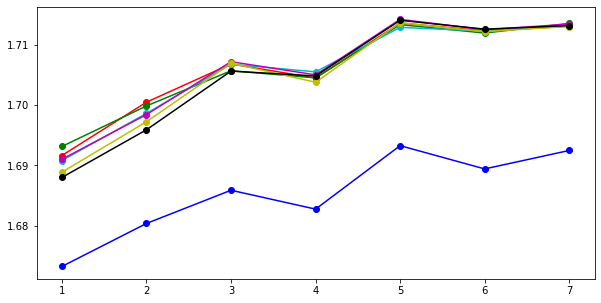

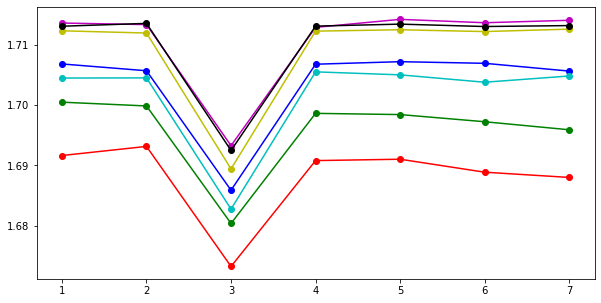

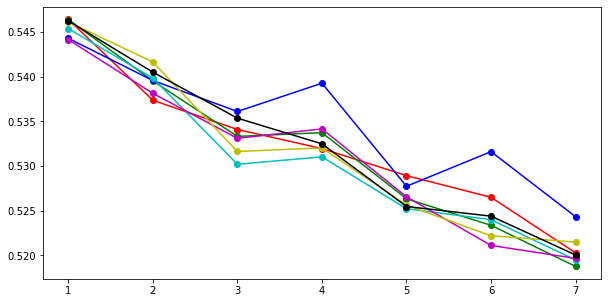

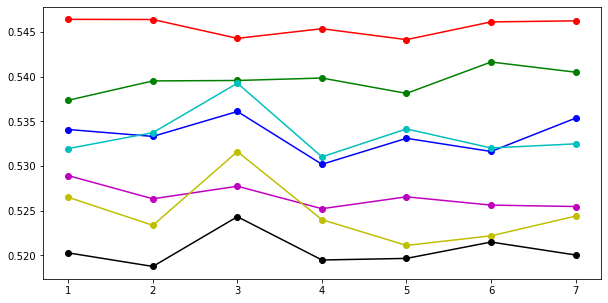

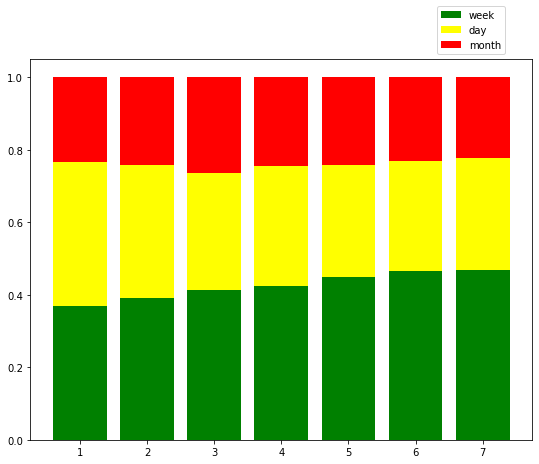

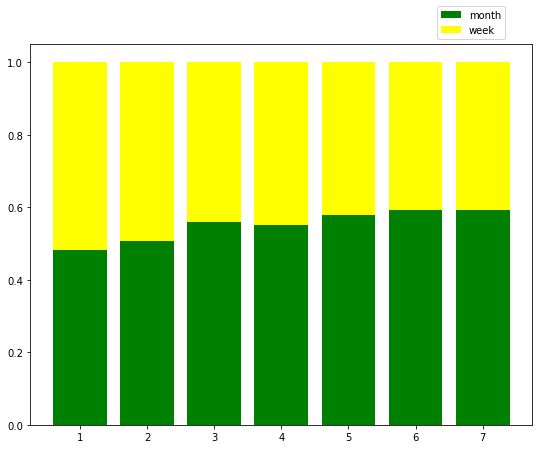

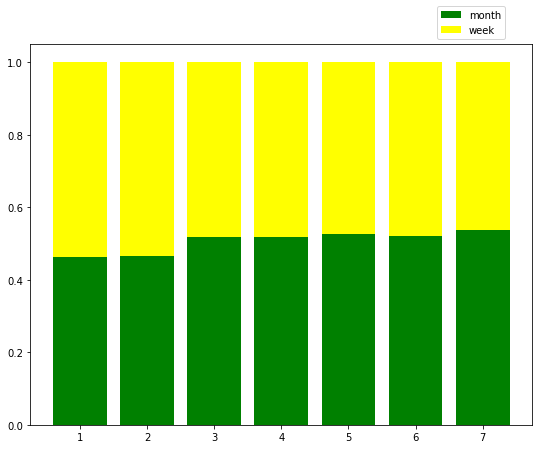

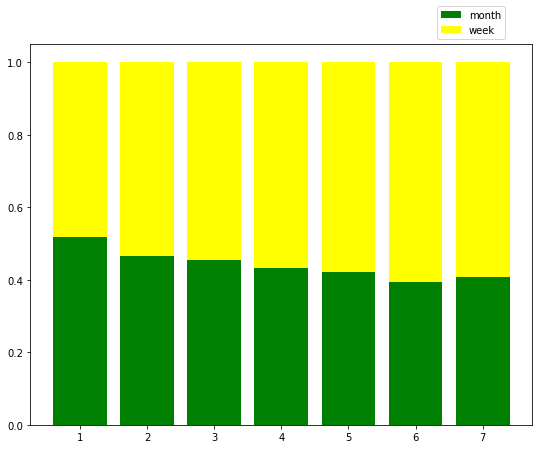

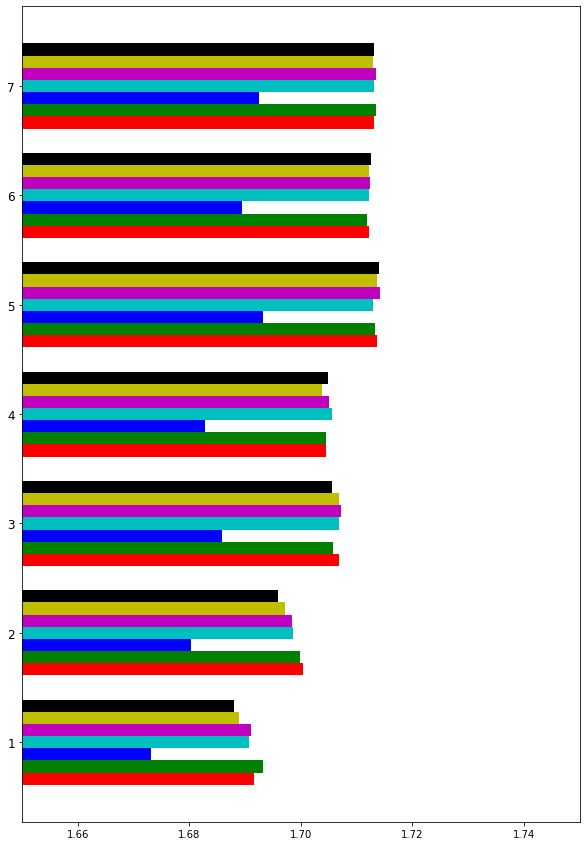

In [3]:
mmd = []
dks = []
min_total_total_loss = []
s = 0


# %matplotlib inline

input_effect = []
input_impact_chart_val = []
input_effect_val = []
input_effect_val_2 = []
input_effect_chart_each = []
input_effect_chart_all = []


val_di = 1

loss_chart_each = []
acc_chart_each = []
acc_chart_val = []
loss_chart_val = []

loss = 0
acc = 0

total = 0
up = 0
total_count_k = 10

for test_count_val in range(1):
    for test_total_val in range(total_count_k):

        df = pd.read_csv("2.Split-Prediction_Stock_Enhancement/stock_data/train_dataFrame_2.csv")
        df_test = pd.read_csv("2.Split-Prediction_Stock_Enhancement/stock_data/test_dataFrame_2.csv")
        fds = pd.concat([df,df_test])
        fk = fds.sample(frac=1,replace = False)
        
        


        df = fk[:80000].reset_index(drop=True)
        df_test = fk[80000:].reset_index(drop=True)
        
        
    


        for output_val in range(7):
            for input_val in range(7):
                


                input_a = Input(shape=(4))
                input_b = Input(shape=(4))
                input_c = Input(shape=(4))


                a = keras.layers.Dense(8,activation = 'relu',kernel_initializer = "random_uniform")(input_a)
                b = keras.layers.Dense(8,activation = 'relu',kernel_initializer = "random_uniform")(input_b)
                c = keras.layers.Dense(8,activation = 'relu',kernel_initializer = "random_uniform")(input_c)




                if input_val ==0:
                    center = concatenate([a,b,c])

                if input_val ==1:
                    center = concatenate([a,b])

                if input_val ==2:
                    center = concatenate([a,c])

                if input_val ==3:
                    center = concatenate([b,c])

                if input_val ==4:
                    center = concatenate([a])

                if input_val ==5:
                    center = concatenate([b])

                if input_val ==6:
                    center = concatenate([c])
                    
                    
                center = keras.layers.Dense(32,activation = 'relu')(center)
                center = keras.layers.Dense(24,activation = 'relu')(center)




                output_1 = keras.layers.Dense(16,activation = 'relu')(center)
                output_1 = tf.keras.layers.Dropout(rate=0.2)(output_1)
                output_1 = keras.layers.Dense(4,activation = 'relu',kernel_initializer = "random_uniform")(output_1)
                output_1 = keras.layers.Dense(1)(output_1)

                output_2 = keras.layers.Dense(16,activation = 'relu')(center)
                output_2 = tf.keras.layers.Dropout(rate=0.2)(output_2)
                output_2 = keras.layers.Dense(4,activation = 'relu',kernel_initializer = "random_uniform")(output_2)
                output_2 = keras.layers.Dense(1)(output_2)

                output_3 = keras.layers.Dense(16,activation = 'relu')(center)
                output_3 = tf.keras.layers.Dropout(rate=0.2)(output_3)
                output_3 = keras.layers.Dense(4,activation = 'relu',kernel_initializer = "random_uniform")(output_3)
                output_3 = keras.layers.Dense(1)(output_3)

                output_4 = keras.layers.Dense(16,activation = 'relu')(center)
                output_4 = tf.keras.layers.Dropout(rate=0.2)(output_4)
                output_4 = keras.layers.Dense(4,activation = 'relu',kernel_initializer = "random_uniform")(output_4)
                output_4 = keras.layers.Dense(1)(output_4)

                output_5 = keras.layers.Dense(16,activation = 'relu')(center)
                output_5 = tf.keras.layers.Dropout(rate=0.2)(output_5)
                output_5 = keras.layers.Dense(4,activation = 'relu',kernel_initializer = "random_uniform")(output_5)
                output_5 = keras.layers.Dense(1)(output_5)

                output_6 = keras.layers.Dense(16,activation = 'relu')(center)
                output_6 = tf.keras.layers.Dropout(rate=0.2)(output_6)
                output_6 = keras.layers.Dense(4,activation = 'relu',kernel_initializer = "random_uniform")(output_6)
                output_6 = keras.layers.Dense(1)(output_6)

                output_7 = keras.layers.Dense(16,activation = 'relu')(center)
                output_7 = tf.keras.layers.Dropout(rate=0.2)(output_7)
                output_7 = keras.layers.Dense(4,activation = 'relu',kernel_initializer = "random_uniform")(output_7)
                output_7 = keras.layers.Dense(1)(output_7)



                if output_val ==0:

                    train_val = df['nextStockUpDown_1']
                    test_val = df_test['nextStockUpDown_1']
                    model_dnn = Model(inputs = [input_a,input_b,input_c], outputs = [output_1]) 


                if output_val ==1:

                    train_val = [df['nextStockUpDown_2_1'],df['nextStockUpDown_2_2']]
                    test_val =  [df_test['nextStockUpDown_2_1'],df_test['nextStockUpDown_2_2']]
                    model_dnn = Model(inputs = [input_a,input_b,input_c], outputs = [output_1,output_2]) 


                if output_val ==2:

                    train_val = [df['nextStockUpDown_3_1'],df['nextStockUpDown_3_2'],df['nextStockUpDown_3_3']]
                    test_val =  [df_test['nextStockUpDown_3_1'],df_test['nextStockUpDown_3_2'],df_test['nextStockUpDown_3_3']]
                    model_dnn = Model(inputs = [input_a,input_b,input_c], outputs = [output_1,output_2,output_3]) 

                if output_val ==3:

                    train_val = [df['nextStockUpDown_4_1'],df['nextStockUpDown_4_2'],df['nextStockUpDown_4_3'],df['nextStockUpDown_4_4']]
                    test_val =  [df_test['nextStockUpDown_4_1'],df_test['nextStockUpDown_4_2'],df_test['nextStockUpDown_4_3'],df_test['nextStockUpDown_4_4']]
                    model_dnn = Model(inputs = [input_a,input_b,input_c], outputs = [output_1,output_2,output_3,output_4]) 


                if output_val ==4:

                    train_val = [df['nextStockUpDown_5_1'],df['nextStockUpDown_5_2'],df['nextStockUpDown_5_3'],df['nextStockUpDown_5_4'],df['nextStockUpDown_5_5']]
                    test_val =  [df_test['nextStockUpDown_5_1'],df_test['nextStockUpDown_5_2'],df_test['nextStockUpDown_5_3'],df_test['nextStockUpDown_5_4'],df_test['nextStockUpDown_5_5']]
                    model_dnn = Model(inputs = [input_a,input_b,input_c], outputs = [output_1,output_2,output_3,output_4,output_5]) 


                if output_val ==5:

                    train_val = [df['nextStockUpDown_6_1'],df['nextStockUpDown_6_2'],df['nextStockUpDown_6_3'],df['nextStockUpDown_6_4'],df['nextStockUpDown_6_5'],df['nextStockUpDown_6_6']]
                    test_val =  [df_test['nextStockUpDown_6_1'],df_test['nextStockUpDown_6_2'],df_test['nextStockUpDown_6_3'],df_test['nextStockUpDown_6_4'],df_test['nextStockUpDown_6_5'],df_test['nextStockUpDown_6_6']]
                    model_dnn = Model(inputs = [input_a,input_b,input_c], outputs = [output_1,output_2,output_3,output_4,output_5,output_6]) 


                if output_val ==6:

                    train_val = [df['nextStockUpDown_7_1'],df['nextStockUpDown_7_2'],df['nextStockUpDown_7_3'],df['nextStockUpDown_7_4'],df['nextStockUpDown_7_5'],df['nextStockUpDown_7_6'],df['nextStockUpDown_7_7']]
                    test_val =  [df_test['nextStockUpDown_7_1'],df_test['nextStockUpDown_7_2'],df_test['nextStockUpDown_7_3'],df_test['nextStockUpDown_7_4'],df_test['nextStockUpDown_7_5'],df_test['nextStockUpDown_7_6'],df_test['nextStockUpDown_7_7']]
                    model_dnn = Model(inputs = [input_a,input_b,input_c], outputs = [output_1,output_2,output_3,output_4,output_5,output_6,output_7]) 


                early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 10, mode = 'auto',restore_best_weights = True)


                model_dnn.compile(optimizer = 'adam', loss = 'mse')


                history = model_dnn.fit(
                                    [np.array(df[['input1','input2','input3','input4']]),np.array(df[['input5','input6','input7','input8']]),np.array(df[['input9','input10','input11','input12']])]
                    ,train_val,  callbacks = [early_stopping]
                    ,batch_size = 512,

                    epochs = 1000,

                    validation_data = (
                                    [np.array(df_test[['input1','input2','input3','input4']]),np.array(df_test[['input5','input6','input7','input8']]),np.array(df_test[['input9','input10','input11','input12']])]

                    ,test_val
                    ))
                
                


                if output_val == 0:

                    a = copy.copy(df_test)
                    df_test_total_ch_1 = copy.copy(df_test)
                    df_test_total_ch_1[['input1','input2','input3','input4']] =a[['input1','input2','input3','input4']].sample(frac=1,replace=False).reset_index(drop=True)



                    b = copy.copy(df_test)
                    df_test_total_ch_2 = copy.copy(df_test)
                    df_test_total_ch_2[['input5','input6','input7','input8']] =b[['input5','input6','input7','input8']].sample(frac=1,replace=False).reset_index(drop=True)



                    c = copy.copy(df_test)
                    df_test_total_ch_3 = copy.copy(df_test)
                    df_test_total_ch_3[['input9','input10','input11','input12']] =c[['input9','input10','input11','input12']].sample(frac=1,replace=False).reset_index(drop=True)




                result_real = model_dnn.evaluate([df_test[['input1','input2','input3','input4']],df_test[['input5','input6','input7','input8']],df_test[['input9','input10','input11','input12']]],
                test_val            )
                if output_val == 0:
                    result_real = [result_real]


     
                print(test_val)


                result = model_dnn.evaluate([df_test_total_ch_1[['input1','input2','input3','input4']],df_test_total_ch_1[['input5','input6','input7','input8']],df_test_total_ch_1[['input9','input10','input11','input12']]],
                test_val            )
                if output_val == 0:

                    result = [result]

                input_effect_val.append(result_real[0] - result[0])



                result = model_dnn.evaluate([df_test_total_ch_2[['input1','input2','input3','input4']],df_test_total_ch_2[['input5','input6','input7','input8']],df_test_total_ch_2[['input9','input10','input11','input12']]],
                test_val            )
                if output_val == 0:

                    result = [result]

                input_effect_val.append(result_real[0] - result[0])

                result = model_dnn.evaluate([df_test_total_ch_3[['input1','input2','input3','input4']],df_test_total_ch_3[['input5','input6','input7','input8']],df_test_total_ch_3[['input9','input10','input11','input12']]],
                test_val            )

                if output_val == 0:

                    result = [result]

                input_effect_val.append(result_real[0] - result[0])
                


                if input_val in [0,1,2,3]:
                
                    for i in range(3):
                        a = input_effect_val[0] / sum(input_effect_val)
                        b = input_effect_val[1] / sum(input_effect_val)
                        c = input_effect_val[2] / sum(input_effect_val)
                        
        
                    print(a,b,c)

                    input_effect.append([a,b,c])
                    
                



                input_effect_val = []

                
                
                result = model_dnn.predict([df_test[['input1','input2','input3','input4']],df_test[['input5','input6','input7','input8']],df_test[['input9','input10','input11','input12']]])
                resultp = np.array(result).transpose()[0]









          
                loss = 0
                for count in range(len(df_test)):
                    
                    if output_val == 0:
                        real = np.array(df_test['nextStockUpDown_1'])[count].tolist()
                    if output_val == 1:
                        real =  np.array(df_test[['nextStockUpDown_2_1','nextStockUpDown_2_2']])[count].tolist()
                    if output_val == 2:
                        real =  np.array(df_test[['nextStockUpDown_3_1','nextStockUpDown_3_2','nextStockUpDown_3_3']])[count].tolist()
                    if output_val == 3:
                        real = np.array(df_test[['nextStockUpDown_4_1','nextStockUpDown_4_2','nextStockUpDown_4_3','nextStockUpDown_4_4']])[count].tolist()
                    if output_val == 4:
                        real =  np.array(df_test[['nextStockUpDown_5_1','nextStockUpDown_5_2','nextStockUpDown_5_3','nextStockUpDown_5_4','nextStockUpDown_5_5']])[count].tolist()
                    if output_val == 5:
                        real =  np.array(df_test[['nextStockUpDown_6_1','nextStockUpDown_6_2','nextStockUpDown_6_3','nextStockUpDown_6_4','nextStockUpDown_6_5','nextStockUpDown_6_6']])[count].tolist()
                    if output_val == 6:
                        real =  np.array(df_test[['nextStockUpDown_7_1','nextStockUpDown_7_2','nextStockUpDown_7_3','nextStockUpDown_7_4','nextStockUpDown_7_5','nextStockUpDown_7_6','nextStockUpDown_7_7']])[count].tolist()



                    result = resultp[count]
                    r_t = 100
                    r_p = 100
                    
                    for mn in range(output_val+1):
                        if output_val == 0:
                            r_t = r_t + r_t*real/100
                            r_p = r_p + r_p*result/100

                        else:
                            r_t = r_t + r_t*real[mn]/100
                            r_p = r_p + r_p*result[mn]/100


                    real = r_t
                    result = r_p

                    loss = loss + abs(real - result) 
                    
                    if result > 100:
                        result = 1

                    else:
                        result = 0

                    if real > 100:
                        real = 1

                    else:
                        real = 0
                        
                    if real == val_di:

                        if result == real :
                            up = up +1
                            total = total +1

                        else:
                            total = total +1
                            
                        if val_di == 1:
                            
                            val_di = 0
                        else:
                            val_di = 1
                        



                    
                acc = (up/total)
                print(acc,total)



                print(loss)
                loss_chart_val.append(loss)
                acc_chart_val.append(acc)
                if input_val in [0,1,2,3]:
                    input_effect_chart_val.append(input_effect[0])
                input_effect = []
                
                loss = 0
                acc = 0
                total = 0
                up = 0
                
                
                
                
        loss_chart_each.append(loss_chart_val)
        loss_chart_val = []
        acc_chart_each.append(acc_chart_val)
        acc_chart_val = []
        input_effect_chart_each.append(input_effect_chart_val)
        input_effect_chart_val = []
        

# Plot

In [ ]:
cc = []
input_effect_chart_all_1 = []
input_effect_chart_all_2 = []
input_effect_chart_all_3 = []
input_effect_chart_all_4 = []
b = []



for v in range(28):
    for i in range(3):
        for n in range(total_count_k):
            b.append(input_effect_chart_each[n][v][i])
        cc.append(sum(b))
        b = []
    if v %4==0:
        input_effect_chart_all_1.append(cc)
    if v %4 ==1:
        input_effect_chart_all_2.append(cc)
    if v %4 ==2:
        input_effect_chart_all_3.append(cc)
    if v %4 ==3:
        input_effect_chart_all_4.append(cc)
    
    cc = []
    

loss_chart_all = []
for i in range(0, 7):
    loss_chart_all.append([])
    for j in range(0, 7):
        loss_chart_all[i].append(sum(np.array(loss_chart_each).transpose()[j+i*7]))
        
        





acc_chart_all = []
for i in range(0, 7):
    acc_chart_all.append([])
    for j in range(0, 7):
        acc_chart_all[i].append(sum(np.array(acc_chart_each).transpose()[j+i*7]))





from matplotlib import pyplot
m = ['r','g','b','c','m','y','k']


plt.figure(figsize=(10,5))
for i in range(7):
    plt.plot(np.array(range(7))+1,np.array(loss_chart_all[i])/(total_count_k*len(df_test)),marker = 'o',color = m[i])
    

plt.figure(figsize=(10,5))
for i in range(7):
    plt.plot(np.array(range(7))+1,np.array(loss_chart_all).transpose()[i]/(total_count_k*len(df_test)),marker = 'o',color = m[i])


plt.figure(figsize=(10,5))
for i in range(7):
    plt.plot(np.array(range(7))+1,np.array(acc_chart_all[i])/total_count_k,marker = 'o',color = m[i])
    
plt.figure(figsize=(10,5))
for i in range(7):
    plt.plot(np.array(range(7))+1,np.array(acc_chart_all).transpose()[i]/total_count_k,marker = 'o',color = m[i])
    
    

data1=np.array(input_effect_chart_all_1).transpose()[2]/total_count_k
data2=np.array(input_effect_chart_all_1).transpose()[0]/total_count_k
data3=np.array(input_effect_chart_all_1).transpose()[1]/total_count_k
year=["1","2","3","4","5",'6','7']
plt.figure(figsize=(9,7))
plt.bar(year,data3,color="green",label="week")
plt.bar(year,data2,color="yellow",bottom=np.array(data3),label="day")
plt.bar(year,data1,color="red",bottom=np.array(data3)+np.array(data2),label="month")
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
    



data2=np.array(input_effect_chart_all_2).transpose()[0]/total_count_k
data3=np.array(input_effect_chart_all_2).transpose()[1]/total_count_k
year=["1","2","3","4","5",'6','7']
plt.figure(figsize=(9,7))
plt.bar(year,data3,color="green",label="month")
plt.bar(year,data2,color="yellow",bottom=np.array(data3),label="week")
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))



data2=np.array(input_effect_chart_all_3).transpose()[0]/total_count_k
data3=np.array(input_effect_chart_all_3).transpose()[2]/total_count_k
year=["1","2","3","4","5",'6','7']
plt.figure(figsize=(9,7))
plt.bar(year,data3,color="green",label="month")
plt.bar(year,data2,color="yellow",bottom=np.array(data3),label="week")
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))



data2=np.array(input_effect_chart_all_4).transpose()[1]/total_count_k
data3=np.array(input_effect_chart_all_4).transpose()[2]/total_count_k
year=["1","2","3","4","5",'6','7']
plt.figure(figsize=(9,7))
plt.bar(year,data3,color="green",label="month")
plt.bar(year,data2,color="yellow",bottom=np.array(data3),label="week")
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
    

fig = plt.figure(figsize=(10,15)) 
ax = fig.add_subplot(1, 1, 1)
ax.set_yticks([1,10,19,28,37,46,55])
ax.set_yticklabels(['1', '2', '3','4', '5', '6','7'], fontsize=12)


plt.xlim(1.65,1.75)
for i in range(7):
    pyplot.barh(np.array(range(7))-2+9*i,np.array((np.array(loss_chart_all).transpose()[i])/(total_count_k*len(df_test))),height = 1,color = m)
    
    



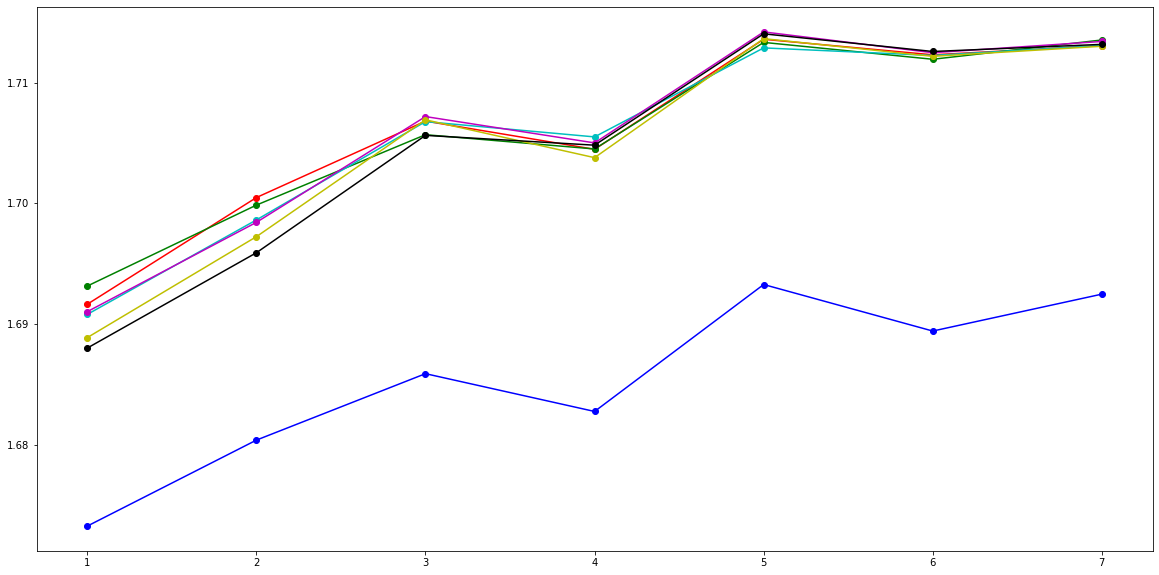

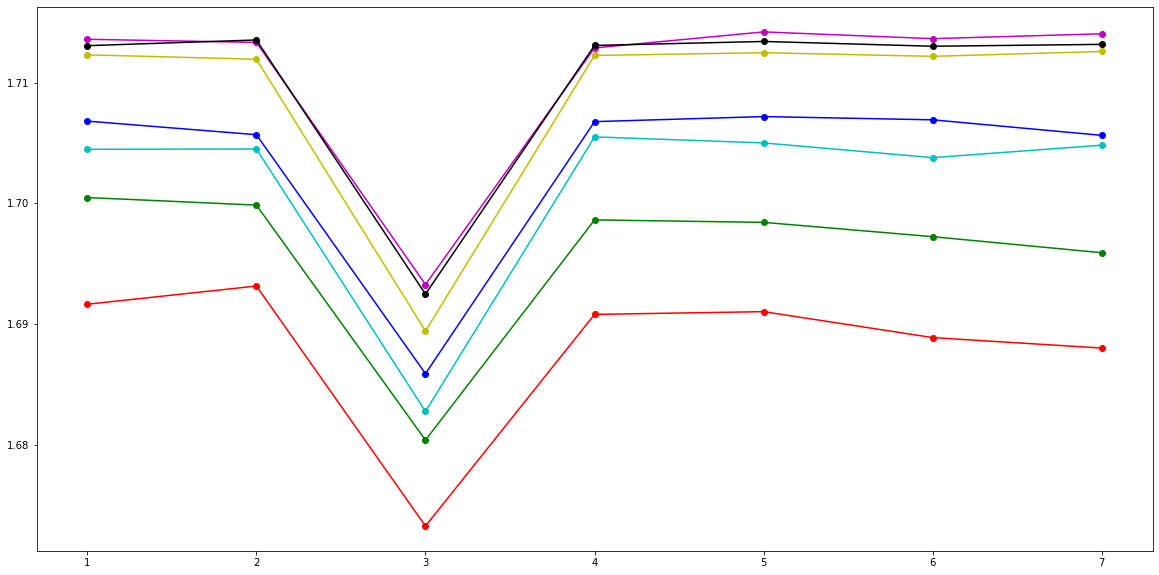

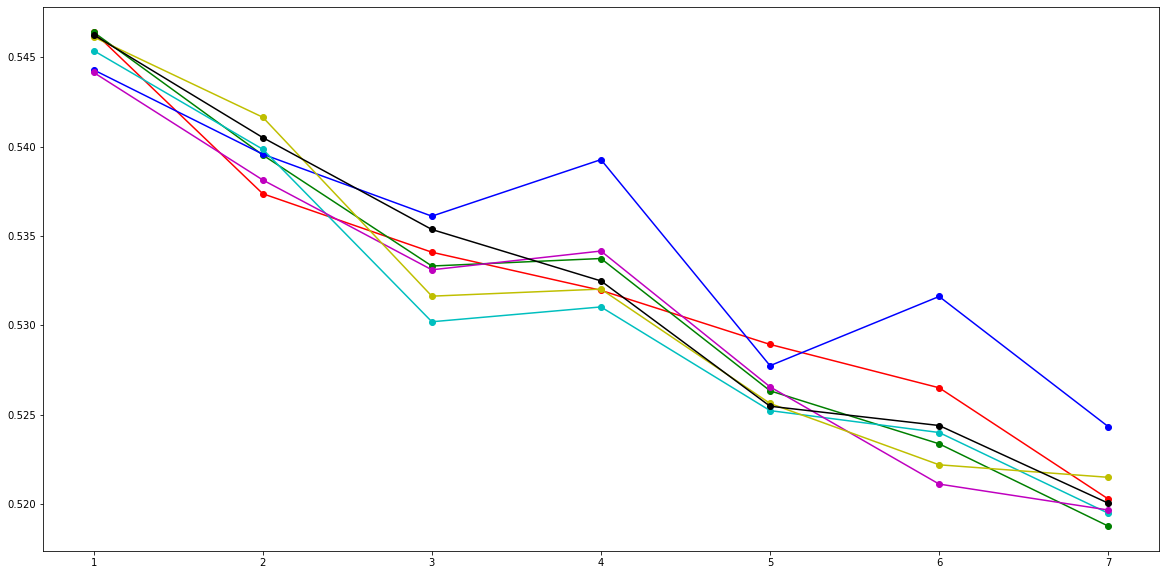

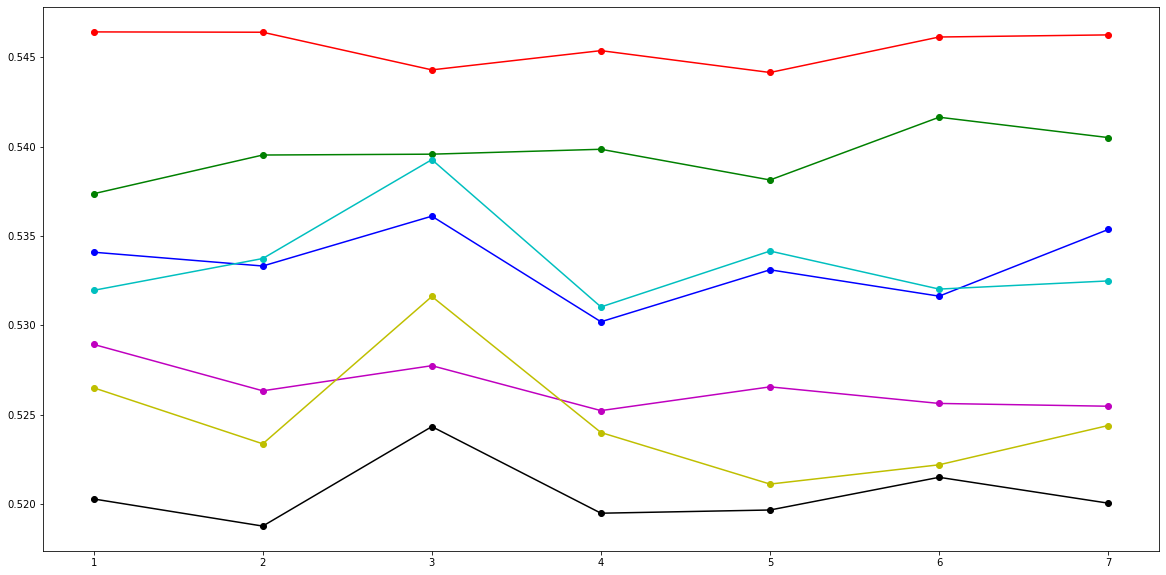

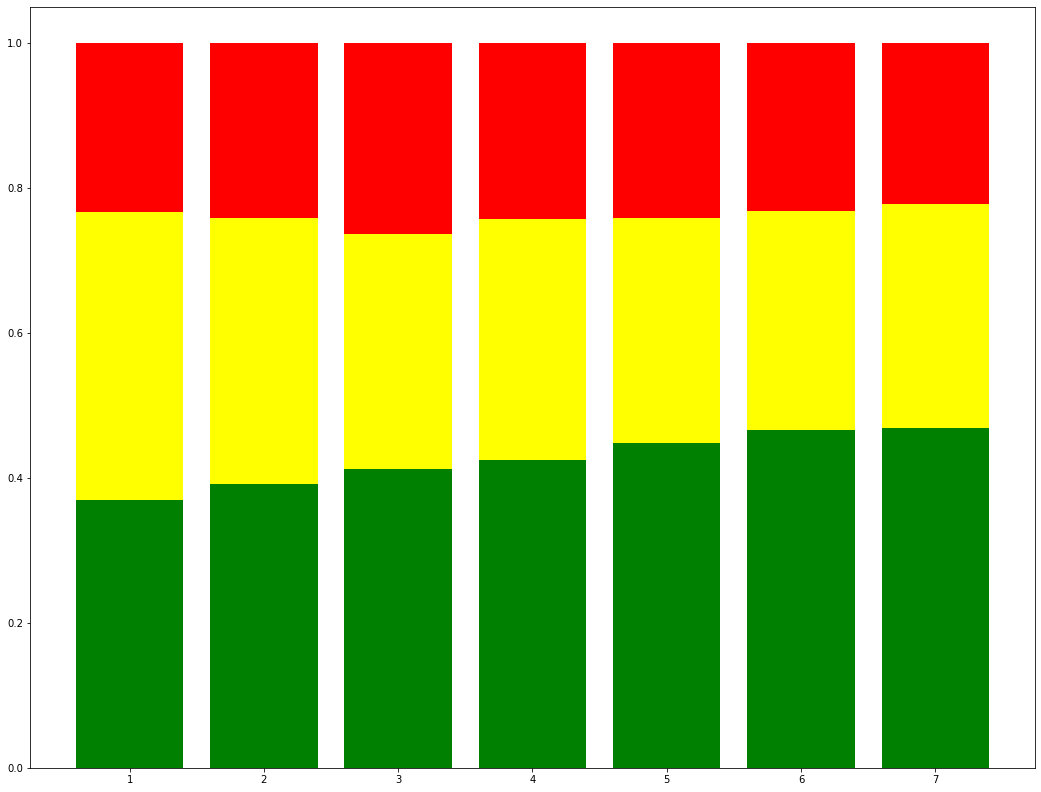

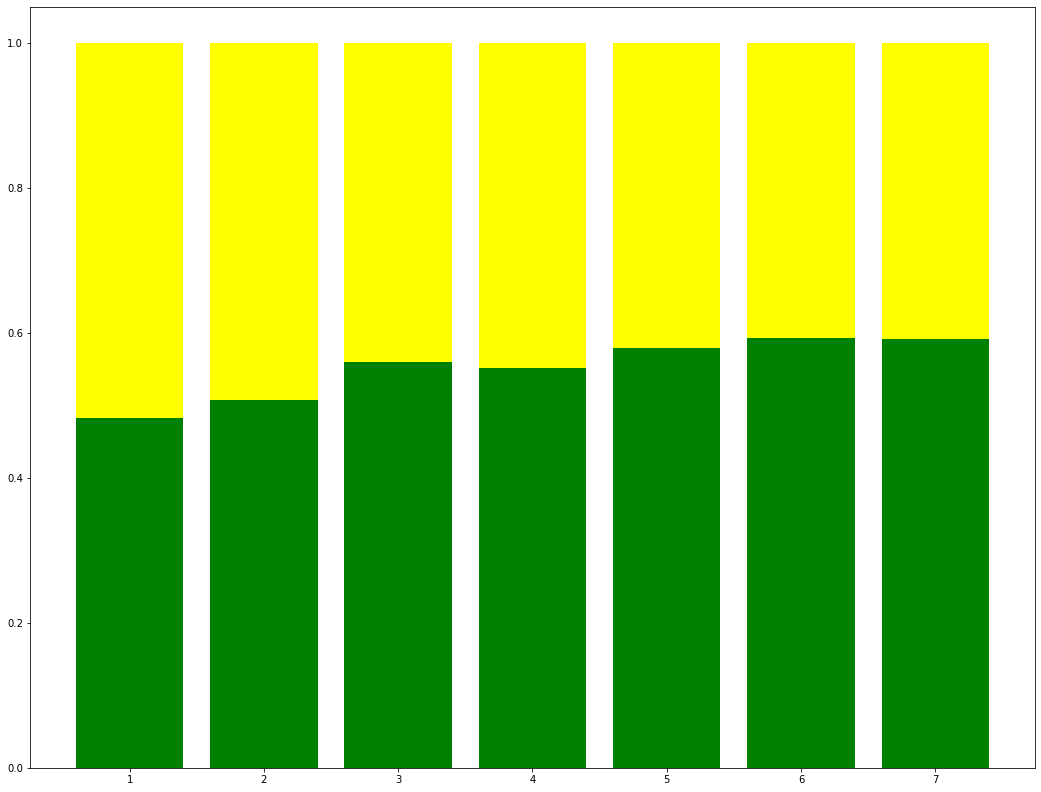

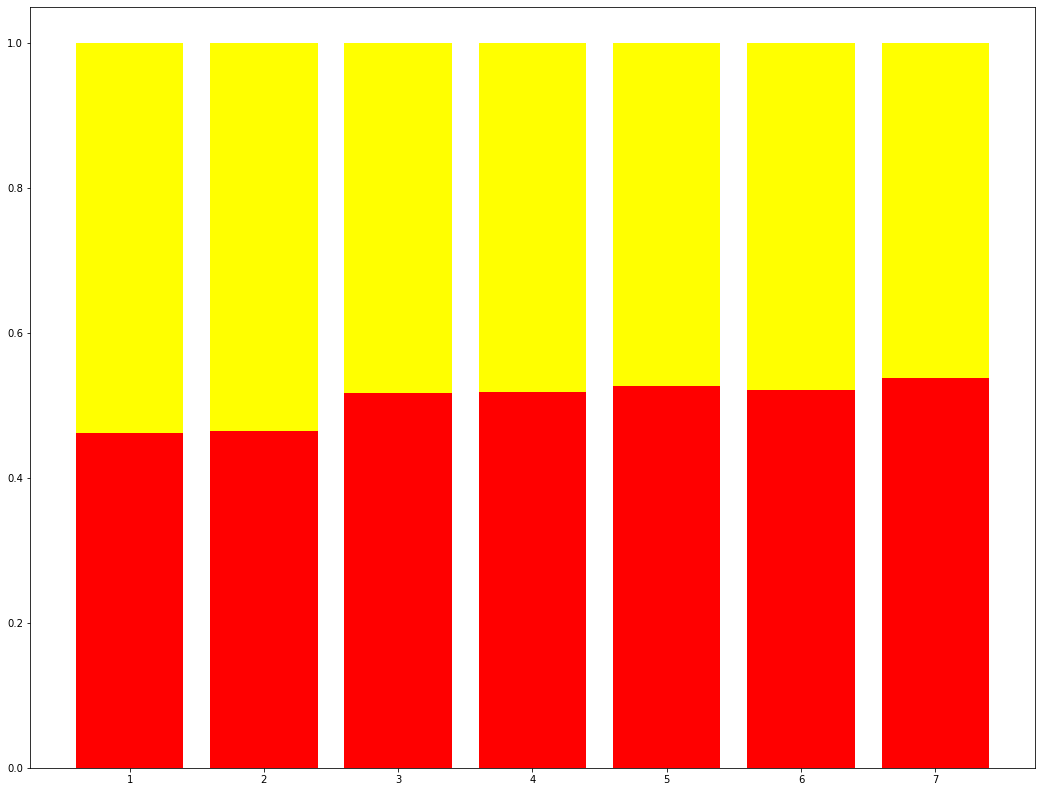

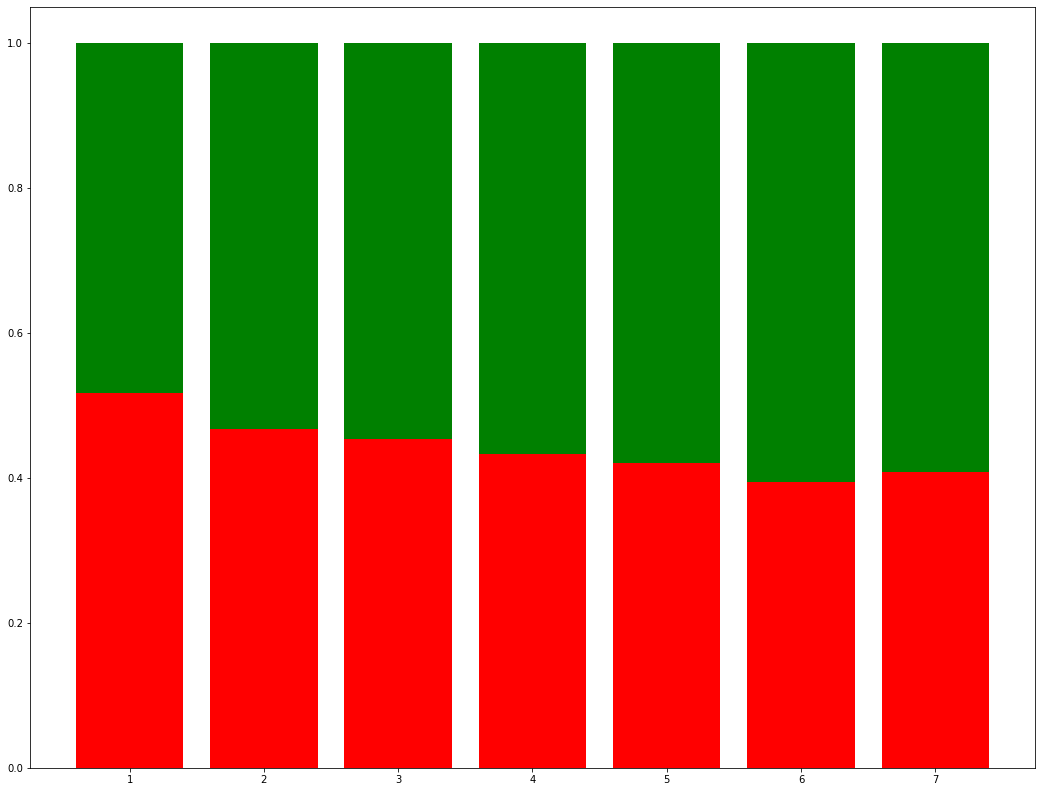

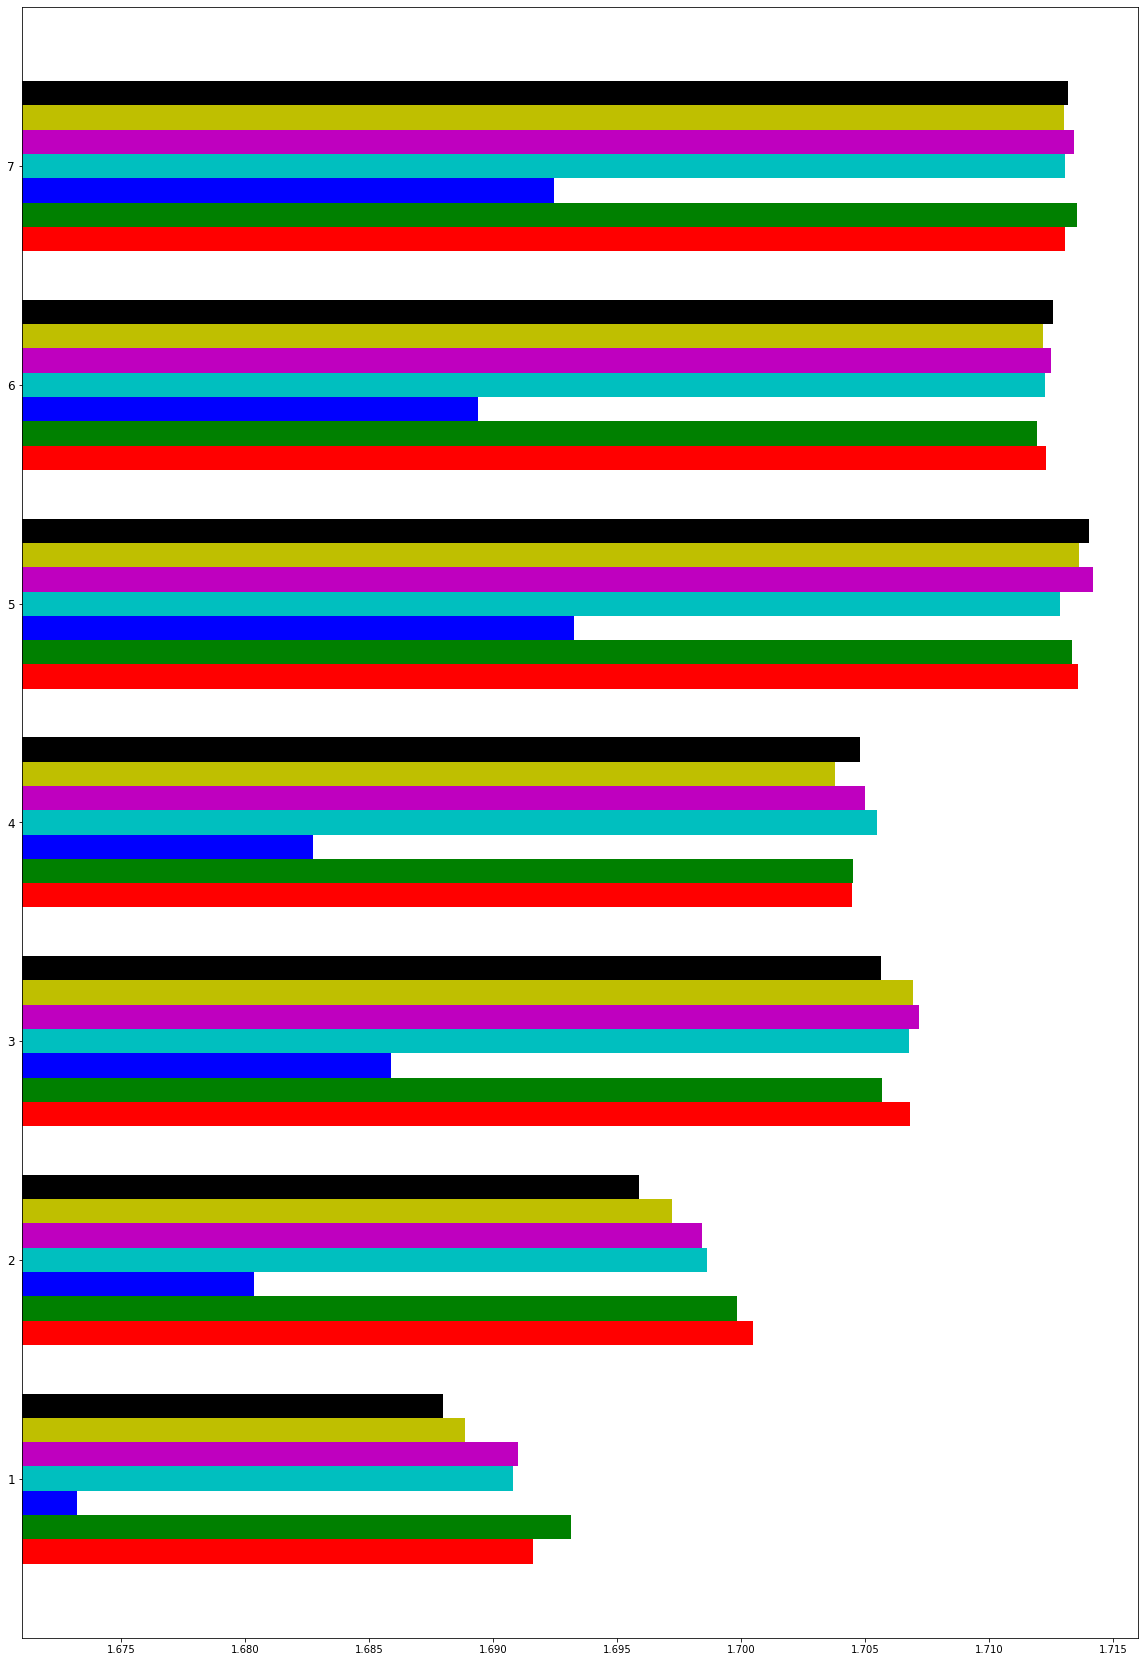

In [12]:
from matplotlib import pyplot
m = ['r','g','b','c','m','y','k']


plt.figure(figsize=(20,10))
for i in range(7):
    plt.plot(np.array(range(7))+1,np.array(loss_chart_all[i])/(total_count_k*len(df_test)),marker = 'o',color = m[i])


plt.figure(figsize=(20,10))
for i in range(7):
    plt.plot(np.array(range(7))+1,np.array(loss_chart_all).transpose()[i]/(total_count_k*len(df_test)),marker = 'o',color = m[i])


plt.figure(figsize=(20,10))
for i in range(7):
    plt.plot(np.array(range(7))+1,np.array(acc_chart_all[i])/total_count_k,marker = 'o',color = m[i])

plt.figure(figsize=(20,10))
for i in range(7):
    plt.plot(np.array(range(7))+1,np.array(acc_chart_all).transpose()[i]/total_count_k,marker = 'o',color = m[i])


# plt.figure(figsize=(10,5))
# plt.plot(range(7),np.array(input_effect_chart_all_1).transpose()[0]/total_count_k,'r',marker = 'o')
# plt.plot(range(7),np.array(input_effect_chart_all_1).transpose()[1]/total_count_k,'b',marker = 'o')
# plt.plot(range(7),np.array(input_effect_chart_all_1).transpose()[2]/total_count_k,'c',marker = 'o')

data1=np.array(input_effect_chart_all_1).transpose()[2]/total_count_k
data2=np.array(input_effect_chart_all_1).transpose()[0]/total_count_k
data3=np.array(input_effect_chart_all_1).transpose()[1]/total_count_k
year=["1","2","3","4","5",'6','7']
plt.figure(figsize=(18,14))
plt.bar(year,data3,color="green",label="week")
plt.bar(year,data2,color="yellow",bottom=np.array(data3),label="day")
plt.bar(year,data1,color="red",bottom=np.array(data3)+np.array(data2),label="month")
#plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))



# plt.figure(figsize=(10,5))
# plt.plot(range(7),np.array(input_effect_chart_all_2).transpose()[0]/total_count_k,'r',marker = 'o')
# plt.plot(range(7),np.array(input_effect_chart_all_2).transpose()[1]/total_count_k,'b',marker = 'o')



data2=np.array(input_effect_chart_all_2).transpose()[0]/total_count_k
data3=np.array(input_effect_chart_all_2).transpose()[1]/total_count_k
year=["1","2","3","4","5",'6','7']
plt.figure(figsize=(18,14))
plt.bar(year,data3,color="green",label="week")
plt.bar(year,data2,color="yellow",bottom=np.array(data3),label="day")
#plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))


# plt.figure(figsize=(10,5))
# plt.plot(range(7),np.array(input_effect_chart_all_3).transpose()[0]/total_count_k,'r',marker = 'o')
# plt.plot(range(7),np.array(input_effect_chart_all_3).transpose()[2]/total_count_k,'c',marker = 'o')

data2=np.array(input_effect_chart_all_3).transpose()[0]/total_count_k
data3=np.array(input_effect_chart_all_3).transpose()[2]/total_count_k
year=["1","2","3","4","5",'6','7']
plt.figure(figsize=(18,14))
plt.bar(year,data3,color="red",label="month")
plt.bar(year,data2,color="yellow",bottom=np.array(data3),label="day")
#plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))


# plt.figure(figsize=(10,5))
# plt.plot(range(7),np.array(input_effect_chart_all_4).transpose()[1]/total_count_k,'b',marker = 'o')
# plt.plot(range(7),np.array(input_effect_chart_all_4).transpose()[2]/total_count_k,'c',marker = 'o')


data2=np.array(input_effect_chart_all_4).transpose()[1]/total_count_k
data3=np.array(input_effect_chart_all_4).transpose()[2]/total_count_k
year=["1","2","3","4","5",'6','7']
plt.figure(figsize=(18,14))
plt.bar(year,data3,color="red",label="month")
plt.bar(year,data2,color="green",bottom=np.array(data3),label="week")
#plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))


fig = plt.figure(figsize=(20,30)) 
ax = fig.add_subplot(1, 1, 1)
ax.set_yticks([1,10,19,28,37,46,55])
ax.set_yticklabels(['1', '2', '3','4', '5', '6','7'], fontsize=12)


plt.xlim(1.671,1.716)
for i in range(7):
    pyplot.barh(np.array(range(7))-2+9*i,np.array((np.array(loss_chart_all).transpose()[i])/(total_count_k*len(df_test))),height = 1,color = m)